Prophet Modeling

-  Prophet is capable of handling missing data points and outliers, making it a robust tool for forecasting real-world data
- single regressor model typically refers to a model where you have only one predictor variable (regressor) to forecast the target variable (usually a time series)
- In the case of Prophet, the single regressor model means you have one additional input feature (regressor) to aid in forecasting the target time series data
- Prophet allows you to include additional regressor variables to improve the accuracy of your forecasts. These regressors can represent any relevant information that might impact the time series you are trying to predict. For example, if you are forecasting daily sales data, a regressor could be a binary variable indicating whether it's a holiday or not. Including such additional information can help Prophet make more accurate predictions.

- Additive Regressive Model
- y(t) = g(t) (trend factor) + h(t) (holiday component) + s(t) (seasonality component) + e

- Trend factor: logistic growth model or piecewise linear model

In [78]:
import pandas as pd
from prophet import Prophet
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [2]:
# import data
df = pd.read_csv('df_post_eda.csv')
df

,Date,MMWR_week,Location,Distributed,Distributed_Janssen,Distributed_Moderna,Distributed_Pfizer,Distributed_Unk_Manuf,Dist_Per_100K,Distributed_Per_100k_5Plus,...,day_of_week,quarter,dayofyear,dayofmonth,weekofyear,season,holidays,holiday_season,vax_announcement,Additional_Doses_Vax_Pct_1_w_lag
0,2023-05-10,19,NE,5481710,152400,1647380,2905630,0,283379,303944.0,...,Wednesday,2,130,10,19,spring,Normal day,False,False,NaN
1,2023-05-10,19,LA,10282120,330500,3807980,5164550,0,221178,236516.0,...,Wednesday,2,130,10,19,spring,Normal day,False,False,55.8
2,2023-05-10,19,GA,28727475,869100,9763000,14773655,0,270569,288404.0,...,Wednesday,2,130,10,19,spring,Normal day,False,False,43.3
3,2023-05-10,19,WY,1281755,49300,490040,585605,0,221466,235691.0,...,Wednesday,2,130,10,19,spring,Normal day,False,False,44.3
4,2023-05-10,19,CO,17769135,501900,5402640,9029715,0,308560,327449.0,...,Wednesday,2,130,10,19,spring,Normal day,False,False,47.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5115,2021-11-03,44,VT,1184820,64900,498200,615420,6300,189878,199147.0,...,Wednesday,4,307,3,44,fall,Normal day,False,False,10.0
5116,2021-11-03,44,WA,12755055,651400,4850520,7195035,58100,167501,178183.0,...,Wednesday,4,307,3,44,fall,Normal day,False,False,16.9
5117,2021-11-03,44,MH,58310,11300,43500,3510,0,99824,84265.0,...,Wednesday,4,307,3,44,fall,Normal day,False,False,12.1
5118,2021-11-03,44,ME,2406780,133400,988480,1278000,6900,179048,187931.0,...,Wednesday,4,307,3,44,fall,Normal day,False,False,0.5


In [3]:
# Predictive variable
pred_var = 'Additional_Doses_Vax_Pct'

In [4]:
# Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.groupby('Date')[pred_var].mean()

In [6]:
df = pd.DataFrame(df)
df.reset_index(level=0, inplace=True)
df = df.rename(columns={'Date': 'ds', 'Additional_Doses_Vax_Pct': 'y'})
df.tail()

,ds,y
75,2023-04-12,50.951563
76,2023-04-19,51.012500
77,2023-04-26,51.034375
78,2023-05-03,51.064062
79,2023-05-10,51.076563


In [7]:
df

,ds,y
0,2021-11-03,10.332812
1,2021-11-10,13.185937
2,2021-11-17,15.871875
3,2021-11-24,18.675000
4,2021-12-01,20.689062
...,...,...
75,2023-04-12,50.951563
76,2023-04-19,51.012500
77,2023-04-26,51.034375
78,2023-05-03,51.064062


## Adding Country Holidays

In [8]:
# Python
m_Holiday = Prophet()
m_Holiday.add_country_holidays(country_name='US')
m_Holiday.fit(df)

16:54:34 - cmdstanpy - INFO - Chain [1] start processing
16:54:34 - cmdstanpy - INFO - Chain [1] done processing


In [9]:
m_Holiday.train_holiday_names

0                          Martin Luther King Jr. Day
1                               Washington's Birthday
2                                        Columbus Day
3                                      New Year's Day
4                           New Year's Day (Observed)
5                                        Memorial Day
6                Juneteenth National Independence Day
7     Juneteenth National Independence Day (Observed)
8                                    Independence Day
9                         Independence Day (Observed)
10                                          Labor Day
11                                       Veterans Day
12                                       Thanksgiving
13                                      Christmas Day
14                           Christmas Day (Observed)
15                            Veterans Day (Observed)
dtype: object

In [10]:
future = m_Holiday.make_future_dataframe(periods=52, freq='W-WED')

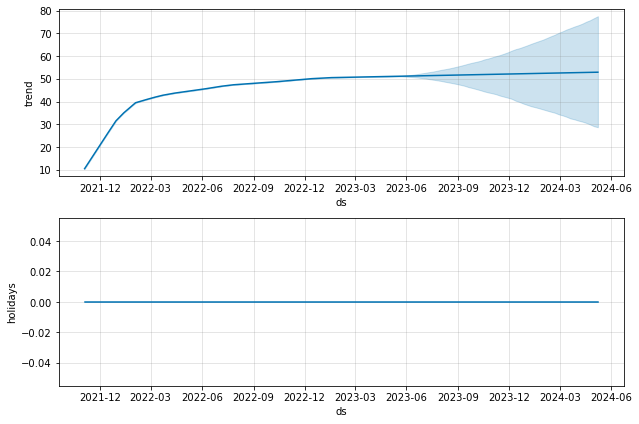

In [11]:
forecast = m_Holiday.predict(future)
fig = m_Holiday.plot_components(forecast)

Holiday effects are applied to the particular date on which the holiday was specified. With data that has been aggregated to weekly or monthly frequency, holidays that don’t fall on the particular date used in the data will be ignored: for example, a Monday holiday in a weekly time series where each data point is on a Sunday. To include holiday effects in the model, the holiday will need to be moved to the date in the history dataframe for which the effect is desired. Note that with weekly or monthly aggregated data, many holiday effects will be well-captured by the yearly seasonality, so added holidays may only be necessary for holidays that occur in different weeks throughout the time series.

## Single Prophet Model

In [22]:
# import data
df2 = pd.read_csv('df_post_eda.csv')
df2.head()

,Date,MMWR_week,Location,Distributed,Distributed_Janssen,Distributed_Moderna,Distributed_Pfizer,Distributed_Unk_Manuf,Dist_Per_100K,Distributed_Per_100k_5Plus,...,day_of_week,quarter,dayofyear,dayofmonth,weekofyear,season,holidays,holiday_season,vax_announcement,Additional_Doses_Vax_Pct_1_w_lag
0,2023-05-10,19,NE,5481710,152400,1647380,2905630,0,283379,303944.0,...,Wednesday,2,130,10,19,spring,Normal day,False,False,NaN
1,2023-05-10,19,LA,10282120,330500,3807980,5164550,0,221178,236516.0,...,Wednesday,2,130,10,19,spring,Normal day,False,False,55.8
2,2023-05-10,19,GA,28727475,869100,9763000,14773655,0,270569,288404.0,...,Wednesday,2,130,10,19,spring,Normal day,False,False,43.3
3,2023-05-10,19,WY,1281755,49300,490040,585605,0,221466,235691.0,...,Wednesday,2,130,10,19,spring,Normal day,False,False,44.3
4,2023-05-10,19,CO,17769135,501900,5402640,9029715,0,308560,327449.0,...,Wednesday,2,130,10,19,spring,Normal day,False,False,47.3


In [23]:
pred_var = 'Additional_Doses_Vax_Pct'
df2['Date'] = pd.to_datetime(df2['Date'])
df2 = df2.groupby('Date')[pred_var].mean()

In [24]:
df2 = pd.DataFrame(df2)
df2.reset_index(level=0, inplace=True)
df2 = df2.rename(columns={'Date': 'ds', 'Additional_Doses_Vax_Pct': 'y'})

In [25]:
df2.shape

(80, 2)

In [26]:
train_size = int(0.7 * len(df2))  # 70% training data, 30% testing data
train = df2[:train_size]
test = df2[train_size:]

print(train.shape, test.shape) # 70-30 train split

(56, 2) (24, 2)


In [27]:
model = Prophet().fit(train)

16:55:17 - cmdstanpy - INFO - Chain [1] start processing
16:55:17 - cmdstanpy - INFO - Chain [1] done processing


In [28]:
train_pred=model.predict(train).set_index('ds')
train_pred.head()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,
2021-11-03,10.413711,10.276288,10.561819,10.413711,10.413711,0.0,0.0,0.0,0.0,0.0,0.0,10.413711
2021-11-10,13.097670,12.942721,13.245845,13.097670,13.097670,0.0,0.0,0.0,0.0,0.0,0.0,13.097670
2021-11-17,15.781629,15.635911,15.924541,15.781629,15.781629,0.0,0.0,0.0,0.0,0.0,0.0,15.781629
2021-11-24,18.465588,18.311734,18.610513,18.465588,18.465588,0.0,0.0,0.0,0.0,0.0,0.0,18.465588
2021-12-01,21.149547,21.000715,21.302584,21.149547,21.149547,0.0,0.0,0.0,0.0,0.0,0.0,21.149547


In [29]:
test_pred=model.predict(test).set_index('ds')

In [30]:
from prophet.diagnostics import cross_validation
cv_results = cross_validation(model, initial='70 days', period='7 days', horizon='28 days')

  0%|          | 0/42 [00:00<?, ?it/s]

16:55:19 - cmdstanpy - INFO - Chain [1] start processing
16:55:19 - cmdstanpy - INFO - Chain [1] done processing
16:55:19 - cmdstanpy - INFO - Chain [1] start processing
16:55:19 - cmdstanpy - INFO - Chain [1] done processing
16:55:19 - cmdstanpy - INFO - Chain [1] start processing
16:55:19 - cmdstanpy - INFO - Chain [1] done processing
16:55:19 - cmdstanpy - INFO - Chain [1] start processing
16:55:19 - cmdstanpy - INFO - Chain [1] done processing
16:55:19 - cmdstanpy - INFO - Chain [1] start processing
16:55:19 - cmdstanpy - INFO - Chain [1] done processing
16:55:19 - cmdstanpy - INFO - Chain [1] start processing
16:55:19 - cmdstanpy - INFO - Chain [1] done processing
16:55:19 - cmdstanpy - INFO - Chain [1] start processing
16:55:20 - cmdstanpy - INFO - Chain [1] done processing
16:55:20 - cmdstanpy - INFO - Chain [1] start processing
16:55:20 - cmdstanpy - INFO - Chain [1] done processing
16:55:20 - cmdstanpy - INFO - Chain [1] start processing
16:55:20 - cmdstanpy - INFO - Chain [1]

In [31]:
cv_results

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2022-01-19,36.748291,36.486019,36.968789,36.903125,2022-01-12
1,2022-01-26,38.594170,37.821477,39.261652,38.214062,2022-01-12
2,2022-02-02,40.440049,38.921978,41.744090,39.235937,2022-01-12
3,2022-02-09,42.285927,39.832549,44.425860,40.014063,2022-01-12
4,2022-01-26,38.684421,38.473662,38.900768,38.214062,2022-01-19
...,...,...,...,...,...,...
163,2022-11-16,49.280504,48.627401,49.874875,49.556250,2022-10-19
164,2022-11-02,49.073750,48.902812,49.246963,49.237500,2022-10-26
165,2022-11-09,49.193748,48.942244,49.445093,49.409375,2022-10-26
166,2022-11-16,49.313747,48.973538,49.699435,49.556250,2022-10-26


In [32]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(cv_results)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,7 days,3.576781,1.891238,0.736827,0.016632,0.003989,0.015806,0.547619
1,14 days,4.903892,2.214473,0.974021,0.022036,0.006629,0.020910,0.571429
2,21 days,6.397059,2.529241,1.220662,0.027607,0.009976,0.026139,0.642857
3,28 days,8.665995,2.943806,1.516780,0.034256,0.012827,0.032271,0.666667


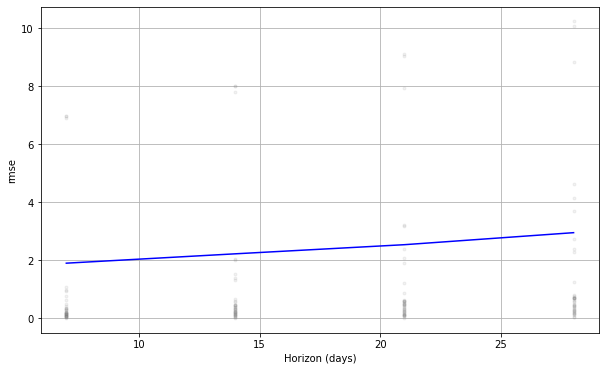

In [33]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(cv_results, metric='rmse')

In [34]:
# seems that using a horizon of only 7 days produces the lowest RMSE

In [32]:
# random grid search to determine which initial, period, and horizon to use to minimize RMSE

from sklearn.model_selection import ParameterSampler

param_grid = {
    'initial': list(range(7, 245, 7)),  #1-25 weeks
    'period': [7, 14] ,  
    'horizon': list(range(7, 35, 7))  #1-25 weeks
}

n_iter = 10

best_rmse = float('inf')
best_params = None

for params in ParameterSampler(param_distributions=param_grid, n_iter=n_iter, random_state=42):
    model = Prophet().fit(train)
    horizon = f'{params["horizon"]} days'
    initial = f'{params["initial"]} days'
    period = f'{params["period"]} days'
    
    df_cv = cross_validation(model, horizon=horizon, initial=initial, period=period)

    metrics = performance_metrics(df_cv)
    rmse = metrics['rmse'].mean()
    
    if rmse < best_rmse:
        best_rmse = rmse
        best_params = params

print("Best Parameters:", best_params)
print("Best RMSE:", best_rmse)


15:43:51 - cmdstanpy - INFO - Chain [1] start processing
15:43:51 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/39 [00:00<?, ?it/s]

15:43:51 - cmdstanpy - INFO - Chain [1] start processing
15:43:51 - cmdstanpy - INFO - Chain [1] done processing
15:43:51 - cmdstanpy - INFO - Chain [1] start processing
15:43:51 - cmdstanpy - INFO - Chain [1] done processing
15:43:52 - cmdstanpy - INFO - Chain [1] start processing
15:43:52 - cmdstanpy - INFO - Chain [1] done processing
15:43:52 - cmdstanpy - INFO - Chain [1] start processing
15:43:52 - cmdstanpy - INFO - Chain [1] done processing
15:43:52 - cmdstanpy - INFO - Chain [1] start processing
15:43:52 - cmdstanpy - INFO - Chain [1] done processing
15:43:52 - cmdstanpy - INFO - Chain [1] start processing
15:43:52 - cmdstanpy - INFO - Chain [1] done processing
15:43:52 - cmdstanpy - INFO - Chain [1] start processing
15:43:52 - cmdstanpy - INFO - Chain [1] done processing
15:43:52 - cmdstanpy - INFO - Chain [1] start processing
15:43:53 - cmdstanpy - INFO - Chain [1] done processing
15:43:53 - cmdstanpy - INFO - Chain [1] start processing
15:43:53 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/29 [00:00<?, ?it/s]

15:44:01 - cmdstanpy - INFO - Chain [1] start processing
15:44:01 - cmdstanpy - INFO - Chain [1] done processing
15:44:01 - cmdstanpy - INFO - Chain [1] start processing
15:44:01 - cmdstanpy - INFO - Chain [1] done processing
15:44:01 - cmdstanpy - INFO - Chain [1] start processing
15:44:01 - cmdstanpy - INFO - Chain [1] done processing
15:44:01 - cmdstanpy - INFO - Chain [1] start processing
15:44:01 - cmdstanpy - INFO - Chain [1] done processing
15:44:01 - cmdstanpy - INFO - Chain [1] start processing
15:44:02 - cmdstanpy - INFO - Chain [1] done processing
15:44:02 - cmdstanpy - INFO - Chain [1] start processing
15:44:02 - cmdstanpy - INFO - Chain [1] done processing
15:44:02 - cmdstanpy - INFO - Chain [1] start processing
15:44:02 - cmdstanpy - INFO - Chain [1] done processing
15:44:02 - cmdstanpy - INFO - Chain [1] start processing
15:44:02 - cmdstanpy - INFO - Chain [1] done processing
15:44:02 - cmdstanpy - INFO - Chain [1] start processing
15:44:02 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/24 [00:00<?, ?it/s]

15:44:08 - cmdstanpy - INFO - Chain [1] start processing
15:44:08 - cmdstanpy - INFO - Chain [1] done processing
15:44:08 - cmdstanpy - INFO - Chain [1] start processing
15:44:08 - cmdstanpy - INFO - Chain [1] done processing
15:44:08 - cmdstanpy - INFO - Chain [1] start processing
15:44:08 - cmdstanpy - INFO - Chain [1] done processing
15:44:08 - cmdstanpy - INFO - Chain [1] start processing
15:44:09 - cmdstanpy - INFO - Chain [1] done processing
15:44:09 - cmdstanpy - INFO - Chain [1] start processing
15:44:09 - cmdstanpy - INFO - Chain [1] done processing
15:44:09 - cmdstanpy - INFO - Chain [1] start processing
15:44:09 - cmdstanpy - INFO - Chain [1] done processing
15:44:09 - cmdstanpy - INFO - Chain [1] start processing
15:44:09 - cmdstanpy - INFO - Chain [1] done processing
15:44:09 - cmdstanpy - INFO - Chain [1] start processing
15:44:09 - cmdstanpy - INFO - Chain [1] done processing
15:44:09 - cmdstanpy - INFO - Chain [1] start processing
15:44:09 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/12 [00:00<?, ?it/s]

15:44:13 - cmdstanpy - INFO - Chain [1] start processing
15:44:13 - cmdstanpy - INFO - Chain [1] done processing
15:44:14 - cmdstanpy - INFO - Chain [1] start processing
15:44:14 - cmdstanpy - INFO - Chain [1] done processing
15:44:14 - cmdstanpy - INFO - Chain [1] start processing
15:44:14 - cmdstanpy - INFO - Chain [1] done processing
15:44:14 - cmdstanpy - INFO - Chain [1] start processing
15:44:14 - cmdstanpy - INFO - Chain [1] done processing
15:44:14 - cmdstanpy - INFO - Chain [1] start processing
15:44:14 - cmdstanpy - INFO - Chain [1] done processing
15:44:14 - cmdstanpy - INFO - Chain [1] start processing
15:44:15 - cmdstanpy - INFO - Chain [1] done processing
15:44:15 - cmdstanpy - INFO - Chain [1] start processing
15:44:15 - cmdstanpy - INFO - Chain [1] done processing
15:44:15 - cmdstanpy - INFO - Chain [1] start processing
15:44:15 - cmdstanpy - INFO - Chain [1] done processing
15:44:15 - cmdstanpy - INFO - Chain [1] start processing
15:44:15 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/22 [00:00<?, ?it/s]

15:44:17 - cmdstanpy - INFO - Chain [1] start processing
15:44:17 - cmdstanpy - INFO - Chain [1] done processing
15:44:17 - cmdstanpy - INFO - Chain [1] start processing
15:44:17 - cmdstanpy - INFO - Chain [1] done processing
15:44:17 - cmdstanpy - INFO - Chain [1] start processing
15:44:17 - cmdstanpy - INFO - Chain [1] done processing
15:44:17 - cmdstanpy - INFO - Chain [1] start processing
15:44:17 - cmdstanpy - INFO - Chain [1] done processing
15:44:17 - cmdstanpy - INFO - Chain [1] start processing
15:44:18 - cmdstanpy - INFO - Chain [1] done processing
15:44:18 - cmdstanpy - INFO - Chain [1] start processing
15:44:18 - cmdstanpy - INFO - Chain [1] done processing
15:44:18 - cmdstanpy - INFO - Chain [1] start processing
15:44:18 - cmdstanpy - INFO - Chain [1] done processing
15:44:18 - cmdstanpy - INFO - Chain [1] start processing
15:44:19 - cmdstanpy - INFO - Chain [1] done processing
15:44:19 - cmdstanpy - INFO - Chain [1] start processing
15:44:19 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/26 [00:00<?, ?it/s]

15:44:23 - cmdstanpy - INFO - Chain [1] start processing
15:44:25 - cmdstanpy - INFO - Chain [1] done processing
15:44:25 - cmdstanpy - INFO - Chain [1] start processing
15:44:29 - cmdstanpy - INFO - Chain [1] done processing
15:44:29 - cmdstanpy - INFO - Chain [1] start processing
15:44:29 - cmdstanpy - INFO - Chain [1] done processing
15:44:29 - cmdstanpy - INFO - Chain [1] start processing
15:44:29 - cmdstanpy - INFO - Chain [1] done processing
15:44:29 - cmdstanpy - INFO - Chain [1] start processing
15:44:29 - cmdstanpy - INFO - Chain [1] done processing
15:44:29 - cmdstanpy - INFO - Chain [1] start processing
15:44:29 - cmdstanpy - INFO - Chain [1] done processing
15:44:29 - cmdstanpy - INFO - Chain [1] start processing
15:44:29 - cmdstanpy - INFO - Chain [1] done processing
15:44:30 - cmdstanpy - INFO - Chain [1] start processing
15:44:30 - cmdstanpy - INFO - Chain [1] done processing
15:44:30 - cmdstanpy - INFO - Chain [1] start processing
15:44:30 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/25 [00:00<?, ?it/s]

15:44:34 - cmdstanpy - INFO - Chain [1] start processing
15:44:39 - cmdstanpy - INFO - Chain [1] done processing
15:44:39 - cmdstanpy - INFO - Chain [1] start processing
15:44:39 - cmdstanpy - INFO - Chain [1] done processing
15:44:39 - cmdstanpy - INFO - Chain [1] start processing
15:44:39 - cmdstanpy - INFO - Chain [1] done processing
15:44:39 - cmdstanpy - INFO - Chain [1] start processing
15:44:39 - cmdstanpy - INFO - Chain [1] done processing
15:44:39 - cmdstanpy - INFO - Chain [1] start processing
15:44:39 - cmdstanpy - INFO - Chain [1] done processing
15:44:39 - cmdstanpy - INFO - Chain [1] start processing
15:44:39 - cmdstanpy - INFO - Chain [1] done processing
15:44:39 - cmdstanpy - INFO - Chain [1] start processing
15:44:39 - cmdstanpy - INFO - Chain [1] done processing
15:44:39 - cmdstanpy - INFO - Chain [1] start processing
15:44:39 - cmdstanpy - INFO - Chain [1] done processing
15:44:39 - cmdstanpy - INFO - Chain [1] start processing
15:44:40 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/16 [00:00<?, ?it/s]

15:44:44 - cmdstanpy - INFO - Chain [1] start processing
15:44:44 - cmdstanpy - INFO - Chain [1] done processing
15:44:44 - cmdstanpy - INFO - Chain [1] start processing
15:44:44 - cmdstanpy - INFO - Chain [1] done processing
15:44:44 - cmdstanpy - INFO - Chain [1] start processing
15:44:44 - cmdstanpy - INFO - Chain [1] done processing
15:44:44 - cmdstanpy - INFO - Chain [1] start processing
15:44:44 - cmdstanpy - INFO - Chain [1] done processing
15:44:44 - cmdstanpy - INFO - Chain [1] start processing
15:44:44 - cmdstanpy - INFO - Chain [1] done processing
15:44:44 - cmdstanpy - INFO - Chain [1] start processing
15:44:45 - cmdstanpy - INFO - Chain [1] done processing
15:44:45 - cmdstanpy - INFO - Chain [1] start processing
15:44:45 - cmdstanpy - INFO - Chain [1] done processing
15:44:45 - cmdstanpy - INFO - Chain [1] start processing
15:44:45 - cmdstanpy - INFO - Chain [1] done processing
15:44:45 - cmdstanpy - INFO - Chain [1] start processing
15:44:45 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/41 [00:00<?, ?it/s]

15:44:48 - cmdstanpy - INFO - Chain [1] start processing
15:44:48 - cmdstanpy - INFO - Chain [1] done processing
15:44:48 - cmdstanpy - INFO - Chain [1] start processing
15:44:48 - cmdstanpy - INFO - Chain [1] done processing
15:44:48 - cmdstanpy - INFO - Chain [1] start processing
15:44:48 - cmdstanpy - INFO - Chain [1] done processing
15:44:48 - cmdstanpy - INFO - Chain [1] start processing
15:44:48 - cmdstanpy - INFO - Chain [1] done processing
15:44:48 - cmdstanpy - INFO - Chain [1] start processing
15:44:48 - cmdstanpy - INFO - Chain [1] done processing
15:44:48 - cmdstanpy - INFO - Chain [1] start processing
15:44:48 - cmdstanpy - INFO - Chain [1] done processing
15:44:48 - cmdstanpy - INFO - Chain [1] start processing
15:44:49 - cmdstanpy - INFO - Chain [1] done processing
15:44:49 - cmdstanpy - INFO - Chain [1] start processing
15:44:49 - cmdstanpy - INFO - Chain [1] done processing
15:44:49 - cmdstanpy - INFO - Chain [1] start processing
15:44:49 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/15 [00:00<?, ?it/s]

15:44:57 - cmdstanpy - INFO - Chain [1] start processing
15:44:57 - cmdstanpy - INFO - Chain [1] done processing
15:44:57 - cmdstanpy - INFO - Chain [1] start processing
15:44:57 - cmdstanpy - INFO - Chain [1] done processing
15:44:57 - cmdstanpy - INFO - Chain [1] start processing
15:44:57 - cmdstanpy - INFO - Chain [1] done processing
15:44:57 - cmdstanpy - INFO - Chain [1] start processing
15:44:57 - cmdstanpy - INFO - Chain [1] done processing
15:44:57 - cmdstanpy - INFO - Chain [1] start processing
15:44:57 - cmdstanpy - INFO - Chain [1] done processing
15:44:58 - cmdstanpy - INFO - Chain [1] start processing
15:44:58 - cmdstanpy - INFO - Chain [1] done processing
15:44:58 - cmdstanpy - INFO - Chain [1] start processing
15:44:58 - cmdstanpy - INFO - Chain [1] done processing
15:44:58 - cmdstanpy - INFO - Chain [1] start processing
15:44:58 - cmdstanpy - INFO - Chain [1] done processing
15:44:58 - cmdstanpy - INFO - Chain [1] start processing
15:44:58 - cmdstanpy - INFO - Chain [1]

Best Parameters: {'period': 14, 'initial': 42, 'horizon': 14}
Best RMSE: 1.614424138655913


In [34]:
# not randomized, iterate through entire grid

from sklearn.model_selection import ParameterSampler
from sklearn.model_selection import ParameterGrid

param_grid = {
    'initial': list(range(7, 245, 7)),  #1-25 weeks
    'period': [7, 14] ,  
    'horizon': [7, 14, 21]  #1-25 weeks
}

all_params = list(ParameterGrid(param_grid))

best_rmse = float('inf')
best_params = None

for params in all_params:
    model = Prophet().fit(train)
    horizon = f'{params["horizon"]} days'
    initial = f'{params["initial"]} days'
    period = f'{params["period"]} days'
    
    df_cv = cross_validation(model, horizon=horizon, initial=initial, period=period)

    metrics = performance_metrics(df_cv)
    rmse = metrics['rmse'].mean()
    
    if rmse < best_rmse:
        best_rmse = rmse
        best_params = params

print("Best Parameters:", best_params)
print("Best RMSE:", best_rmse)


15:47:39 - cmdstanpy - INFO - Chain [1] start processing
15:47:39 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/54 [00:00<?, ?it/s]

15:47:40 - cmdstanpy - INFO - Chain [1] start processing
15:47:40 - cmdstanpy - INFO - Chain [1] done processing
15:47:40 - cmdstanpy - INFO - Chain [1] start processing
15:47:42 - cmdstanpy - INFO - Chain [1] done processing
15:47:42 - cmdstanpy - INFO - Chain [1] start processing
15:47:46 - cmdstanpy - INFO - Chain [1] done processing
15:47:46 - cmdstanpy - INFO - Chain [1] start processing
15:47:51 - cmdstanpy - INFO - Chain [1] done processing
15:47:51 - cmdstanpy - INFO - Chain [1] start processing
15:47:51 - cmdstanpy - INFO - Chain [1] done processing
15:47:51 - cmdstanpy - INFO - Chain [1] start processing
15:47:51 - cmdstanpy - INFO - Chain [1] done processing
15:47:51 - cmdstanpy - INFO - Chain [1] start processing
15:47:51 - cmdstanpy - INFO - Chain [1] done processing
15:47:51 - cmdstanpy - INFO - Chain [1] start processing
15:47:51 - cmdstanpy - INFO - Chain [1] done processing
15:47:51 - cmdstanpy - INFO - Chain [1] start processing
15:47:51 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/27 [00:00<?, ?it/s]

15:48:01 - cmdstanpy - INFO - Chain [1] start processing
15:48:03 - cmdstanpy - INFO - Chain [1] done processing
15:48:03 - cmdstanpy - INFO - Chain [1] start processing
15:48:07 - cmdstanpy - INFO - Chain [1] done processing
15:48:07 - cmdstanpy - INFO - Chain [1] start processing
15:48:07 - cmdstanpy - INFO - Chain [1] done processing
15:48:07 - cmdstanpy - INFO - Chain [1] start processing
15:48:07 - cmdstanpy - INFO - Chain [1] done processing
15:48:07 - cmdstanpy - INFO - Chain [1] start processing
15:48:07 - cmdstanpy - INFO - Chain [1] done processing
15:48:07 - cmdstanpy - INFO - Chain [1] start processing
15:48:08 - cmdstanpy - INFO - Chain [1] done processing
15:48:08 - cmdstanpy - INFO - Chain [1] start processing
15:48:08 - cmdstanpy - INFO - Chain [1] done processing
15:48:08 - cmdstanpy - INFO - Chain [1] start processing
15:48:08 - cmdstanpy - INFO - Chain [1] done processing
15:48:08 - cmdstanpy - INFO - Chain [1] start processing
15:48:08 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/53 [00:00<?, ?it/s]

15:48:12 - cmdstanpy - INFO - Chain [1] start processing
15:48:14 - cmdstanpy - INFO - Chain [1] done processing
15:48:14 - cmdstanpy - INFO - Chain [1] start processing
15:48:19 - cmdstanpy - INFO - Chain [1] done processing
15:48:19 - cmdstanpy - INFO - Chain [1] start processing
15:48:23 - cmdstanpy - INFO - Chain [1] done processing
15:48:23 - cmdstanpy - INFO - Chain [1] start processing
15:48:23 - cmdstanpy - INFO - Chain [1] done processing
15:48:23 - cmdstanpy - INFO - Chain [1] start processing
15:48:23 - cmdstanpy - INFO - Chain [1] done processing
15:48:23 - cmdstanpy - INFO - Chain [1] start processing
15:48:23 - cmdstanpy - INFO - Chain [1] done processing
15:48:23 - cmdstanpy - INFO - Chain [1] start processing
15:48:23 - cmdstanpy - INFO - Chain [1] done processing
15:48:23 - cmdstanpy - INFO - Chain [1] start processing
15:48:24 - cmdstanpy - INFO - Chain [1] done processing
15:48:24 - cmdstanpy - INFO - Chain [1] start processing
15:48:24 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/27 [00:00<?, ?it/s]

15:48:33 - cmdstanpy - INFO - Chain [1] start processing
15:48:35 - cmdstanpy - INFO - Chain [1] done processing
15:48:35 - cmdstanpy - INFO - Chain [1] start processing
15:48:39 - cmdstanpy - INFO - Chain [1] done processing
15:48:40 - cmdstanpy - INFO - Chain [1] start processing
15:48:40 - cmdstanpy - INFO - Chain [1] done processing
15:48:40 - cmdstanpy - INFO - Chain [1] start processing
15:48:40 - cmdstanpy - INFO - Chain [1] done processing
15:48:40 - cmdstanpy - INFO - Chain [1] start processing
15:48:40 - cmdstanpy - INFO - Chain [1] done processing
15:48:40 - cmdstanpy - INFO - Chain [1] start processing
15:48:40 - cmdstanpy - INFO - Chain [1] done processing
15:48:40 - cmdstanpy - INFO - Chain [1] start processing
15:48:40 - cmdstanpy - INFO - Chain [1] done processing
15:48:40 - cmdstanpy - INFO - Chain [1] start processing
15:48:40 - cmdstanpy - INFO - Chain [1] done processing
15:48:40 - cmdstanpy - INFO - Chain [1] start processing
15:48:40 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/52 [00:00<?, ?it/s]

15:48:45 - cmdstanpy - INFO - Chain [1] start processing
15:48:49 - cmdstanpy - INFO - Chain [1] done processing
15:48:49 - cmdstanpy - INFO - Chain [1] start processing
15:48:54 - cmdstanpy - INFO - Chain [1] done processing
15:48:54 - cmdstanpy - INFO - Chain [1] start processing
15:48:54 - cmdstanpy - INFO - Chain [1] done processing
15:48:54 - cmdstanpy - INFO - Chain [1] start processing
15:48:54 - cmdstanpy - INFO - Chain [1] done processing
15:48:54 - cmdstanpy - INFO - Chain [1] start processing
15:48:54 - cmdstanpy - INFO - Chain [1] done processing
15:48:54 - cmdstanpy - INFO - Chain [1] start processing
15:48:54 - cmdstanpy - INFO - Chain [1] done processing
15:48:54 - cmdstanpy - INFO - Chain [1] start processing
15:48:54 - cmdstanpy - INFO - Chain [1] done processing
15:48:54 - cmdstanpy - INFO - Chain [1] start processing
15:48:54 - cmdstanpy - INFO - Chain [1] done processing
15:48:54 - cmdstanpy - INFO - Chain [1] start processing
15:48:54 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/26 [00:00<?, ?it/s]

15:49:04 - cmdstanpy - INFO - Chain [1] start processing
15:49:08 - cmdstanpy - INFO - Chain [1] done processing
15:49:08 - cmdstanpy - INFO - Chain [1] start processing
15:49:08 - cmdstanpy - INFO - Chain [1] done processing
15:49:08 - cmdstanpy - INFO - Chain [1] start processing
15:49:08 - cmdstanpy - INFO - Chain [1] done processing
15:49:08 - cmdstanpy - INFO - Chain [1] start processing
15:49:08 - cmdstanpy - INFO - Chain [1] done processing
15:49:08 - cmdstanpy - INFO - Chain [1] start processing
15:49:08 - cmdstanpy - INFO - Chain [1] done processing
15:49:08 - cmdstanpy - INFO - Chain [1] start processing
15:49:09 - cmdstanpy - INFO - Chain [1] done processing
15:49:09 - cmdstanpy - INFO - Chain [1] start processing
15:49:09 - cmdstanpy - INFO - Chain [1] done processing
15:49:09 - cmdstanpy - INFO - Chain [1] start processing
15:49:09 - cmdstanpy - INFO - Chain [1] done processing
15:49:09 - cmdstanpy - INFO - Chain [1] start processing
15:49:09 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/51 [00:00<?, ?it/s]

15:49:13 - cmdstanpy - INFO - Chain [1] start processing
15:49:18 - cmdstanpy - INFO - Chain [1] done processing
15:49:18 - cmdstanpy - INFO - Chain [1] start processing
15:49:18 - cmdstanpy - INFO - Chain [1] done processing
15:49:18 - cmdstanpy - INFO - Chain [1] start processing
15:49:18 - cmdstanpy - INFO - Chain [1] done processing
15:49:18 - cmdstanpy - INFO - Chain [1] start processing
15:49:18 - cmdstanpy - INFO - Chain [1] done processing
15:49:18 - cmdstanpy - INFO - Chain [1] start processing
15:49:18 - cmdstanpy - INFO - Chain [1] done processing
15:49:18 - cmdstanpy - INFO - Chain [1] start processing
15:49:18 - cmdstanpy - INFO - Chain [1] done processing
15:49:18 - cmdstanpy - INFO - Chain [1] start processing
15:49:18 - cmdstanpy - INFO - Chain [1] done processing
15:49:18 - cmdstanpy - INFO - Chain [1] start processing
15:49:18 - cmdstanpy - INFO - Chain [1] done processing
15:49:18 - cmdstanpy - INFO - Chain [1] start processing
15:49:18 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/26 [00:00<?, ?it/s]

15:49:28 - cmdstanpy - INFO - Chain [1] start processing
15:49:32 - cmdstanpy - INFO - Chain [1] done processing
15:49:32 - cmdstanpy - INFO - Chain [1] start processing
15:49:32 - cmdstanpy - INFO - Chain [1] done processing
15:49:32 - cmdstanpy - INFO - Chain [1] start processing
15:49:32 - cmdstanpy - INFO - Chain [1] done processing
15:49:32 - cmdstanpy - INFO - Chain [1] start processing
15:49:32 - cmdstanpy - INFO - Chain [1] done processing
15:49:32 - cmdstanpy - INFO - Chain [1] start processing
15:49:32 - cmdstanpy - INFO - Chain [1] done processing
15:49:32 - cmdstanpy - INFO - Chain [1] start processing
15:49:32 - cmdstanpy - INFO - Chain [1] done processing
15:49:32 - cmdstanpy - INFO - Chain [1] start processing
15:49:33 - cmdstanpy - INFO - Chain [1] done processing
15:49:33 - cmdstanpy - INFO - Chain [1] start processing
15:49:33 - cmdstanpy - INFO - Chain [1] done processing
15:49:33 - cmdstanpy - INFO - Chain [1] start processing
15:49:33 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/50 [00:00<?, ?it/s]

15:49:37 - cmdstanpy - INFO - Chain [1] start processing
15:49:37 - cmdstanpy - INFO - Chain [1] done processing
15:49:37 - cmdstanpy - INFO - Chain [1] start processing
15:49:37 - cmdstanpy - INFO - Chain [1] done processing
15:49:37 - cmdstanpy - INFO - Chain [1] start processing
15:49:37 - cmdstanpy - INFO - Chain [1] done processing
15:49:37 - cmdstanpy - INFO - Chain [1] start processing
15:49:38 - cmdstanpy - INFO - Chain [1] done processing
15:49:38 - cmdstanpy - INFO - Chain [1] start processing
15:49:38 - cmdstanpy - INFO - Chain [1] done processing
15:49:38 - cmdstanpy - INFO - Chain [1] start processing
15:49:38 - cmdstanpy - INFO - Chain [1] done processing
15:49:38 - cmdstanpy - INFO - Chain [1] start processing
15:49:38 - cmdstanpy - INFO - Chain [1] done processing
15:49:38 - cmdstanpy - INFO - Chain [1] start processing
15:49:38 - cmdstanpy - INFO - Chain [1] done processing
15:49:38 - cmdstanpy - INFO - Chain [1] start processing
15:49:38 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/25 [00:00<?, ?it/s]

15:49:47 - cmdstanpy - INFO - Chain [1] start processing
15:49:47 - cmdstanpy - INFO - Chain [1] done processing
15:49:47 - cmdstanpy - INFO - Chain [1] start processing
15:49:47 - cmdstanpy - INFO - Chain [1] done processing
15:49:47 - cmdstanpy - INFO - Chain [1] start processing
15:49:48 - cmdstanpy - INFO - Chain [1] done processing
15:49:48 - cmdstanpy - INFO - Chain [1] start processing
15:49:48 - cmdstanpy - INFO - Chain [1] done processing
15:49:48 - cmdstanpy - INFO - Chain [1] start processing
15:49:48 - cmdstanpy - INFO - Chain [1] done processing
15:49:48 - cmdstanpy - INFO - Chain [1] start processing
15:49:48 - cmdstanpy - INFO - Chain [1] done processing
15:49:48 - cmdstanpy - INFO - Chain [1] start processing
15:49:48 - cmdstanpy - INFO - Chain [1] done processing
15:49:48 - cmdstanpy - INFO - Chain [1] start processing
15:49:48 - cmdstanpy - INFO - Chain [1] done processing
15:49:48 - cmdstanpy - INFO - Chain [1] start processing
15:49:48 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/49 [00:00<?, ?it/s]

15:49:53 - cmdstanpy - INFO - Chain [1] start processing
15:49:53 - cmdstanpy - INFO - Chain [1] done processing
15:49:53 - cmdstanpy - INFO - Chain [1] start processing
15:49:53 - cmdstanpy - INFO - Chain [1] done processing
15:49:53 - cmdstanpy - INFO - Chain [1] start processing
15:49:53 - cmdstanpy - INFO - Chain [1] done processing
15:49:53 - cmdstanpy - INFO - Chain [1] start processing
15:49:53 - cmdstanpy - INFO - Chain [1] done processing
15:49:53 - cmdstanpy - INFO - Chain [1] start processing
15:49:53 - cmdstanpy - INFO - Chain [1] done processing
15:49:53 - cmdstanpy - INFO - Chain [1] start processing
15:49:53 - cmdstanpy - INFO - Chain [1] done processing
15:49:53 - cmdstanpy - INFO - Chain [1] start processing
15:49:53 - cmdstanpy - INFO - Chain [1] done processing
15:49:53 - cmdstanpy - INFO - Chain [1] start processing
15:49:53 - cmdstanpy - INFO - Chain [1] done processing
15:49:53 - cmdstanpy - INFO - Chain [1] start processing
15:49:53 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/25 [00:00<?, ?it/s]

15:50:03 - cmdstanpy - INFO - Chain [1] start processing
15:50:03 - cmdstanpy - INFO - Chain [1] done processing
15:50:03 - cmdstanpy - INFO - Chain [1] start processing
15:50:03 - cmdstanpy - INFO - Chain [1] done processing
15:50:03 - cmdstanpy - INFO - Chain [1] start processing
15:50:03 - cmdstanpy - INFO - Chain [1] done processing
15:50:03 - cmdstanpy - INFO - Chain [1] start processing
15:50:03 - cmdstanpy - INFO - Chain [1] done processing
15:50:03 - cmdstanpy - INFO - Chain [1] start processing
15:50:03 - cmdstanpy - INFO - Chain [1] done processing
15:50:03 - cmdstanpy - INFO - Chain [1] start processing
15:50:03 - cmdstanpy - INFO - Chain [1] done processing
15:50:03 - cmdstanpy - INFO - Chain [1] start processing
15:50:03 - cmdstanpy - INFO - Chain [1] done processing
15:50:03 - cmdstanpy - INFO - Chain [1] start processing
15:50:03 - cmdstanpy - INFO - Chain [1] done processing
15:50:04 - cmdstanpy - INFO - Chain [1] start processing
15:50:04 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/48 [00:00<?, ?it/s]

15:50:08 - cmdstanpy - INFO - Chain [1] start processing
15:50:08 - cmdstanpy - INFO - Chain [1] done processing
15:50:08 - cmdstanpy - INFO - Chain [1] start processing
15:50:08 - cmdstanpy - INFO - Chain [1] done processing
15:50:08 - cmdstanpy - INFO - Chain [1] start processing
15:50:08 - cmdstanpy - INFO - Chain [1] done processing
15:50:08 - cmdstanpy - INFO - Chain [1] start processing
15:50:08 - cmdstanpy - INFO - Chain [1] done processing
15:50:08 - cmdstanpy - INFO - Chain [1] start processing
15:50:08 - cmdstanpy - INFO - Chain [1] done processing
15:50:08 - cmdstanpy - INFO - Chain [1] start processing
15:50:08 - cmdstanpy - INFO - Chain [1] done processing
15:50:08 - cmdstanpy - INFO - Chain [1] start processing
15:50:08 - cmdstanpy - INFO - Chain [1] done processing
15:50:09 - cmdstanpy - INFO - Chain [1] start processing
15:50:09 - cmdstanpy - INFO - Chain [1] done processing
15:50:09 - cmdstanpy - INFO - Chain [1] start processing
15:50:09 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/24 [00:00<?, ?it/s]

15:50:18 - cmdstanpy - INFO - Chain [1] start processing
15:50:18 - cmdstanpy - INFO - Chain [1] done processing
15:50:18 - cmdstanpy - INFO - Chain [1] start processing
15:50:18 - cmdstanpy - INFO - Chain [1] done processing
15:50:18 - cmdstanpy - INFO - Chain [1] start processing
15:50:18 - cmdstanpy - INFO - Chain [1] done processing
15:50:18 - cmdstanpy - INFO - Chain [1] start processing
15:50:18 - cmdstanpy - INFO - Chain [1] done processing
15:50:18 - cmdstanpy - INFO - Chain [1] start processing
15:50:18 - cmdstanpy - INFO - Chain [1] done processing
15:50:18 - cmdstanpy - INFO - Chain [1] start processing
15:50:18 - cmdstanpy - INFO - Chain [1] done processing
15:50:19 - cmdstanpy - INFO - Chain [1] start processing
15:50:19 - cmdstanpy - INFO - Chain [1] done processing
15:50:19 - cmdstanpy - INFO - Chain [1] start processing
15:50:19 - cmdstanpy - INFO - Chain [1] done processing
15:50:19 - cmdstanpy - INFO - Chain [1] start processing
15:50:19 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/47 [00:00<?, ?it/s]

15:50:23 - cmdstanpy - INFO - Chain [1] start processing
15:50:23 - cmdstanpy - INFO - Chain [1] done processing
15:50:23 - cmdstanpy - INFO - Chain [1] start processing
15:50:23 - cmdstanpy - INFO - Chain [1] done processing
15:50:23 - cmdstanpy - INFO - Chain [1] start processing
15:50:23 - cmdstanpy - INFO - Chain [1] done processing
15:50:23 - cmdstanpy - INFO - Chain [1] start processing
15:50:23 - cmdstanpy - INFO - Chain [1] done processing
15:50:23 - cmdstanpy - INFO - Chain [1] start processing
15:50:23 - cmdstanpy - INFO - Chain [1] done processing
15:50:23 - cmdstanpy - INFO - Chain [1] start processing
15:50:24 - cmdstanpy - INFO - Chain [1] done processing
15:50:24 - cmdstanpy - INFO - Chain [1] start processing
15:50:24 - cmdstanpy - INFO - Chain [1] done processing
15:50:24 - cmdstanpy - INFO - Chain [1] start processing
15:50:24 - cmdstanpy - INFO - Chain [1] done processing
15:50:24 - cmdstanpy - INFO - Chain [1] start processing
15:50:24 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/24 [00:00<?, ?it/s]

15:50:33 - cmdstanpy - INFO - Chain [1] start processing
15:50:33 - cmdstanpy - INFO - Chain [1] done processing
15:50:33 - cmdstanpy - INFO - Chain [1] start processing
15:50:33 - cmdstanpy - INFO - Chain [1] done processing
15:50:33 - cmdstanpy - INFO - Chain [1] start processing
15:50:33 - cmdstanpy - INFO - Chain [1] done processing
15:50:33 - cmdstanpy - INFO - Chain [1] start processing
15:50:33 - cmdstanpy - INFO - Chain [1] done processing
15:50:33 - cmdstanpy - INFO - Chain [1] start processing
15:50:33 - cmdstanpy - INFO - Chain [1] done processing
15:50:33 - cmdstanpy - INFO - Chain [1] start processing
15:50:34 - cmdstanpy - INFO - Chain [1] done processing
15:50:34 - cmdstanpy - INFO - Chain [1] start processing
15:50:34 - cmdstanpy - INFO - Chain [1] done processing
15:50:34 - cmdstanpy - INFO - Chain [1] start processing
15:50:34 - cmdstanpy - INFO - Chain [1] done processing
15:50:34 - cmdstanpy - INFO - Chain [1] start processing
15:50:34 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/46 [00:00<?, ?it/s]

15:50:38 - cmdstanpy - INFO - Chain [1] start processing
15:50:38 - cmdstanpy - INFO - Chain [1] done processing
15:50:38 - cmdstanpy - INFO - Chain [1] start processing
15:50:38 - cmdstanpy - INFO - Chain [1] done processing
15:50:38 - cmdstanpy - INFO - Chain [1] start processing
15:50:38 - cmdstanpy - INFO - Chain [1] done processing
15:50:38 - cmdstanpy - INFO - Chain [1] start processing
15:50:38 - cmdstanpy - INFO - Chain [1] done processing
15:50:38 - cmdstanpy - INFO - Chain [1] start processing
15:50:39 - cmdstanpy - INFO - Chain [1] done processing
15:50:39 - cmdstanpy - INFO - Chain [1] start processing
15:50:39 - cmdstanpy - INFO - Chain [1] done processing
15:50:39 - cmdstanpy - INFO - Chain [1] start processing
15:50:39 - cmdstanpy - INFO - Chain [1] done processing
15:50:39 - cmdstanpy - INFO - Chain [1] start processing
15:50:39 - cmdstanpy - INFO - Chain [1] done processing
15:50:39 - cmdstanpy - INFO - Chain [1] start processing
15:50:39 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/23 [00:00<?, ?it/s]

15:50:48 - cmdstanpy - INFO - Chain [1] start processing
15:50:48 - cmdstanpy - INFO - Chain [1] done processing
15:50:48 - cmdstanpy - INFO - Chain [1] start processing
15:50:48 - cmdstanpy - INFO - Chain [1] done processing
15:50:48 - cmdstanpy - INFO - Chain [1] start processing
15:50:48 - cmdstanpy - INFO - Chain [1] done processing
15:50:48 - cmdstanpy - INFO - Chain [1] start processing
15:50:48 - cmdstanpy - INFO - Chain [1] done processing
15:50:48 - cmdstanpy - INFO - Chain [1] start processing
15:50:48 - cmdstanpy - INFO - Chain [1] done processing
15:50:49 - cmdstanpy - INFO - Chain [1] start processing
15:50:49 - cmdstanpy - INFO - Chain [1] done processing
15:50:49 - cmdstanpy - INFO - Chain [1] start processing
15:50:49 - cmdstanpy - INFO - Chain [1] done processing
15:50:49 - cmdstanpy - INFO - Chain [1] start processing
15:50:49 - cmdstanpy - INFO - Chain [1] done processing
15:50:49 - cmdstanpy - INFO - Chain [1] start processing
15:50:49 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/45 [00:00<?, ?it/s]

15:50:53 - cmdstanpy - INFO - Chain [1] start processing
15:50:53 - cmdstanpy - INFO - Chain [1] done processing
15:50:53 - cmdstanpy - INFO - Chain [1] start processing
15:50:53 - cmdstanpy - INFO - Chain [1] done processing
15:50:53 - cmdstanpy - INFO - Chain [1] start processing
15:50:53 - cmdstanpy - INFO - Chain [1] done processing
15:50:53 - cmdstanpy - INFO - Chain [1] start processing
15:50:53 - cmdstanpy - INFO - Chain [1] done processing
15:50:53 - cmdstanpy - INFO - Chain [1] start processing
15:50:53 - cmdstanpy - INFO - Chain [1] done processing
15:50:53 - cmdstanpy - INFO - Chain [1] start processing
15:50:54 - cmdstanpy - INFO - Chain [1] done processing
15:50:54 - cmdstanpy - INFO - Chain [1] start processing
15:50:54 - cmdstanpy - INFO - Chain [1] done processing
15:50:54 - cmdstanpy - INFO - Chain [1] start processing
15:50:54 - cmdstanpy - INFO - Chain [1] done processing
15:50:54 - cmdstanpy - INFO - Chain [1] start processing
15:50:54 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/23 [00:00<?, ?it/s]

15:51:03 - cmdstanpy - INFO - Chain [1] start processing
15:51:03 - cmdstanpy - INFO - Chain [1] done processing
15:51:03 - cmdstanpy - INFO - Chain [1] start processing
15:51:03 - cmdstanpy - INFO - Chain [1] done processing
15:51:03 - cmdstanpy - INFO - Chain [1] start processing
15:51:03 - cmdstanpy - INFO - Chain [1] done processing
15:51:03 - cmdstanpy - INFO - Chain [1] start processing
15:51:03 - cmdstanpy - INFO - Chain [1] done processing
15:51:03 - cmdstanpy - INFO - Chain [1] start processing
15:51:03 - cmdstanpy - INFO - Chain [1] done processing
15:51:03 - cmdstanpy - INFO - Chain [1] start processing
15:51:03 - cmdstanpy - INFO - Chain [1] done processing
15:51:03 - cmdstanpy - INFO - Chain [1] start processing
15:51:04 - cmdstanpy - INFO - Chain [1] done processing
15:51:04 - cmdstanpy - INFO - Chain [1] start processing
15:51:04 - cmdstanpy - INFO - Chain [1] done processing
15:51:04 - cmdstanpy - INFO - Chain [1] start processing
15:51:04 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/44 [00:00<?, ?it/s]

15:51:08 - cmdstanpy - INFO - Chain [1] start processing
15:51:08 - cmdstanpy - INFO - Chain [1] done processing
15:51:08 - cmdstanpy - INFO - Chain [1] start processing
15:51:08 - cmdstanpy - INFO - Chain [1] done processing
15:51:08 - cmdstanpy - INFO - Chain [1] start processing
15:51:08 - cmdstanpy - INFO - Chain [1] done processing
15:51:08 - cmdstanpy - INFO - Chain [1] start processing
15:51:08 - cmdstanpy - INFO - Chain [1] done processing
15:51:08 - cmdstanpy - INFO - Chain [1] start processing
15:51:08 - cmdstanpy - INFO - Chain [1] done processing
15:51:08 - cmdstanpy - INFO - Chain [1] start processing
15:51:08 - cmdstanpy - INFO - Chain [1] done processing
15:51:08 - cmdstanpy - INFO - Chain [1] start processing
15:51:08 - cmdstanpy - INFO - Chain [1] done processing
15:51:09 - cmdstanpy - INFO - Chain [1] start processing
15:51:09 - cmdstanpy - INFO - Chain [1] done processing
15:51:09 - cmdstanpy - INFO - Chain [1] start processing
15:51:09 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/22 [00:00<?, ?it/s]

15:51:17 - cmdstanpy - INFO - Chain [1] start processing
15:51:17 - cmdstanpy - INFO - Chain [1] done processing
15:51:17 - cmdstanpy - INFO - Chain [1] start processing
15:51:17 - cmdstanpy - INFO - Chain [1] done processing
15:51:18 - cmdstanpy - INFO - Chain [1] start processing
15:51:18 - cmdstanpy - INFO - Chain [1] done processing
15:51:18 - cmdstanpy - INFO - Chain [1] start processing
15:51:18 - cmdstanpy - INFO - Chain [1] done processing
15:51:18 - cmdstanpy - INFO - Chain [1] start processing
15:51:18 - cmdstanpy - INFO - Chain [1] done processing
15:51:18 - cmdstanpy - INFO - Chain [1] start processing
15:51:18 - cmdstanpy - INFO - Chain [1] done processing
15:51:18 - cmdstanpy - INFO - Chain [1] start processing
15:51:18 - cmdstanpy - INFO - Chain [1] done processing
15:51:18 - cmdstanpy - INFO - Chain [1] start processing
15:51:18 - cmdstanpy - INFO - Chain [1] done processing
15:51:18 - cmdstanpy - INFO - Chain [1] start processing
15:51:19 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/43 [00:00<?, ?it/s]

15:51:22 - cmdstanpy - INFO - Chain [1] start processing
15:51:22 - cmdstanpy - INFO - Chain [1] done processing
15:51:22 - cmdstanpy - INFO - Chain [1] start processing
15:51:22 - cmdstanpy - INFO - Chain [1] done processing
15:51:22 - cmdstanpy - INFO - Chain [1] start processing
15:51:23 - cmdstanpy - INFO - Chain [1] done processing
15:51:23 - cmdstanpy - INFO - Chain [1] start processing
15:51:23 - cmdstanpy - INFO - Chain [1] done processing
15:51:23 - cmdstanpy - INFO - Chain [1] start processing
15:51:23 - cmdstanpy - INFO - Chain [1] done processing
15:51:23 - cmdstanpy - INFO - Chain [1] start processing
15:51:23 - cmdstanpy - INFO - Chain [1] done processing
15:51:23 - cmdstanpy - INFO - Chain [1] start processing
15:51:23 - cmdstanpy - INFO - Chain [1] done processing
15:51:23 - cmdstanpy - INFO - Chain [1] start processing
15:51:23 - cmdstanpy - INFO - Chain [1] done processing
15:51:23 - cmdstanpy - INFO - Chain [1] start processing
15:51:23 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/22 [00:00<?, ?it/s]

15:51:32 - cmdstanpy - INFO - Chain [1] start processing
15:51:32 - cmdstanpy - INFO - Chain [1] done processing
15:51:32 - cmdstanpy - INFO - Chain [1] start processing
15:51:32 - cmdstanpy - INFO - Chain [1] done processing
15:51:32 - cmdstanpy - INFO - Chain [1] start processing
15:51:32 - cmdstanpy - INFO - Chain [1] done processing
15:51:32 - cmdstanpy - INFO - Chain [1] start processing
15:51:32 - cmdstanpy - INFO - Chain [1] done processing
15:51:32 - cmdstanpy - INFO - Chain [1] start processing
15:51:32 - cmdstanpy - INFO - Chain [1] done processing
15:51:32 - cmdstanpy - INFO - Chain [1] start processing
15:51:33 - cmdstanpy - INFO - Chain [1] done processing
15:51:33 - cmdstanpy - INFO - Chain [1] start processing
15:51:33 - cmdstanpy - INFO - Chain [1] done processing
15:51:33 - cmdstanpy - INFO - Chain [1] start processing
15:51:33 - cmdstanpy - INFO - Chain [1] done processing
15:51:33 - cmdstanpy - INFO - Chain [1] start processing
15:51:33 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/42 [00:00<?, ?it/s]

15:51:37 - cmdstanpy - INFO - Chain [1] start processing
15:51:37 - cmdstanpy - INFO - Chain [1] done processing
15:51:37 - cmdstanpy - INFO - Chain [1] start processing
15:51:37 - cmdstanpy - INFO - Chain [1] done processing
15:51:37 - cmdstanpy - INFO - Chain [1] start processing
15:51:37 - cmdstanpy - INFO - Chain [1] done processing
15:51:38 - cmdstanpy - INFO - Chain [1] start processing
15:51:38 - cmdstanpy - INFO - Chain [1] done processing
15:51:38 - cmdstanpy - INFO - Chain [1] start processing
15:51:38 - cmdstanpy - INFO - Chain [1] done processing
15:51:38 - cmdstanpy - INFO - Chain [1] start processing
15:51:38 - cmdstanpy - INFO - Chain [1] done processing
15:51:38 - cmdstanpy - INFO - Chain [1] start processing
15:51:38 - cmdstanpy - INFO - Chain [1] done processing
15:51:38 - cmdstanpy - INFO - Chain [1] start processing
15:51:38 - cmdstanpy - INFO - Chain [1] done processing
15:51:38 - cmdstanpy - INFO - Chain [1] start processing
15:51:38 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/21 [00:00<?, ?it/s]

15:51:47 - cmdstanpy - INFO - Chain [1] start processing
15:51:47 - cmdstanpy - INFO - Chain [1] done processing
15:51:47 - cmdstanpy - INFO - Chain [1] start processing
15:51:47 - cmdstanpy - INFO - Chain [1] done processing
15:51:47 - cmdstanpy - INFO - Chain [1] start processing
15:51:47 - cmdstanpy - INFO - Chain [1] done processing
15:51:47 - cmdstanpy - INFO - Chain [1] start processing
15:51:47 - cmdstanpy - INFO - Chain [1] done processing
15:51:47 - cmdstanpy - INFO - Chain [1] start processing
15:51:47 - cmdstanpy - INFO - Chain [1] done processing
15:51:47 - cmdstanpy - INFO - Chain [1] start processing
15:51:47 - cmdstanpy - INFO - Chain [1] done processing
15:51:47 - cmdstanpy - INFO - Chain [1] start processing
15:51:48 - cmdstanpy - INFO - Chain [1] done processing
15:51:48 - cmdstanpy - INFO - Chain [1] start processing
15:51:48 - cmdstanpy - INFO - Chain [1] done processing
15:51:48 - cmdstanpy - INFO - Chain [1] start processing
15:51:48 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/41 [00:00<?, ?it/s]

15:51:51 - cmdstanpy - INFO - Chain [1] start processing
15:51:52 - cmdstanpy - INFO - Chain [1] done processing
15:51:52 - cmdstanpy - INFO - Chain [1] start processing
15:51:52 - cmdstanpy - INFO - Chain [1] done processing
15:51:52 - cmdstanpy - INFO - Chain [1] start processing
15:51:52 - cmdstanpy - INFO - Chain [1] done processing
15:51:52 - cmdstanpy - INFO - Chain [1] start processing
15:51:52 - cmdstanpy - INFO - Chain [1] done processing
15:51:52 - cmdstanpy - INFO - Chain [1] start processing
15:51:52 - cmdstanpy - INFO - Chain [1] done processing
15:51:52 - cmdstanpy - INFO - Chain [1] start processing
15:51:52 - cmdstanpy - INFO - Chain [1] done processing
15:51:52 - cmdstanpy - INFO - Chain [1] start processing
15:51:52 - cmdstanpy - INFO - Chain [1] done processing
15:51:52 - cmdstanpy - INFO - Chain [1] start processing
15:51:53 - cmdstanpy - INFO - Chain [1] done processing
15:51:53 - cmdstanpy - INFO - Chain [1] start processing
15:51:53 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/21 [00:00<?, ?it/s]

15:52:01 - cmdstanpy - INFO - Chain [1] start processing
15:52:01 - cmdstanpy - INFO - Chain [1] done processing
15:52:01 - cmdstanpy - INFO - Chain [1] start processing
15:52:01 - cmdstanpy - INFO - Chain [1] done processing
15:52:01 - cmdstanpy - INFO - Chain [1] start processing
15:52:01 - cmdstanpy - INFO - Chain [1] done processing
15:52:01 - cmdstanpy - INFO - Chain [1] start processing
15:52:01 - cmdstanpy - INFO - Chain [1] done processing
15:52:01 - cmdstanpy - INFO - Chain [1] start processing
15:52:02 - cmdstanpy - INFO - Chain [1] done processing
15:52:02 - cmdstanpy - INFO - Chain [1] start processing
15:52:02 - cmdstanpy - INFO - Chain [1] done processing
15:52:02 - cmdstanpy - INFO - Chain [1] start processing
15:52:02 - cmdstanpy - INFO - Chain [1] done processing
15:52:02 - cmdstanpy - INFO - Chain [1] start processing
15:52:02 - cmdstanpy - INFO - Chain [1] done processing
15:52:02 - cmdstanpy - INFO - Chain [1] start processing
15:52:02 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/40 [00:00<?, ?it/s]

15:52:06 - cmdstanpy - INFO - Chain [1] start processing
15:52:06 - cmdstanpy - INFO - Chain [1] done processing
15:52:06 - cmdstanpy - INFO - Chain [1] start processing
15:52:06 - cmdstanpy - INFO - Chain [1] done processing
15:52:06 - cmdstanpy - INFO - Chain [1] start processing
15:52:06 - cmdstanpy - INFO - Chain [1] done processing
15:52:06 - cmdstanpy - INFO - Chain [1] start processing
15:52:06 - cmdstanpy - INFO - Chain [1] done processing
15:52:06 - cmdstanpy - INFO - Chain [1] start processing
15:52:06 - cmdstanpy - INFO - Chain [1] done processing
15:52:06 - cmdstanpy - INFO - Chain [1] start processing
15:52:07 - cmdstanpy - INFO - Chain [1] done processing
15:52:07 - cmdstanpy - INFO - Chain [1] start processing
15:52:07 - cmdstanpy - INFO - Chain [1] done processing
15:52:07 - cmdstanpy - INFO - Chain [1] start processing
15:52:07 - cmdstanpy - INFO - Chain [1] done processing
15:52:07 - cmdstanpy - INFO - Chain [1] start processing
15:52:07 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/20 [00:00<?, ?it/s]

15:52:15 - cmdstanpy - INFO - Chain [1] start processing
15:52:15 - cmdstanpy - INFO - Chain [1] done processing
15:52:15 - cmdstanpy - INFO - Chain [1] start processing
15:52:15 - cmdstanpy - INFO - Chain [1] done processing
15:52:15 - cmdstanpy - INFO - Chain [1] start processing
15:52:15 - cmdstanpy - INFO - Chain [1] done processing
15:52:15 - cmdstanpy - INFO - Chain [1] start processing
15:52:16 - cmdstanpy - INFO - Chain [1] done processing
15:52:16 - cmdstanpy - INFO - Chain [1] start processing
15:52:16 - cmdstanpy - INFO - Chain [1] done processing
15:52:16 - cmdstanpy - INFO - Chain [1] start processing
15:52:16 - cmdstanpy - INFO - Chain [1] done processing
15:52:16 - cmdstanpy - INFO - Chain [1] start processing
15:52:16 - cmdstanpy - INFO - Chain [1] done processing
15:52:16 - cmdstanpy - INFO - Chain [1] start processing
15:52:16 - cmdstanpy - INFO - Chain [1] done processing
15:52:16 - cmdstanpy - INFO - Chain [1] start processing
15:52:16 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/39 [00:00<?, ?it/s]

15:52:20 - cmdstanpy - INFO - Chain [1] start processing
15:52:20 - cmdstanpy - INFO - Chain [1] done processing
15:52:20 - cmdstanpy - INFO - Chain [1] start processing
15:52:20 - cmdstanpy - INFO - Chain [1] done processing
15:52:20 - cmdstanpy - INFO - Chain [1] start processing
15:52:20 - cmdstanpy - INFO - Chain [1] done processing
15:52:20 - cmdstanpy - INFO - Chain [1] start processing
15:52:21 - cmdstanpy - INFO - Chain [1] done processing
15:52:21 - cmdstanpy - INFO - Chain [1] start processing
15:52:21 - cmdstanpy - INFO - Chain [1] done processing
15:52:21 - cmdstanpy - INFO - Chain [1] start processing
15:52:21 - cmdstanpy - INFO - Chain [1] done processing
15:52:21 - cmdstanpy - INFO - Chain [1] start processing
15:52:21 - cmdstanpy - INFO - Chain [1] done processing
15:52:21 - cmdstanpy - INFO - Chain [1] start processing
15:52:21 - cmdstanpy - INFO - Chain [1] done processing
15:52:21 - cmdstanpy - INFO - Chain [1] start processing
15:52:21 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/20 [00:00<?, ?it/s]

15:52:29 - cmdstanpy - INFO - Chain [1] start processing
15:52:29 - cmdstanpy - INFO - Chain [1] done processing
15:52:29 - cmdstanpy - INFO - Chain [1] start processing
15:52:29 - cmdstanpy - INFO - Chain [1] done processing
15:52:30 - cmdstanpy - INFO - Chain [1] start processing
15:52:30 - cmdstanpy - INFO - Chain [1] done processing
15:52:30 - cmdstanpy - INFO - Chain [1] start processing
15:52:30 - cmdstanpy - INFO - Chain [1] done processing
15:52:30 - cmdstanpy - INFO - Chain [1] start processing
15:52:30 - cmdstanpy - INFO - Chain [1] done processing
15:52:30 - cmdstanpy - INFO - Chain [1] start processing
15:52:30 - cmdstanpy - INFO - Chain [1] done processing
15:52:30 - cmdstanpy - INFO - Chain [1] start processing
15:52:30 - cmdstanpy - INFO - Chain [1] done processing
15:52:30 - cmdstanpy - INFO - Chain [1] start processing
15:52:31 - cmdstanpy - INFO - Chain [1] done processing
15:52:31 - cmdstanpy - INFO - Chain [1] start processing
15:52:31 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/38 [00:00<?, ?it/s]

15:52:34 - cmdstanpy - INFO - Chain [1] start processing
15:52:34 - cmdstanpy - INFO - Chain [1] done processing
15:52:35 - cmdstanpy - INFO - Chain [1] start processing
15:52:35 - cmdstanpy - INFO - Chain [1] done processing
15:52:35 - cmdstanpy - INFO - Chain [1] start processing
15:52:35 - cmdstanpy - INFO - Chain [1] done processing
15:52:35 - cmdstanpy - INFO - Chain [1] start processing
15:52:35 - cmdstanpy - INFO - Chain [1] done processing
15:52:35 - cmdstanpy - INFO - Chain [1] start processing
15:52:35 - cmdstanpy - INFO - Chain [1] done processing
15:52:35 - cmdstanpy - INFO - Chain [1] start processing
15:52:35 - cmdstanpy - INFO - Chain [1] done processing
15:52:35 - cmdstanpy - INFO - Chain [1] start processing
15:52:35 - cmdstanpy - INFO - Chain [1] done processing
15:52:36 - cmdstanpy - INFO - Chain [1] start processing
15:52:36 - cmdstanpy - INFO - Chain [1] done processing
15:52:36 - cmdstanpy - INFO - Chain [1] start processing
15:52:36 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/19 [00:00<?, ?it/s]

15:52:43 - cmdstanpy - INFO - Chain [1] start processing
15:52:44 - cmdstanpy - INFO - Chain [1] done processing
15:52:44 - cmdstanpy - INFO - Chain [1] start processing
15:52:44 - cmdstanpy - INFO - Chain [1] done processing
15:52:44 - cmdstanpy - INFO - Chain [1] start processing
15:52:44 - cmdstanpy - INFO - Chain [1] done processing
15:52:44 - cmdstanpy - INFO - Chain [1] start processing
15:52:44 - cmdstanpy - INFO - Chain [1] done processing
15:52:44 - cmdstanpy - INFO - Chain [1] start processing
15:52:44 - cmdstanpy - INFO - Chain [1] done processing
15:52:44 - cmdstanpy - INFO - Chain [1] start processing
15:52:44 - cmdstanpy - INFO - Chain [1] done processing
15:52:44 - cmdstanpy - INFO - Chain [1] start processing
15:52:45 - cmdstanpy - INFO - Chain [1] done processing
15:52:45 - cmdstanpy - INFO - Chain [1] start processing
15:52:45 - cmdstanpy - INFO - Chain [1] done processing
15:52:45 - cmdstanpy - INFO - Chain [1] start processing
15:52:45 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/37 [00:00<?, ?it/s]

15:52:48 - cmdstanpy - INFO - Chain [1] start processing
15:52:48 - cmdstanpy - INFO - Chain [1] done processing
15:52:48 - cmdstanpy - INFO - Chain [1] start processing
15:52:48 - cmdstanpy - INFO - Chain [1] done processing
15:52:49 - cmdstanpy - INFO - Chain [1] start processing
15:52:49 - cmdstanpy - INFO - Chain [1] done processing
15:52:49 - cmdstanpy - INFO - Chain [1] start processing
15:52:49 - cmdstanpy - INFO - Chain [1] done processing
15:52:49 - cmdstanpy - INFO - Chain [1] start processing
15:52:49 - cmdstanpy - INFO - Chain [1] done processing
15:52:49 - cmdstanpy - INFO - Chain [1] start processing
15:52:49 - cmdstanpy - INFO - Chain [1] done processing
15:52:49 - cmdstanpy - INFO - Chain [1] start processing
15:52:49 - cmdstanpy - INFO - Chain [1] done processing
15:52:49 - cmdstanpy - INFO - Chain [1] start processing
15:52:49 - cmdstanpy - INFO - Chain [1] done processing
15:52:50 - cmdstanpy - INFO - Chain [1] start processing
15:52:50 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/19 [00:00<?, ?it/s]

15:52:57 - cmdstanpy - INFO - Chain [1] start processing
15:52:57 - cmdstanpy - INFO - Chain [1] done processing
15:52:57 - cmdstanpy - INFO - Chain [1] start processing
15:52:57 - cmdstanpy - INFO - Chain [1] done processing
15:52:57 - cmdstanpy - INFO - Chain [1] start processing
15:52:57 - cmdstanpy - INFO - Chain [1] done processing
15:52:57 - cmdstanpy - INFO - Chain [1] start processing
15:52:58 - cmdstanpy - INFO - Chain [1] done processing
15:52:58 - cmdstanpy - INFO - Chain [1] start processing
15:52:58 - cmdstanpy - INFO - Chain [1] done processing
15:52:58 - cmdstanpy - INFO - Chain [1] start processing
15:52:58 - cmdstanpy - INFO - Chain [1] done processing
15:52:58 - cmdstanpy - INFO - Chain [1] start processing
15:52:58 - cmdstanpy - INFO - Chain [1] done processing
15:52:58 - cmdstanpy - INFO - Chain [1] start processing
15:52:58 - cmdstanpy - INFO - Chain [1] done processing
15:52:58 - cmdstanpy - INFO - Chain [1] start processing
15:52:58 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/36 [00:00<?, ?it/s]

15:53:02 - cmdstanpy - INFO - Chain [1] start processing
15:53:02 - cmdstanpy - INFO - Chain [1] done processing
15:53:02 - cmdstanpy - INFO - Chain [1] start processing
15:53:02 - cmdstanpy - INFO - Chain [1] done processing
15:53:02 - cmdstanpy - INFO - Chain [1] start processing
15:53:02 - cmdstanpy - INFO - Chain [1] done processing
15:53:02 - cmdstanpy - INFO - Chain [1] start processing
15:53:02 - cmdstanpy - INFO - Chain [1] done processing
15:53:02 - cmdstanpy - INFO - Chain [1] start processing
15:53:02 - cmdstanpy - INFO - Chain [1] done processing
15:53:03 - cmdstanpy - INFO - Chain [1] start processing
15:53:03 - cmdstanpy - INFO - Chain [1] done processing
15:53:03 - cmdstanpy - INFO - Chain [1] start processing
15:53:03 - cmdstanpy - INFO - Chain [1] done processing
15:53:03 - cmdstanpy - INFO - Chain [1] start processing
15:53:03 - cmdstanpy - INFO - Chain [1] done processing
15:53:03 - cmdstanpy - INFO - Chain [1] start processing
15:53:03 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/18 [00:00<?, ?it/s]

15:53:10 - cmdstanpy - INFO - Chain [1] start processing
15:53:10 - cmdstanpy - INFO - Chain [1] done processing
15:53:11 - cmdstanpy - INFO - Chain [1] start processing
15:53:11 - cmdstanpy - INFO - Chain [1] done processing
15:53:11 - cmdstanpy - INFO - Chain [1] start processing
15:53:11 - cmdstanpy - INFO - Chain [1] done processing
15:53:11 - cmdstanpy - INFO - Chain [1] start processing
15:53:11 - cmdstanpy - INFO - Chain [1] done processing
15:53:11 - cmdstanpy - INFO - Chain [1] start processing
15:53:11 - cmdstanpy - INFO - Chain [1] done processing
15:53:11 - cmdstanpy - INFO - Chain [1] start processing
15:53:11 - cmdstanpy - INFO - Chain [1] done processing
15:53:11 - cmdstanpy - INFO - Chain [1] start processing
15:53:12 - cmdstanpy - INFO - Chain [1] done processing
15:53:12 - cmdstanpy - INFO - Chain [1] start processing
15:53:12 - cmdstanpy - INFO - Chain [1] done processing
15:53:12 - cmdstanpy - INFO - Chain [1] start processing
15:53:12 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/35 [00:00<?, ?it/s]

15:53:15 - cmdstanpy - INFO - Chain [1] start processing
15:53:15 - cmdstanpy - INFO - Chain [1] done processing
15:53:15 - cmdstanpy - INFO - Chain [1] start processing
15:53:15 - cmdstanpy - INFO - Chain [1] done processing
15:53:15 - cmdstanpy - INFO - Chain [1] start processing
15:53:15 - cmdstanpy - INFO - Chain [1] done processing
15:53:15 - cmdstanpy - INFO - Chain [1] start processing
15:53:16 - cmdstanpy - INFO - Chain [1] done processing
15:53:16 - cmdstanpy - INFO - Chain [1] start processing
15:53:16 - cmdstanpy - INFO - Chain [1] done processing
15:53:16 - cmdstanpy - INFO - Chain [1] start processing
15:53:16 - cmdstanpy - INFO - Chain [1] done processing
15:53:16 - cmdstanpy - INFO - Chain [1] start processing
15:53:16 - cmdstanpy - INFO - Chain [1] done processing
15:53:16 - cmdstanpy - INFO - Chain [1] start processing
15:53:16 - cmdstanpy - INFO - Chain [1] done processing
15:53:16 - cmdstanpy - INFO - Chain [1] start processing
15:53:16 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/18 [00:00<?, ?it/s]

15:53:23 - cmdstanpy - INFO - Chain [1] start processing
15:53:24 - cmdstanpy - INFO - Chain [1] done processing
15:53:24 - cmdstanpy - INFO - Chain [1] start processing
15:53:24 - cmdstanpy - INFO - Chain [1] done processing
15:53:24 - cmdstanpy - INFO - Chain [1] start processing
15:53:24 - cmdstanpy - INFO - Chain [1] done processing
15:53:24 - cmdstanpy - INFO - Chain [1] start processing
15:53:24 - cmdstanpy - INFO - Chain [1] done processing
15:53:24 - cmdstanpy - INFO - Chain [1] start processing
15:53:24 - cmdstanpy - INFO - Chain [1] done processing
15:53:24 - cmdstanpy - INFO - Chain [1] start processing
15:53:24 - cmdstanpy - INFO - Chain [1] done processing
15:53:24 - cmdstanpy - INFO - Chain [1] start processing
15:53:25 - cmdstanpy - INFO - Chain [1] done processing
15:53:25 - cmdstanpy - INFO - Chain [1] start processing
15:53:25 - cmdstanpy - INFO - Chain [1] done processing
15:53:25 - cmdstanpy - INFO - Chain [1] start processing
15:53:25 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/34 [00:00<?, ?it/s]

15:53:28 - cmdstanpy - INFO - Chain [1] start processing
15:53:28 - cmdstanpy - INFO - Chain [1] done processing
15:53:28 - cmdstanpy - INFO - Chain [1] start processing
15:53:28 - cmdstanpy - INFO - Chain [1] done processing
15:53:28 - cmdstanpy - INFO - Chain [1] start processing
15:53:28 - cmdstanpy - INFO - Chain [1] done processing
15:53:29 - cmdstanpy - INFO - Chain [1] start processing
15:53:29 - cmdstanpy - INFO - Chain [1] done processing
15:53:29 - cmdstanpy - INFO - Chain [1] start processing
15:53:29 - cmdstanpy - INFO - Chain [1] done processing
15:53:29 - cmdstanpy - INFO - Chain [1] start processing
15:53:29 - cmdstanpy - INFO - Chain [1] done processing
15:53:29 - cmdstanpy - INFO - Chain [1] start processing
15:53:29 - cmdstanpy - INFO - Chain [1] done processing
15:53:29 - cmdstanpy - INFO - Chain [1] start processing
15:53:29 - cmdstanpy - INFO - Chain [1] done processing
15:53:29 - cmdstanpy - INFO - Chain [1] start processing
15:53:30 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/17 [00:00<?, ?it/s]

15:53:36 - cmdstanpy - INFO - Chain [1] start processing
15:53:37 - cmdstanpy - INFO - Chain [1] done processing
15:53:37 - cmdstanpy - INFO - Chain [1] start processing
15:53:37 - cmdstanpy - INFO - Chain [1] done processing
15:53:37 - cmdstanpy - INFO - Chain [1] start processing
15:53:37 - cmdstanpy - INFO - Chain [1] done processing
15:53:37 - cmdstanpy - INFO - Chain [1] start processing
15:53:37 - cmdstanpy - INFO - Chain [1] done processing
15:53:37 - cmdstanpy - INFO - Chain [1] start processing
15:53:37 - cmdstanpy - INFO - Chain [1] done processing
15:53:37 - cmdstanpy - INFO - Chain [1] start processing
15:53:37 - cmdstanpy - INFO - Chain [1] done processing
15:53:37 - cmdstanpy - INFO - Chain [1] start processing
15:53:38 - cmdstanpy - INFO - Chain [1] done processing
15:53:38 - cmdstanpy - INFO - Chain [1] start processing
15:53:38 - cmdstanpy - INFO - Chain [1] done processing
15:53:38 - cmdstanpy - INFO - Chain [1] start processing
15:53:38 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/33 [00:00<?, ?it/s]

15:53:41 - cmdstanpy - INFO - Chain [1] start processing
15:53:41 - cmdstanpy - INFO - Chain [1] done processing
15:53:41 - cmdstanpy - INFO - Chain [1] start processing
15:53:41 - cmdstanpy - INFO - Chain [1] done processing
15:53:41 - cmdstanpy - INFO - Chain [1] start processing
15:53:41 - cmdstanpy - INFO - Chain [1] done processing
15:53:41 - cmdstanpy - INFO - Chain [1] start processing
15:53:41 - cmdstanpy - INFO - Chain [1] done processing
15:53:42 - cmdstanpy - INFO - Chain [1] start processing
15:53:42 - cmdstanpy - INFO - Chain [1] done processing
15:53:42 - cmdstanpy - INFO - Chain [1] start processing
15:53:42 - cmdstanpy - INFO - Chain [1] done processing
15:53:42 - cmdstanpy - INFO - Chain [1] start processing
15:53:42 - cmdstanpy - INFO - Chain [1] done processing
15:53:42 - cmdstanpy - INFO - Chain [1] start processing
15:53:42 - cmdstanpy - INFO - Chain [1] done processing
15:53:42 - cmdstanpy - INFO - Chain [1] start processing
15:53:42 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/17 [00:00<?, ?it/s]

15:53:49 - cmdstanpy - INFO - Chain [1] start processing
15:53:49 - cmdstanpy - INFO - Chain [1] done processing
15:53:49 - cmdstanpy - INFO - Chain [1] start processing
15:53:49 - cmdstanpy - INFO - Chain [1] done processing
15:53:49 - cmdstanpy - INFO - Chain [1] start processing
15:53:50 - cmdstanpy - INFO - Chain [1] done processing
15:53:50 - cmdstanpy - INFO - Chain [1] start processing
15:53:50 - cmdstanpy - INFO - Chain [1] done processing
15:53:50 - cmdstanpy - INFO - Chain [1] start processing
15:53:50 - cmdstanpy - INFO - Chain [1] done processing
15:53:50 - cmdstanpy - INFO - Chain [1] start processing
15:53:50 - cmdstanpy - INFO - Chain [1] done processing
15:53:50 - cmdstanpy - INFO - Chain [1] start processing
15:53:50 - cmdstanpy - INFO - Chain [1] done processing
15:53:50 - cmdstanpy - INFO - Chain [1] start processing
15:53:51 - cmdstanpy - INFO - Chain [1] done processing
15:53:51 - cmdstanpy - INFO - Chain [1] start processing
15:53:51 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/32 [00:00<?, ?it/s]

15:53:53 - cmdstanpy - INFO - Chain [1] start processing
15:53:54 - cmdstanpy - INFO - Chain [1] done processing
15:53:54 - cmdstanpy - INFO - Chain [1] start processing
15:53:54 - cmdstanpy - INFO - Chain [1] done processing
15:53:54 - cmdstanpy - INFO - Chain [1] start processing
15:53:54 - cmdstanpy - INFO - Chain [1] done processing
15:53:54 - cmdstanpy - INFO - Chain [1] start processing
15:53:54 - cmdstanpy - INFO - Chain [1] done processing
15:53:54 - cmdstanpy - INFO - Chain [1] start processing
15:53:54 - cmdstanpy - INFO - Chain [1] done processing
15:53:54 - cmdstanpy - INFO - Chain [1] start processing
15:53:55 - cmdstanpy - INFO - Chain [1] done processing
15:53:55 - cmdstanpy - INFO - Chain [1] start processing
15:53:55 - cmdstanpy - INFO - Chain [1] done processing
15:53:55 - cmdstanpy - INFO - Chain [1] start processing
15:53:55 - cmdstanpy - INFO - Chain [1] done processing
15:53:55 - cmdstanpy - INFO - Chain [1] start processing
15:53:55 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/16 [00:00<?, ?it/s]

15:54:02 - cmdstanpy - INFO - Chain [1] start processing
15:54:02 - cmdstanpy - INFO - Chain [1] done processing
15:54:02 - cmdstanpy - INFO - Chain [1] start processing
15:54:02 - cmdstanpy - INFO - Chain [1] done processing
15:54:02 - cmdstanpy - INFO - Chain [1] start processing
15:54:02 - cmdstanpy - INFO - Chain [1] done processing
15:54:02 - cmdstanpy - INFO - Chain [1] start processing
15:54:02 - cmdstanpy - INFO - Chain [1] done processing
15:54:02 - cmdstanpy - INFO - Chain [1] start processing
15:54:02 - cmdstanpy - INFO - Chain [1] done processing
15:54:02 - cmdstanpy - INFO - Chain [1] start processing
15:54:03 - cmdstanpy - INFO - Chain [1] done processing
15:54:03 - cmdstanpy - INFO - Chain [1] start processing
15:54:03 - cmdstanpy - INFO - Chain [1] done processing
15:54:03 - cmdstanpy - INFO - Chain [1] start processing
15:54:03 - cmdstanpy - INFO - Chain [1] done processing
15:54:03 - cmdstanpy - INFO - Chain [1] start processing
15:54:03 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/31 [00:00<?, ?it/s]

15:54:06 - cmdstanpy - INFO - Chain [1] start processing
15:54:06 - cmdstanpy - INFO - Chain [1] done processing
15:54:06 - cmdstanpy - INFO - Chain [1] start processing
15:54:06 - cmdstanpy - INFO - Chain [1] done processing
15:54:06 - cmdstanpy - INFO - Chain [1] start processing
15:54:06 - cmdstanpy - INFO - Chain [1] done processing
15:54:06 - cmdstanpy - INFO - Chain [1] start processing
15:54:06 - cmdstanpy - INFO - Chain [1] done processing
15:54:06 - cmdstanpy - INFO - Chain [1] start processing
15:54:07 - cmdstanpy - INFO - Chain [1] done processing
15:54:07 - cmdstanpy - INFO - Chain [1] start processing
15:54:07 - cmdstanpy - INFO - Chain [1] done processing
15:54:07 - cmdstanpy - INFO - Chain [1] start processing
15:54:07 - cmdstanpy - INFO - Chain [1] done processing
15:54:07 - cmdstanpy - INFO - Chain [1] start processing
15:54:07 - cmdstanpy - INFO - Chain [1] done processing
15:54:07 - cmdstanpy - INFO - Chain [1] start processing
15:54:07 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/16 [00:00<?, ?it/s]

15:54:14 - cmdstanpy - INFO - Chain [1] start processing
15:54:14 - cmdstanpy - INFO - Chain [1] done processing
15:54:14 - cmdstanpy - INFO - Chain [1] start processing
15:54:14 - cmdstanpy - INFO - Chain [1] done processing
15:54:14 - cmdstanpy - INFO - Chain [1] start processing
15:54:14 - cmdstanpy - INFO - Chain [1] done processing
15:54:14 - cmdstanpy - INFO - Chain [1] start processing
15:54:14 - cmdstanpy - INFO - Chain [1] done processing
15:54:14 - cmdstanpy - INFO - Chain [1] start processing
15:54:14 - cmdstanpy - INFO - Chain [1] done processing
15:54:14 - cmdstanpy - INFO - Chain [1] start processing
15:54:15 - cmdstanpy - INFO - Chain [1] done processing
15:54:15 - cmdstanpy - INFO - Chain [1] start processing
15:54:15 - cmdstanpy - INFO - Chain [1] done processing
15:54:15 - cmdstanpy - INFO - Chain [1] start processing
15:54:15 - cmdstanpy - INFO - Chain [1] done processing
15:54:15 - cmdstanpy - INFO - Chain [1] start processing
15:54:15 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/30 [00:00<?, ?it/s]

15:54:18 - cmdstanpy - INFO - Chain [1] start processing
15:54:18 - cmdstanpy - INFO - Chain [1] done processing
15:54:18 - cmdstanpy - INFO - Chain [1] start processing
15:54:18 - cmdstanpy - INFO - Chain [1] done processing
15:54:18 - cmdstanpy - INFO - Chain [1] start processing
15:54:18 - cmdstanpy - INFO - Chain [1] done processing
15:54:18 - cmdstanpy - INFO - Chain [1] start processing
15:54:19 - cmdstanpy - INFO - Chain [1] done processing
15:54:19 - cmdstanpy - INFO - Chain [1] start processing
15:54:19 - cmdstanpy - INFO - Chain [1] done processing
15:54:19 - cmdstanpy - INFO - Chain [1] start processing
15:54:19 - cmdstanpy - INFO - Chain [1] done processing
15:54:19 - cmdstanpy - INFO - Chain [1] start processing
15:54:19 - cmdstanpy - INFO - Chain [1] done processing
15:54:19 - cmdstanpy - INFO - Chain [1] start processing
15:54:19 - cmdstanpy - INFO - Chain [1] done processing
15:54:19 - cmdstanpy - INFO - Chain [1] start processing
15:54:19 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/15 [00:00<?, ?it/s]

15:54:26 - cmdstanpy - INFO - Chain [1] start processing
15:54:26 - cmdstanpy - INFO - Chain [1] done processing
15:54:26 - cmdstanpy - INFO - Chain [1] start processing
15:54:26 - cmdstanpy - INFO - Chain [1] done processing
15:54:26 - cmdstanpy - INFO - Chain [1] start processing
15:54:26 - cmdstanpy - INFO - Chain [1] done processing
15:54:26 - cmdstanpy - INFO - Chain [1] start processing
15:54:26 - cmdstanpy - INFO - Chain [1] done processing
15:54:26 - cmdstanpy - INFO - Chain [1] start processing
15:54:26 - cmdstanpy - INFO - Chain [1] done processing
15:54:26 - cmdstanpy - INFO - Chain [1] start processing
15:54:27 - cmdstanpy - INFO - Chain [1] done processing
15:54:27 - cmdstanpy - INFO - Chain [1] start processing
15:54:27 - cmdstanpy - INFO - Chain [1] done processing
15:54:27 - cmdstanpy - INFO - Chain [1] start processing
15:54:27 - cmdstanpy - INFO - Chain [1] done processing
15:54:27 - cmdstanpy - INFO - Chain [1] start processing
15:54:28 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/29 [00:00<?, ?it/s]

15:54:30 - cmdstanpy - INFO - Chain [1] start processing
15:54:30 - cmdstanpy - INFO - Chain [1] done processing
15:54:30 - cmdstanpy - INFO - Chain [1] start processing
15:54:30 - cmdstanpy - INFO - Chain [1] done processing
15:54:30 - cmdstanpy - INFO - Chain [1] start processing
15:54:30 - cmdstanpy - INFO - Chain [1] done processing
15:54:30 - cmdstanpy - INFO - Chain [1] start processing
15:54:30 - cmdstanpy - INFO - Chain [1] done processing
15:54:30 - cmdstanpy - INFO - Chain [1] start processing
15:54:31 - cmdstanpy - INFO - Chain [1] done processing
15:54:31 - cmdstanpy - INFO - Chain [1] start processing
15:54:31 - cmdstanpy - INFO - Chain [1] done processing
15:54:31 - cmdstanpy - INFO - Chain [1] start processing
15:54:31 - cmdstanpy - INFO - Chain [1] done processing
15:54:31 - cmdstanpy - INFO - Chain [1] start processing
15:54:31 - cmdstanpy - INFO - Chain [1] done processing
15:54:31 - cmdstanpy - INFO - Chain [1] start processing
15:54:31 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/15 [00:00<?, ?it/s]

15:54:37 - cmdstanpy - INFO - Chain [1] start processing
15:54:37 - cmdstanpy - INFO - Chain [1] done processing
15:54:37 - cmdstanpy - INFO - Chain [1] start processing
15:54:37 - cmdstanpy - INFO - Chain [1] done processing
15:54:37 - cmdstanpy - INFO - Chain [1] start processing
15:54:38 - cmdstanpy - INFO - Chain [1] done processing
15:54:38 - cmdstanpy - INFO - Chain [1] start processing
15:54:38 - cmdstanpy - INFO - Chain [1] done processing
15:54:38 - cmdstanpy - INFO - Chain [1] start processing
15:54:38 - cmdstanpy - INFO - Chain [1] done processing
15:54:38 - cmdstanpy - INFO - Chain [1] start processing
15:54:38 - cmdstanpy - INFO - Chain [1] done processing
15:54:38 - cmdstanpy - INFO - Chain [1] start processing
15:54:39 - cmdstanpy - INFO - Chain [1] done processing
15:54:39 - cmdstanpy - INFO - Chain [1] start processing
15:54:39 - cmdstanpy - INFO - Chain [1] done processing
15:54:39 - cmdstanpy - INFO - Chain [1] start processing
15:54:39 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/28 [00:00<?, ?it/s]

15:54:41 - cmdstanpy - INFO - Chain [1] start processing
15:54:41 - cmdstanpy - INFO - Chain [1] done processing
15:54:41 - cmdstanpy - INFO - Chain [1] start processing
15:54:42 - cmdstanpy - INFO - Chain [1] done processing
15:54:42 - cmdstanpy - INFO - Chain [1] start processing
15:54:42 - cmdstanpy - INFO - Chain [1] done processing
15:54:42 - cmdstanpy - INFO - Chain [1] start processing
15:54:42 - cmdstanpy - INFO - Chain [1] done processing
15:54:42 - cmdstanpy - INFO - Chain [1] start processing
15:54:42 - cmdstanpy - INFO - Chain [1] done processing
15:54:42 - cmdstanpy - INFO - Chain [1] start processing
15:54:42 - cmdstanpy - INFO - Chain [1] done processing
15:54:42 - cmdstanpy - INFO - Chain [1] start processing
15:54:43 - cmdstanpy - INFO - Chain [1] done processing
15:54:43 - cmdstanpy - INFO - Chain [1] start processing
15:54:43 - cmdstanpy - INFO - Chain [1] done processing
15:54:43 - cmdstanpy - INFO - Chain [1] start processing
15:54:43 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/14 [00:00<?, ?it/s]

15:54:49 - cmdstanpy - INFO - Chain [1] start processing
15:54:49 - cmdstanpy - INFO - Chain [1] done processing
15:54:49 - cmdstanpy - INFO - Chain [1] start processing
15:54:49 - cmdstanpy - INFO - Chain [1] done processing
15:54:49 - cmdstanpy - INFO - Chain [1] start processing
15:54:49 - cmdstanpy - INFO - Chain [1] done processing
15:54:49 - cmdstanpy - INFO - Chain [1] start processing
15:54:49 - cmdstanpy - INFO - Chain [1] done processing
15:54:49 - cmdstanpy - INFO - Chain [1] start processing
15:54:50 - cmdstanpy - INFO - Chain [1] done processing
15:54:50 - cmdstanpy - INFO - Chain [1] start processing
15:54:50 - cmdstanpy - INFO - Chain [1] done processing
15:54:50 - cmdstanpy - INFO - Chain [1] start processing
15:54:50 - cmdstanpy - INFO - Chain [1] done processing
15:54:50 - cmdstanpy - INFO - Chain [1] start processing
15:54:51 - cmdstanpy - INFO - Chain [1] done processing
15:54:51 - cmdstanpy - INFO - Chain [1] start processing
15:54:51 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/27 [00:00<?, ?it/s]

15:54:53 - cmdstanpy - INFO - Chain [1] start processing
15:54:53 - cmdstanpy - INFO - Chain [1] done processing
15:54:53 - cmdstanpy - INFO - Chain [1] start processing
15:54:53 - cmdstanpy - INFO - Chain [1] done processing
15:54:53 - cmdstanpy - INFO - Chain [1] start processing
15:54:53 - cmdstanpy - INFO - Chain [1] done processing
15:54:53 - cmdstanpy - INFO - Chain [1] start processing
15:54:53 - cmdstanpy - INFO - Chain [1] done processing
15:54:53 - cmdstanpy - INFO - Chain [1] start processing
15:54:53 - cmdstanpy - INFO - Chain [1] done processing
15:54:53 - cmdstanpy - INFO - Chain [1] start processing
15:54:54 - cmdstanpy - INFO - Chain [1] done processing
15:54:54 - cmdstanpy - INFO - Chain [1] start processing
15:54:54 - cmdstanpy - INFO - Chain [1] done processing
15:54:54 - cmdstanpy - INFO - Chain [1] start processing
15:54:54 - cmdstanpy - INFO - Chain [1] done processing
15:54:54 - cmdstanpy - INFO - Chain [1] start processing
15:54:54 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/14 [00:00<?, ?it/s]

15:55:00 - cmdstanpy - INFO - Chain [1] start processing
15:55:00 - cmdstanpy - INFO - Chain [1] done processing
15:55:00 - cmdstanpy - INFO - Chain [1] start processing
15:55:00 - cmdstanpy - INFO - Chain [1] done processing
15:55:00 - cmdstanpy - INFO - Chain [1] start processing
15:55:00 - cmdstanpy - INFO - Chain [1] done processing
15:55:00 - cmdstanpy - INFO - Chain [1] start processing
15:55:00 - cmdstanpy - INFO - Chain [1] done processing
15:55:00 - cmdstanpy - INFO - Chain [1] start processing
15:55:01 - cmdstanpy - INFO - Chain [1] done processing
15:55:01 - cmdstanpy - INFO - Chain [1] start processing
15:55:01 - cmdstanpy - INFO - Chain [1] done processing
15:55:01 - cmdstanpy - INFO - Chain [1] start processing
15:55:01 - cmdstanpy - INFO - Chain [1] done processing
15:55:01 - cmdstanpy - INFO - Chain [1] start processing
15:55:02 - cmdstanpy - INFO - Chain [1] done processing
15:55:02 - cmdstanpy - INFO - Chain [1] start processing
15:55:02 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/26 [00:00<?, ?it/s]

15:55:04 - cmdstanpy - INFO - Chain [1] start processing
15:55:04 - cmdstanpy - INFO - Chain [1] done processing
15:55:04 - cmdstanpy - INFO - Chain [1] start processing
15:55:04 - cmdstanpy - INFO - Chain [1] done processing
15:55:04 - cmdstanpy - INFO - Chain [1] start processing
15:55:04 - cmdstanpy - INFO - Chain [1] done processing
15:55:04 - cmdstanpy - INFO - Chain [1] start processing
15:55:04 - cmdstanpy - INFO - Chain [1] done processing
15:55:04 - cmdstanpy - INFO - Chain [1] start processing
15:55:05 - cmdstanpy - INFO - Chain [1] done processing
15:55:05 - cmdstanpy - INFO - Chain [1] start processing
15:55:05 - cmdstanpy - INFO - Chain [1] done processing
15:55:05 - cmdstanpy - INFO - Chain [1] start processing
15:55:05 - cmdstanpy - INFO - Chain [1] done processing
15:55:05 - cmdstanpy - INFO - Chain [1] start processing
15:55:05 - cmdstanpy - INFO - Chain [1] done processing
15:55:05 - cmdstanpy - INFO - Chain [1] start processing
15:55:06 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/13 [00:00<?, ?it/s]

15:55:11 - cmdstanpy - INFO - Chain [1] start processing
15:55:11 - cmdstanpy - INFO - Chain [1] done processing
15:55:11 - cmdstanpy - INFO - Chain [1] start processing
15:55:11 - cmdstanpy - INFO - Chain [1] done processing
15:55:11 - cmdstanpy - INFO - Chain [1] start processing
15:55:11 - cmdstanpy - INFO - Chain [1] done processing
15:55:11 - cmdstanpy - INFO - Chain [1] start processing
15:55:11 - cmdstanpy - INFO - Chain [1] done processing
15:55:11 - cmdstanpy - INFO - Chain [1] start processing
15:55:12 - cmdstanpy - INFO - Chain [1] done processing
15:55:12 - cmdstanpy - INFO - Chain [1] start processing
15:55:12 - cmdstanpy - INFO - Chain [1] done processing
15:55:12 - cmdstanpy - INFO - Chain [1] start processing
15:55:12 - cmdstanpy - INFO - Chain [1] done processing
15:55:12 - cmdstanpy - INFO - Chain [1] start processing
15:55:13 - cmdstanpy - INFO - Chain [1] done processing
15:55:13 - cmdstanpy - INFO - Chain [1] start processing
15:55:13 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/25 [00:00<?, ?it/s]

15:55:14 - cmdstanpy - INFO - Chain [1] start processing
15:55:14 - cmdstanpy - INFO - Chain [1] done processing
15:55:14 - cmdstanpy - INFO - Chain [1] start processing
15:55:15 - cmdstanpy - INFO - Chain [1] done processing
15:55:15 - cmdstanpy - INFO - Chain [1] start processing
15:55:15 - cmdstanpy - INFO - Chain [1] done processing
15:55:15 - cmdstanpy - INFO - Chain [1] start processing
15:55:15 - cmdstanpy - INFO - Chain [1] done processing
15:55:15 - cmdstanpy - INFO - Chain [1] start processing
15:55:15 - cmdstanpy - INFO - Chain [1] done processing
15:55:15 - cmdstanpy - INFO - Chain [1] start processing
15:55:15 - cmdstanpy - INFO - Chain [1] done processing
15:55:15 - cmdstanpy - INFO - Chain [1] start processing
15:55:16 - cmdstanpy - INFO - Chain [1] done processing
15:55:16 - cmdstanpy - INFO - Chain [1] start processing
15:55:16 - cmdstanpy - INFO - Chain [1] done processing
15:55:16 - cmdstanpy - INFO - Chain [1] start processing
15:55:16 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/13 [00:00<?, ?it/s]

15:55:21 - cmdstanpy - INFO - Chain [1] start processing
15:55:21 - cmdstanpy - INFO - Chain [1] done processing
15:55:21 - cmdstanpy - INFO - Chain [1] start processing
15:55:22 - cmdstanpy - INFO - Chain [1] done processing
15:55:22 - cmdstanpy - INFO - Chain [1] start processing
15:55:22 - cmdstanpy - INFO - Chain [1] done processing
15:55:22 - cmdstanpy - INFO - Chain [1] start processing
15:55:22 - cmdstanpy - INFO - Chain [1] done processing
15:55:22 - cmdstanpy - INFO - Chain [1] start processing
15:55:22 - cmdstanpy - INFO - Chain [1] done processing
15:55:22 - cmdstanpy - INFO - Chain [1] start processing
15:55:23 - cmdstanpy - INFO - Chain [1] done processing
15:55:23 - cmdstanpy - INFO - Chain [1] start processing
15:55:23 - cmdstanpy - INFO - Chain [1] done processing
15:55:23 - cmdstanpy - INFO - Chain [1] start processing
15:55:23 - cmdstanpy - INFO - Chain [1] done processing
15:55:23 - cmdstanpy - INFO - Chain [1] start processing
15:55:23 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/24 [00:00<?, ?it/s]

15:55:25 - cmdstanpy - INFO - Chain [1] start processing
15:55:25 - cmdstanpy - INFO - Chain [1] done processing
15:55:25 - cmdstanpy - INFO - Chain [1] start processing
15:55:25 - cmdstanpy - INFO - Chain [1] done processing
15:55:25 - cmdstanpy - INFO - Chain [1] start processing
15:55:25 - cmdstanpy - INFO - Chain [1] done processing
15:55:25 - cmdstanpy - INFO - Chain [1] start processing
15:55:26 - cmdstanpy - INFO - Chain [1] done processing
15:55:26 - cmdstanpy - INFO - Chain [1] start processing
15:55:26 - cmdstanpy - INFO - Chain [1] done processing
15:55:26 - cmdstanpy - INFO - Chain [1] start processing
15:55:26 - cmdstanpy - INFO - Chain [1] done processing
15:55:26 - cmdstanpy - INFO - Chain [1] start processing
15:55:26 - cmdstanpy - INFO - Chain [1] done processing
15:55:27 - cmdstanpy - INFO - Chain [1] start processing
15:55:27 - cmdstanpy - INFO - Chain [1] done processing
15:55:27 - cmdstanpy - INFO - Chain [1] start processing
15:55:27 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/12 [00:00<?, ?it/s]

15:55:32 - cmdstanpy - INFO - Chain [1] start processing
15:55:32 - cmdstanpy - INFO - Chain [1] done processing
15:55:32 - cmdstanpy - INFO - Chain [1] start processing
15:55:32 - cmdstanpy - INFO - Chain [1] done processing
15:55:32 - cmdstanpy - INFO - Chain [1] start processing
15:55:32 - cmdstanpy - INFO - Chain [1] done processing
15:55:32 - cmdstanpy - INFO - Chain [1] start processing
15:55:33 - cmdstanpy - INFO - Chain [1] done processing
15:55:33 - cmdstanpy - INFO - Chain [1] start processing
15:55:33 - cmdstanpy - INFO - Chain [1] done processing
15:55:33 - cmdstanpy - INFO - Chain [1] start processing
15:55:33 - cmdstanpy - INFO - Chain [1] done processing
15:55:33 - cmdstanpy - INFO - Chain [1] start processing
15:55:34 - cmdstanpy - INFO - Chain [1] done processing
15:55:34 - cmdstanpy - INFO - Chain [1] start processing
15:55:34 - cmdstanpy - INFO - Chain [1] done processing
15:55:34 - cmdstanpy - INFO - Chain [1] start processing
15:55:34 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/23 [00:00<?, ?it/s]

15:55:35 - cmdstanpy - INFO - Chain [1] start processing
15:55:35 - cmdstanpy - INFO - Chain [1] done processing
15:55:35 - cmdstanpy - INFO - Chain [1] start processing
15:55:36 - cmdstanpy - INFO - Chain [1] done processing
15:55:36 - cmdstanpy - INFO - Chain [1] start processing
15:55:36 - cmdstanpy - INFO - Chain [1] done processing
15:55:36 - cmdstanpy - INFO - Chain [1] start processing
15:55:36 - cmdstanpy - INFO - Chain [1] done processing
15:55:36 - cmdstanpy - INFO - Chain [1] start processing
15:55:36 - cmdstanpy - INFO - Chain [1] done processing
15:55:36 - cmdstanpy - INFO - Chain [1] start processing
15:55:37 - cmdstanpy - INFO - Chain [1] done processing
15:55:37 - cmdstanpy - INFO - Chain [1] start processing
15:55:37 - cmdstanpy - INFO - Chain [1] done processing
15:55:37 - cmdstanpy - INFO - Chain [1] start processing
15:55:37 - cmdstanpy - INFO - Chain [1] done processing
15:55:37 - cmdstanpy - INFO - Chain [1] start processing
15:55:37 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/12 [00:00<?, ?it/s]

15:55:42 - cmdstanpy - INFO - Chain [1] start processing
15:55:42 - cmdstanpy - INFO - Chain [1] done processing
15:55:42 - cmdstanpy - INFO - Chain [1] start processing
15:55:42 - cmdstanpy - INFO - Chain [1] done processing
15:55:42 - cmdstanpy - INFO - Chain [1] start processing
15:55:42 - cmdstanpy - INFO - Chain [1] done processing
15:55:42 - cmdstanpy - INFO - Chain [1] start processing
15:55:43 - cmdstanpy - INFO - Chain [1] done processing
15:55:43 - cmdstanpy - INFO - Chain [1] start processing
15:55:43 - cmdstanpy - INFO - Chain [1] done processing
15:55:43 - cmdstanpy - INFO - Chain [1] start processing
15:55:43 - cmdstanpy - INFO - Chain [1] done processing
15:55:43 - cmdstanpy - INFO - Chain [1] start processing
15:55:43 - cmdstanpy - INFO - Chain [1] done processing
15:55:43 - cmdstanpy - INFO - Chain [1] start processing
15:55:44 - cmdstanpy - INFO - Chain [1] done processing
15:55:44 - cmdstanpy - INFO - Chain [1] start processing
15:55:44 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/22 [00:00<?, ?it/s]

15:55:45 - cmdstanpy - INFO - Chain [1] start processing
15:55:45 - cmdstanpy - INFO - Chain [1] done processing
15:55:45 - cmdstanpy - INFO - Chain [1] start processing
15:55:46 - cmdstanpy - INFO - Chain [1] done processing
15:55:46 - cmdstanpy - INFO - Chain [1] start processing
15:55:46 - cmdstanpy - INFO - Chain [1] done processing
15:55:46 - cmdstanpy - INFO - Chain [1] start processing
15:55:46 - cmdstanpy - INFO - Chain [1] done processing
15:55:46 - cmdstanpy - INFO - Chain [1] start processing
15:55:46 - cmdstanpy - INFO - Chain [1] done processing
15:55:46 - cmdstanpy - INFO - Chain [1] start processing
15:55:47 - cmdstanpy - INFO - Chain [1] done processing
15:55:47 - cmdstanpy - INFO - Chain [1] start processing
15:55:47 - cmdstanpy - INFO - Chain [1] done processing
15:55:47 - cmdstanpy - INFO - Chain [1] start processing
15:55:47 - cmdstanpy - INFO - Chain [1] done processing
15:55:47 - cmdstanpy - INFO - Chain [1] start processing
15:55:47 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/11 [00:00<?, ?it/s]

15:55:51 - cmdstanpy - INFO - Chain [1] start processing
15:55:52 - cmdstanpy - INFO - Chain [1] done processing
15:55:52 - cmdstanpy - INFO - Chain [1] start processing
15:55:52 - cmdstanpy - INFO - Chain [1] done processing
15:55:52 - cmdstanpy - INFO - Chain [1] start processing
15:55:52 - cmdstanpy - INFO - Chain [1] done processing
15:55:52 - cmdstanpy - INFO - Chain [1] start processing
15:55:52 - cmdstanpy - INFO - Chain [1] done processing
15:55:52 - cmdstanpy - INFO - Chain [1] start processing
15:55:53 - cmdstanpy - INFO - Chain [1] done processing
15:55:53 - cmdstanpy - INFO - Chain [1] start processing
15:55:53 - cmdstanpy - INFO - Chain [1] done processing
15:55:53 - cmdstanpy - INFO - Chain [1] start processing
15:55:53 - cmdstanpy - INFO - Chain [1] done processing
15:55:53 - cmdstanpy - INFO - Chain [1] start processing
15:55:53 - cmdstanpy - INFO - Chain [1] done processing
15:55:53 - cmdstanpy - INFO - Chain [1] start processing
15:55:54 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/21 [00:00<?, ?it/s]

15:55:55 - cmdstanpy - INFO - Chain [1] start processing
15:55:55 - cmdstanpy - INFO - Chain [1] done processing
15:55:55 - cmdstanpy - INFO - Chain [1] start processing
15:55:55 - cmdstanpy - INFO - Chain [1] done processing
15:55:55 - cmdstanpy - INFO - Chain [1] start processing
15:55:55 - cmdstanpy - INFO - Chain [1] done processing
15:55:55 - cmdstanpy - INFO - Chain [1] start processing
15:55:56 - cmdstanpy - INFO - Chain [1] done processing
15:55:56 - cmdstanpy - INFO - Chain [1] start processing
15:55:56 - cmdstanpy - INFO - Chain [1] done processing
15:55:56 - cmdstanpy - INFO - Chain [1] start processing
15:55:56 - cmdstanpy - INFO - Chain [1] done processing
15:55:56 - cmdstanpy - INFO - Chain [1] start processing
15:55:56 - cmdstanpy - INFO - Chain [1] done processing
15:55:56 - cmdstanpy - INFO - Chain [1] start processing
15:55:57 - cmdstanpy - INFO - Chain [1] done processing
15:55:57 - cmdstanpy - INFO - Chain [1] start processing
15:55:57 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/11 [00:00<?, ?it/s]

15:56:01 - cmdstanpy - INFO - Chain [1] start processing
15:56:01 - cmdstanpy - INFO - Chain [1] done processing
15:56:01 - cmdstanpy - INFO - Chain [1] start processing
15:56:01 - cmdstanpy - INFO - Chain [1] done processing
15:56:01 - cmdstanpy - INFO - Chain [1] start processing
15:56:01 - cmdstanpy - INFO - Chain [1] done processing
15:56:01 - cmdstanpy - INFO - Chain [1] start processing
15:56:02 - cmdstanpy - INFO - Chain [1] done processing
15:56:02 - cmdstanpy - INFO - Chain [1] start processing
15:56:02 - cmdstanpy - INFO - Chain [1] done processing
15:56:02 - cmdstanpy - INFO - Chain [1] start processing
15:56:02 - cmdstanpy - INFO - Chain [1] done processing
15:56:02 - cmdstanpy - INFO - Chain [1] start processing
15:56:02 - cmdstanpy - INFO - Chain [1] done processing
15:56:02 - cmdstanpy - INFO - Chain [1] start processing
15:56:03 - cmdstanpy - INFO - Chain [1] done processing
15:56:03 - cmdstanpy - INFO - Chain [1] start processing
15:56:03 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/53 [00:00<?, ?it/s]

15:56:04 - cmdstanpy - INFO - Chain [1] start processing
15:56:04 - cmdstanpy - INFO - Chain [1] done processing
15:56:04 - cmdstanpy - INFO - Chain [1] start processing
15:56:06 - cmdstanpy - INFO - Chain [1] done processing
15:56:06 - cmdstanpy - INFO - Chain [1] start processing
15:56:11 - cmdstanpy - INFO - Chain [1] done processing
15:56:11 - cmdstanpy - INFO - Chain [1] start processing
15:56:15 - cmdstanpy - INFO - Chain [1] done processing
15:56:15 - cmdstanpy - INFO - Chain [1] start processing
15:56:15 - cmdstanpy - INFO - Chain [1] done processing
15:56:15 - cmdstanpy - INFO - Chain [1] start processing
15:56:15 - cmdstanpy - INFO - Chain [1] done processing
15:56:15 - cmdstanpy - INFO - Chain [1] start processing
15:56:15 - cmdstanpy - INFO - Chain [1] done processing
15:56:15 - cmdstanpy - INFO - Chain [1] start processing
15:56:15 - cmdstanpy - INFO - Chain [1] done processing
15:56:15 - cmdstanpy - INFO - Chain [1] start processing
15:56:15 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/27 [00:00<?, ?it/s]

15:56:25 - cmdstanpy - INFO - Chain [1] start processing
15:56:25 - cmdstanpy - INFO - Chain [1] done processing
15:56:25 - cmdstanpy - INFO - Chain [1] start processing
15:56:29 - cmdstanpy - INFO - Chain [1] done processing
15:56:29 - cmdstanpy - INFO - Chain [1] start processing
15:56:29 - cmdstanpy - INFO - Chain [1] done processing
15:56:29 - cmdstanpy - INFO - Chain [1] start processing
15:56:29 - cmdstanpy - INFO - Chain [1] done processing
15:56:29 - cmdstanpy - INFO - Chain [1] start processing
15:56:30 - cmdstanpy - INFO - Chain [1] done processing
15:56:30 - cmdstanpy - INFO - Chain [1] start processing
15:56:30 - cmdstanpy - INFO - Chain [1] done processing
15:56:30 - cmdstanpy - INFO - Chain [1] start processing
15:56:30 - cmdstanpy - INFO - Chain [1] done processing
15:56:30 - cmdstanpy - INFO - Chain [1] start processing
15:56:30 - cmdstanpy - INFO - Chain [1] done processing
15:56:30 - cmdstanpy - INFO - Chain [1] start processing
15:56:30 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/52 [00:00<?, ?it/s]

15:56:35 - cmdstanpy - INFO - Chain [1] start processing
15:56:36 - cmdstanpy - INFO - Chain [1] done processing
15:56:36 - cmdstanpy - INFO - Chain [1] start processing
15:56:41 - cmdstanpy - INFO - Chain [1] done processing
15:56:41 - cmdstanpy - INFO - Chain [1] start processing
15:56:45 - cmdstanpy - INFO - Chain [1] done processing
15:56:45 - cmdstanpy - INFO - Chain [1] start processing
15:56:45 - cmdstanpy - INFO - Chain [1] done processing
15:56:45 - cmdstanpy - INFO - Chain [1] start processing
15:56:45 - cmdstanpy - INFO - Chain [1] done processing
15:56:45 - cmdstanpy - INFO - Chain [1] start processing
15:56:46 - cmdstanpy - INFO - Chain [1] done processing
15:56:46 - cmdstanpy - INFO - Chain [1] start processing
15:56:46 - cmdstanpy - INFO - Chain [1] done processing
15:56:46 - cmdstanpy - INFO - Chain [1] start processing
15:56:46 - cmdstanpy - INFO - Chain [1] done processing
15:56:46 - cmdstanpy - INFO - Chain [1] start processing
15:56:46 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/26 [00:00<?, ?it/s]

15:56:55 - cmdstanpy - INFO - Chain [1] start processing
15:57:00 - cmdstanpy - INFO - Chain [1] done processing
15:57:00 - cmdstanpy - INFO - Chain [1] start processing
15:57:00 - cmdstanpy - INFO - Chain [1] done processing
15:57:00 - cmdstanpy - INFO - Chain [1] start processing
15:57:00 - cmdstanpy - INFO - Chain [1] done processing
15:57:00 - cmdstanpy - INFO - Chain [1] start processing
15:57:00 - cmdstanpy - INFO - Chain [1] done processing
15:57:00 - cmdstanpy - INFO - Chain [1] start processing
15:57:00 - cmdstanpy - INFO - Chain [1] done processing
15:57:00 - cmdstanpy - INFO - Chain [1] start processing
15:57:00 - cmdstanpy - INFO - Chain [1] done processing
15:57:00 - cmdstanpy - INFO - Chain [1] start processing
15:57:00 - cmdstanpy - INFO - Chain [1] done processing
15:57:00 - cmdstanpy - INFO - Chain [1] start processing
15:57:00 - cmdstanpy - INFO - Chain [1] done processing
15:57:00 - cmdstanpy - INFO - Chain [1] start processing
15:57:00 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/51 [00:00<?, ?it/s]

15:57:05 - cmdstanpy - INFO - Chain [1] start processing
15:57:09 - cmdstanpy - INFO - Chain [1] done processing
15:57:09 - cmdstanpy - INFO - Chain [1] start processing
15:57:14 - cmdstanpy - INFO - Chain [1] done processing
15:57:14 - cmdstanpy - INFO - Chain [1] start processing
15:57:14 - cmdstanpy - INFO - Chain [1] done processing
15:57:14 - cmdstanpy - INFO - Chain [1] start processing
15:57:14 - cmdstanpy - INFO - Chain [1] done processing
15:57:14 - cmdstanpy - INFO - Chain [1] start processing
15:57:14 - cmdstanpy - INFO - Chain [1] done processing
15:57:14 - cmdstanpy - INFO - Chain [1] start processing
15:57:14 - cmdstanpy - INFO - Chain [1] done processing
15:57:14 - cmdstanpy - INFO - Chain [1] start processing
15:57:14 - cmdstanpy - INFO - Chain [1] done processing
15:57:14 - cmdstanpy - INFO - Chain [1] start processing
15:57:14 - cmdstanpy - INFO - Chain [1] done processing
15:57:14 - cmdstanpy - INFO - Chain [1] start processing
15:57:14 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/26 [00:00<?, ?it/s]

15:57:23 - cmdstanpy - INFO - Chain [1] start processing
15:57:28 - cmdstanpy - INFO - Chain [1] done processing
15:57:28 - cmdstanpy - INFO - Chain [1] start processing
15:57:28 - cmdstanpy - INFO - Chain [1] done processing
15:57:28 - cmdstanpy - INFO - Chain [1] start processing
15:57:28 - cmdstanpy - INFO - Chain [1] done processing
15:57:28 - cmdstanpy - INFO - Chain [1] start processing
15:57:28 - cmdstanpy - INFO - Chain [1] done processing
15:57:28 - cmdstanpy - INFO - Chain [1] start processing
15:57:28 - cmdstanpy - INFO - Chain [1] done processing
15:57:28 - cmdstanpy - INFO - Chain [1] start processing
15:57:28 - cmdstanpy - INFO - Chain [1] done processing
15:57:28 - cmdstanpy - INFO - Chain [1] start processing
15:57:29 - cmdstanpy - INFO - Chain [1] done processing
15:57:29 - cmdstanpy - INFO - Chain [1] start processing
15:57:29 - cmdstanpy - INFO - Chain [1] done processing
15:57:29 - cmdstanpy - INFO - Chain [1] start processing
15:57:29 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/50 [00:00<?, ?it/s]

15:57:33 - cmdstanpy - INFO - Chain [1] start processing
15:57:37 - cmdstanpy - INFO - Chain [1] done processing
15:57:37 - cmdstanpy - INFO - Chain [1] start processing
15:57:37 - cmdstanpy - INFO - Chain [1] done processing
15:57:37 - cmdstanpy - INFO - Chain [1] start processing
15:57:38 - cmdstanpy - INFO - Chain [1] done processing
15:57:38 - cmdstanpy - INFO - Chain [1] start processing
15:57:38 - cmdstanpy - INFO - Chain [1] done processing
15:57:38 - cmdstanpy - INFO - Chain [1] start processing
15:57:38 - cmdstanpy - INFO - Chain [1] done processing
15:57:38 - cmdstanpy - INFO - Chain [1] start processing
15:57:38 - cmdstanpy - INFO - Chain [1] done processing
15:57:38 - cmdstanpy - INFO - Chain [1] start processing
15:57:38 - cmdstanpy - INFO - Chain [1] done processing
15:57:38 - cmdstanpy - INFO - Chain [1] start processing
15:57:38 - cmdstanpy - INFO - Chain [1] done processing
15:57:38 - cmdstanpy - INFO - Chain [1] start processing
15:57:38 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/25 [00:00<?, ?it/s]

15:57:47 - cmdstanpy - INFO - Chain [1] start processing
15:57:47 - cmdstanpy - INFO - Chain [1] done processing
15:57:47 - cmdstanpy - INFO - Chain [1] start processing
15:57:47 - cmdstanpy - INFO - Chain [1] done processing
15:57:47 - cmdstanpy - INFO - Chain [1] start processing
15:57:47 - cmdstanpy - INFO - Chain [1] done processing
15:57:48 - cmdstanpy - INFO - Chain [1] start processing
15:57:48 - cmdstanpy - INFO - Chain [1] done processing
15:57:48 - cmdstanpy - INFO - Chain [1] start processing
15:57:48 - cmdstanpy - INFO - Chain [1] done processing
15:57:48 - cmdstanpy - INFO - Chain [1] start processing
15:57:48 - cmdstanpy - INFO - Chain [1] done processing
15:57:48 - cmdstanpy - INFO - Chain [1] start processing
15:57:48 - cmdstanpy - INFO - Chain [1] done processing
15:57:48 - cmdstanpy - INFO - Chain [1] start processing
15:57:48 - cmdstanpy - INFO - Chain [1] done processing
15:57:48 - cmdstanpy - INFO - Chain [1] start processing
15:57:48 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/49 [00:00<?, ?it/s]

15:57:52 - cmdstanpy - INFO - Chain [1] start processing
15:57:52 - cmdstanpy - INFO - Chain [1] done processing
15:57:52 - cmdstanpy - INFO - Chain [1] start processing
15:57:53 - cmdstanpy - INFO - Chain [1] done processing
15:57:53 - cmdstanpy - INFO - Chain [1] start processing
15:57:53 - cmdstanpy - INFO - Chain [1] done processing
15:57:53 - cmdstanpy - INFO - Chain [1] start processing
15:57:53 - cmdstanpy - INFO - Chain [1] done processing
15:57:53 - cmdstanpy - INFO - Chain [1] start processing
15:57:53 - cmdstanpy - INFO - Chain [1] done processing
15:57:53 - cmdstanpy - INFO - Chain [1] start processing
15:57:53 - cmdstanpy - INFO - Chain [1] done processing
15:57:53 - cmdstanpy - INFO - Chain [1] start processing
15:57:53 - cmdstanpy - INFO - Chain [1] done processing
15:57:53 - cmdstanpy - INFO - Chain [1] start processing
15:57:53 - cmdstanpy - INFO - Chain [1] done processing
15:57:53 - cmdstanpy - INFO - Chain [1] start processing
15:57:53 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/25 [00:00<?, ?it/s]

15:58:02 - cmdstanpy - INFO - Chain [1] start processing
15:58:02 - cmdstanpy - INFO - Chain [1] done processing
15:58:02 - cmdstanpy - INFO - Chain [1] start processing
15:58:02 - cmdstanpy - INFO - Chain [1] done processing
15:58:02 - cmdstanpy - INFO - Chain [1] start processing
15:58:02 - cmdstanpy - INFO - Chain [1] done processing
15:58:02 - cmdstanpy - INFO - Chain [1] start processing
15:58:03 - cmdstanpy - INFO - Chain [1] done processing
15:58:03 - cmdstanpy - INFO - Chain [1] start processing
15:58:03 - cmdstanpy - INFO - Chain [1] done processing
15:58:03 - cmdstanpy - INFO - Chain [1] start processing
15:58:03 - cmdstanpy - INFO - Chain [1] done processing
15:58:03 - cmdstanpy - INFO - Chain [1] start processing
15:58:03 - cmdstanpy - INFO - Chain [1] done processing
15:58:03 - cmdstanpy - INFO - Chain [1] start processing
15:58:03 - cmdstanpy - INFO - Chain [1] done processing
15:58:03 - cmdstanpy - INFO - Chain [1] start processing
15:58:03 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/48 [00:00<?, ?it/s]

15:58:07 - cmdstanpy - INFO - Chain [1] start processing
15:58:07 - cmdstanpy - INFO - Chain [1] done processing
15:58:07 - cmdstanpy - INFO - Chain [1] start processing
15:58:07 - cmdstanpy - INFO - Chain [1] done processing
15:58:08 - cmdstanpy - INFO - Chain [1] start processing
15:58:08 - cmdstanpy - INFO - Chain [1] done processing
15:58:08 - cmdstanpy - INFO - Chain [1] start processing
15:58:08 - cmdstanpy - INFO - Chain [1] done processing
15:58:08 - cmdstanpy - INFO - Chain [1] start processing
15:58:08 - cmdstanpy - INFO - Chain [1] done processing
15:58:08 - cmdstanpy - INFO - Chain [1] start processing
15:58:08 - cmdstanpy - INFO - Chain [1] done processing
15:58:08 - cmdstanpy - INFO - Chain [1] start processing
15:58:08 - cmdstanpy - INFO - Chain [1] done processing
15:58:08 - cmdstanpy - INFO - Chain [1] start processing
15:58:08 - cmdstanpy - INFO - Chain [1] done processing
15:58:08 - cmdstanpy - INFO - Chain [1] start processing
15:58:08 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/24 [00:00<?, ?it/s]

15:58:17 - cmdstanpy - INFO - Chain [1] start processing
15:58:17 - cmdstanpy - INFO - Chain [1] done processing
15:58:17 - cmdstanpy - INFO - Chain [1] start processing
15:58:17 - cmdstanpy - INFO - Chain [1] done processing
15:58:17 - cmdstanpy - INFO - Chain [1] start processing
15:58:17 - cmdstanpy - INFO - Chain [1] done processing
15:58:17 - cmdstanpy - INFO - Chain [1] start processing
15:58:18 - cmdstanpy - INFO - Chain [1] done processing
15:58:18 - cmdstanpy - INFO - Chain [1] start processing
15:58:18 - cmdstanpy - INFO - Chain [1] done processing
15:58:18 - cmdstanpy - INFO - Chain [1] start processing
15:58:18 - cmdstanpy - INFO - Chain [1] done processing
15:58:18 - cmdstanpy - INFO - Chain [1] start processing
15:58:18 - cmdstanpy - INFO - Chain [1] done processing
15:58:18 - cmdstanpy - INFO - Chain [1] start processing
15:58:18 - cmdstanpy - INFO - Chain [1] done processing
15:58:18 - cmdstanpy - INFO - Chain [1] start processing
15:58:18 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/47 [00:00<?, ?it/s]

15:58:22 - cmdstanpy - INFO - Chain [1] start processing
15:58:23 - cmdstanpy - INFO - Chain [1] done processing
15:58:23 - cmdstanpy - INFO - Chain [1] start processing
15:58:23 - cmdstanpy - INFO - Chain [1] done processing
15:58:23 - cmdstanpy - INFO - Chain [1] start processing
15:58:23 - cmdstanpy - INFO - Chain [1] done processing
15:58:23 - cmdstanpy - INFO - Chain [1] start processing
15:58:23 - cmdstanpy - INFO - Chain [1] done processing
15:58:23 - cmdstanpy - INFO - Chain [1] start processing
15:58:23 - cmdstanpy - INFO - Chain [1] done processing
15:58:23 - cmdstanpy - INFO - Chain [1] start processing
15:58:23 - cmdstanpy - INFO - Chain [1] done processing
15:58:23 - cmdstanpy - INFO - Chain [1] start processing
15:58:23 - cmdstanpy - INFO - Chain [1] done processing
15:58:23 - cmdstanpy - INFO - Chain [1] start processing
15:58:23 - cmdstanpy - INFO - Chain [1] done processing
15:58:23 - cmdstanpy - INFO - Chain [1] start processing
15:58:23 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/24 [00:00<?, ?it/s]

15:58:33 - cmdstanpy - INFO - Chain [1] start processing
15:58:33 - cmdstanpy - INFO - Chain [1] done processing
15:58:33 - cmdstanpy - INFO - Chain [1] start processing
15:58:33 - cmdstanpy - INFO - Chain [1] done processing
15:58:33 - cmdstanpy - INFO - Chain [1] start processing
15:58:33 - cmdstanpy - INFO - Chain [1] done processing
15:58:33 - cmdstanpy - INFO - Chain [1] start processing
15:58:33 - cmdstanpy - INFO - Chain [1] done processing
15:58:33 - cmdstanpy - INFO - Chain [1] start processing
15:58:33 - cmdstanpy - INFO - Chain [1] done processing
15:58:33 - cmdstanpy - INFO - Chain [1] start processing
15:58:33 - cmdstanpy - INFO - Chain [1] done processing
15:58:33 - cmdstanpy - INFO - Chain [1] start processing
15:58:34 - cmdstanpy - INFO - Chain [1] done processing
15:58:34 - cmdstanpy - INFO - Chain [1] start processing
15:58:34 - cmdstanpy - INFO - Chain [1] done processing
15:58:34 - cmdstanpy - INFO - Chain [1] start processing
15:58:34 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/46 [00:00<?, ?it/s]

15:58:38 - cmdstanpy - INFO - Chain [1] start processing
15:58:38 - cmdstanpy - INFO - Chain [1] done processing
15:58:38 - cmdstanpy - INFO - Chain [1] start processing
15:58:38 - cmdstanpy - INFO - Chain [1] done processing
15:58:38 - cmdstanpy - INFO - Chain [1] start processing
15:58:38 - cmdstanpy - INFO - Chain [1] done processing
15:58:38 - cmdstanpy - INFO - Chain [1] start processing
15:58:38 - cmdstanpy - INFO - Chain [1] done processing
15:58:38 - cmdstanpy - INFO - Chain [1] start processing
15:58:39 - cmdstanpy - INFO - Chain [1] done processing
15:58:39 - cmdstanpy - INFO - Chain [1] start processing
15:58:39 - cmdstanpy - INFO - Chain [1] done processing
15:58:39 - cmdstanpy - INFO - Chain [1] start processing
15:58:39 - cmdstanpy - INFO - Chain [1] done processing
15:58:39 - cmdstanpy - INFO - Chain [1] start processing
15:58:39 - cmdstanpy - INFO - Chain [1] done processing
15:58:39 - cmdstanpy - INFO - Chain [1] start processing
15:58:39 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/23 [00:00<?, ?it/s]

15:58:48 - cmdstanpy - INFO - Chain [1] start processing
15:58:48 - cmdstanpy - INFO - Chain [1] done processing
15:58:48 - cmdstanpy - INFO - Chain [1] start processing
15:58:48 - cmdstanpy - INFO - Chain [1] done processing
15:58:48 - cmdstanpy - INFO - Chain [1] start processing
15:58:48 - cmdstanpy - INFO - Chain [1] done processing
15:58:48 - cmdstanpy - INFO - Chain [1] start processing
15:58:48 - cmdstanpy - INFO - Chain [1] done processing
15:58:48 - cmdstanpy - INFO - Chain [1] start processing
15:58:48 - cmdstanpy - INFO - Chain [1] done processing
15:58:48 - cmdstanpy - INFO - Chain [1] start processing
15:58:49 - cmdstanpy - INFO - Chain [1] done processing
15:58:49 - cmdstanpy - INFO - Chain [1] start processing
15:58:49 - cmdstanpy - INFO - Chain [1] done processing
15:58:49 - cmdstanpy - INFO - Chain [1] start processing
15:58:49 - cmdstanpy - INFO - Chain [1] done processing
15:58:49 - cmdstanpy - INFO - Chain [1] start processing
15:58:49 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/45 [00:00<?, ?it/s]

15:58:53 - cmdstanpy - INFO - Chain [1] start processing
15:58:53 - cmdstanpy - INFO - Chain [1] done processing
15:58:53 - cmdstanpy - INFO - Chain [1] start processing
15:58:53 - cmdstanpy - INFO - Chain [1] done processing
15:58:53 - cmdstanpy - INFO - Chain [1] start processing
15:58:53 - cmdstanpy - INFO - Chain [1] done processing
15:58:53 - cmdstanpy - INFO - Chain [1] start processing
15:58:53 - cmdstanpy - INFO - Chain [1] done processing
15:58:53 - cmdstanpy - INFO - Chain [1] start processing
15:58:54 - cmdstanpy - INFO - Chain [1] done processing
15:58:54 - cmdstanpy - INFO - Chain [1] start processing
15:58:54 - cmdstanpy - INFO - Chain [1] done processing
15:58:54 - cmdstanpy - INFO - Chain [1] start processing
15:58:54 - cmdstanpy - INFO - Chain [1] done processing
15:58:54 - cmdstanpy - INFO - Chain [1] start processing
15:58:54 - cmdstanpy - INFO - Chain [1] done processing
15:58:54 - cmdstanpy - INFO - Chain [1] start processing
15:58:54 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/23 [00:00<?, ?it/s]

15:59:03 - cmdstanpy - INFO - Chain [1] start processing
15:59:03 - cmdstanpy - INFO - Chain [1] done processing
15:59:03 - cmdstanpy - INFO - Chain [1] start processing
15:59:03 - cmdstanpy - INFO - Chain [1] done processing
15:59:03 - cmdstanpy - INFO - Chain [1] start processing
15:59:03 - cmdstanpy - INFO - Chain [1] done processing
15:59:03 - cmdstanpy - INFO - Chain [1] start processing
15:59:03 - cmdstanpy - INFO - Chain [1] done processing
15:59:03 - cmdstanpy - INFO - Chain [1] start processing
15:59:03 - cmdstanpy - INFO - Chain [1] done processing
15:59:03 - cmdstanpy - INFO - Chain [1] start processing
15:59:04 - cmdstanpy - INFO - Chain [1] done processing
15:59:04 - cmdstanpy - INFO - Chain [1] start processing
15:59:04 - cmdstanpy - INFO - Chain [1] done processing
15:59:04 - cmdstanpy - INFO - Chain [1] start processing
15:59:04 - cmdstanpy - INFO - Chain [1] done processing
15:59:04 - cmdstanpy - INFO - Chain [1] start processing
15:59:04 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/44 [00:00<?, ?it/s]

15:59:08 - cmdstanpy - INFO - Chain [1] start processing
15:59:08 - cmdstanpy - INFO - Chain [1] done processing
15:59:08 - cmdstanpy - INFO - Chain [1] start processing
15:59:08 - cmdstanpy - INFO - Chain [1] done processing
15:59:08 - cmdstanpy - INFO - Chain [1] start processing
15:59:08 - cmdstanpy - INFO - Chain [1] done processing
15:59:08 - cmdstanpy - INFO - Chain [1] start processing
15:59:08 - cmdstanpy - INFO - Chain [1] done processing
15:59:08 - cmdstanpy - INFO - Chain [1] start processing
15:59:09 - cmdstanpy - INFO - Chain [1] done processing
15:59:09 - cmdstanpy - INFO - Chain [1] start processing
15:59:09 - cmdstanpy - INFO - Chain [1] done processing
15:59:09 - cmdstanpy - INFO - Chain [1] start processing
15:59:09 - cmdstanpy - INFO - Chain [1] done processing
15:59:09 - cmdstanpy - INFO - Chain [1] start processing
15:59:09 - cmdstanpy - INFO - Chain [1] done processing
15:59:09 - cmdstanpy - INFO - Chain [1] start processing
15:59:09 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/22 [00:00<?, ?it/s]

15:59:18 - cmdstanpy - INFO - Chain [1] start processing
15:59:18 - cmdstanpy - INFO - Chain [1] done processing
15:59:18 - cmdstanpy - INFO - Chain [1] start processing
15:59:18 - cmdstanpy - INFO - Chain [1] done processing
15:59:18 - cmdstanpy - INFO - Chain [1] start processing
15:59:18 - cmdstanpy - INFO - Chain [1] done processing
15:59:18 - cmdstanpy - INFO - Chain [1] start processing
15:59:18 - cmdstanpy - INFO - Chain [1] done processing
15:59:18 - cmdstanpy - INFO - Chain [1] start processing
15:59:18 - cmdstanpy - INFO - Chain [1] done processing
15:59:18 - cmdstanpy - INFO - Chain [1] start processing
15:59:19 - cmdstanpy - INFO - Chain [1] done processing
15:59:19 - cmdstanpy - INFO - Chain [1] start processing
15:59:19 - cmdstanpy - INFO - Chain [1] done processing
15:59:19 - cmdstanpy - INFO - Chain [1] start processing
15:59:19 - cmdstanpy - INFO - Chain [1] done processing
15:59:19 - cmdstanpy - INFO - Chain [1] start processing
15:59:19 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/43 [00:00<?, ?it/s]

15:59:23 - cmdstanpy - INFO - Chain [1] start processing
15:59:23 - cmdstanpy - INFO - Chain [1] done processing
15:59:23 - cmdstanpy - INFO - Chain [1] start processing
15:59:23 - cmdstanpy - INFO - Chain [1] done processing
15:59:23 - cmdstanpy - INFO - Chain [1] start processing
15:59:23 - cmdstanpy - INFO - Chain [1] done processing
15:59:23 - cmdstanpy - INFO - Chain [1] start processing
15:59:23 - cmdstanpy - INFO - Chain [1] done processing
15:59:23 - cmdstanpy - INFO - Chain [1] start processing
15:59:23 - cmdstanpy - INFO - Chain [1] done processing
15:59:23 - cmdstanpy - INFO - Chain [1] start processing
15:59:24 - cmdstanpy - INFO - Chain [1] done processing
15:59:24 - cmdstanpy - INFO - Chain [1] start processing
15:59:24 - cmdstanpy - INFO - Chain [1] done processing
15:59:24 - cmdstanpy - INFO - Chain [1] start processing
15:59:24 - cmdstanpy - INFO - Chain [1] done processing
15:59:24 - cmdstanpy - INFO - Chain [1] start processing
15:59:24 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/22 [00:00<?, ?it/s]

15:59:32 - cmdstanpy - INFO - Chain [1] start processing
15:59:32 - cmdstanpy - INFO - Chain [1] done processing
15:59:32 - cmdstanpy - INFO - Chain [1] start processing
15:59:33 - cmdstanpy - INFO - Chain [1] done processing
15:59:33 - cmdstanpy - INFO - Chain [1] start processing
15:59:33 - cmdstanpy - INFO - Chain [1] done processing
15:59:33 - cmdstanpy - INFO - Chain [1] start processing
15:59:33 - cmdstanpy - INFO - Chain [1] done processing
15:59:33 - cmdstanpy - INFO - Chain [1] start processing
15:59:33 - cmdstanpy - INFO - Chain [1] done processing
15:59:33 - cmdstanpy - INFO - Chain [1] start processing
15:59:33 - cmdstanpy - INFO - Chain [1] done processing
15:59:33 - cmdstanpy - INFO - Chain [1] start processing
15:59:33 - cmdstanpy - INFO - Chain [1] done processing
15:59:33 - cmdstanpy - INFO - Chain [1] start processing
15:59:34 - cmdstanpy - INFO - Chain [1] done processing
15:59:34 - cmdstanpy - INFO - Chain [1] start processing
15:59:34 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/42 [00:00<?, ?it/s]

15:59:37 - cmdstanpy - INFO - Chain [1] start processing
15:59:38 - cmdstanpy - INFO - Chain [1] done processing
15:59:38 - cmdstanpy - INFO - Chain [1] start processing
15:59:38 - cmdstanpy - INFO - Chain [1] done processing
15:59:38 - cmdstanpy - INFO - Chain [1] start processing
15:59:38 - cmdstanpy - INFO - Chain [1] done processing
15:59:38 - cmdstanpy - INFO - Chain [1] start processing
15:59:38 - cmdstanpy - INFO - Chain [1] done processing
15:59:38 - cmdstanpy - INFO - Chain [1] start processing
15:59:38 - cmdstanpy - INFO - Chain [1] done processing
15:59:38 - cmdstanpy - INFO - Chain [1] start processing
15:59:38 - cmdstanpy - INFO - Chain [1] done processing
15:59:38 - cmdstanpy - INFO - Chain [1] start processing
15:59:38 - cmdstanpy - INFO - Chain [1] done processing
15:59:38 - cmdstanpy - INFO - Chain [1] start processing
15:59:39 - cmdstanpy - INFO - Chain [1] done processing
15:59:39 - cmdstanpy - INFO - Chain [1] start processing
15:59:39 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/21 [00:00<?, ?it/s]

15:59:47 - cmdstanpy - INFO - Chain [1] start processing
15:59:47 - cmdstanpy - INFO - Chain [1] done processing
15:59:47 - cmdstanpy - INFO - Chain [1] start processing
15:59:47 - cmdstanpy - INFO - Chain [1] done processing
15:59:48 - cmdstanpy - INFO - Chain [1] start processing
15:59:48 - cmdstanpy - INFO - Chain [1] done processing
15:59:48 - cmdstanpy - INFO - Chain [1] start processing
15:59:48 - cmdstanpy - INFO - Chain [1] done processing
15:59:48 - cmdstanpy - INFO - Chain [1] start processing
15:59:48 - cmdstanpy - INFO - Chain [1] done processing
15:59:48 - cmdstanpy - INFO - Chain [1] start processing
15:59:48 - cmdstanpy - INFO - Chain [1] done processing
15:59:48 - cmdstanpy - INFO - Chain [1] start processing
15:59:48 - cmdstanpy - INFO - Chain [1] done processing
15:59:48 - cmdstanpy - INFO - Chain [1] start processing
15:59:49 - cmdstanpy - INFO - Chain [1] done processing
15:59:49 - cmdstanpy - INFO - Chain [1] start processing
15:59:49 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/41 [00:00<?, ?it/s]

15:59:52 - cmdstanpy - INFO - Chain [1] start processing
15:59:52 - cmdstanpy - INFO - Chain [1] done processing
15:59:52 - cmdstanpy - INFO - Chain [1] start processing
15:59:52 - cmdstanpy - INFO - Chain [1] done processing
15:59:52 - cmdstanpy - INFO - Chain [1] start processing
15:59:53 - cmdstanpy - INFO - Chain [1] done processing
15:59:53 - cmdstanpy - INFO - Chain [1] start processing
15:59:53 - cmdstanpy - INFO - Chain [1] done processing
15:59:53 - cmdstanpy - INFO - Chain [1] start processing
15:59:53 - cmdstanpy - INFO - Chain [1] done processing
15:59:53 - cmdstanpy - INFO - Chain [1] start processing
15:59:53 - cmdstanpy - INFO - Chain [1] done processing
15:59:53 - cmdstanpy - INFO - Chain [1] start processing
15:59:53 - cmdstanpy - INFO - Chain [1] done processing
15:59:53 - cmdstanpy - INFO - Chain [1] start processing
15:59:53 - cmdstanpy - INFO - Chain [1] done processing
15:59:53 - cmdstanpy - INFO - Chain [1] start processing
15:59:53 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/21 [00:00<?, ?it/s]

16:00:02 - cmdstanpy - INFO - Chain [1] start processing
16:00:02 - cmdstanpy - INFO - Chain [1] done processing
16:00:02 - cmdstanpy - INFO - Chain [1] start processing
16:00:02 - cmdstanpy - INFO - Chain [1] done processing
16:00:02 - cmdstanpy - INFO - Chain [1] start processing
16:00:02 - cmdstanpy - INFO - Chain [1] done processing
16:00:02 - cmdstanpy - INFO - Chain [1] start processing
16:00:02 - cmdstanpy - INFO - Chain [1] done processing
16:00:02 - cmdstanpy - INFO - Chain [1] start processing
16:00:03 - cmdstanpy - INFO - Chain [1] done processing
16:00:03 - cmdstanpy - INFO - Chain [1] start processing
16:00:03 - cmdstanpy - INFO - Chain [1] done processing
16:00:03 - cmdstanpy - INFO - Chain [1] start processing
16:00:03 - cmdstanpy - INFO - Chain [1] done processing
16:00:03 - cmdstanpy - INFO - Chain [1] start processing
16:00:03 - cmdstanpy - INFO - Chain [1] done processing
16:00:03 - cmdstanpy - INFO - Chain [1] start processing
16:00:03 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/40 [00:00<?, ?it/s]

16:00:07 - cmdstanpy - INFO - Chain [1] start processing
16:00:07 - cmdstanpy - INFO - Chain [1] done processing
16:00:07 - cmdstanpy - INFO - Chain [1] start processing
16:00:07 - cmdstanpy - INFO - Chain [1] done processing
16:00:07 - cmdstanpy - INFO - Chain [1] start processing
16:00:07 - cmdstanpy - INFO - Chain [1] done processing
16:00:07 - cmdstanpy - INFO - Chain [1] start processing
16:00:07 - cmdstanpy - INFO - Chain [1] done processing
16:00:07 - cmdstanpy - INFO - Chain [1] start processing
16:00:08 - cmdstanpy - INFO - Chain [1] done processing
16:00:08 - cmdstanpy - INFO - Chain [1] start processing
16:00:08 - cmdstanpy - INFO - Chain [1] done processing
16:00:08 - cmdstanpy - INFO - Chain [1] start processing
16:00:08 - cmdstanpy - INFO - Chain [1] done processing
16:00:08 - cmdstanpy - INFO - Chain [1] start processing
16:00:08 - cmdstanpy - INFO - Chain [1] done processing
16:00:08 - cmdstanpy - INFO - Chain [1] start processing
16:00:08 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/20 [00:00<?, ?it/s]

16:00:16 - cmdstanpy - INFO - Chain [1] start processing
16:00:16 - cmdstanpy - INFO - Chain [1] done processing
16:00:16 - cmdstanpy - INFO - Chain [1] start processing
16:00:16 - cmdstanpy - INFO - Chain [1] done processing
16:00:16 - cmdstanpy - INFO - Chain [1] start processing
16:00:17 - cmdstanpy - INFO - Chain [1] done processing
16:00:17 - cmdstanpy - INFO - Chain [1] start processing
16:00:17 - cmdstanpy - INFO - Chain [1] done processing
16:00:17 - cmdstanpy - INFO - Chain [1] start processing
16:00:17 - cmdstanpy - INFO - Chain [1] done processing
16:00:17 - cmdstanpy - INFO - Chain [1] start processing
16:00:17 - cmdstanpy - INFO - Chain [1] done processing
16:00:17 - cmdstanpy - INFO - Chain [1] start processing
16:00:17 - cmdstanpy - INFO - Chain [1] done processing
16:00:17 - cmdstanpy - INFO - Chain [1] start processing
16:00:18 - cmdstanpy - INFO - Chain [1] done processing
16:00:18 - cmdstanpy - INFO - Chain [1] start processing
16:00:18 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/39 [00:00<?, ?it/s]

16:00:21 - cmdstanpy - INFO - Chain [1] start processing
16:00:21 - cmdstanpy - INFO - Chain [1] done processing
16:00:21 - cmdstanpy - INFO - Chain [1] start processing
16:00:21 - cmdstanpy - INFO - Chain [1] done processing
16:00:21 - cmdstanpy - INFO - Chain [1] start processing
16:00:21 - cmdstanpy - INFO - Chain [1] done processing
16:00:21 - cmdstanpy - INFO - Chain [1] start processing
16:00:22 - cmdstanpy - INFO - Chain [1] done processing
16:00:22 - cmdstanpy - INFO - Chain [1] start processing
16:00:22 - cmdstanpy - INFO - Chain [1] done processing
16:00:22 - cmdstanpy - INFO - Chain [1] start processing
16:00:22 - cmdstanpy - INFO - Chain [1] done processing
16:00:22 - cmdstanpy - INFO - Chain [1] start processing
16:00:22 - cmdstanpy - INFO - Chain [1] done processing
16:00:22 - cmdstanpy - INFO - Chain [1] start processing
16:00:22 - cmdstanpy - INFO - Chain [1] done processing
16:00:22 - cmdstanpy - INFO - Chain [1] start processing
16:00:22 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/20 [00:00<?, ?it/s]

16:00:30 - cmdstanpy - INFO - Chain [1] start processing
16:00:30 - cmdstanpy - INFO - Chain [1] done processing
16:00:30 - cmdstanpy - INFO - Chain [1] start processing
16:00:30 - cmdstanpy - INFO - Chain [1] done processing
16:00:30 - cmdstanpy - INFO - Chain [1] start processing
16:00:31 - cmdstanpy - INFO - Chain [1] done processing
16:00:31 - cmdstanpy - INFO - Chain [1] start processing
16:00:31 - cmdstanpy - INFO - Chain [1] done processing
16:00:31 - cmdstanpy - INFO - Chain [1] start processing
16:00:31 - cmdstanpy - INFO - Chain [1] done processing
16:00:31 - cmdstanpy - INFO - Chain [1] start processing
16:00:31 - cmdstanpy - INFO - Chain [1] done processing
16:00:31 - cmdstanpy - INFO - Chain [1] start processing
16:00:31 - cmdstanpy - INFO - Chain [1] done processing
16:00:31 - cmdstanpy - INFO - Chain [1] start processing
16:00:32 - cmdstanpy - INFO - Chain [1] done processing
16:00:32 - cmdstanpy - INFO - Chain [1] start processing
16:00:32 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/38 [00:00<?, ?it/s]

16:00:35 - cmdstanpy - INFO - Chain [1] start processing
16:00:35 - cmdstanpy - INFO - Chain [1] done processing
16:00:35 - cmdstanpy - INFO - Chain [1] start processing
16:00:35 - cmdstanpy - INFO - Chain [1] done processing
16:00:35 - cmdstanpy - INFO - Chain [1] start processing
16:00:35 - cmdstanpy - INFO - Chain [1] done processing
16:00:35 - cmdstanpy - INFO - Chain [1] start processing
16:00:36 - cmdstanpy - INFO - Chain [1] done processing
16:00:36 - cmdstanpy - INFO - Chain [1] start processing
16:00:36 - cmdstanpy - INFO - Chain [1] done processing
16:00:36 - cmdstanpy - INFO - Chain [1] start processing
16:00:36 - cmdstanpy - INFO - Chain [1] done processing
16:00:36 - cmdstanpy - INFO - Chain [1] start processing
16:00:36 - cmdstanpy - INFO - Chain [1] done processing
16:00:36 - cmdstanpy - INFO - Chain [1] start processing
16:00:36 - cmdstanpy - INFO - Chain [1] done processing
16:00:36 - cmdstanpy - INFO - Chain [1] start processing
16:00:36 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/19 [00:00<?, ?it/s]

16:00:44 - cmdstanpy - INFO - Chain [1] start processing
16:00:44 - cmdstanpy - INFO - Chain [1] done processing
16:00:44 - cmdstanpy - INFO - Chain [1] start processing
16:00:44 - cmdstanpy - INFO - Chain [1] done processing
16:00:44 - cmdstanpy - INFO - Chain [1] start processing
16:00:44 - cmdstanpy - INFO - Chain [1] done processing
16:00:44 - cmdstanpy - INFO - Chain [1] start processing
16:00:45 - cmdstanpy - INFO - Chain [1] done processing
16:00:45 - cmdstanpy - INFO - Chain [1] start processing
16:00:45 - cmdstanpy - INFO - Chain [1] done processing
16:00:45 - cmdstanpy - INFO - Chain [1] start processing
16:00:45 - cmdstanpy - INFO - Chain [1] done processing
16:00:45 - cmdstanpy - INFO - Chain [1] start processing
16:00:45 - cmdstanpy - INFO - Chain [1] done processing
16:00:45 - cmdstanpy - INFO - Chain [1] start processing
16:00:45 - cmdstanpy - INFO - Chain [1] done processing
16:00:45 - cmdstanpy - INFO - Chain [1] start processing
16:00:46 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/37 [00:00<?, ?it/s]

16:00:49 - cmdstanpy - INFO - Chain [1] start processing
16:00:49 - cmdstanpy - INFO - Chain [1] done processing
16:00:49 - cmdstanpy - INFO - Chain [1] start processing
16:00:49 - cmdstanpy - INFO - Chain [1] done processing
16:00:49 - cmdstanpy - INFO - Chain [1] start processing
16:00:49 - cmdstanpy - INFO - Chain [1] done processing
16:00:49 - cmdstanpy - INFO - Chain [1] start processing
16:00:49 - cmdstanpy - INFO - Chain [1] done processing
16:00:49 - cmdstanpy - INFO - Chain [1] start processing
16:00:49 - cmdstanpy - INFO - Chain [1] done processing
16:00:50 - cmdstanpy - INFO - Chain [1] start processing
16:00:50 - cmdstanpy - INFO - Chain [1] done processing
16:00:50 - cmdstanpy - INFO - Chain [1] start processing
16:00:50 - cmdstanpy - INFO - Chain [1] done processing
16:00:50 - cmdstanpy - INFO - Chain [1] start processing
16:00:50 - cmdstanpy - INFO - Chain [1] done processing
16:00:50 - cmdstanpy - INFO - Chain [1] start processing
16:00:50 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/19 [00:00<?, ?it/s]

16:00:58 - cmdstanpy - INFO - Chain [1] start processing
16:00:58 - cmdstanpy - INFO - Chain [1] done processing
16:00:58 - cmdstanpy - INFO - Chain [1] start processing
16:00:58 - cmdstanpy - INFO - Chain [1] done processing
16:00:58 - cmdstanpy - INFO - Chain [1] start processing
16:00:58 - cmdstanpy - INFO - Chain [1] done processing
16:00:58 - cmdstanpy - INFO - Chain [1] start processing
16:00:58 - cmdstanpy - INFO - Chain [1] done processing
16:00:58 - cmdstanpy - INFO - Chain [1] start processing
16:00:58 - cmdstanpy - INFO - Chain [1] done processing
16:00:58 - cmdstanpy - INFO - Chain [1] start processing
16:00:59 - cmdstanpy - INFO - Chain [1] done processing
16:00:59 - cmdstanpy - INFO - Chain [1] start processing
16:00:59 - cmdstanpy - INFO - Chain [1] done processing
16:00:59 - cmdstanpy - INFO - Chain [1] start processing
16:00:59 - cmdstanpy - INFO - Chain [1] done processing
16:00:59 - cmdstanpy - INFO - Chain [1] start processing
16:00:59 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/36 [00:00<?, ?it/s]

16:01:02 - cmdstanpy - INFO - Chain [1] start processing
16:01:02 - cmdstanpy - INFO - Chain [1] done processing
16:01:02 - cmdstanpy - INFO - Chain [1] start processing
16:01:03 - cmdstanpy - INFO - Chain [1] done processing
16:01:03 - cmdstanpy - INFO - Chain [1] start processing
16:01:03 - cmdstanpy - INFO - Chain [1] done processing
16:01:03 - cmdstanpy - INFO - Chain [1] start processing
16:01:03 - cmdstanpy - INFO - Chain [1] done processing
16:01:03 - cmdstanpy - INFO - Chain [1] start processing
16:01:03 - cmdstanpy - INFO - Chain [1] done processing
16:01:03 - cmdstanpy - INFO - Chain [1] start processing
16:01:03 - cmdstanpy - INFO - Chain [1] done processing
16:01:03 - cmdstanpy - INFO - Chain [1] start processing
16:01:03 - cmdstanpy - INFO - Chain [1] done processing
16:01:03 - cmdstanpy - INFO - Chain [1] start processing
16:01:04 - cmdstanpy - INFO - Chain [1] done processing
16:01:04 - cmdstanpy - INFO - Chain [1] start processing
16:01:04 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/18 [00:00<?, ?it/s]

16:01:11 - cmdstanpy - INFO - Chain [1] start processing
16:01:11 - cmdstanpy - INFO - Chain [1] done processing
16:01:11 - cmdstanpy - INFO - Chain [1] start processing
16:01:11 - cmdstanpy - INFO - Chain [1] done processing
16:01:11 - cmdstanpy - INFO - Chain [1] start processing
16:01:11 - cmdstanpy - INFO - Chain [1] done processing
16:01:11 - cmdstanpy - INFO - Chain [1] start processing
16:01:12 - cmdstanpy - INFO - Chain [1] done processing
16:01:12 - cmdstanpy - INFO - Chain [1] start processing
16:01:12 - cmdstanpy - INFO - Chain [1] done processing
16:01:12 - cmdstanpy - INFO - Chain [1] start processing
16:01:12 - cmdstanpy - INFO - Chain [1] done processing
16:01:12 - cmdstanpy - INFO - Chain [1] start processing
16:01:12 - cmdstanpy - INFO - Chain [1] done processing
16:01:12 - cmdstanpy - INFO - Chain [1] start processing
16:01:12 - cmdstanpy - INFO - Chain [1] done processing
16:01:12 - cmdstanpy - INFO - Chain [1] start processing
16:01:13 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/35 [00:00<?, ?it/s]

16:01:15 - cmdstanpy - INFO - Chain [1] start processing
16:01:15 - cmdstanpy - INFO - Chain [1] done processing
16:01:15 - cmdstanpy - INFO - Chain [1] start processing
16:01:16 - cmdstanpy - INFO - Chain [1] done processing
16:01:16 - cmdstanpy - INFO - Chain [1] start processing
16:01:16 - cmdstanpy - INFO - Chain [1] done processing
16:01:16 - cmdstanpy - INFO - Chain [1] start processing
16:01:16 - cmdstanpy - INFO - Chain [1] done processing
16:01:16 - cmdstanpy - INFO - Chain [1] start processing
16:01:16 - cmdstanpy - INFO - Chain [1] done processing
16:01:16 - cmdstanpy - INFO - Chain [1] start processing
16:01:16 - cmdstanpy - INFO - Chain [1] done processing
16:01:16 - cmdstanpy - INFO - Chain [1] start processing
16:01:16 - cmdstanpy - INFO - Chain [1] done processing
16:01:16 - cmdstanpy - INFO - Chain [1] start processing
16:01:17 - cmdstanpy - INFO - Chain [1] done processing
16:01:17 - cmdstanpy - INFO - Chain [1] start processing
16:01:17 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/18 [00:00<?, ?it/s]

16:01:24 - cmdstanpy - INFO - Chain [1] start processing
16:01:24 - cmdstanpy - INFO - Chain [1] done processing
16:01:24 - cmdstanpy - INFO - Chain [1] start processing
16:01:24 - cmdstanpy - INFO - Chain [1] done processing
16:01:24 - cmdstanpy - INFO - Chain [1] start processing
16:01:24 - cmdstanpy - INFO - Chain [1] done processing
16:01:24 - cmdstanpy - INFO - Chain [1] start processing
16:01:24 - cmdstanpy - INFO - Chain [1] done processing
16:01:24 - cmdstanpy - INFO - Chain [1] start processing
16:01:25 - cmdstanpy - INFO - Chain [1] done processing
16:01:25 - cmdstanpy - INFO - Chain [1] start processing
16:01:25 - cmdstanpy - INFO - Chain [1] done processing
16:01:25 - cmdstanpy - INFO - Chain [1] start processing
16:01:25 - cmdstanpy - INFO - Chain [1] done processing
16:01:25 - cmdstanpy - INFO - Chain [1] start processing
16:01:25 - cmdstanpy - INFO - Chain [1] done processing
16:01:25 - cmdstanpy - INFO - Chain [1] start processing
16:01:25 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/34 [00:00<?, ?it/s]

16:01:28 - cmdstanpy - INFO - Chain [1] start processing
16:01:28 - cmdstanpy - INFO - Chain [1] done processing
16:01:28 - cmdstanpy - INFO - Chain [1] start processing
16:01:28 - cmdstanpy - INFO - Chain [1] done processing
16:01:28 - cmdstanpy - INFO - Chain [1] start processing
16:01:29 - cmdstanpy - INFO - Chain [1] done processing
16:01:29 - cmdstanpy - INFO - Chain [1] start processing
16:01:29 - cmdstanpy - INFO - Chain [1] done processing
16:01:29 - cmdstanpy - INFO - Chain [1] start processing
16:01:29 - cmdstanpy - INFO - Chain [1] done processing
16:01:29 - cmdstanpy - INFO - Chain [1] start processing
16:01:29 - cmdstanpy - INFO - Chain [1] done processing
16:01:29 - cmdstanpy - INFO - Chain [1] start processing
16:01:29 - cmdstanpy - INFO - Chain [1] done processing
16:01:29 - cmdstanpy - INFO - Chain [1] start processing
16:01:30 - cmdstanpy - INFO - Chain [1] done processing
16:01:30 - cmdstanpy - INFO - Chain [1] start processing
16:01:30 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/17 [00:00<?, ?it/s]

16:01:36 - cmdstanpy - INFO - Chain [1] start processing
16:01:37 - cmdstanpy - INFO - Chain [1] done processing
16:01:37 - cmdstanpy - INFO - Chain [1] start processing
16:01:37 - cmdstanpy - INFO - Chain [1] done processing
16:01:37 - cmdstanpy - INFO - Chain [1] start processing
16:01:37 - cmdstanpy - INFO - Chain [1] done processing
16:01:37 - cmdstanpy - INFO - Chain [1] start processing
16:01:37 - cmdstanpy - INFO - Chain [1] done processing
16:01:37 - cmdstanpy - INFO - Chain [1] start processing
16:01:37 - cmdstanpy - INFO - Chain [1] done processing
16:01:37 - cmdstanpy - INFO - Chain [1] start processing
16:01:38 - cmdstanpy - INFO - Chain [1] done processing
16:01:38 - cmdstanpy - INFO - Chain [1] start processing
16:01:38 - cmdstanpy - INFO - Chain [1] done processing
16:01:38 - cmdstanpy - INFO - Chain [1] start processing
16:01:38 - cmdstanpy - INFO - Chain [1] done processing
16:01:38 - cmdstanpy - INFO - Chain [1] start processing
16:01:38 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/33 [00:00<?, ?it/s]

16:01:41 - cmdstanpy - INFO - Chain [1] start processing
16:01:41 - cmdstanpy - INFO - Chain [1] done processing
16:01:41 - cmdstanpy - INFO - Chain [1] start processing
16:01:41 - cmdstanpy - INFO - Chain [1] done processing
16:01:41 - cmdstanpy - INFO - Chain [1] start processing
16:01:41 - cmdstanpy - INFO - Chain [1] done processing
16:01:41 - cmdstanpy - INFO - Chain [1] start processing
16:01:41 - cmdstanpy - INFO - Chain [1] done processing
16:01:41 - cmdstanpy - INFO - Chain [1] start processing
16:01:42 - cmdstanpy - INFO - Chain [1] done processing
16:01:42 - cmdstanpy - INFO - Chain [1] start processing
16:01:42 - cmdstanpy - INFO - Chain [1] done processing
16:01:42 - cmdstanpy - INFO - Chain [1] start processing
16:01:42 - cmdstanpy - INFO - Chain [1] done processing
16:01:42 - cmdstanpy - INFO - Chain [1] start processing
16:01:42 - cmdstanpy - INFO - Chain [1] done processing
16:01:42 - cmdstanpy - INFO - Chain [1] start processing
16:01:42 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/17 [00:00<?, ?it/s]

16:01:49 - cmdstanpy - INFO - Chain [1] start processing
16:01:49 - cmdstanpy - INFO - Chain [1] done processing
16:01:49 - cmdstanpy - INFO - Chain [1] start processing
16:01:49 - cmdstanpy - INFO - Chain [1] done processing
16:01:49 - cmdstanpy - INFO - Chain [1] start processing
16:01:49 - cmdstanpy - INFO - Chain [1] done processing
16:01:49 - cmdstanpy - INFO - Chain [1] start processing
16:01:50 - cmdstanpy - INFO - Chain [1] done processing
16:01:50 - cmdstanpy - INFO - Chain [1] start processing
16:01:50 - cmdstanpy - INFO - Chain [1] done processing
16:01:50 - cmdstanpy - INFO - Chain [1] start processing
16:01:50 - cmdstanpy - INFO - Chain [1] done processing
16:01:50 - cmdstanpy - INFO - Chain [1] start processing
16:01:50 - cmdstanpy - INFO - Chain [1] done processing
16:01:50 - cmdstanpy - INFO - Chain [1] start processing
16:01:50 - cmdstanpy - INFO - Chain [1] done processing
16:01:50 - cmdstanpy - INFO - Chain [1] start processing
16:01:51 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/32 [00:00<?, ?it/s]

16:01:53 - cmdstanpy - INFO - Chain [1] start processing
16:01:53 - cmdstanpy - INFO - Chain [1] done processing
16:01:53 - cmdstanpy - INFO - Chain [1] start processing
16:01:54 - cmdstanpy - INFO - Chain [1] done processing
16:01:54 - cmdstanpy - INFO - Chain [1] start processing
16:01:54 - cmdstanpy - INFO - Chain [1] done processing
16:01:54 - cmdstanpy - INFO - Chain [1] start processing
16:01:54 - cmdstanpy - INFO - Chain [1] done processing
16:01:54 - cmdstanpy - INFO - Chain [1] start processing
16:01:54 - cmdstanpy - INFO - Chain [1] done processing
16:01:54 - cmdstanpy - INFO - Chain [1] start processing
16:01:54 - cmdstanpy - INFO - Chain [1] done processing
16:01:54 - cmdstanpy - INFO - Chain [1] start processing
16:01:54 - cmdstanpy - INFO - Chain [1] done processing
16:01:54 - cmdstanpy - INFO - Chain [1] start processing
16:01:55 - cmdstanpy - INFO - Chain [1] done processing
16:01:55 - cmdstanpy - INFO - Chain [1] start processing
16:01:55 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/16 [00:00<?, ?it/s]

16:02:01 - cmdstanpy - INFO - Chain [1] start processing
16:02:01 - cmdstanpy - INFO - Chain [1] done processing
16:02:01 - cmdstanpy - INFO - Chain [1] start processing
16:02:01 - cmdstanpy - INFO - Chain [1] done processing
16:02:02 - cmdstanpy - INFO - Chain [1] start processing
16:02:02 - cmdstanpy - INFO - Chain [1] done processing
16:02:02 - cmdstanpy - INFO - Chain [1] start processing
16:02:02 - cmdstanpy - INFO - Chain [1] done processing
16:02:02 - cmdstanpy - INFO - Chain [1] start processing
16:02:02 - cmdstanpy - INFO - Chain [1] done processing
16:02:02 - cmdstanpy - INFO - Chain [1] start processing
16:02:02 - cmdstanpy - INFO - Chain [1] done processing
16:02:02 - cmdstanpy - INFO - Chain [1] start processing
16:02:02 - cmdstanpy - INFO - Chain [1] done processing
16:02:03 - cmdstanpy - INFO - Chain [1] start processing
16:02:03 - cmdstanpy - INFO - Chain [1] done processing
16:02:03 - cmdstanpy - INFO - Chain [1] start processing
16:02:03 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/31 [00:00<?, ?it/s]

16:02:05 - cmdstanpy - INFO - Chain [1] start processing
16:02:05 - cmdstanpy - INFO - Chain [1] done processing
16:02:05 - cmdstanpy - INFO - Chain [1] start processing
16:02:06 - cmdstanpy - INFO - Chain [1] done processing
16:02:06 - cmdstanpy - INFO - Chain [1] start processing
16:02:06 - cmdstanpy - INFO - Chain [1] done processing
16:02:06 - cmdstanpy - INFO - Chain [1] start processing
16:02:06 - cmdstanpy - INFO - Chain [1] done processing
16:02:06 - cmdstanpy - INFO - Chain [1] start processing
16:02:06 - cmdstanpy - INFO - Chain [1] done processing
16:02:06 - cmdstanpy - INFO - Chain [1] start processing
16:02:06 - cmdstanpy - INFO - Chain [1] done processing
16:02:06 - cmdstanpy - INFO - Chain [1] start processing
16:02:07 - cmdstanpy - INFO - Chain [1] done processing
16:02:07 - cmdstanpy - INFO - Chain [1] start processing
16:02:07 - cmdstanpy - INFO - Chain [1] done processing
16:02:07 - cmdstanpy - INFO - Chain [1] start processing
16:02:07 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/16 [00:00<?, ?it/s]

16:02:13 - cmdstanpy - INFO - Chain [1] start processing
16:02:13 - cmdstanpy - INFO - Chain [1] done processing
16:02:13 - cmdstanpy - INFO - Chain [1] start processing
16:02:13 - cmdstanpy - INFO - Chain [1] done processing
16:02:13 - cmdstanpy - INFO - Chain [1] start processing
16:02:14 - cmdstanpy - INFO - Chain [1] done processing
16:02:14 - cmdstanpy - INFO - Chain [1] start processing
16:02:14 - cmdstanpy - INFO - Chain [1] done processing
16:02:14 - cmdstanpy - INFO - Chain [1] start processing
16:02:14 - cmdstanpy - INFO - Chain [1] done processing
16:02:14 - cmdstanpy - INFO - Chain [1] start processing
16:02:14 - cmdstanpy - INFO - Chain [1] done processing
16:02:14 - cmdstanpy - INFO - Chain [1] start processing
16:02:14 - cmdstanpy - INFO - Chain [1] done processing
16:02:14 - cmdstanpy - INFO - Chain [1] start processing
16:02:15 - cmdstanpy - INFO - Chain [1] done processing
16:02:15 - cmdstanpy - INFO - Chain [1] start processing
16:02:15 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/30 [00:00<?, ?it/s]

16:02:17 - cmdstanpy - INFO - Chain [1] start processing
16:02:17 - cmdstanpy - INFO - Chain [1] done processing
16:02:17 - cmdstanpy - INFO - Chain [1] start processing
16:02:18 - cmdstanpy - INFO - Chain [1] done processing
16:02:18 - cmdstanpy - INFO - Chain [1] start processing
16:02:18 - cmdstanpy - INFO - Chain [1] done processing
16:02:18 - cmdstanpy - INFO - Chain [1] start processing
16:02:18 - cmdstanpy - INFO - Chain [1] done processing
16:02:18 - cmdstanpy - INFO - Chain [1] start processing
16:02:18 - cmdstanpy - INFO - Chain [1] done processing
16:02:18 - cmdstanpy - INFO - Chain [1] start processing
16:02:18 - cmdstanpy - INFO - Chain [1] done processing
16:02:18 - cmdstanpy - INFO - Chain [1] start processing
16:02:19 - cmdstanpy - INFO - Chain [1] done processing
16:02:19 - cmdstanpy - INFO - Chain [1] start processing
16:02:19 - cmdstanpy - INFO - Chain [1] done processing
16:02:19 - cmdstanpy - INFO - Chain [1] start processing
16:02:19 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/15 [00:00<?, ?it/s]

16:02:25 - cmdstanpy - INFO - Chain [1] start processing
16:02:25 - cmdstanpy - INFO - Chain [1] done processing
16:02:25 - cmdstanpy - INFO - Chain [1] start processing
16:02:25 - cmdstanpy - INFO - Chain [1] done processing
16:02:25 - cmdstanpy - INFO - Chain [1] start processing
16:02:26 - cmdstanpy - INFO - Chain [1] done processing
16:02:26 - cmdstanpy - INFO - Chain [1] start processing
16:02:26 - cmdstanpy - INFO - Chain [1] done processing
16:02:26 - cmdstanpy - INFO - Chain [1] start processing
16:02:26 - cmdstanpy - INFO - Chain [1] done processing
16:02:26 - cmdstanpy - INFO - Chain [1] start processing
16:02:26 - cmdstanpy - INFO - Chain [1] done processing
16:02:26 - cmdstanpy - INFO - Chain [1] start processing
16:02:27 - cmdstanpy - INFO - Chain [1] done processing
16:02:27 - cmdstanpy - INFO - Chain [1] start processing
16:02:27 - cmdstanpy - INFO - Chain [1] done processing
16:02:27 - cmdstanpy - INFO - Chain [1] start processing
16:02:27 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/29 [00:00<?, ?it/s]

16:02:29 - cmdstanpy - INFO - Chain [1] start processing
16:02:29 - cmdstanpy - INFO - Chain [1] done processing
16:02:29 - cmdstanpy - INFO - Chain [1] start processing
16:02:29 - cmdstanpy - INFO - Chain [1] done processing
16:02:30 - cmdstanpy - INFO - Chain [1] start processing
16:02:30 - cmdstanpy - INFO - Chain [1] done processing
16:02:30 - cmdstanpy - INFO - Chain [1] start processing
16:02:30 - cmdstanpy - INFO - Chain [1] done processing
16:02:30 - cmdstanpy - INFO - Chain [1] start processing
16:02:30 - cmdstanpy - INFO - Chain [1] done processing
16:02:30 - cmdstanpy - INFO - Chain [1] start processing
16:02:30 - cmdstanpy - INFO - Chain [1] done processing
16:02:30 - cmdstanpy - INFO - Chain [1] start processing
16:02:30 - cmdstanpy - INFO - Chain [1] done processing
16:02:31 - cmdstanpy - INFO - Chain [1] start processing
16:02:31 - cmdstanpy - INFO - Chain [1] done processing
16:02:31 - cmdstanpy - INFO - Chain [1] start processing
16:02:31 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/15 [00:00<?, ?it/s]

16:02:37 - cmdstanpy - INFO - Chain [1] start processing
16:02:37 - cmdstanpy - INFO - Chain [1] done processing
16:02:37 - cmdstanpy - INFO - Chain [1] start processing
16:02:37 - cmdstanpy - INFO - Chain [1] done processing
16:02:37 - cmdstanpy - INFO - Chain [1] start processing
16:02:37 - cmdstanpy - INFO - Chain [1] done processing
16:02:38 - cmdstanpy - INFO - Chain [1] start processing
16:02:38 - cmdstanpy - INFO - Chain [1] done processing
16:02:38 - cmdstanpy - INFO - Chain [1] start processing
16:02:38 - cmdstanpy - INFO - Chain [1] done processing
16:02:38 - cmdstanpy - INFO - Chain [1] start processing
16:02:38 - cmdstanpy - INFO - Chain [1] done processing
16:02:38 - cmdstanpy - INFO - Chain [1] start processing
16:02:38 - cmdstanpy - INFO - Chain [1] done processing
16:02:38 - cmdstanpy - INFO - Chain [1] start processing
16:02:39 - cmdstanpy - INFO - Chain [1] done processing
16:02:39 - cmdstanpy - INFO - Chain [1] start processing
16:02:39 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/28 [00:00<?, ?it/s]

16:02:41 - cmdstanpy - INFO - Chain [1] start processing
16:02:41 - cmdstanpy - INFO - Chain [1] done processing
16:02:41 - cmdstanpy - INFO - Chain [1] start processing
16:02:41 - cmdstanpy - INFO - Chain [1] done processing
16:02:41 - cmdstanpy - INFO - Chain [1] start processing
16:02:42 - cmdstanpy - INFO - Chain [1] done processing
16:02:42 - cmdstanpy - INFO - Chain [1] start processing
16:02:42 - cmdstanpy - INFO - Chain [1] done processing
16:02:42 - cmdstanpy - INFO - Chain [1] start processing
16:02:42 - cmdstanpy - INFO - Chain [1] done processing
16:02:42 - cmdstanpy - INFO - Chain [1] start processing
16:02:42 - cmdstanpy - INFO - Chain [1] done processing
16:02:42 - cmdstanpy - INFO - Chain [1] start processing
16:02:42 - cmdstanpy - INFO - Chain [1] done processing
16:02:42 - cmdstanpy - INFO - Chain [1] start processing
16:02:43 - cmdstanpy - INFO - Chain [1] done processing
16:02:43 - cmdstanpy - INFO - Chain [1] start processing
16:02:43 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/14 [00:00<?, ?it/s]

16:02:48 - cmdstanpy - INFO - Chain [1] start processing
16:02:49 - cmdstanpy - INFO - Chain [1] done processing
16:02:49 - cmdstanpy - INFO - Chain [1] start processing
16:02:49 - cmdstanpy - INFO - Chain [1] done processing
16:02:49 - cmdstanpy - INFO - Chain [1] start processing
16:02:49 - cmdstanpy - INFO - Chain [1] done processing
16:02:49 - cmdstanpy - INFO - Chain [1] start processing
16:02:49 - cmdstanpy - INFO - Chain [1] done processing
16:02:49 - cmdstanpy - INFO - Chain [1] start processing
16:02:49 - cmdstanpy - INFO - Chain [1] done processing
16:02:50 - cmdstanpy - INFO - Chain [1] start processing
16:02:50 - cmdstanpy - INFO - Chain [1] done processing
16:02:50 - cmdstanpy - INFO - Chain [1] start processing
16:02:50 - cmdstanpy - INFO - Chain [1] done processing
16:02:50 - cmdstanpy - INFO - Chain [1] start processing
16:02:50 - cmdstanpy - INFO - Chain [1] done processing
16:02:50 - cmdstanpy - INFO - Chain [1] start processing
16:02:50 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/27 [00:00<?, ?it/s]

16:02:52 - cmdstanpy - INFO - Chain [1] start processing
16:02:53 - cmdstanpy - INFO - Chain [1] done processing
16:02:53 - cmdstanpy - INFO - Chain [1] start processing
16:02:53 - cmdstanpy - INFO - Chain [1] done processing
16:02:53 - cmdstanpy - INFO - Chain [1] start processing
16:02:53 - cmdstanpy - INFO - Chain [1] done processing
16:02:53 - cmdstanpy - INFO - Chain [1] start processing
16:02:53 - cmdstanpy - INFO - Chain [1] done processing
16:02:53 - cmdstanpy - INFO - Chain [1] start processing
16:02:53 - cmdstanpy - INFO - Chain [1] done processing
16:02:53 - cmdstanpy - INFO - Chain [1] start processing
16:02:53 - cmdstanpy - INFO - Chain [1] done processing
16:02:54 - cmdstanpy - INFO - Chain [1] start processing
16:02:54 - cmdstanpy - INFO - Chain [1] done processing
16:02:54 - cmdstanpy - INFO - Chain [1] start processing
16:02:54 - cmdstanpy - INFO - Chain [1] done processing
16:02:54 - cmdstanpy - INFO - Chain [1] start processing
16:02:54 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/14 [00:00<?, ?it/s]

16:03:00 - cmdstanpy - INFO - Chain [1] start processing
16:03:00 - cmdstanpy - INFO - Chain [1] done processing
16:03:00 - cmdstanpy - INFO - Chain [1] start processing
16:03:00 - cmdstanpy - INFO - Chain [1] done processing
16:03:00 - cmdstanpy - INFO - Chain [1] start processing
16:03:00 - cmdstanpy - INFO - Chain [1] done processing
16:03:00 - cmdstanpy - INFO - Chain [1] start processing
16:03:01 - cmdstanpy - INFO - Chain [1] done processing
16:03:01 - cmdstanpy - INFO - Chain [1] start processing
16:03:01 - cmdstanpy - INFO - Chain [1] done processing
16:03:01 - cmdstanpy - INFO - Chain [1] start processing
16:03:01 - cmdstanpy - INFO - Chain [1] done processing
16:03:01 - cmdstanpy - INFO - Chain [1] start processing
16:03:01 - cmdstanpy - INFO - Chain [1] done processing
16:03:01 - cmdstanpy - INFO - Chain [1] start processing
16:03:02 - cmdstanpy - INFO - Chain [1] done processing
16:03:02 - cmdstanpy - INFO - Chain [1] start processing
16:03:02 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/26 [00:00<?, ?it/s]

16:03:04 - cmdstanpy - INFO - Chain [1] start processing
16:03:04 - cmdstanpy - INFO - Chain [1] done processing
16:03:04 - cmdstanpy - INFO - Chain [1] start processing
16:03:04 - cmdstanpy - INFO - Chain [1] done processing
16:03:04 - cmdstanpy - INFO - Chain [1] start processing
16:03:04 - cmdstanpy - INFO - Chain [1] done processing
16:03:04 - cmdstanpy - INFO - Chain [1] start processing
16:03:05 - cmdstanpy - INFO - Chain [1] done processing
16:03:05 - cmdstanpy - INFO - Chain [1] start processing
16:03:05 - cmdstanpy - INFO - Chain [1] done processing
16:03:05 - cmdstanpy - INFO - Chain [1] start processing
16:03:05 - cmdstanpy - INFO - Chain [1] done processing
16:03:05 - cmdstanpy - INFO - Chain [1] start processing
16:03:05 - cmdstanpy - INFO - Chain [1] done processing
16:03:05 - cmdstanpy - INFO - Chain [1] start processing
16:03:06 - cmdstanpy - INFO - Chain [1] done processing
16:03:06 - cmdstanpy - INFO - Chain [1] start processing
16:03:06 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/13 [00:00<?, ?it/s]

16:03:11 - cmdstanpy - INFO - Chain [1] start processing
16:03:11 - cmdstanpy - INFO - Chain [1] done processing
16:03:11 - cmdstanpy - INFO - Chain [1] start processing
16:03:11 - cmdstanpy - INFO - Chain [1] done processing
16:03:12 - cmdstanpy - INFO - Chain [1] start processing
16:03:12 - cmdstanpy - INFO - Chain [1] done processing
16:03:12 - cmdstanpy - INFO - Chain [1] start processing
16:03:12 - cmdstanpy - INFO - Chain [1] done processing
16:03:12 - cmdstanpy - INFO - Chain [1] start processing
16:03:12 - cmdstanpy - INFO - Chain [1] done processing
16:03:12 - cmdstanpy - INFO - Chain [1] start processing
16:03:12 - cmdstanpy - INFO - Chain [1] done processing
16:03:12 - cmdstanpy - INFO - Chain [1] start processing
16:03:13 - cmdstanpy - INFO - Chain [1] done processing
16:03:13 - cmdstanpy - INFO - Chain [1] start processing
16:03:13 - cmdstanpy - INFO - Chain [1] done processing
16:03:13 - cmdstanpy - INFO - Chain [1] start processing
16:03:13 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/25 [00:00<?, ?it/s]

16:03:15 - cmdstanpy - INFO - Chain [1] start processing
16:03:15 - cmdstanpy - INFO - Chain [1] done processing
16:03:15 - cmdstanpy - INFO - Chain [1] start processing
16:03:15 - cmdstanpy - INFO - Chain [1] done processing
16:03:15 - cmdstanpy - INFO - Chain [1] start processing
16:03:15 - cmdstanpy - INFO - Chain [1] done processing
16:03:15 - cmdstanpy - INFO - Chain [1] start processing
16:03:15 - cmdstanpy - INFO - Chain [1] done processing
16:03:15 - cmdstanpy - INFO - Chain [1] start processing
16:03:16 - cmdstanpy - INFO - Chain [1] done processing
16:03:16 - cmdstanpy - INFO - Chain [1] start processing
16:03:16 - cmdstanpy - INFO - Chain [1] done processing
16:03:16 - cmdstanpy - INFO - Chain [1] start processing
16:03:16 - cmdstanpy - INFO - Chain [1] done processing
16:03:16 - cmdstanpy - INFO - Chain [1] start processing
16:03:16 - cmdstanpy - INFO - Chain [1] done processing
16:03:16 - cmdstanpy - INFO - Chain [1] start processing
16:03:17 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/13 [00:00<?, ?it/s]

16:03:22 - cmdstanpy - INFO - Chain [1] start processing
16:03:22 - cmdstanpy - INFO - Chain [1] done processing
16:03:22 - cmdstanpy - INFO - Chain [1] start processing
16:03:22 - cmdstanpy - INFO - Chain [1] done processing
16:03:22 - cmdstanpy - INFO - Chain [1] start processing
16:03:22 - cmdstanpy - INFO - Chain [1] done processing
16:03:22 - cmdstanpy - INFO - Chain [1] start processing
16:03:22 - cmdstanpy - INFO - Chain [1] done processing
16:03:22 - cmdstanpy - INFO - Chain [1] start processing
16:03:23 - cmdstanpy - INFO - Chain [1] done processing
16:03:23 - cmdstanpy - INFO - Chain [1] start processing
16:03:23 - cmdstanpy - INFO - Chain [1] done processing
16:03:23 - cmdstanpy - INFO - Chain [1] start processing
16:03:23 - cmdstanpy - INFO - Chain [1] done processing
16:03:23 - cmdstanpy - INFO - Chain [1] start processing
16:03:23 - cmdstanpy - INFO - Chain [1] done processing
16:03:23 - cmdstanpy - INFO - Chain [1] start processing
16:03:24 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/24 [00:00<?, ?it/s]

16:03:25 - cmdstanpy - INFO - Chain [1] start processing
16:03:25 - cmdstanpy - INFO - Chain [1] done processing
16:03:25 - cmdstanpy - INFO - Chain [1] start processing
16:03:25 - cmdstanpy - INFO - Chain [1] done processing
16:03:25 - cmdstanpy - INFO - Chain [1] start processing
16:03:26 - cmdstanpy - INFO - Chain [1] done processing
16:03:26 - cmdstanpy - INFO - Chain [1] start processing
16:03:26 - cmdstanpy - INFO - Chain [1] done processing
16:03:26 - cmdstanpy - INFO - Chain [1] start processing
16:03:26 - cmdstanpy - INFO - Chain [1] done processing
16:03:26 - cmdstanpy - INFO - Chain [1] start processing
16:03:26 - cmdstanpy - INFO - Chain [1] done processing
16:03:26 - cmdstanpy - INFO - Chain [1] start processing
16:03:27 - cmdstanpy - INFO - Chain [1] done processing
16:03:27 - cmdstanpy - INFO - Chain [1] start processing
16:03:27 - cmdstanpy - INFO - Chain [1] done processing
16:03:27 - cmdstanpy - INFO - Chain [1] start processing
16:03:27 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/12 [00:00<?, ?it/s]

16:03:31 - cmdstanpy - INFO - Chain [1] start processing
16:03:32 - cmdstanpy - INFO - Chain [1] done processing
16:03:32 - cmdstanpy - INFO - Chain [1] start processing
16:03:32 - cmdstanpy - INFO - Chain [1] done processing
16:03:32 - cmdstanpy - INFO - Chain [1] start processing
16:03:32 - cmdstanpy - INFO - Chain [1] done processing
16:03:32 - cmdstanpy - INFO - Chain [1] start processing
16:03:32 - cmdstanpy - INFO - Chain [1] done processing
16:03:32 - cmdstanpy - INFO - Chain [1] start processing
16:03:32 - cmdstanpy - INFO - Chain [1] done processing
16:03:33 - cmdstanpy - INFO - Chain [1] start processing
16:03:33 - cmdstanpy - INFO - Chain [1] done processing
16:03:33 - cmdstanpy - INFO - Chain [1] start processing
16:03:33 - cmdstanpy - INFO - Chain [1] done processing
16:03:33 - cmdstanpy - INFO - Chain [1] start processing
16:03:33 - cmdstanpy - INFO - Chain [1] done processing
16:03:33 - cmdstanpy - INFO - Chain [1] start processing
16:03:33 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/23 [00:00<?, ?it/s]

16:03:35 - cmdstanpy - INFO - Chain [1] start processing
16:03:35 - cmdstanpy - INFO - Chain [1] done processing
16:03:35 - cmdstanpy - INFO - Chain [1] start processing
16:03:35 - cmdstanpy - INFO - Chain [1] done processing
16:03:35 - cmdstanpy - INFO - Chain [1] start processing
16:03:35 - cmdstanpy - INFO - Chain [1] done processing
16:03:35 - cmdstanpy - INFO - Chain [1] start processing
16:03:36 - cmdstanpy - INFO - Chain [1] done processing
16:03:36 - cmdstanpy - INFO - Chain [1] start processing
16:03:36 - cmdstanpy - INFO - Chain [1] done processing
16:03:36 - cmdstanpy - INFO - Chain [1] start processing
16:03:36 - cmdstanpy - INFO - Chain [1] done processing
16:03:36 - cmdstanpy - INFO - Chain [1] start processing
16:03:36 - cmdstanpy - INFO - Chain [1] done processing
16:03:36 - cmdstanpy - INFO - Chain [1] start processing
16:03:37 - cmdstanpy - INFO - Chain [1] done processing
16:03:37 - cmdstanpy - INFO - Chain [1] start processing
16:03:37 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/12 [00:00<?, ?it/s]

16:03:41 - cmdstanpy - INFO - Chain [1] start processing
16:03:41 - cmdstanpy - INFO - Chain [1] done processing
16:03:41 - cmdstanpy - INFO - Chain [1] start processing
16:03:41 - cmdstanpy - INFO - Chain [1] done processing
16:03:41 - cmdstanpy - INFO - Chain [1] start processing
16:03:42 - cmdstanpy - INFO - Chain [1] done processing
16:03:42 - cmdstanpy - INFO - Chain [1] start processing
16:03:42 - cmdstanpy - INFO - Chain [1] done processing
16:03:42 - cmdstanpy - INFO - Chain [1] start processing
16:03:42 - cmdstanpy - INFO - Chain [1] done processing
16:03:42 - cmdstanpy - INFO - Chain [1] start processing
16:03:42 - cmdstanpy - INFO - Chain [1] done processing
16:03:42 - cmdstanpy - INFO - Chain [1] start processing
16:03:43 - cmdstanpy - INFO - Chain [1] done processing
16:03:43 - cmdstanpy - INFO - Chain [1] start processing
16:03:43 - cmdstanpy - INFO - Chain [1] done processing
16:03:43 - cmdstanpy - INFO - Chain [1] start processing
16:03:43 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/22 [00:00<?, ?it/s]

16:03:44 - cmdstanpy - INFO - Chain [1] start processing
16:03:44 - cmdstanpy - INFO - Chain [1] done processing
16:03:45 - cmdstanpy - INFO - Chain [1] start processing
16:03:45 - cmdstanpy - INFO - Chain [1] done processing
16:03:45 - cmdstanpy - INFO - Chain [1] start processing
16:03:45 - cmdstanpy - INFO - Chain [1] done processing
16:03:45 - cmdstanpy - INFO - Chain [1] start processing
16:03:45 - cmdstanpy - INFO - Chain [1] done processing
16:03:45 - cmdstanpy - INFO - Chain [1] start processing
16:03:45 - cmdstanpy - INFO - Chain [1] done processing
16:03:46 - cmdstanpy - INFO - Chain [1] start processing
16:03:46 - cmdstanpy - INFO - Chain [1] done processing
16:03:46 - cmdstanpy - INFO - Chain [1] start processing
16:03:46 - cmdstanpy - INFO - Chain [1] done processing
16:03:46 - cmdstanpy - INFO - Chain [1] start processing
16:03:46 - cmdstanpy - INFO - Chain [1] done processing
16:03:46 - cmdstanpy - INFO - Chain [1] start processing
16:03:46 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/11 [00:00<?, ?it/s]

16:03:50 - cmdstanpy - INFO - Chain [1] start processing
16:03:51 - cmdstanpy - INFO - Chain [1] done processing
16:03:51 - cmdstanpy - INFO - Chain [1] start processing
16:03:51 - cmdstanpy - INFO - Chain [1] done processing
16:03:51 - cmdstanpy - INFO - Chain [1] start processing
16:03:51 - cmdstanpy - INFO - Chain [1] done processing
16:03:51 - cmdstanpy - INFO - Chain [1] start processing
16:03:51 - cmdstanpy - INFO - Chain [1] done processing
16:03:51 - cmdstanpy - INFO - Chain [1] start processing
16:03:52 - cmdstanpy - INFO - Chain [1] done processing
16:03:52 - cmdstanpy - INFO - Chain [1] start processing
16:03:52 - cmdstanpy - INFO - Chain [1] done processing
16:03:52 - cmdstanpy - INFO - Chain [1] start processing
16:03:52 - cmdstanpy - INFO - Chain [1] done processing
16:03:52 - cmdstanpy - INFO - Chain [1] start processing
16:03:52 - cmdstanpy - INFO - Chain [1] done processing
16:03:52 - cmdstanpy - INFO - Chain [1] start processing
16:03:53 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/21 [00:00<?, ?it/s]

16:03:54 - cmdstanpy - INFO - Chain [1] start processing
16:03:54 - cmdstanpy - INFO - Chain [1] done processing
16:03:54 - cmdstanpy - INFO - Chain [1] start processing
16:03:54 - cmdstanpy - INFO - Chain [1] done processing
16:03:54 - cmdstanpy - INFO - Chain [1] start processing
16:03:54 - cmdstanpy - INFO - Chain [1] done processing
16:03:54 - cmdstanpy - INFO - Chain [1] start processing
16:03:55 - cmdstanpy - INFO - Chain [1] done processing
16:03:55 - cmdstanpy - INFO - Chain [1] start processing
16:03:55 - cmdstanpy - INFO - Chain [1] done processing
16:03:55 - cmdstanpy - INFO - Chain [1] start processing
16:03:55 - cmdstanpy - INFO - Chain [1] done processing
16:03:55 - cmdstanpy - INFO - Chain [1] start processing
16:03:55 - cmdstanpy - INFO - Chain [1] done processing
16:03:55 - cmdstanpy - INFO - Chain [1] start processing
16:03:56 - cmdstanpy - INFO - Chain [1] done processing
16:03:56 - cmdstanpy - INFO - Chain [1] start processing
16:03:56 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/11 [00:00<?, ?it/s]

16:04:00 - cmdstanpy - INFO - Chain [1] start processing
16:04:00 - cmdstanpy - INFO - Chain [1] done processing
16:04:00 - cmdstanpy - INFO - Chain [1] start processing
16:04:00 - cmdstanpy - INFO - Chain [1] done processing
16:04:00 - cmdstanpy - INFO - Chain [1] start processing
16:04:00 - cmdstanpy - INFO - Chain [1] done processing
16:04:00 - cmdstanpy - INFO - Chain [1] start processing
16:04:00 - cmdstanpy - INFO - Chain [1] done processing
16:04:00 - cmdstanpy - INFO - Chain [1] start processing
16:04:01 - cmdstanpy - INFO - Chain [1] done processing
16:04:01 - cmdstanpy - INFO - Chain [1] start processing
16:04:01 - cmdstanpy - INFO - Chain [1] done processing
16:04:01 - cmdstanpy - INFO - Chain [1] start processing
16:04:01 - cmdstanpy - INFO - Chain [1] done processing
16:04:01 - cmdstanpy - INFO - Chain [1] start processing
16:04:01 - cmdstanpy - INFO - Chain [1] done processing
16:04:01 - cmdstanpy - INFO - Chain [1] start processing
16:04:02 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/20 [00:00<?, ?it/s]

16:04:03 - cmdstanpy - INFO - Chain [1] start processing
16:04:03 - cmdstanpy - INFO - Chain [1] done processing
16:04:03 - cmdstanpy - INFO - Chain [1] start processing
16:04:03 - cmdstanpy - INFO - Chain [1] done processing
16:04:03 - cmdstanpy - INFO - Chain [1] start processing
16:04:03 - cmdstanpy - INFO - Chain [1] done processing
16:04:03 - cmdstanpy - INFO - Chain [1] start processing
16:04:04 - cmdstanpy - INFO - Chain [1] done processing
16:04:04 - cmdstanpy - INFO - Chain [1] start processing
16:04:04 - cmdstanpy - INFO - Chain [1] done processing
16:04:04 - cmdstanpy - INFO - Chain [1] start processing
16:04:04 - cmdstanpy - INFO - Chain [1] done processing
16:04:04 - cmdstanpy - INFO - Chain [1] start processing
16:04:04 - cmdstanpy - INFO - Chain [1] done processing
16:04:04 - cmdstanpy - INFO - Chain [1] start processing
16:04:05 - cmdstanpy - INFO - Chain [1] done processing
16:04:05 - cmdstanpy - INFO - Chain [1] start processing
16:04:05 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/10 [00:00<?, ?it/s]

16:04:08 - cmdstanpy - INFO - Chain [1] start processing
16:04:09 - cmdstanpy - INFO - Chain [1] done processing
16:04:09 - cmdstanpy - INFO - Chain [1] start processing
16:04:09 - cmdstanpy - INFO - Chain [1] done processing
16:04:09 - cmdstanpy - INFO - Chain [1] start processing
16:04:09 - cmdstanpy - INFO - Chain [1] done processing
16:04:09 - cmdstanpy - INFO - Chain [1] start processing
16:04:09 - cmdstanpy - INFO - Chain [1] done processing
16:04:09 - cmdstanpy - INFO - Chain [1] start processing
16:04:10 - cmdstanpy - INFO - Chain [1] done processing
16:04:10 - cmdstanpy - INFO - Chain [1] start processing
16:04:10 - cmdstanpy - INFO - Chain [1] done processing
16:04:10 - cmdstanpy - INFO - Chain [1] start processing
16:04:10 - cmdstanpy - INFO - Chain [1] done processing
16:04:10 - cmdstanpy - INFO - Chain [1] start processing
16:04:10 - cmdstanpy - INFO - Chain [1] done processing
16:04:10 - cmdstanpy - INFO - Chain [1] start processing
16:04:11 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/52 [00:00<?, ?it/s]

16:04:11 - cmdstanpy - INFO - Chain [1] start processing
16:04:11 - cmdstanpy - INFO - Chain [1] done processing
16:04:11 - cmdstanpy - INFO - Chain [1] start processing
16:04:13 - cmdstanpy - INFO - Chain [1] done processing
16:04:13 - cmdstanpy - INFO - Chain [1] start processing
16:04:18 - cmdstanpy - INFO - Chain [1] done processing
16:04:18 - cmdstanpy - INFO - Chain [1] start processing
16:04:22 - cmdstanpy - INFO - Chain [1] done processing
16:04:22 - cmdstanpy - INFO - Chain [1] start processing
16:04:22 - cmdstanpy - INFO - Chain [1] done processing
16:04:22 - cmdstanpy - INFO - Chain [1] start processing
16:04:22 - cmdstanpy - INFO - Chain [1] done processing
16:04:22 - cmdstanpy - INFO - Chain [1] start processing
16:04:22 - cmdstanpy - INFO - Chain [1] done processing
16:04:22 - cmdstanpy - INFO - Chain [1] start processing
16:04:22 - cmdstanpy - INFO - Chain [1] done processing
16:04:23 - cmdstanpy - INFO - Chain [1] start processing
16:04:23 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/26 [00:00<?, ?it/s]

16:04:32 - cmdstanpy - INFO - Chain [1] start processing
16:04:34 - cmdstanpy - INFO - Chain [1] done processing
16:04:34 - cmdstanpy - INFO - Chain [1] start processing
16:04:38 - cmdstanpy - INFO - Chain [1] done processing
16:04:38 - cmdstanpy - INFO - Chain [1] start processing
16:04:38 - cmdstanpy - INFO - Chain [1] done processing
16:04:38 - cmdstanpy - INFO - Chain [1] start processing
16:04:38 - cmdstanpy - INFO - Chain [1] done processing
16:04:38 - cmdstanpy - INFO - Chain [1] start processing
16:04:38 - cmdstanpy - INFO - Chain [1] done processing
16:04:38 - cmdstanpy - INFO - Chain [1] start processing
16:04:38 - cmdstanpy - INFO - Chain [1] done processing
16:04:38 - cmdstanpy - INFO - Chain [1] start processing
16:04:38 - cmdstanpy - INFO - Chain [1] done processing
16:04:38 - cmdstanpy - INFO - Chain [1] start processing
16:04:39 - cmdstanpy - INFO - Chain [1] done processing
16:04:39 - cmdstanpy - INFO - Chain [1] start processing
16:04:39 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/51 [00:00<?, ?it/s]

16:04:43 - cmdstanpy - INFO - Chain [1] start processing
16:04:45 - cmdstanpy - INFO - Chain [1] done processing
16:04:45 - cmdstanpy - INFO - Chain [1] start processing
16:04:49 - cmdstanpy - INFO - Chain [1] done processing
16:04:49 - cmdstanpy - INFO - Chain [1] start processing
16:04:54 - cmdstanpy - INFO - Chain [1] done processing
16:04:54 - cmdstanpy - INFO - Chain [1] start processing
16:04:54 - cmdstanpy - INFO - Chain [1] done processing
16:04:54 - cmdstanpy - INFO - Chain [1] start processing
16:04:54 - cmdstanpy - INFO - Chain [1] done processing
16:04:54 - cmdstanpy - INFO - Chain [1] start processing
16:04:54 - cmdstanpy - INFO - Chain [1] done processing
16:04:54 - cmdstanpy - INFO - Chain [1] start processing
16:04:54 - cmdstanpy - INFO - Chain [1] done processing
16:04:54 - cmdstanpy - INFO - Chain [1] start processing
16:04:54 - cmdstanpy - INFO - Chain [1] done processing
16:04:54 - cmdstanpy - INFO - Chain [1] start processing
16:04:54 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/26 [00:00<?, ?it/s]

16:05:03 - cmdstanpy - INFO - Chain [1] start processing
16:05:05 - cmdstanpy - INFO - Chain [1] done processing
16:05:05 - cmdstanpy - INFO - Chain [1] start processing
16:05:10 - cmdstanpy - INFO - Chain [1] done processing
16:05:10 - cmdstanpy - INFO - Chain [1] start processing
16:05:10 - cmdstanpy - INFO - Chain [1] done processing
16:05:10 - cmdstanpy - INFO - Chain [1] start processing
16:05:10 - cmdstanpy - INFO - Chain [1] done processing
16:05:10 - cmdstanpy - INFO - Chain [1] start processing
16:05:10 - cmdstanpy - INFO - Chain [1] done processing
16:05:10 - cmdstanpy - INFO - Chain [1] start processing
16:05:10 - cmdstanpy - INFO - Chain [1] done processing
16:05:10 - cmdstanpy - INFO - Chain [1] start processing
16:05:10 - cmdstanpy - INFO - Chain [1] done processing
16:05:10 - cmdstanpy - INFO - Chain [1] start processing
16:05:10 - cmdstanpy - INFO - Chain [1] done processing
16:05:10 - cmdstanpy - INFO - Chain [1] start processing
16:05:10 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/50 [00:00<?, ?it/s]

16:05:15 - cmdstanpy - INFO - Chain [1] start processing
16:05:19 - cmdstanpy - INFO - Chain [1] done processing
16:05:19 - cmdstanpy - INFO - Chain [1] start processing
16:05:23 - cmdstanpy - INFO - Chain [1] done processing
16:05:23 - cmdstanpy - INFO - Chain [1] start processing
16:05:23 - cmdstanpy - INFO - Chain [1] done processing
16:05:23 - cmdstanpy - INFO - Chain [1] start processing
16:05:23 - cmdstanpy - INFO - Chain [1] done processing
16:05:24 - cmdstanpy - INFO - Chain [1] start processing
16:05:24 - cmdstanpy - INFO - Chain [1] done processing
16:05:24 - cmdstanpy - INFO - Chain [1] start processing
16:05:24 - cmdstanpy - INFO - Chain [1] done processing
16:05:24 - cmdstanpy - INFO - Chain [1] start processing
16:05:24 - cmdstanpy - INFO - Chain [1] done processing
16:05:24 - cmdstanpy - INFO - Chain [1] start processing
16:05:24 - cmdstanpy - INFO - Chain [1] done processing
16:05:24 - cmdstanpy - INFO - Chain [1] start processing
16:05:24 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/25 [00:00<?, ?it/s]

16:05:33 - cmdstanpy - INFO - Chain [1] start processing
16:05:37 - cmdstanpy - INFO - Chain [1] done processing
16:05:37 - cmdstanpy - INFO - Chain [1] start processing
16:05:37 - cmdstanpy - INFO - Chain [1] done processing
16:05:37 - cmdstanpy - INFO - Chain [1] start processing
16:05:37 - cmdstanpy - INFO - Chain [1] done processing
16:05:37 - cmdstanpy - INFO - Chain [1] start processing
16:05:37 - cmdstanpy - INFO - Chain [1] done processing
16:05:37 - cmdstanpy - INFO - Chain [1] start processing
16:05:37 - cmdstanpy - INFO - Chain [1] done processing
16:05:38 - cmdstanpy - INFO - Chain [1] start processing
16:05:38 - cmdstanpy - INFO - Chain [1] done processing
16:05:38 - cmdstanpy - INFO - Chain [1] start processing
16:05:38 - cmdstanpy - INFO - Chain [1] done processing
16:05:38 - cmdstanpy - INFO - Chain [1] start processing
16:05:38 - cmdstanpy - INFO - Chain [1] done processing
16:05:38 - cmdstanpy - INFO - Chain [1] start processing
16:05:38 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/49 [00:00<?, ?it/s]

16:05:42 - cmdstanpy - INFO - Chain [1] start processing
16:05:46 - cmdstanpy - INFO - Chain [1] done processing
16:05:46 - cmdstanpy - INFO - Chain [1] start processing
16:05:46 - cmdstanpy - INFO - Chain [1] done processing
16:05:46 - cmdstanpy - INFO - Chain [1] start processing
16:05:47 - cmdstanpy - INFO - Chain [1] done processing
16:05:47 - cmdstanpy - INFO - Chain [1] start processing
16:05:47 - cmdstanpy - INFO - Chain [1] done processing
16:05:47 - cmdstanpy - INFO - Chain [1] start processing
16:05:47 - cmdstanpy - INFO - Chain [1] done processing
16:05:47 - cmdstanpy - INFO - Chain [1] start processing
16:05:47 - cmdstanpy - INFO - Chain [1] done processing
16:05:47 - cmdstanpy - INFO - Chain [1] start processing
16:05:47 - cmdstanpy - INFO - Chain [1] done processing
16:05:47 - cmdstanpy - INFO - Chain [1] start processing
16:05:47 - cmdstanpy - INFO - Chain [1] done processing
16:05:47 - cmdstanpy - INFO - Chain [1] start processing
16:05:47 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/25 [00:00<?, ?it/s]

16:05:56 - cmdstanpy - INFO - Chain [1] start processing
16:06:00 - cmdstanpy - INFO - Chain [1] done processing
16:06:00 - cmdstanpy - INFO - Chain [1] start processing
16:06:00 - cmdstanpy - INFO - Chain [1] done processing
16:06:00 - cmdstanpy - INFO - Chain [1] start processing
16:06:00 - cmdstanpy - INFO - Chain [1] done processing
16:06:00 - cmdstanpy - INFO - Chain [1] start processing
16:06:00 - cmdstanpy - INFO - Chain [1] done processing
16:06:00 - cmdstanpy - INFO - Chain [1] start processing
16:06:00 - cmdstanpy - INFO - Chain [1] done processing
16:06:01 - cmdstanpy - INFO - Chain [1] start processing
16:06:01 - cmdstanpy - INFO - Chain [1] done processing
16:06:01 - cmdstanpy - INFO - Chain [1] start processing
16:06:01 - cmdstanpy - INFO - Chain [1] done processing
16:06:01 - cmdstanpy - INFO - Chain [1] start processing
16:06:01 - cmdstanpy - INFO - Chain [1] done processing
16:06:01 - cmdstanpy - INFO - Chain [1] start processing
16:06:01 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/48 [00:00<?, ?it/s]

16:06:05 - cmdstanpy - INFO - Chain [1] start processing
16:06:05 - cmdstanpy - INFO - Chain [1] done processing
16:06:05 - cmdstanpy - INFO - Chain [1] start processing
16:06:05 - cmdstanpy - INFO - Chain [1] done processing
16:06:05 - cmdstanpy - INFO - Chain [1] start processing
16:06:05 - cmdstanpy - INFO - Chain [1] done processing
16:06:05 - cmdstanpy - INFO - Chain [1] start processing
16:06:05 - cmdstanpy - INFO - Chain [1] done processing
16:06:05 - cmdstanpy - INFO - Chain [1] start processing
16:06:06 - cmdstanpy - INFO - Chain [1] done processing
16:06:06 - cmdstanpy - INFO - Chain [1] start processing
16:06:06 - cmdstanpy - INFO - Chain [1] done processing
16:06:06 - cmdstanpy - INFO - Chain [1] start processing
16:06:06 - cmdstanpy - INFO - Chain [1] done processing
16:06:06 - cmdstanpy - INFO - Chain [1] start processing
16:06:06 - cmdstanpy - INFO - Chain [1] done processing
16:06:06 - cmdstanpy - INFO - Chain [1] start processing
16:06:06 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/24 [00:00<?, ?it/s]

16:06:15 - cmdstanpy - INFO - Chain [1] start processing
16:06:15 - cmdstanpy - INFO - Chain [1] done processing
16:06:15 - cmdstanpy - INFO - Chain [1] start processing
16:06:15 - cmdstanpy - INFO - Chain [1] done processing
16:06:15 - cmdstanpy - INFO - Chain [1] start processing
16:06:15 - cmdstanpy - INFO - Chain [1] done processing
16:06:15 - cmdstanpy - INFO - Chain [1] start processing
16:06:15 - cmdstanpy - INFO - Chain [1] done processing
16:06:15 - cmdstanpy - INFO - Chain [1] start processing
16:06:15 - cmdstanpy - INFO - Chain [1] done processing
16:06:15 - cmdstanpy - INFO - Chain [1] start processing
16:06:15 - cmdstanpy - INFO - Chain [1] done processing
16:06:15 - cmdstanpy - INFO - Chain [1] start processing
16:06:15 - cmdstanpy - INFO - Chain [1] done processing
16:06:15 - cmdstanpy - INFO - Chain [1] start processing
16:06:16 - cmdstanpy - INFO - Chain [1] done processing
16:06:16 - cmdstanpy - INFO - Chain [1] start processing
16:06:16 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/47 [00:00<?, ?it/s]

16:06:20 - cmdstanpy - INFO - Chain [1] start processing
16:06:20 - cmdstanpy - INFO - Chain [1] done processing
16:06:20 - cmdstanpy - INFO - Chain [1] start processing
16:06:20 - cmdstanpy - INFO - Chain [1] done processing
16:06:20 - cmdstanpy - INFO - Chain [1] start processing
16:06:20 - cmdstanpy - INFO - Chain [1] done processing
16:06:20 - cmdstanpy - INFO - Chain [1] start processing
16:06:20 - cmdstanpy - INFO - Chain [1] done processing
16:06:20 - cmdstanpy - INFO - Chain [1] start processing
16:06:20 - cmdstanpy - INFO - Chain [1] done processing
16:06:20 - cmdstanpy - INFO - Chain [1] start processing
16:06:20 - cmdstanpy - INFO - Chain [1] done processing
16:06:20 - cmdstanpy - INFO - Chain [1] start processing
16:06:20 - cmdstanpy - INFO - Chain [1] done processing
16:06:20 - cmdstanpy - INFO - Chain [1] start processing
16:06:20 - cmdstanpy - INFO - Chain [1] done processing
16:06:20 - cmdstanpy - INFO - Chain [1] start processing
16:06:20 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/24 [00:00<?, ?it/s]

16:06:29 - cmdstanpy - INFO - Chain [1] start processing
16:06:29 - cmdstanpy - INFO - Chain [1] done processing
16:06:29 - cmdstanpy - INFO - Chain [1] start processing
16:06:29 - cmdstanpy - INFO - Chain [1] done processing
16:06:29 - cmdstanpy - INFO - Chain [1] start processing
16:06:29 - cmdstanpy - INFO - Chain [1] done processing
16:06:29 - cmdstanpy - INFO - Chain [1] start processing
16:06:29 - cmdstanpy - INFO - Chain [1] done processing
16:06:29 - cmdstanpy - INFO - Chain [1] start processing
16:06:30 - cmdstanpy - INFO - Chain [1] done processing
16:06:30 - cmdstanpy - INFO - Chain [1] start processing
16:06:30 - cmdstanpy - INFO - Chain [1] done processing
16:06:30 - cmdstanpy - INFO - Chain [1] start processing
16:06:30 - cmdstanpy - INFO - Chain [1] done processing
16:06:30 - cmdstanpy - INFO - Chain [1] start processing
16:06:30 - cmdstanpy - INFO - Chain [1] done processing
16:06:30 - cmdstanpy - INFO - Chain [1] start processing
16:06:30 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/46 [00:00<?, ?it/s]

16:06:34 - cmdstanpy - INFO - Chain [1] start processing
16:06:34 - cmdstanpy - INFO - Chain [1] done processing
16:06:34 - cmdstanpy - INFO - Chain [1] start processing
16:06:34 - cmdstanpy - INFO - Chain [1] done processing
16:06:34 - cmdstanpy - INFO - Chain [1] start processing
16:06:34 - cmdstanpy - INFO - Chain [1] done processing
16:06:34 - cmdstanpy - INFO - Chain [1] start processing
16:06:34 - cmdstanpy - INFO - Chain [1] done processing
16:06:34 - cmdstanpy - INFO - Chain [1] start processing
16:06:34 - cmdstanpy - INFO - Chain [1] done processing
16:06:35 - cmdstanpy - INFO - Chain [1] start processing
16:06:35 - cmdstanpy - INFO - Chain [1] done processing
16:06:35 - cmdstanpy - INFO - Chain [1] start processing
16:06:35 - cmdstanpy - INFO - Chain [1] done processing
16:06:35 - cmdstanpy - INFO - Chain [1] start processing
16:06:35 - cmdstanpy - INFO - Chain [1] done processing
16:06:35 - cmdstanpy - INFO - Chain [1] start processing
16:06:35 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/23 [00:00<?, ?it/s]

16:06:43 - cmdstanpy - INFO - Chain [1] start processing
16:06:43 - cmdstanpy - INFO - Chain [1] done processing
16:06:44 - cmdstanpy - INFO - Chain [1] start processing
16:06:44 - cmdstanpy - INFO - Chain [1] done processing
16:06:44 - cmdstanpy - INFO - Chain [1] start processing
16:06:44 - cmdstanpy - INFO - Chain [1] done processing
16:06:44 - cmdstanpy - INFO - Chain [1] start processing
16:06:44 - cmdstanpy - INFO - Chain [1] done processing
16:06:44 - cmdstanpy - INFO - Chain [1] start processing
16:06:44 - cmdstanpy - INFO - Chain [1] done processing
16:06:44 - cmdstanpy - INFO - Chain [1] start processing
16:06:44 - cmdstanpy - INFO - Chain [1] done processing
16:06:44 - cmdstanpy - INFO - Chain [1] start processing
16:06:44 - cmdstanpy - INFO - Chain [1] done processing
16:06:44 - cmdstanpy - INFO - Chain [1] start processing
16:06:44 - cmdstanpy - INFO - Chain [1] done processing
16:06:44 - cmdstanpy - INFO - Chain [1] start processing
16:06:45 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/45 [00:00<?, ?it/s]

16:06:48 - cmdstanpy - INFO - Chain [1] start processing
16:06:48 - cmdstanpy - INFO - Chain [1] done processing
16:06:48 - cmdstanpy - INFO - Chain [1] start processing
16:06:49 - cmdstanpy - INFO - Chain [1] done processing
16:06:49 - cmdstanpy - INFO - Chain [1] start processing
16:06:49 - cmdstanpy - INFO - Chain [1] done processing
16:06:49 - cmdstanpy - INFO - Chain [1] start processing
16:06:49 - cmdstanpy - INFO - Chain [1] done processing
16:06:49 - cmdstanpy - INFO - Chain [1] start processing
16:06:49 - cmdstanpy - INFO - Chain [1] done processing
16:06:49 - cmdstanpy - INFO - Chain [1] start processing
16:06:49 - cmdstanpy - INFO - Chain [1] done processing
16:06:49 - cmdstanpy - INFO - Chain [1] start processing
16:06:49 - cmdstanpy - INFO - Chain [1] done processing
16:06:49 - cmdstanpy - INFO - Chain [1] start processing
16:06:49 - cmdstanpy - INFO - Chain [1] done processing
16:06:49 - cmdstanpy - INFO - Chain [1] start processing
16:06:49 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/23 [00:00<?, ?it/s]

16:06:58 - cmdstanpy - INFO - Chain [1] start processing
16:06:58 - cmdstanpy - INFO - Chain [1] done processing
16:06:58 - cmdstanpy - INFO - Chain [1] start processing
16:06:58 - cmdstanpy - INFO - Chain [1] done processing
16:06:58 - cmdstanpy - INFO - Chain [1] start processing
16:06:58 - cmdstanpy - INFO - Chain [1] done processing
16:06:58 - cmdstanpy - INFO - Chain [1] start processing
16:06:58 - cmdstanpy - INFO - Chain [1] done processing
16:06:58 - cmdstanpy - INFO - Chain [1] start processing
16:06:58 - cmdstanpy - INFO - Chain [1] done processing
16:06:58 - cmdstanpy - INFO - Chain [1] start processing
16:06:58 - cmdstanpy - INFO - Chain [1] done processing
16:06:58 - cmdstanpy - INFO - Chain [1] start processing
16:06:58 - cmdstanpy - INFO - Chain [1] done processing
16:06:59 - cmdstanpy - INFO - Chain [1] start processing
16:06:59 - cmdstanpy - INFO - Chain [1] done processing
16:06:59 - cmdstanpy - INFO - Chain [1] start processing
16:06:59 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/44 [00:00<?, ?it/s]

16:07:03 - cmdstanpy - INFO - Chain [1] start processing
16:07:03 - cmdstanpy - INFO - Chain [1] done processing
16:07:03 - cmdstanpy - INFO - Chain [1] start processing
16:07:03 - cmdstanpy - INFO - Chain [1] done processing
16:07:03 - cmdstanpy - INFO - Chain [1] start processing
16:07:03 - cmdstanpy - INFO - Chain [1] done processing
16:07:03 - cmdstanpy - INFO - Chain [1] start processing
16:07:03 - cmdstanpy - INFO - Chain [1] done processing
16:07:03 - cmdstanpy - INFO - Chain [1] start processing
16:07:03 - cmdstanpy - INFO - Chain [1] done processing
16:07:03 - cmdstanpy - INFO - Chain [1] start processing
16:07:03 - cmdstanpy - INFO - Chain [1] done processing
16:07:03 - cmdstanpy - INFO - Chain [1] start processing
16:07:03 - cmdstanpy - INFO - Chain [1] done processing
16:07:03 - cmdstanpy - INFO - Chain [1] start processing
16:07:03 - cmdstanpy - INFO - Chain [1] done processing
16:07:03 - cmdstanpy - INFO - Chain [1] start processing
16:07:04 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/22 [00:00<?, ?it/s]

16:07:12 - cmdstanpy - INFO - Chain [1] start processing
16:07:12 - cmdstanpy - INFO - Chain [1] done processing
16:07:12 - cmdstanpy - INFO - Chain [1] start processing
16:07:12 - cmdstanpy - INFO - Chain [1] done processing
16:07:12 - cmdstanpy - INFO - Chain [1] start processing
16:07:12 - cmdstanpy - INFO - Chain [1] done processing
16:07:12 - cmdstanpy - INFO - Chain [1] start processing
16:07:12 - cmdstanpy - INFO - Chain [1] done processing
16:07:12 - cmdstanpy - INFO - Chain [1] start processing
16:07:12 - cmdstanpy - INFO - Chain [1] done processing
16:07:12 - cmdstanpy - INFO - Chain [1] start processing
16:07:13 - cmdstanpy - INFO - Chain [1] done processing
16:07:13 - cmdstanpy - INFO - Chain [1] start processing
16:07:13 - cmdstanpy - INFO - Chain [1] done processing
16:07:13 - cmdstanpy - INFO - Chain [1] start processing
16:07:13 - cmdstanpy - INFO - Chain [1] done processing
16:07:13 - cmdstanpy - INFO - Chain [1] start processing
16:07:13 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/43 [00:00<?, ?it/s]

16:07:17 - cmdstanpy - INFO - Chain [1] start processing
16:07:17 - cmdstanpy - INFO - Chain [1] done processing
16:07:17 - cmdstanpy - INFO - Chain [1] start processing
16:07:17 - cmdstanpy - INFO - Chain [1] done processing
16:07:17 - cmdstanpy - INFO - Chain [1] start processing
16:07:17 - cmdstanpy - INFO - Chain [1] done processing
16:07:17 - cmdstanpy - INFO - Chain [1] start processing
16:07:17 - cmdstanpy - INFO - Chain [1] done processing
16:07:17 - cmdstanpy - INFO - Chain [1] start processing
16:07:17 - cmdstanpy - INFO - Chain [1] done processing
16:07:17 - cmdstanpy - INFO - Chain [1] start processing
16:07:17 - cmdstanpy - INFO - Chain [1] done processing
16:07:17 - cmdstanpy - INFO - Chain [1] start processing
16:07:17 - cmdstanpy - INFO - Chain [1] done processing
16:07:17 - cmdstanpy - INFO - Chain [1] start processing
16:07:18 - cmdstanpy - INFO - Chain [1] done processing
16:07:18 - cmdstanpy - INFO - Chain [1] start processing
16:07:18 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/22 [00:00<?, ?it/s]

16:07:26 - cmdstanpy - INFO - Chain [1] start processing
16:07:26 - cmdstanpy - INFO - Chain [1] done processing
16:07:26 - cmdstanpy - INFO - Chain [1] start processing
16:07:26 - cmdstanpy - INFO - Chain [1] done processing
16:07:26 - cmdstanpy - INFO - Chain [1] start processing
16:07:26 - cmdstanpy - INFO - Chain [1] done processing
16:07:26 - cmdstanpy - INFO - Chain [1] start processing
16:07:26 - cmdstanpy - INFO - Chain [1] done processing
16:07:26 - cmdstanpy - INFO - Chain [1] start processing
16:07:27 - cmdstanpy - INFO - Chain [1] done processing
16:07:27 - cmdstanpy - INFO - Chain [1] start processing
16:07:27 - cmdstanpy - INFO - Chain [1] done processing
16:07:27 - cmdstanpy - INFO - Chain [1] start processing
16:07:27 - cmdstanpy - INFO - Chain [1] done processing
16:07:27 - cmdstanpy - INFO - Chain [1] start processing
16:07:27 - cmdstanpy - INFO - Chain [1] done processing
16:07:27 - cmdstanpy - INFO - Chain [1] start processing
16:07:27 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/42 [00:00<?, ?it/s]

16:07:31 - cmdstanpy - INFO - Chain [1] start processing
16:07:31 - cmdstanpy - INFO - Chain [1] done processing
16:07:31 - cmdstanpy - INFO - Chain [1] start processing
16:07:31 - cmdstanpy - INFO - Chain [1] done processing
16:07:31 - cmdstanpy - INFO - Chain [1] start processing
16:07:31 - cmdstanpy - INFO - Chain [1] done processing
16:07:31 - cmdstanpy - INFO - Chain [1] start processing
16:07:31 - cmdstanpy - INFO - Chain [1] done processing
16:07:31 - cmdstanpy - INFO - Chain [1] start processing
16:07:32 - cmdstanpy - INFO - Chain [1] done processing
16:07:32 - cmdstanpy - INFO - Chain [1] start processing
16:07:32 - cmdstanpy - INFO - Chain [1] done processing
16:07:32 - cmdstanpy - INFO - Chain [1] start processing
16:07:32 - cmdstanpy - INFO - Chain [1] done processing
16:07:32 - cmdstanpy - INFO - Chain [1] start processing
16:07:32 - cmdstanpy - INFO - Chain [1] done processing
16:07:32 - cmdstanpy - INFO - Chain [1] start processing
16:07:32 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/21 [00:00<?, ?it/s]

16:07:40 - cmdstanpy - INFO - Chain [1] start processing
16:07:40 - cmdstanpy - INFO - Chain [1] done processing
16:07:40 - cmdstanpy - INFO - Chain [1] start processing
16:07:40 - cmdstanpy - INFO - Chain [1] done processing
16:07:40 - cmdstanpy - INFO - Chain [1] start processing
16:07:41 - cmdstanpy - INFO - Chain [1] done processing
16:07:41 - cmdstanpy - INFO - Chain [1] start processing
16:07:41 - cmdstanpy - INFO - Chain [1] done processing
16:07:41 - cmdstanpy - INFO - Chain [1] start processing
16:07:41 - cmdstanpy - INFO - Chain [1] done processing
16:07:41 - cmdstanpy - INFO - Chain [1] start processing
16:07:41 - cmdstanpy - INFO - Chain [1] done processing
16:07:41 - cmdstanpy - INFO - Chain [1] start processing
16:07:41 - cmdstanpy - INFO - Chain [1] done processing
16:07:41 - cmdstanpy - INFO - Chain [1] start processing
16:07:41 - cmdstanpy - INFO - Chain [1] done processing
16:07:41 - cmdstanpy - INFO - Chain [1] start processing
16:07:42 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/41 [00:00<?, ?it/s]

16:07:45 - cmdstanpy - INFO - Chain [1] start processing
16:07:45 - cmdstanpy - INFO - Chain [1] done processing
16:07:45 - cmdstanpy - INFO - Chain [1] start processing
16:07:45 - cmdstanpy - INFO - Chain [1] done processing
16:07:45 - cmdstanpy - INFO - Chain [1] start processing
16:07:45 - cmdstanpy - INFO - Chain [1] done processing
16:07:45 - cmdstanpy - INFO - Chain [1] start processing
16:07:45 - cmdstanpy - INFO - Chain [1] done processing
16:07:46 - cmdstanpy - INFO - Chain [1] start processing
16:07:46 - cmdstanpy - INFO - Chain [1] done processing
16:07:46 - cmdstanpy - INFO - Chain [1] start processing
16:07:46 - cmdstanpy - INFO - Chain [1] done processing
16:07:46 - cmdstanpy - INFO - Chain [1] start processing
16:07:46 - cmdstanpy - INFO - Chain [1] done processing
16:07:46 - cmdstanpy - INFO - Chain [1] start processing
16:07:46 - cmdstanpy - INFO - Chain [1] done processing
16:07:46 - cmdstanpy - INFO - Chain [1] start processing
16:07:46 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/21 [00:00<?, ?it/s]

16:07:54 - cmdstanpy - INFO - Chain [1] start processing
16:07:54 - cmdstanpy - INFO - Chain [1] done processing
16:07:54 - cmdstanpy - INFO - Chain [1] start processing
16:07:54 - cmdstanpy - INFO - Chain [1] done processing
16:07:54 - cmdstanpy - INFO - Chain [1] start processing
16:07:54 - cmdstanpy - INFO - Chain [1] done processing
16:07:55 - cmdstanpy - INFO - Chain [1] start processing
16:07:55 - cmdstanpy - INFO - Chain [1] done processing
16:07:55 - cmdstanpy - INFO - Chain [1] start processing
16:07:55 - cmdstanpy - INFO - Chain [1] done processing
16:07:55 - cmdstanpy - INFO - Chain [1] start processing
16:07:55 - cmdstanpy - INFO - Chain [1] done processing
16:07:55 - cmdstanpy - INFO - Chain [1] start processing
16:07:55 - cmdstanpy - INFO - Chain [1] done processing
16:07:55 - cmdstanpy - INFO - Chain [1] start processing
16:07:55 - cmdstanpy - INFO - Chain [1] done processing
16:07:55 - cmdstanpy - INFO - Chain [1] start processing
16:07:55 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/40 [00:00<?, ?it/s]

16:07:59 - cmdstanpy - INFO - Chain [1] start processing
16:07:59 - cmdstanpy - INFO - Chain [1] done processing
16:07:59 - cmdstanpy - INFO - Chain [1] start processing
16:07:59 - cmdstanpy - INFO - Chain [1] done processing
16:07:59 - cmdstanpy - INFO - Chain [1] start processing
16:07:59 - cmdstanpy - INFO - Chain [1] done processing
16:07:59 - cmdstanpy - INFO - Chain [1] start processing
16:07:59 - cmdstanpy - INFO - Chain [1] done processing
16:07:59 - cmdstanpy - INFO - Chain [1] start processing
16:08:00 - cmdstanpy - INFO - Chain [1] done processing
16:08:00 - cmdstanpy - INFO - Chain [1] start processing
16:08:00 - cmdstanpy - INFO - Chain [1] done processing
16:08:00 - cmdstanpy - INFO - Chain [1] start processing
16:08:00 - cmdstanpy - INFO - Chain [1] done processing
16:08:00 - cmdstanpy - INFO - Chain [1] start processing
16:08:00 - cmdstanpy - INFO - Chain [1] done processing
16:08:00 - cmdstanpy - INFO - Chain [1] start processing
16:08:00 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/20 [00:00<?, ?it/s]

16:08:08 - cmdstanpy - INFO - Chain [1] start processing
16:08:08 - cmdstanpy - INFO - Chain [1] done processing
16:08:08 - cmdstanpy - INFO - Chain [1] start processing
16:08:08 - cmdstanpy - INFO - Chain [1] done processing
16:08:08 - cmdstanpy - INFO - Chain [1] start processing
16:08:08 - cmdstanpy - INFO - Chain [1] done processing
16:08:08 - cmdstanpy - INFO - Chain [1] start processing
16:08:08 - cmdstanpy - INFO - Chain [1] done processing
16:08:09 - cmdstanpy - INFO - Chain [1] start processing
16:08:09 - cmdstanpy - INFO - Chain [1] done processing
16:08:09 - cmdstanpy - INFO - Chain [1] start processing
16:08:09 - cmdstanpy - INFO - Chain [1] done processing
16:08:09 - cmdstanpy - INFO - Chain [1] start processing
16:08:09 - cmdstanpy - INFO - Chain [1] done processing
16:08:09 - cmdstanpy - INFO - Chain [1] start processing
16:08:09 - cmdstanpy - INFO - Chain [1] done processing
16:08:09 - cmdstanpy - INFO - Chain [1] start processing
16:08:09 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/39 [00:00<?, ?it/s]

16:08:13 - cmdstanpy - INFO - Chain [1] start processing
16:08:13 - cmdstanpy - INFO - Chain [1] done processing
16:08:13 - cmdstanpy - INFO - Chain [1] start processing
16:08:13 - cmdstanpy - INFO - Chain [1] done processing
16:08:13 - cmdstanpy - INFO - Chain [1] start processing
16:08:13 - cmdstanpy - INFO - Chain [1] done processing
16:08:13 - cmdstanpy - INFO - Chain [1] start processing
16:08:13 - cmdstanpy - INFO - Chain [1] done processing
16:08:13 - cmdstanpy - INFO - Chain [1] start processing
16:08:13 - cmdstanpy - INFO - Chain [1] done processing
16:08:13 - cmdstanpy - INFO - Chain [1] start processing
16:08:13 - cmdstanpy - INFO - Chain [1] done processing
16:08:14 - cmdstanpy - INFO - Chain [1] start processing
16:08:14 - cmdstanpy - INFO - Chain [1] done processing
16:08:14 - cmdstanpy - INFO - Chain [1] start processing
16:08:14 - cmdstanpy - INFO - Chain [1] done processing
16:08:14 - cmdstanpy - INFO - Chain [1] start processing
16:08:14 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/20 [00:00<?, ?it/s]

16:08:21 - cmdstanpy - INFO - Chain [1] start processing
16:08:22 - cmdstanpy - INFO - Chain [1] done processing
16:08:22 - cmdstanpy - INFO - Chain [1] start processing
16:08:22 - cmdstanpy - INFO - Chain [1] done processing
16:08:22 - cmdstanpy - INFO - Chain [1] start processing
16:08:22 - cmdstanpy - INFO - Chain [1] done processing
16:08:22 - cmdstanpy - INFO - Chain [1] start processing
16:08:22 - cmdstanpy - INFO - Chain [1] done processing
16:08:22 - cmdstanpy - INFO - Chain [1] start processing
16:08:22 - cmdstanpy - INFO - Chain [1] done processing
16:08:22 - cmdstanpy - INFO - Chain [1] start processing
16:08:22 - cmdstanpy - INFO - Chain [1] done processing
16:08:22 - cmdstanpy - INFO - Chain [1] start processing
16:08:22 - cmdstanpy - INFO - Chain [1] done processing
16:08:23 - cmdstanpy - INFO - Chain [1] start processing
16:08:23 - cmdstanpy - INFO - Chain [1] done processing
16:08:23 - cmdstanpy - INFO - Chain [1] start processing
16:08:23 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/38 [00:00<?, ?it/s]

16:08:26 - cmdstanpy - INFO - Chain [1] start processing
16:08:26 - cmdstanpy - INFO - Chain [1] done processing
16:08:26 - cmdstanpy - INFO - Chain [1] start processing
16:08:26 - cmdstanpy - INFO - Chain [1] done processing
16:08:26 - cmdstanpy - INFO - Chain [1] start processing
16:08:27 - cmdstanpy - INFO - Chain [1] done processing
16:08:27 - cmdstanpy - INFO - Chain [1] start processing
16:08:27 - cmdstanpy - INFO - Chain [1] done processing
16:08:27 - cmdstanpy - INFO - Chain [1] start processing
16:08:27 - cmdstanpy - INFO - Chain [1] done processing
16:08:27 - cmdstanpy - INFO - Chain [1] start processing
16:08:27 - cmdstanpy - INFO - Chain [1] done processing
16:08:27 - cmdstanpy - INFO - Chain [1] start processing
16:08:27 - cmdstanpy - INFO - Chain [1] done processing
16:08:27 - cmdstanpy - INFO - Chain [1] start processing
16:08:27 - cmdstanpy - INFO - Chain [1] done processing
16:08:27 - cmdstanpy - INFO - Chain [1] start processing
16:08:28 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/19 [00:00<?, ?it/s]

16:08:35 - cmdstanpy - INFO - Chain [1] start processing
16:08:35 - cmdstanpy - INFO - Chain [1] done processing
16:08:35 - cmdstanpy - INFO - Chain [1] start processing
16:08:35 - cmdstanpy - INFO - Chain [1] done processing
16:08:35 - cmdstanpy - INFO - Chain [1] start processing
16:08:35 - cmdstanpy - INFO - Chain [1] done processing
16:08:35 - cmdstanpy - INFO - Chain [1] start processing
16:08:36 - cmdstanpy - INFO - Chain [1] done processing
16:08:36 - cmdstanpy - INFO - Chain [1] start processing
16:08:36 - cmdstanpy - INFO - Chain [1] done processing
16:08:36 - cmdstanpy - INFO - Chain [1] start processing
16:08:36 - cmdstanpy - INFO - Chain [1] done processing
16:08:36 - cmdstanpy - INFO - Chain [1] start processing
16:08:36 - cmdstanpy - INFO - Chain [1] done processing
16:08:36 - cmdstanpy - INFO - Chain [1] start processing
16:08:36 - cmdstanpy - INFO - Chain [1] done processing
16:08:36 - cmdstanpy - INFO - Chain [1] start processing
16:08:36 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/37 [00:00<?, ?it/s]

16:08:40 - cmdstanpy - INFO - Chain [1] start processing
16:08:40 - cmdstanpy - INFO - Chain [1] done processing
16:08:40 - cmdstanpy - INFO - Chain [1] start processing
16:08:40 - cmdstanpy - INFO - Chain [1] done processing
16:08:40 - cmdstanpy - INFO - Chain [1] start processing
16:08:40 - cmdstanpy - INFO - Chain [1] done processing
16:08:40 - cmdstanpy - INFO - Chain [1] start processing
16:08:40 - cmdstanpy - INFO - Chain [1] done processing
16:08:40 - cmdstanpy - INFO - Chain [1] start processing
16:08:40 - cmdstanpy - INFO - Chain [1] done processing
16:08:40 - cmdstanpy - INFO - Chain [1] start processing
16:08:40 - cmdstanpy - INFO - Chain [1] done processing
16:08:40 - cmdstanpy - INFO - Chain [1] start processing
16:08:41 - cmdstanpy - INFO - Chain [1] done processing
16:08:41 - cmdstanpy - INFO - Chain [1] start processing
16:08:41 - cmdstanpy - INFO - Chain [1] done processing
16:08:41 - cmdstanpy - INFO - Chain [1] start processing
16:08:41 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/19 [00:00<?, ?it/s]

16:08:48 - cmdstanpy - INFO - Chain [1] start processing
16:08:48 - cmdstanpy - INFO - Chain [1] done processing
16:08:48 - cmdstanpy - INFO - Chain [1] start processing
16:08:48 - cmdstanpy - INFO - Chain [1] done processing
16:08:49 - cmdstanpy - INFO - Chain [1] start processing
16:08:49 - cmdstanpy - INFO - Chain [1] done processing
16:08:49 - cmdstanpy - INFO - Chain [1] start processing
16:08:49 - cmdstanpy - INFO - Chain [1] done processing
16:08:49 - cmdstanpy - INFO - Chain [1] start processing
16:08:49 - cmdstanpy - INFO - Chain [1] done processing
16:08:49 - cmdstanpy - INFO - Chain [1] start processing
16:08:49 - cmdstanpy - INFO - Chain [1] done processing
16:08:49 - cmdstanpy - INFO - Chain [1] start processing
16:08:49 - cmdstanpy - INFO - Chain [1] done processing
16:08:49 - cmdstanpy - INFO - Chain [1] start processing
16:08:49 - cmdstanpy - INFO - Chain [1] done processing
16:08:50 - cmdstanpy - INFO - Chain [1] start processing
16:08:50 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/36 [00:00<?, ?it/s]

16:08:53 - cmdstanpy - INFO - Chain [1] start processing
16:08:53 - cmdstanpy - INFO - Chain [1] done processing
16:08:53 - cmdstanpy - INFO - Chain [1] start processing
16:08:53 - cmdstanpy - INFO - Chain [1] done processing
16:08:53 - cmdstanpy - INFO - Chain [1] start processing
16:08:53 - cmdstanpy - INFO - Chain [1] done processing
16:08:53 - cmdstanpy - INFO - Chain [1] start processing
16:08:53 - cmdstanpy - INFO - Chain [1] done processing
16:08:53 - cmdstanpy - INFO - Chain [1] start processing
16:08:54 - cmdstanpy - INFO - Chain [1] done processing
16:08:54 - cmdstanpy - INFO - Chain [1] start processing
16:08:54 - cmdstanpy - INFO - Chain [1] done processing
16:08:54 - cmdstanpy - INFO - Chain [1] start processing
16:08:54 - cmdstanpy - INFO - Chain [1] done processing
16:08:54 - cmdstanpy - INFO - Chain [1] start processing
16:08:54 - cmdstanpy - INFO - Chain [1] done processing
16:08:54 - cmdstanpy - INFO - Chain [1] start processing
16:08:54 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/18 [00:00<?, ?it/s]

16:09:01 - cmdstanpy - INFO - Chain [1] start processing
16:09:01 - cmdstanpy - INFO - Chain [1] done processing
16:09:01 - cmdstanpy - INFO - Chain [1] start processing
16:09:02 - cmdstanpy - INFO - Chain [1] done processing
16:09:02 - cmdstanpy - INFO - Chain [1] start processing
16:09:02 - cmdstanpy - INFO - Chain [1] done processing
16:09:02 - cmdstanpy - INFO - Chain [1] start processing
16:09:02 - cmdstanpy - INFO - Chain [1] done processing
16:09:02 - cmdstanpy - INFO - Chain [1] start processing
16:09:02 - cmdstanpy - INFO - Chain [1] done processing
16:09:02 - cmdstanpy - INFO - Chain [1] start processing
16:09:02 - cmdstanpy - INFO - Chain [1] done processing
16:09:02 - cmdstanpy - INFO - Chain [1] start processing
16:09:02 - cmdstanpy - INFO - Chain [1] done processing
16:09:02 - cmdstanpy - INFO - Chain [1] start processing
16:09:03 - cmdstanpy - INFO - Chain [1] done processing
16:09:03 - cmdstanpy - INFO - Chain [1] start processing
16:09:03 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/35 [00:00<?, ?it/s]

16:09:06 - cmdstanpy - INFO - Chain [1] start processing
16:09:06 - cmdstanpy - INFO - Chain [1] done processing
16:09:06 - cmdstanpy - INFO - Chain [1] start processing
16:09:06 - cmdstanpy - INFO - Chain [1] done processing
16:09:06 - cmdstanpy - INFO - Chain [1] start processing
16:09:06 - cmdstanpy - INFO - Chain [1] done processing
16:09:06 - cmdstanpy - INFO - Chain [1] start processing
16:09:06 - cmdstanpy - INFO - Chain [1] done processing
16:09:06 - cmdstanpy - INFO - Chain [1] start processing
16:09:06 - cmdstanpy - INFO - Chain [1] done processing
16:09:07 - cmdstanpy - INFO - Chain [1] start processing
16:09:07 - cmdstanpy - INFO - Chain [1] done processing
16:09:07 - cmdstanpy - INFO - Chain [1] start processing
16:09:07 - cmdstanpy - INFO - Chain [1] done processing
16:09:07 - cmdstanpy - INFO - Chain [1] start processing
16:09:07 - cmdstanpy - INFO - Chain [1] done processing
16:09:07 - cmdstanpy - INFO - Chain [1] start processing
16:09:07 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/18 [00:00<?, ?it/s]

16:09:14 - cmdstanpy - INFO - Chain [1] start processing
16:09:14 - cmdstanpy - INFO - Chain [1] done processing
16:09:14 - cmdstanpy - INFO - Chain [1] start processing
16:09:14 - cmdstanpy - INFO - Chain [1] done processing
16:09:14 - cmdstanpy - INFO - Chain [1] start processing
16:09:14 - cmdstanpy - INFO - Chain [1] done processing
16:09:14 - cmdstanpy - INFO - Chain [1] start processing
16:09:15 - cmdstanpy - INFO - Chain [1] done processing
16:09:15 - cmdstanpy - INFO - Chain [1] start processing
16:09:15 - cmdstanpy - INFO - Chain [1] done processing
16:09:15 - cmdstanpy - INFO - Chain [1] start processing
16:09:15 - cmdstanpy - INFO - Chain [1] done processing
16:09:15 - cmdstanpy - INFO - Chain [1] start processing
16:09:15 - cmdstanpy - INFO - Chain [1] done processing
16:09:15 - cmdstanpy - INFO - Chain [1] start processing
16:09:15 - cmdstanpy - INFO - Chain [1] done processing
16:09:15 - cmdstanpy - INFO - Chain [1] start processing
16:09:16 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/34 [00:00<?, ?it/s]

16:09:18 - cmdstanpy - INFO - Chain [1] start processing
16:09:19 - cmdstanpy - INFO - Chain [1] done processing
16:09:19 - cmdstanpy - INFO - Chain [1] start processing
16:09:19 - cmdstanpy - INFO - Chain [1] done processing
16:09:19 - cmdstanpy - INFO - Chain [1] start processing
16:09:19 - cmdstanpy - INFO - Chain [1] done processing
16:09:19 - cmdstanpy - INFO - Chain [1] start processing
16:09:19 - cmdstanpy - INFO - Chain [1] done processing
16:09:19 - cmdstanpy - INFO - Chain [1] start processing
16:09:19 - cmdstanpy - INFO - Chain [1] done processing
16:09:19 - cmdstanpy - INFO - Chain [1] start processing
16:09:19 - cmdstanpy - INFO - Chain [1] done processing
16:09:19 - cmdstanpy - INFO - Chain [1] start processing
16:09:20 - cmdstanpy - INFO - Chain [1] done processing
16:09:20 - cmdstanpy - INFO - Chain [1] start processing
16:09:20 - cmdstanpy - INFO - Chain [1] done processing
16:09:20 - cmdstanpy - INFO - Chain [1] start processing
16:09:20 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/17 [00:00<?, ?it/s]

16:09:27 - cmdstanpy - INFO - Chain [1] start processing
16:09:27 - cmdstanpy - INFO - Chain [1] done processing
16:09:27 - cmdstanpy - INFO - Chain [1] start processing
16:09:27 - cmdstanpy - INFO - Chain [1] done processing
16:09:27 - cmdstanpy - INFO - Chain [1] start processing
16:09:27 - cmdstanpy - INFO - Chain [1] done processing
16:09:27 - cmdstanpy - INFO - Chain [1] start processing
16:09:27 - cmdstanpy - INFO - Chain [1] done processing
16:09:27 - cmdstanpy - INFO - Chain [1] start processing
16:09:27 - cmdstanpy - INFO - Chain [1] done processing
16:09:27 - cmdstanpy - INFO - Chain [1] start processing
16:09:28 - cmdstanpy - INFO - Chain [1] done processing
16:09:28 - cmdstanpy - INFO - Chain [1] start processing
16:09:28 - cmdstanpy - INFO - Chain [1] done processing
16:09:28 - cmdstanpy - INFO - Chain [1] start processing
16:09:28 - cmdstanpy - INFO - Chain [1] done processing
16:09:28 - cmdstanpy - INFO - Chain [1] start processing
16:09:28 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/33 [00:00<?, ?it/s]

16:09:31 - cmdstanpy - INFO - Chain [1] start processing
16:09:31 - cmdstanpy - INFO - Chain [1] done processing
16:09:31 - cmdstanpy - INFO - Chain [1] start processing
16:09:31 - cmdstanpy - INFO - Chain [1] done processing
16:09:31 - cmdstanpy - INFO - Chain [1] start processing
16:09:31 - cmdstanpy - INFO - Chain [1] done processing
16:09:31 - cmdstanpy - INFO - Chain [1] start processing
16:09:32 - cmdstanpy - INFO - Chain [1] done processing
16:09:32 - cmdstanpy - INFO - Chain [1] start processing
16:09:32 - cmdstanpy - INFO - Chain [1] done processing
16:09:32 - cmdstanpy - INFO - Chain [1] start processing
16:09:32 - cmdstanpy - INFO - Chain [1] done processing
16:09:32 - cmdstanpy - INFO - Chain [1] start processing
16:09:32 - cmdstanpy - INFO - Chain [1] done processing
16:09:32 - cmdstanpy - INFO - Chain [1] start processing
16:09:32 - cmdstanpy - INFO - Chain [1] done processing
16:09:32 - cmdstanpy - INFO - Chain [1] start processing
16:09:32 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/17 [00:00<?, ?it/s]

16:09:39 - cmdstanpy - INFO - Chain [1] start processing
16:09:39 - cmdstanpy - INFO - Chain [1] done processing
16:09:39 - cmdstanpy - INFO - Chain [1] start processing
16:09:39 - cmdstanpy - INFO - Chain [1] done processing
16:09:39 - cmdstanpy - INFO - Chain [1] start processing
16:09:39 - cmdstanpy - INFO - Chain [1] done processing
16:09:39 - cmdstanpy - INFO - Chain [1] start processing
16:09:39 - cmdstanpy - INFO - Chain [1] done processing
16:09:40 - cmdstanpy - INFO - Chain [1] start processing
16:09:40 - cmdstanpy - INFO - Chain [1] done processing
16:09:40 - cmdstanpy - INFO - Chain [1] start processing
16:09:40 - cmdstanpy - INFO - Chain [1] done processing
16:09:40 - cmdstanpy - INFO - Chain [1] start processing
16:09:40 - cmdstanpy - INFO - Chain [1] done processing
16:09:40 - cmdstanpy - INFO - Chain [1] start processing
16:09:40 - cmdstanpy - INFO - Chain [1] done processing
16:09:40 - cmdstanpy - INFO - Chain [1] start processing
16:09:41 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/32 [00:00<?, ?it/s]

16:09:43 - cmdstanpy - INFO - Chain [1] start processing
16:09:43 - cmdstanpy - INFO - Chain [1] done processing
16:09:43 - cmdstanpy - INFO - Chain [1] start processing
16:09:43 - cmdstanpy - INFO - Chain [1] done processing
16:09:44 - cmdstanpy - INFO - Chain [1] start processing
16:09:44 - cmdstanpy - INFO - Chain [1] done processing
16:09:44 - cmdstanpy - INFO - Chain [1] start processing
16:09:44 - cmdstanpy - INFO - Chain [1] done processing
16:09:44 - cmdstanpy - INFO - Chain [1] start processing
16:09:44 - cmdstanpy - INFO - Chain [1] done processing
16:09:44 - cmdstanpy - INFO - Chain [1] start processing
16:09:44 - cmdstanpy - INFO - Chain [1] done processing
16:09:44 - cmdstanpy - INFO - Chain [1] start processing
16:09:44 - cmdstanpy - INFO - Chain [1] done processing
16:09:44 - cmdstanpy - INFO - Chain [1] start processing
16:09:45 - cmdstanpy - INFO - Chain [1] done processing
16:09:45 - cmdstanpy - INFO - Chain [1] start processing
16:09:45 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/16 [00:00<?, ?it/s]

16:09:51 - cmdstanpy - INFO - Chain [1] start processing
16:09:51 - cmdstanpy - INFO - Chain [1] done processing
16:09:51 - cmdstanpy - INFO - Chain [1] start processing
16:09:51 - cmdstanpy - INFO - Chain [1] done processing
16:09:51 - cmdstanpy - INFO - Chain [1] start processing
16:09:51 - cmdstanpy - INFO - Chain [1] done processing
16:09:52 - cmdstanpy - INFO - Chain [1] start processing
16:09:52 - cmdstanpy - INFO - Chain [1] done processing
16:09:52 - cmdstanpy - INFO - Chain [1] start processing
16:09:52 - cmdstanpy - INFO - Chain [1] done processing
16:09:52 - cmdstanpy - INFO - Chain [1] start processing
16:09:52 - cmdstanpy - INFO - Chain [1] done processing
16:09:52 - cmdstanpy - INFO - Chain [1] start processing
16:09:52 - cmdstanpy - INFO - Chain [1] done processing
16:09:52 - cmdstanpy - INFO - Chain [1] start processing
16:09:53 - cmdstanpy - INFO - Chain [1] done processing
16:09:53 - cmdstanpy - INFO - Chain [1] start processing
16:09:53 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/31 [00:00<?, ?it/s]

16:09:55 - cmdstanpy - INFO - Chain [1] start processing
16:09:55 - cmdstanpy - INFO - Chain [1] done processing
16:09:55 - cmdstanpy - INFO - Chain [1] start processing
16:09:56 - cmdstanpy - INFO - Chain [1] done processing
16:09:56 - cmdstanpy - INFO - Chain [1] start processing
16:09:56 - cmdstanpy - INFO - Chain [1] done processing
16:09:56 - cmdstanpy - INFO - Chain [1] start processing
16:09:56 - cmdstanpy - INFO - Chain [1] done processing
16:09:56 - cmdstanpy - INFO - Chain [1] start processing
16:09:56 - cmdstanpy - INFO - Chain [1] done processing
16:09:56 - cmdstanpy - INFO - Chain [1] start processing
16:09:56 - cmdstanpy - INFO - Chain [1] done processing
16:09:56 - cmdstanpy - INFO - Chain [1] start processing
16:09:56 - cmdstanpy - INFO - Chain [1] done processing
16:09:56 - cmdstanpy - INFO - Chain [1] start processing
16:09:57 - cmdstanpy - INFO - Chain [1] done processing
16:09:57 - cmdstanpy - INFO - Chain [1] start processing
16:09:57 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/16 [00:00<?, ?it/s]

16:10:03 - cmdstanpy - INFO - Chain [1] start processing
16:10:03 - cmdstanpy - INFO - Chain [1] done processing
16:10:03 - cmdstanpy - INFO - Chain [1] start processing
16:10:03 - cmdstanpy - INFO - Chain [1] done processing
16:10:03 - cmdstanpy - INFO - Chain [1] start processing
16:10:03 - cmdstanpy - INFO - Chain [1] done processing
16:10:03 - cmdstanpy - INFO - Chain [1] start processing
16:10:04 - cmdstanpy - INFO - Chain [1] done processing
16:10:04 - cmdstanpy - INFO - Chain [1] start processing
16:10:04 - cmdstanpy - INFO - Chain [1] done processing
16:10:04 - cmdstanpy - INFO - Chain [1] start processing
16:10:04 - cmdstanpy - INFO - Chain [1] done processing
16:10:04 - cmdstanpy - INFO - Chain [1] start processing
16:10:04 - cmdstanpy - INFO - Chain [1] done processing
16:10:04 - cmdstanpy - INFO - Chain [1] start processing
16:10:04 - cmdstanpy - INFO - Chain [1] done processing
16:10:04 - cmdstanpy - INFO - Chain [1] start processing
16:10:05 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/30 [00:00<?, ?it/s]

16:10:07 - cmdstanpy - INFO - Chain [1] start processing
16:10:07 - cmdstanpy - INFO - Chain [1] done processing
16:10:07 - cmdstanpy - INFO - Chain [1] start processing
16:10:07 - cmdstanpy - INFO - Chain [1] done processing
16:10:07 - cmdstanpy - INFO - Chain [1] start processing
16:10:08 - cmdstanpy - INFO - Chain [1] done processing
16:10:08 - cmdstanpy - INFO - Chain [1] start processing
16:10:08 - cmdstanpy - INFO - Chain [1] done processing
16:10:08 - cmdstanpy - INFO - Chain [1] start processing
16:10:08 - cmdstanpy - INFO - Chain [1] done processing
16:10:08 - cmdstanpy - INFO - Chain [1] start processing
16:10:08 - cmdstanpy - INFO - Chain [1] done processing
16:10:08 - cmdstanpy - INFO - Chain [1] start processing
16:10:08 - cmdstanpy - INFO - Chain [1] done processing
16:10:08 - cmdstanpy - INFO - Chain [1] start processing
16:10:09 - cmdstanpy - INFO - Chain [1] done processing
16:10:09 - cmdstanpy - INFO - Chain [1] start processing
16:10:09 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/15 [00:00<?, ?it/s]

16:10:15 - cmdstanpy - INFO - Chain [1] start processing
16:10:15 - cmdstanpy - INFO - Chain [1] done processing
16:10:15 - cmdstanpy - INFO - Chain [1] start processing
16:10:15 - cmdstanpy - INFO - Chain [1] done processing
16:10:15 - cmdstanpy - INFO - Chain [1] start processing
16:10:15 - cmdstanpy - INFO - Chain [1] done processing
16:10:15 - cmdstanpy - INFO - Chain [1] start processing
16:10:15 - cmdstanpy - INFO - Chain [1] done processing
16:10:15 - cmdstanpy - INFO - Chain [1] start processing
16:10:15 - cmdstanpy - INFO - Chain [1] done processing
16:10:15 - cmdstanpy - INFO - Chain [1] start processing
16:10:16 - cmdstanpy - INFO - Chain [1] done processing
16:10:16 - cmdstanpy - INFO - Chain [1] start processing
16:10:16 - cmdstanpy - INFO - Chain [1] done processing
16:10:16 - cmdstanpy - INFO - Chain [1] start processing
16:10:16 - cmdstanpy - INFO - Chain [1] done processing
16:10:16 - cmdstanpy - INFO - Chain [1] start processing
16:10:16 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/29 [00:00<?, ?it/s]

16:10:18 - cmdstanpy - INFO - Chain [1] start processing
16:10:19 - cmdstanpy - INFO - Chain [1] done processing
16:10:19 - cmdstanpy - INFO - Chain [1] start processing
16:10:19 - cmdstanpy - INFO - Chain [1] done processing
16:10:19 - cmdstanpy - INFO - Chain [1] start processing
16:10:19 - cmdstanpy - INFO - Chain [1] done processing
16:10:19 - cmdstanpy - INFO - Chain [1] start processing
16:10:19 - cmdstanpy - INFO - Chain [1] done processing
16:10:19 - cmdstanpy - INFO - Chain [1] start processing
16:10:19 - cmdstanpy - INFO - Chain [1] done processing
16:10:19 - cmdstanpy - INFO - Chain [1] start processing
16:10:20 - cmdstanpy - INFO - Chain [1] done processing
16:10:20 - cmdstanpy - INFO - Chain [1] start processing
16:10:20 - cmdstanpy - INFO - Chain [1] done processing
16:10:20 - cmdstanpy - INFO - Chain [1] start processing
16:10:20 - cmdstanpy - INFO - Chain [1] done processing
16:10:20 - cmdstanpy - INFO - Chain [1] start processing
16:10:20 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/15 [00:00<?, ?it/s]

16:10:26 - cmdstanpy - INFO - Chain [1] start processing
16:10:26 - cmdstanpy - INFO - Chain [1] done processing
16:10:26 - cmdstanpy - INFO - Chain [1] start processing
16:10:26 - cmdstanpy - INFO - Chain [1] done processing
16:10:26 - cmdstanpy - INFO - Chain [1] start processing
16:10:26 - cmdstanpy - INFO - Chain [1] done processing
16:10:26 - cmdstanpy - INFO - Chain [1] start processing
16:10:27 - cmdstanpy - INFO - Chain [1] done processing
16:10:27 - cmdstanpy - INFO - Chain [1] start processing
16:10:27 - cmdstanpy - INFO - Chain [1] done processing
16:10:27 - cmdstanpy - INFO - Chain [1] start processing
16:10:27 - cmdstanpy - INFO - Chain [1] done processing
16:10:27 - cmdstanpy - INFO - Chain [1] start processing
16:10:27 - cmdstanpy - INFO - Chain [1] done processing
16:10:27 - cmdstanpy - INFO - Chain [1] start processing
16:10:28 - cmdstanpy - INFO - Chain [1] done processing
16:10:28 - cmdstanpy - INFO - Chain [1] start processing
16:10:28 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/28 [00:00<?, ?it/s]

16:10:30 - cmdstanpy - INFO - Chain [1] start processing
16:10:30 - cmdstanpy - INFO - Chain [1] done processing
16:10:30 - cmdstanpy - INFO - Chain [1] start processing
16:10:30 - cmdstanpy - INFO - Chain [1] done processing
16:10:30 - cmdstanpy - INFO - Chain [1] start processing
16:10:30 - cmdstanpy - INFO - Chain [1] done processing
16:10:30 - cmdstanpy - INFO - Chain [1] start processing
16:10:31 - cmdstanpy - INFO - Chain [1] done processing
16:10:31 - cmdstanpy - INFO - Chain [1] start processing
16:10:31 - cmdstanpy - INFO - Chain [1] done processing
16:10:31 - cmdstanpy - INFO - Chain [1] start processing
16:10:31 - cmdstanpy - INFO - Chain [1] done processing
16:10:31 - cmdstanpy - INFO - Chain [1] start processing
16:10:31 - cmdstanpy - INFO - Chain [1] done processing
16:10:31 - cmdstanpy - INFO - Chain [1] start processing
16:10:31 - cmdstanpy - INFO - Chain [1] done processing
16:10:31 - cmdstanpy - INFO - Chain [1] start processing
16:10:32 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/14 [00:00<?, ?it/s]

16:10:37 - cmdstanpy - INFO - Chain [1] start processing
16:10:37 - cmdstanpy - INFO - Chain [1] done processing
16:10:37 - cmdstanpy - INFO - Chain [1] start processing
16:10:37 - cmdstanpy - INFO - Chain [1] done processing
16:10:37 - cmdstanpy - INFO - Chain [1] start processing
16:10:38 - cmdstanpy - INFO - Chain [1] done processing
16:10:38 - cmdstanpy - INFO - Chain [1] start processing
16:10:38 - cmdstanpy - INFO - Chain [1] done processing
16:10:38 - cmdstanpy - INFO - Chain [1] start processing
16:10:38 - cmdstanpy - INFO - Chain [1] done processing
16:10:38 - cmdstanpy - INFO - Chain [1] start processing
16:10:38 - cmdstanpy - INFO - Chain [1] done processing
16:10:38 - cmdstanpy - INFO - Chain [1] start processing
16:10:39 - cmdstanpy - INFO - Chain [1] done processing
16:10:39 - cmdstanpy - INFO - Chain [1] start processing
16:10:39 - cmdstanpy - INFO - Chain [1] done processing
16:10:39 - cmdstanpy - INFO - Chain [1] start processing
16:10:39 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/27 [00:00<?, ?it/s]

16:10:41 - cmdstanpy - INFO - Chain [1] start processing
16:10:41 - cmdstanpy - INFO - Chain [1] done processing
16:10:41 - cmdstanpy - INFO - Chain [1] start processing
16:10:41 - cmdstanpy - INFO - Chain [1] done processing
16:10:41 - cmdstanpy - INFO - Chain [1] start processing
16:10:41 - cmdstanpy - INFO - Chain [1] done processing
16:10:41 - cmdstanpy - INFO - Chain [1] start processing
16:10:42 - cmdstanpy - INFO - Chain [1] done processing
16:10:42 - cmdstanpy - INFO - Chain [1] start processing
16:10:42 - cmdstanpy - INFO - Chain [1] done processing
16:10:42 - cmdstanpy - INFO - Chain [1] start processing
16:10:42 - cmdstanpy - INFO - Chain [1] done processing
16:10:42 - cmdstanpy - INFO - Chain [1] start processing
16:10:42 - cmdstanpy - INFO - Chain [1] done processing
16:10:42 - cmdstanpy - INFO - Chain [1] start processing
16:10:42 - cmdstanpy - INFO - Chain [1] done processing
16:10:42 - cmdstanpy - INFO - Chain [1] start processing
16:10:43 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/14 [00:00<?, ?it/s]

16:10:48 - cmdstanpy - INFO - Chain [1] start processing
16:10:48 - cmdstanpy - INFO - Chain [1] done processing
16:10:48 - cmdstanpy - INFO - Chain [1] start processing
16:10:48 - cmdstanpy - INFO - Chain [1] done processing
16:10:48 - cmdstanpy - INFO - Chain [1] start processing
16:10:48 - cmdstanpy - INFO - Chain [1] done processing
16:10:48 - cmdstanpy - INFO - Chain [1] start processing
16:10:49 - cmdstanpy - INFO - Chain [1] done processing
16:10:49 - cmdstanpy - INFO - Chain [1] start processing
16:10:49 - cmdstanpy - INFO - Chain [1] done processing
16:10:49 - cmdstanpy - INFO - Chain [1] start processing
16:10:49 - cmdstanpy - INFO - Chain [1] done processing
16:10:49 - cmdstanpy - INFO - Chain [1] start processing
16:10:49 - cmdstanpy - INFO - Chain [1] done processing
16:10:49 - cmdstanpy - INFO - Chain [1] start processing
16:10:50 - cmdstanpy - INFO - Chain [1] done processing
16:10:50 - cmdstanpy - INFO - Chain [1] start processing
16:10:50 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/26 [00:00<?, ?it/s]

16:10:52 - cmdstanpy - INFO - Chain [1] start processing
16:10:52 - cmdstanpy - INFO - Chain [1] done processing
16:10:52 - cmdstanpy - INFO - Chain [1] start processing
16:10:52 - cmdstanpy - INFO - Chain [1] done processing
16:10:52 - cmdstanpy - INFO - Chain [1] start processing
16:10:52 - cmdstanpy - INFO - Chain [1] done processing
16:10:52 - cmdstanpy - INFO - Chain [1] start processing
16:10:52 - cmdstanpy - INFO - Chain [1] done processing
16:10:53 - cmdstanpy - INFO - Chain [1] start processing
16:10:53 - cmdstanpy - INFO - Chain [1] done processing
16:10:53 - cmdstanpy - INFO - Chain [1] start processing
16:10:53 - cmdstanpy - INFO - Chain [1] done processing
16:10:53 - cmdstanpy - INFO - Chain [1] start processing
16:10:53 - cmdstanpy - INFO - Chain [1] done processing
16:10:53 - cmdstanpy - INFO - Chain [1] start processing
16:10:53 - cmdstanpy - INFO - Chain [1] done processing
16:10:53 - cmdstanpy - INFO - Chain [1] start processing
16:10:53 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/13 [00:00<?, ?it/s]

16:10:59 - cmdstanpy - INFO - Chain [1] start processing
16:10:59 - cmdstanpy - INFO - Chain [1] done processing
16:10:59 - cmdstanpy - INFO - Chain [1] start processing
16:10:59 - cmdstanpy - INFO - Chain [1] done processing
16:10:59 - cmdstanpy - INFO - Chain [1] start processing
16:10:59 - cmdstanpy - INFO - Chain [1] done processing
16:10:59 - cmdstanpy - INFO - Chain [1] start processing
16:10:59 - cmdstanpy - INFO - Chain [1] done processing
16:10:59 - cmdstanpy - INFO - Chain [1] start processing
16:11:00 - cmdstanpy - INFO - Chain [1] done processing
16:11:00 - cmdstanpy - INFO - Chain [1] start processing
16:11:00 - cmdstanpy - INFO - Chain [1] done processing
16:11:00 - cmdstanpy - INFO - Chain [1] start processing
16:11:00 - cmdstanpy - INFO - Chain [1] done processing
16:11:00 - cmdstanpy - INFO - Chain [1] start processing
16:11:00 - cmdstanpy - INFO - Chain [1] done processing
16:11:01 - cmdstanpy - INFO - Chain [1] start processing
16:11:01 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/25 [00:00<?, ?it/s]

16:11:02 - cmdstanpy - INFO - Chain [1] start processing
16:11:02 - cmdstanpy - INFO - Chain [1] done processing
16:11:02 - cmdstanpy - INFO - Chain [1] start processing
16:11:03 - cmdstanpy - INFO - Chain [1] done processing
16:11:03 - cmdstanpy - INFO - Chain [1] start processing
16:11:03 - cmdstanpy - INFO - Chain [1] done processing
16:11:03 - cmdstanpy - INFO - Chain [1] start processing
16:11:03 - cmdstanpy - INFO - Chain [1] done processing
16:11:03 - cmdstanpy - INFO - Chain [1] start processing
16:11:03 - cmdstanpy - INFO - Chain [1] done processing
16:11:03 - cmdstanpy - INFO - Chain [1] start processing
16:11:03 - cmdstanpy - INFO - Chain [1] done processing
16:11:03 - cmdstanpy - INFO - Chain [1] start processing
16:11:04 - cmdstanpy - INFO - Chain [1] done processing
16:11:04 - cmdstanpy - INFO - Chain [1] start processing
16:11:04 - cmdstanpy - INFO - Chain [1] done processing
16:11:04 - cmdstanpy - INFO - Chain [1] start processing
16:11:04 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/13 [00:00<?, ?it/s]

16:11:09 - cmdstanpy - INFO - Chain [1] start processing
16:11:09 - cmdstanpy - INFO - Chain [1] done processing
16:11:09 - cmdstanpy - INFO - Chain [1] start processing
16:11:09 - cmdstanpy - INFO - Chain [1] done processing
16:11:09 - cmdstanpy - INFO - Chain [1] start processing
16:11:09 - cmdstanpy - INFO - Chain [1] done processing
16:11:09 - cmdstanpy - INFO - Chain [1] start processing
16:11:10 - cmdstanpy - INFO - Chain [1] done processing
16:11:10 - cmdstanpy - INFO - Chain [1] start processing
16:11:10 - cmdstanpy - INFO - Chain [1] done processing
16:11:10 - cmdstanpy - INFO - Chain [1] start processing
16:11:10 - cmdstanpy - INFO - Chain [1] done processing
16:11:10 - cmdstanpy - INFO - Chain [1] start processing
16:11:10 - cmdstanpy - INFO - Chain [1] done processing
16:11:10 - cmdstanpy - INFO - Chain [1] start processing
16:11:11 - cmdstanpy - INFO - Chain [1] done processing
16:11:11 - cmdstanpy - INFO - Chain [1] start processing
16:11:11 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/24 [00:00<?, ?it/s]

16:11:12 - cmdstanpy - INFO - Chain [1] start processing
16:11:13 - cmdstanpy - INFO - Chain [1] done processing
16:11:13 - cmdstanpy - INFO - Chain [1] start processing
16:11:13 - cmdstanpy - INFO - Chain [1] done processing
16:11:13 - cmdstanpy - INFO - Chain [1] start processing
16:11:13 - cmdstanpy - INFO - Chain [1] done processing
16:11:13 - cmdstanpy - INFO - Chain [1] start processing
16:11:13 - cmdstanpy - INFO - Chain [1] done processing
16:11:13 - cmdstanpy - INFO - Chain [1] start processing
16:11:13 - cmdstanpy - INFO - Chain [1] done processing
16:11:13 - cmdstanpy - INFO - Chain [1] start processing
16:11:14 - cmdstanpy - INFO - Chain [1] done processing
16:11:14 - cmdstanpy - INFO - Chain [1] start processing
16:11:14 - cmdstanpy - INFO - Chain [1] done processing
16:11:14 - cmdstanpy - INFO - Chain [1] start processing
16:11:14 - cmdstanpy - INFO - Chain [1] done processing
16:11:14 - cmdstanpy - INFO - Chain [1] start processing
16:11:14 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/12 [00:00<?, ?it/s]

16:11:19 - cmdstanpy - INFO - Chain [1] start processing
16:11:19 - cmdstanpy - INFO - Chain [1] done processing
16:11:19 - cmdstanpy - INFO - Chain [1] start processing
16:11:19 - cmdstanpy - INFO - Chain [1] done processing
16:11:19 - cmdstanpy - INFO - Chain [1] start processing
16:11:19 - cmdstanpy - INFO - Chain [1] done processing
16:11:20 - cmdstanpy - INFO - Chain [1] start processing
16:11:20 - cmdstanpy - INFO - Chain [1] done processing
16:11:20 - cmdstanpy - INFO - Chain [1] start processing
16:11:20 - cmdstanpy - INFO - Chain [1] done processing
16:11:20 - cmdstanpy - INFO - Chain [1] start processing
16:11:20 - cmdstanpy - INFO - Chain [1] done processing
16:11:20 - cmdstanpy - INFO - Chain [1] start processing
16:11:21 - cmdstanpy - INFO - Chain [1] done processing
16:11:21 - cmdstanpy - INFO - Chain [1] start processing
16:11:21 - cmdstanpy - INFO - Chain [1] done processing
16:11:21 - cmdstanpy - INFO - Chain [1] start processing
16:11:21 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/23 [00:00<?, ?it/s]

16:11:22 - cmdstanpy - INFO - Chain [1] start processing
16:11:23 - cmdstanpy - INFO - Chain [1] done processing
16:11:23 - cmdstanpy - INFO - Chain [1] start processing
16:11:23 - cmdstanpy - INFO - Chain [1] done processing
16:11:23 - cmdstanpy - INFO - Chain [1] start processing
16:11:23 - cmdstanpy - INFO - Chain [1] done processing
16:11:23 - cmdstanpy - INFO - Chain [1] start processing
16:11:23 - cmdstanpy - INFO - Chain [1] done processing
16:11:23 - cmdstanpy - INFO - Chain [1] start processing
16:11:23 - cmdstanpy - INFO - Chain [1] done processing
16:11:23 - cmdstanpy - INFO - Chain [1] start processing
16:11:24 - cmdstanpy - INFO - Chain [1] done processing
16:11:24 - cmdstanpy - INFO - Chain [1] start processing
16:11:24 - cmdstanpy - INFO - Chain [1] done processing
16:11:24 - cmdstanpy - INFO - Chain [1] start processing
16:11:24 - cmdstanpy - INFO - Chain [1] done processing
16:11:24 - cmdstanpy - INFO - Chain [1] start processing
16:11:24 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/12 [00:00<?, ?it/s]

16:11:29 - cmdstanpy - INFO - Chain [1] start processing
16:11:29 - cmdstanpy - INFO - Chain [1] done processing
16:11:29 - cmdstanpy - INFO - Chain [1] start processing
16:11:29 - cmdstanpy - INFO - Chain [1] done processing
16:11:29 - cmdstanpy - INFO - Chain [1] start processing
16:11:29 - cmdstanpy - INFO - Chain [1] done processing
16:11:29 - cmdstanpy - INFO - Chain [1] start processing
16:11:30 - cmdstanpy - INFO - Chain [1] done processing
16:11:30 - cmdstanpy - INFO - Chain [1] start processing
16:11:30 - cmdstanpy - INFO - Chain [1] done processing
16:11:30 - cmdstanpy - INFO - Chain [1] start processing
16:11:30 - cmdstanpy - INFO - Chain [1] done processing
16:11:30 - cmdstanpy - INFO - Chain [1] start processing
16:11:30 - cmdstanpy - INFO - Chain [1] done processing
16:11:30 - cmdstanpy - INFO - Chain [1] start processing
16:11:31 - cmdstanpy - INFO - Chain [1] done processing
16:11:31 - cmdstanpy - INFO - Chain [1] start processing
16:11:31 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/22 [00:00<?, ?it/s]

16:11:32 - cmdstanpy - INFO - Chain [1] start processing
16:11:32 - cmdstanpy - INFO - Chain [1] done processing
16:11:32 - cmdstanpy - INFO - Chain [1] start processing
16:11:32 - cmdstanpy - INFO - Chain [1] done processing
16:11:32 - cmdstanpy - INFO - Chain [1] start processing
16:11:33 - cmdstanpy - INFO - Chain [1] done processing
16:11:33 - cmdstanpy - INFO - Chain [1] start processing
16:11:33 - cmdstanpy - INFO - Chain [1] done processing
16:11:33 - cmdstanpy - INFO - Chain [1] start processing
16:11:33 - cmdstanpy - INFO - Chain [1] done processing
16:11:33 - cmdstanpy - INFO - Chain [1] start processing
16:11:33 - cmdstanpy - INFO - Chain [1] done processing
16:11:33 - cmdstanpy - INFO - Chain [1] start processing
16:11:34 - cmdstanpy - INFO - Chain [1] done processing
16:11:34 - cmdstanpy - INFO - Chain [1] start processing
16:11:34 - cmdstanpy - INFO - Chain [1] done processing
16:11:34 - cmdstanpy - INFO - Chain [1] start processing
16:11:34 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/11 [00:00<?, ?it/s]

16:11:38 - cmdstanpy - INFO - Chain [1] start processing
16:11:38 - cmdstanpy - INFO - Chain [1] done processing
16:11:38 - cmdstanpy - INFO - Chain [1] start processing
16:11:38 - cmdstanpy - INFO - Chain [1] done processing
16:11:38 - cmdstanpy - INFO - Chain [1] start processing
16:11:39 - cmdstanpy - INFO - Chain [1] done processing
16:11:39 - cmdstanpy - INFO - Chain [1] start processing
16:11:39 - cmdstanpy - INFO - Chain [1] done processing
16:11:39 - cmdstanpy - INFO - Chain [1] start processing
16:11:39 - cmdstanpy - INFO - Chain [1] done processing
16:11:39 - cmdstanpy - INFO - Chain [1] start processing
16:11:40 - cmdstanpy - INFO - Chain [1] done processing
16:11:40 - cmdstanpy - INFO - Chain [1] start processing
16:11:40 - cmdstanpy - INFO - Chain [1] done processing
16:11:40 - cmdstanpy - INFO - Chain [1] start processing
16:11:40 - cmdstanpy - INFO - Chain [1] done processing
16:11:40 - cmdstanpy - INFO - Chain [1] start processing
16:11:40 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/21 [00:00<?, ?it/s]

16:11:41 - cmdstanpy - INFO - Chain [1] start processing
16:11:41 - cmdstanpy - INFO - Chain [1] done processing
16:11:42 - cmdstanpy - INFO - Chain [1] start processing
16:11:42 - cmdstanpy - INFO - Chain [1] done processing
16:11:42 - cmdstanpy - INFO - Chain [1] start processing
16:11:42 - cmdstanpy - INFO - Chain [1] done processing
16:11:42 - cmdstanpy - INFO - Chain [1] start processing
16:11:42 - cmdstanpy - INFO - Chain [1] done processing
16:11:42 - cmdstanpy - INFO - Chain [1] start processing
16:11:42 - cmdstanpy - INFO - Chain [1] done processing
16:11:43 - cmdstanpy - INFO - Chain [1] start processing
16:11:43 - cmdstanpy - INFO - Chain [1] done processing
16:11:43 - cmdstanpy - INFO - Chain [1] start processing
16:11:43 - cmdstanpy - INFO - Chain [1] done processing
16:11:43 - cmdstanpy - INFO - Chain [1] start processing
16:11:43 - cmdstanpy - INFO - Chain [1] done processing
16:11:43 - cmdstanpy - INFO - Chain [1] start processing
16:11:43 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/11 [00:00<?, ?it/s]

16:11:47 - cmdstanpy - INFO - Chain [1] start processing
16:11:47 - cmdstanpy - INFO - Chain [1] done processing
16:11:47 - cmdstanpy - INFO - Chain [1] start processing
16:11:48 - cmdstanpy - INFO - Chain [1] done processing
16:11:48 - cmdstanpy - INFO - Chain [1] start processing
16:11:48 - cmdstanpy - INFO - Chain [1] done processing
16:11:48 - cmdstanpy - INFO - Chain [1] start processing
16:11:48 - cmdstanpy - INFO - Chain [1] done processing
16:11:48 - cmdstanpy - INFO - Chain [1] start processing
16:11:48 - cmdstanpy - INFO - Chain [1] done processing
16:11:48 - cmdstanpy - INFO - Chain [1] start processing
16:11:49 - cmdstanpy - INFO - Chain [1] done processing
16:11:49 - cmdstanpy - INFO - Chain [1] start processing
16:11:49 - cmdstanpy - INFO - Chain [1] done processing
16:11:49 - cmdstanpy - INFO - Chain [1] start processing
16:11:49 - cmdstanpy - INFO - Chain [1] done processing
16:11:49 - cmdstanpy - INFO - Chain [1] start processing
16:11:49 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/20 [00:00<?, ?it/s]

16:11:50 - cmdstanpy - INFO - Chain [1] start processing
16:11:51 - cmdstanpy - INFO - Chain [1] done processing
16:11:51 - cmdstanpy - INFO - Chain [1] start processing
16:11:51 - cmdstanpy - INFO - Chain [1] done processing
16:11:51 - cmdstanpy - INFO - Chain [1] start processing
16:11:51 - cmdstanpy - INFO - Chain [1] done processing
16:11:51 - cmdstanpy - INFO - Chain [1] start processing
16:11:51 - cmdstanpy - INFO - Chain [1] done processing
16:11:51 - cmdstanpy - INFO - Chain [1] start processing
16:11:52 - cmdstanpy - INFO - Chain [1] done processing
16:11:52 - cmdstanpy - INFO - Chain [1] start processing
16:11:52 - cmdstanpy - INFO - Chain [1] done processing
16:11:52 - cmdstanpy - INFO - Chain [1] start processing
16:11:52 - cmdstanpy - INFO - Chain [1] done processing
16:11:52 - cmdstanpy - INFO - Chain [1] start processing
16:11:52 - cmdstanpy - INFO - Chain [1] done processing
16:11:52 - cmdstanpy - INFO - Chain [1] start processing
16:11:53 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/10 [00:00<?, ?it/s]

16:11:56 - cmdstanpy - INFO - Chain [1] start processing
16:11:56 - cmdstanpy - INFO - Chain [1] done processing
16:11:56 - cmdstanpy - INFO - Chain [1] start processing
16:11:57 - cmdstanpy - INFO - Chain [1] done processing
16:11:57 - cmdstanpy - INFO - Chain [1] start processing
16:11:57 - cmdstanpy - INFO - Chain [1] done processing
16:11:57 - cmdstanpy - INFO - Chain [1] start processing
16:11:57 - cmdstanpy - INFO - Chain [1] done processing
16:11:57 - cmdstanpy - INFO - Chain [1] start processing
16:11:57 - cmdstanpy - INFO - Chain [1] done processing
16:11:58 - cmdstanpy - INFO - Chain [1] start processing
16:11:58 - cmdstanpy - INFO - Chain [1] done processing
16:11:58 - cmdstanpy - INFO - Chain [1] start processing
16:11:58 - cmdstanpy - INFO - Chain [1] done processing
16:11:58 - cmdstanpy - INFO - Chain [1] start processing
16:11:58 - cmdstanpy - INFO - Chain [1] done processing
16:11:58 - cmdstanpy - INFO - Chain [1] start processing
16:11:59 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/19 [00:00<?, ?it/s]

16:11:59 - cmdstanpy - INFO - Chain [1] start processing
16:11:59 - cmdstanpy - INFO - Chain [1] done processing
16:11:59 - cmdstanpy - INFO - Chain [1] start processing
16:12:00 - cmdstanpy - INFO - Chain [1] done processing
16:12:00 - cmdstanpy - INFO - Chain [1] start processing
16:12:00 - cmdstanpy - INFO - Chain [1] done processing
16:12:00 - cmdstanpy - INFO - Chain [1] start processing
16:12:00 - cmdstanpy - INFO - Chain [1] done processing
16:12:00 - cmdstanpy - INFO - Chain [1] start processing
16:12:00 - cmdstanpy - INFO - Chain [1] done processing
16:12:00 - cmdstanpy - INFO - Chain [1] start processing
16:12:01 - cmdstanpy - INFO - Chain [1] done processing
16:12:01 - cmdstanpy - INFO - Chain [1] start processing
16:12:01 - cmdstanpy - INFO - Chain [1] done processing
16:12:01 - cmdstanpy - INFO - Chain [1] start processing
16:12:01 - cmdstanpy - INFO - Chain [1] done processing
16:12:01 - cmdstanpy - INFO - Chain [1] start processing
16:12:02 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/10 [00:00<?, ?it/s]

16:12:05 - cmdstanpy - INFO - Chain [1] start processing
16:12:05 - cmdstanpy - INFO - Chain [1] done processing
16:12:05 - cmdstanpy - INFO - Chain [1] start processing
16:12:05 - cmdstanpy - INFO - Chain [1] done processing
16:12:05 - cmdstanpy - INFO - Chain [1] start processing
16:12:05 - cmdstanpy - INFO - Chain [1] done processing
16:12:05 - cmdstanpy - INFO - Chain [1] start processing
16:12:06 - cmdstanpy - INFO - Chain [1] done processing
16:12:06 - cmdstanpy - INFO - Chain [1] start processing
16:12:06 - cmdstanpy - INFO - Chain [1] done processing
16:12:06 - cmdstanpy - INFO - Chain [1] start processing
16:12:06 - cmdstanpy - INFO - Chain [1] done processing
16:12:06 - cmdstanpy - INFO - Chain [1] start processing
16:12:06 - cmdstanpy - INFO - Chain [1] done processing
16:12:06 - cmdstanpy - INFO - Chain [1] start processing
16:12:07 - cmdstanpy - INFO - Chain [1] done processing
16:12:07 - cmdstanpy - INFO - Chain [1] start processing
16:12:07 - cmdstanpy - INFO - Chain [1]

Best Parameters: {'horizon': 7, 'initial': 189, 'period': 14}
Best RMSE: 0.18578091746635003


In [35]:
model = Prophet().fit(train)
cv_results = cross_validation(model, initial='189 days', period='14 days', horizon='7 days')

16:55:36 - cmdstanpy - INFO - Chain [1] start processing
16:55:36 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/14 [00:00<?, ?it/s]

16:55:36 - cmdstanpy - INFO - Chain [1] start processing
16:55:37 - cmdstanpy - INFO - Chain [1] done processing
16:55:37 - cmdstanpy - INFO - Chain [1] start processing
16:55:37 - cmdstanpy - INFO - Chain [1] done processing
16:55:37 - cmdstanpy - INFO - Chain [1] start processing
16:55:37 - cmdstanpy - INFO - Chain [1] done processing
16:55:37 - cmdstanpy - INFO - Chain [1] start processing
16:55:37 - cmdstanpy - INFO - Chain [1] done processing
16:55:37 - cmdstanpy - INFO - Chain [1] start processing
16:55:38 - cmdstanpy - INFO - Chain [1] done processing
16:55:38 - cmdstanpy - INFO - Chain [1] start processing
16:55:38 - cmdstanpy - INFO - Chain [1] done processing
16:55:38 - cmdstanpy - INFO - Chain [1] start processing
16:55:38 - cmdstanpy - INFO - Chain [1] done processing
16:55:38 - cmdstanpy - INFO - Chain [1] start processing
16:55:38 - cmdstanpy - INFO - Chain [1] done processing
16:55:38 - cmdstanpy - INFO - Chain [1] start processing
16:55:39 - cmdstanpy - INFO - Chain [1]

In [36]:
df_p = performance_metrics(cv_results)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,7 days,0.034515,0.185781,0.154531,0.00323,0.002604,0.003227,0.642857


## Tuning Single Prophet Model

Parameters that can be tuned

changepoint_prior_scale: This is probably the most impactful parameter. It determines the flexibility of the trend, and in particular how much the trend changes at the trend changepoints. As described in this documentation, if it is too small, the trend will be underfit and variance that should have been modeled with trend changes will instead end up being handled with the noise term. If it is too large, the trend will overfit and in the most extreme case you can end up with the trend capturing yearly seasonality. The default of 0.05 works for many time series, but this could be tuned; a range of [0.001, 0.5] would likely be about right. Parameters like this (regularization penalties; this is effectively a lasso penalty) are often tuned on a log scale.

seasonality_prior_scale: This parameter controls the flexibility of the seasonality. Similarly, a large value allows the seasonality to fit large fluctuations, a small value shrinks the magnitude of the seasonality. The default is 10., which applies basically no regularization. That is because we very rarely see overfitting here (there’s inherent regularization with the fact that it is being modeled with a truncated Fourier series, so it’s essentially low-pass filtered). A reasonable range for tuning it would probably be [0.01, 10]; when set to 0.01 you should find that the magnitude of seasonality is forced to be very small. This likely also makes sense on a log scale, since it is effectively an L2 penalty like in ridge regression.

holidays_prior_scale: This controls flexibility to fit holiday effects. Similar to seasonality_prior_scale, it defaults to 10.0 which applies basically no regularization, since we usually have multiple observations of holidays and can do a good job of estimating their effects. This could also be tuned on a range of [0.01, 10] as with seasonality_prior_scale.

seasonality_mode: Options are ['additive', 'multiplicative']. Default is 'additive', but many business time series will have multiplicative seasonality. This is best identified just from looking at the time series and seeing if the magnitude of seasonal fluctuations grows with the magnitude of the time series (see the documentation here on multiplicative seasonality), but when that isn’t possible, it could be tuned.


In [38]:
# Python
import itertools
import numpy as np
import pandas as pd

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
    'holidays_prior_scale': [0.01, 0.1, 1.0, 10.0],
    'seasonality_mode': ['additive', 'multiplicative']
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(train)  # Fit model with given params
    df_cv = cross_validation(m, parallel="processes", initial='189 days', period='14 days', horizon='7 days')
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

16:58:21 - cmdstanpy - INFO - Chain [1] start processing
16:58:21 - cmdstanpy - INFO - Chain [1] done processing
16:58:24 - cmdstanpy - INFO - Chain [1] start processing
16:58:24 - cmdstanpy - INFO - Chain [1] start processing
16:58:24 - cmdstanpy - INFO - Chain [1] start processing
16:58:24 - cmdstanpy - INFO - Chain [1] start processing
16:58:24 - cmdstanpy - INFO - Chain [1] start processing
16:58:24 - cmdstanpy - INFO - Chain [1] start processing
16:58:24 - cmdstanpy - INFO - Chain [1] start processing
16:58:24 - cmdstanpy - INFO - Chain [1] start processing
16:58:24 - cmdstanpy - INFO - Chain [1] done processing
16:58:24 - cmdstanpy - INFO - Chain [1] done processing
16:58:24 - cmdstanpy - INFO - Chain [1] start processing
16:58:24 - cmdstanpy - INFO - Chain [1] done processing
16:58:24 - cmdstanpy - INFO - Chain [1] start processing
16:58:24 - cmdstanpy - INFO - Chain [1] done processing
16:58:24 - cmdstanpy - INFO - Chain [1] done processing
16:58:24 - cmdstanpy - INFO - Chain [

16:58:37 - cmdstanpy - INFO - Chain [1] done processing
16:58:37 - cmdstanpy - INFO - Chain [1] done processing
16:58:37 - cmdstanpy - INFO - Chain [1] start processing
16:58:37 - cmdstanpy - INFO - Chain [1] done processing
16:58:40 - cmdstanpy - INFO - Chain [1] start processing
16:58:40 - cmdstanpy - INFO - Chain [1] start processing
16:58:40 - cmdstanpy - INFO - Chain [1] start processing
16:58:40 - cmdstanpy - INFO - Chain [1] start processing
16:58:40 - cmdstanpy - INFO - Chain [1] start processing
16:58:40 - cmdstanpy - INFO - Chain [1] done processing
16:58:40 - cmdstanpy - INFO - Chain [1] start processing
16:58:40 - cmdstanpy - INFO - Chain [1] start processing
16:58:40 - cmdstanpy - INFO - Chain [1] start processing
16:58:40 - cmdstanpy - INFO - Chain [1] done processing
16:58:40 - cmdstanpy - INFO - Chain [1] start processing
16:58:40 - cmdstanpy - INFO - Chain [1] done processing
16:58:40 - cmdstanpy - INFO - Chain [1] done processing
16:58:40 - cmdstanpy - INFO - Chain [1

16:58:53 - cmdstanpy - INFO - Chain [1] done processing
16:58:53 - cmdstanpy - INFO - Chain [1] done processing
16:58:53 - cmdstanpy - INFO - Chain [1] done processing
16:58:53 - cmdstanpy - INFO - Chain [1] done processing
16:58:54 - cmdstanpy - INFO - Chain [1] done processing
16:58:54 - cmdstanpy - INFO - Chain [1] start processing
16:58:54 - cmdstanpy - INFO - Chain [1] done processing
16:58:56 - cmdstanpy - INFO - Chain [1] start processing
16:58:56 - cmdstanpy - INFO - Chain [1] start processing
16:58:56 - cmdstanpy - INFO - Chain [1] start processing
16:58:56 - cmdstanpy - INFO - Chain [1] start processing
16:58:56 - cmdstanpy - INFO - Chain [1] done processing
16:58:56 - cmdstanpy - INFO - Chain [1] start processing
16:58:56 - cmdstanpy - INFO - Chain [1] start processing
16:58:56 - cmdstanpy - INFO - Chain [1] done processing
16:58:56 - cmdstanpy - INFO - Chain [1] start processing
16:58:56 - cmdstanpy - INFO - Chain [1] done processing
16:58:56 - cmdstanpy - INFO - Chain [1] 

16:59:09 - cmdstanpy - INFO - Chain [1] done processing
16:59:10 - cmdstanpy - INFO - Chain [1] start processing
16:59:10 - cmdstanpy - INFO - Chain [1] done processing
16:59:12 - cmdstanpy - INFO - Chain [1] start processing
16:59:12 - cmdstanpy - INFO - Chain [1] start processing
16:59:12 - cmdstanpy - INFO - Chain [1] start processing
16:59:12 - cmdstanpy - INFO - Chain [1] start processing
16:59:12 - cmdstanpy - INFO - Chain [1] start processing
16:59:12 - cmdstanpy - INFO - Chain [1] done processing
16:59:12 - cmdstanpy - INFO - Chain [1] start processing
16:59:12 - cmdstanpy - INFO - Chain [1] done processing
16:59:12 - cmdstanpy - INFO - Chain [1] start processing
16:59:12 - cmdstanpy - INFO - Chain [1] start processing
16:59:12 - cmdstanpy - INFO - Chain [1] start processing
16:59:12 - cmdstanpy - INFO - Chain [1] done processing
16:59:12 - cmdstanpy - INFO - Chain [1] start processing
16:59:12 - cmdstanpy - INFO - Chain [1] done processing
16:59:12 - cmdstanpy - INFO - Chain [

16:59:25 - cmdstanpy - INFO - Chain [1] done processing
16:59:25 - cmdstanpy - INFO - Chain [1] done processing
16:59:25 - cmdstanpy - INFO - Chain [1] start processing
16:59:26 - cmdstanpy - INFO - Chain [1] done processing
16:59:28 - cmdstanpy - INFO - Chain [1] start processing
16:59:28 - cmdstanpy - INFO - Chain [1] start processing
16:59:28 - cmdstanpy - INFO - Chain [1] start processing
16:59:28 - cmdstanpy - INFO - Chain [1] start processing
16:59:28 - cmdstanpy - INFO - Chain [1] start processing
16:59:28 - cmdstanpy - INFO - Chain [1] start processing
16:59:28 - cmdstanpy - INFO - Chain [1] start processing
16:59:28 - cmdstanpy - INFO - Chain [1] done processing
16:59:28 - cmdstanpy - INFO - Chain [1] done processing
16:59:28 - cmdstanpy - INFO - Chain [1] done processing
16:59:28 - cmdstanpy - INFO - Chain [1] start processing
16:59:28 - cmdstanpy - INFO - Chain [1] start processing
16:59:28 - cmdstanpy - INFO - Chain [1] done processing
16:59:28 - cmdstanpy - INFO - Chain [1

16:59:41 - cmdstanpy - INFO - Chain [1] done processing
16:59:41 - cmdstanpy - INFO - Chain [1] done processing
16:59:41 - cmdstanpy - INFO - Chain [1] done processing
16:59:42 - cmdstanpy - INFO - Chain [1] done processing
16:59:42 - cmdstanpy - INFO - Chain [1] start processing
16:59:42 - cmdstanpy - INFO - Chain [1] done processing
16:59:44 - cmdstanpy - INFO - Chain [1] start processing
16:59:44 - cmdstanpy - INFO - Chain [1] start processing
16:59:44 - cmdstanpy - INFO - Chain [1] start processing
16:59:44 - cmdstanpy - INFO - Chain [1] start processing
16:59:44 - cmdstanpy - INFO - Chain [1] start processing
16:59:44 - cmdstanpy - INFO - Chain [1] start processing
16:59:44 - cmdstanpy - INFO - Chain [1] start processing
16:59:44 - cmdstanpy - INFO - Chain [1] start processing
16:59:44 - cmdstanpy - INFO - Chain [1] done processing
16:59:44 - cmdstanpy - INFO - Chain [1] done processing
16:59:44 - cmdstanpy - INFO - Chain [1] done processing
16:59:44 - cmdstanpy - INFO - Chain [1]

16:59:58 - cmdstanpy - INFO - Chain [1] done processing
16:59:58 - cmdstanpy - INFO - Chain [1] done processing
16:59:58 - cmdstanpy - INFO - Chain [1] done processing
16:59:58 - cmdstanpy - INFO - Chain [1] done processing
16:59:58 - cmdstanpy - INFO - Chain [1] done processing
16:59:59 - cmdstanpy - INFO - Chain [1] start processing
16:59:59 - cmdstanpy - INFO - Chain [1] done processing
17:00:01 - cmdstanpy - INFO - Chain [1] start processing
17:00:02 - cmdstanpy - INFO - Chain [1] start processing
17:00:02 - cmdstanpy - INFO - Chain [1] start processing
17:00:02 - cmdstanpy - INFO - Chain [1] start processing
17:00:02 - cmdstanpy - INFO - Chain [1] start processing
17:00:02 - cmdstanpy - INFO - Chain [1] start processing
17:00:02 - cmdstanpy - INFO - Chain [1] start processing
17:00:02 - cmdstanpy - INFO - Chain [1] start processing
17:00:02 - cmdstanpy - INFO - Chain [1] done processing
17:00:02 - cmdstanpy - INFO - Chain [1] done processing
17:00:02 - cmdstanpy - INFO - Chain [1]

17:00:15 - cmdstanpy - INFO - Chain [1] done processing
17:00:15 - cmdstanpy - INFO - Chain [1] done processing
17:00:15 - cmdstanpy - INFO - Chain [1] start processing
17:00:15 - cmdstanpy - INFO - Chain [1] done processing
17:00:17 - cmdstanpy - INFO - Chain [1] start processing
17:00:17 - cmdstanpy - INFO - Chain [1] start processing
17:00:17 - cmdstanpy - INFO - Chain [1] start processing
17:00:17 - cmdstanpy - INFO - Chain [1] start processing
17:00:17 - cmdstanpy - INFO - Chain [1] done processing
17:00:17 - cmdstanpy - INFO - Chain [1] start processing
17:00:17 - cmdstanpy - INFO - Chain [1] done processing
17:00:17 - cmdstanpy - INFO - Chain [1] start processing
17:00:17 - cmdstanpy - INFO - Chain [1] start processing
17:00:17 - cmdstanpy - INFO - Chain [1] done processing
17:00:17 - cmdstanpy - INFO - Chain [1] start processing
17:00:17 - cmdstanpy - INFO - Chain [1] done processing
17:00:17 - cmdstanpy - INFO - Chain [1] start processing
17:00:17 - cmdstanpy - INFO - Chain [1

17:00:30 - cmdstanpy - INFO - Chain [1] done processing
17:00:30 - cmdstanpy - INFO - Chain [1] done processing
17:00:30 - cmdstanpy - INFO - Chain [1] start processing
17:00:30 - cmdstanpy - INFO - Chain [1] done processing
17:00:32 - cmdstanpy - INFO - Chain [1] start processing
17:00:32 - cmdstanpy - INFO - Chain [1] start processing
17:00:32 - cmdstanpy - INFO - Chain [1] start processing
17:00:32 - cmdstanpy - INFO - Chain [1] start processing
17:00:32 - cmdstanpy - INFO - Chain [1] start processing
17:00:32 - cmdstanpy - INFO - Chain [1] done processing
17:00:32 - cmdstanpy - INFO - Chain [1] start processing
17:00:32 - cmdstanpy - INFO - Chain [1] done processing
17:00:32 - cmdstanpy - INFO - Chain [1] start processing
17:00:33 - cmdstanpy - INFO - Chain [1] done processing
17:00:33 - cmdstanpy - INFO - Chain [1] start processing
17:00:33 - cmdstanpy - INFO - Chain [1] done processing
17:00:33 - cmdstanpy - INFO - Chain [1] start processing
17:00:33 - cmdstanpy - INFO - Chain [1

17:00:45 - cmdstanpy - INFO - Chain [1] done processing
17:00:45 - cmdstanpy - INFO - Chain [1] start processing
17:00:45 - cmdstanpy - INFO - Chain [1] done processing
17:00:47 - cmdstanpy - INFO - Chain [1] start processing
17:00:47 - cmdstanpy - INFO - Chain [1] start processing
17:00:47 - cmdstanpy - INFO - Chain [1] start processing
17:00:48 - cmdstanpy - INFO - Chain [1] start processing
17:00:48 - cmdstanpy - INFO - Chain [1] done processing
17:00:48 - cmdstanpy - INFO - Chain [1] done processing
17:00:48 - cmdstanpy - INFO - Chain [1] start processing
17:00:48 - cmdstanpy - INFO - Chain [1] start processing
17:00:48 - cmdstanpy - INFO - Chain [1] done processing
17:00:48 - cmdstanpy - INFO - Chain [1] start processing
17:00:48 - cmdstanpy - INFO - Chain [1] start processing
17:00:48 - cmdstanpy - INFO - Chain [1] start processing
17:00:48 - cmdstanpy - INFO - Chain [1] done processing
17:00:48 - cmdstanpy - INFO - Chain [1] start processing
17:00:48 - cmdstanpy - INFO - Chain [

17:01:00 - cmdstanpy - INFO - Chain [1] done processing
17:01:00 - cmdstanpy - INFO - Chain [1] start processing
17:01:00 - cmdstanpy - INFO - Chain [1] done processing
17:01:03 - cmdstanpy - INFO - Chain [1] start processing
17:01:03 - cmdstanpy - INFO - Chain [1] start processing
17:01:03 - cmdstanpy - INFO - Chain [1] start processing
17:01:03 - cmdstanpy - INFO - Chain [1] done processing
17:01:03 - cmdstanpy - INFO - Chain [1] start processing
17:01:03 - cmdstanpy - INFO - Chain [1] start processing
17:01:03 - cmdstanpy - INFO - Chain [1] done processing
17:01:03 - cmdstanpy - INFO - Chain [1] start processing
17:01:03 - cmdstanpy - INFO - Chain [1] start processing
17:01:03 - cmdstanpy - INFO - Chain [1] start processing
17:01:03 - cmdstanpy - INFO - Chain [1] start processing
17:01:03 - cmdstanpy - INFO - Chain [1] done processing
17:01:03 - cmdstanpy - INFO - Chain [1] done processing
17:01:03 - cmdstanpy - INFO - Chain [1] start processing
17:01:03 - cmdstanpy - INFO - Chain [

17:01:15 - cmdstanpy - INFO - Chain [1] done processing
17:01:15 - cmdstanpy - INFO - Chain [1] start processing
17:01:15 - cmdstanpy - INFO - Chain [1] done processing
17:01:18 - cmdstanpy - INFO - Chain [1] start processing
17:01:18 - cmdstanpy - INFO - Chain [1] start processing
17:01:18 - cmdstanpy - INFO - Chain [1] start processing
17:01:18 - cmdstanpy - INFO - Chain [1] start processing
17:01:18 - cmdstanpy - INFO - Chain [1] start processing
17:01:18 - cmdstanpy - INFO - Chain [1] done processing
17:01:18 - cmdstanpy - INFO - Chain [1] start processing
17:01:18 - cmdstanpy - INFO - Chain [1] start processing
17:01:18 - cmdstanpy - INFO - Chain [1] done processing
17:01:18 - cmdstanpy - INFO - Chain [1] done processing
17:01:18 - cmdstanpy - INFO - Chain [1] done processing
17:01:18 - cmdstanpy - INFO - Chain [1] start processing
17:01:18 - cmdstanpy - INFO - Chain [1] start processing
17:01:18 - cmdstanpy - INFO - Chain [1] start processing
17:01:18 - cmdstanpy - INFO - Chain [

17:01:31 - cmdstanpy - INFO - Chain [1] done processing
17:01:31 - cmdstanpy - INFO - Chain [1] start processing
17:01:31 - cmdstanpy - INFO - Chain [1] done processing
17:01:34 - cmdstanpy - INFO - Chain [1] start processing
17:01:34 - cmdstanpy - INFO - Chain [1] start processing
17:01:34 - cmdstanpy - INFO - Chain [1] start processing
17:01:34 - cmdstanpy - INFO - Chain [1] start processing
17:01:34 - cmdstanpy - INFO - Chain [1] start processing
17:01:34 - cmdstanpy - INFO - Chain [1] start processing
17:01:34 - cmdstanpy - INFO - Chain [1] start processing
17:01:34 - cmdstanpy - INFO - Chain [1] done processing
17:01:34 - cmdstanpy - INFO - Chain [1] start processing
17:01:34 - cmdstanpy - INFO - Chain [1] done processing
17:01:34 - cmdstanpy - INFO - Chain [1] done processing
17:01:34 - cmdstanpy - INFO - Chain [1] done processing
17:01:34 - cmdstanpy - INFO - Chain [1] done processing
17:01:34 - cmdstanpy - INFO - Chain [1] start processing
17:01:34 - cmdstanpy - INFO - Chain [1

17:01:47 - cmdstanpy - INFO - Chain [1] done processing
17:01:47 - cmdstanpy - INFO - Chain [1] done processing
17:01:47 - cmdstanpy - INFO - Chain [1] done processing
17:01:47 - cmdstanpy - INFO - Chain [1] done processing
17:01:47 - cmdstanpy - INFO - Chain [1] done processing
17:01:47 - cmdstanpy - INFO - Chain [1] start processing
17:01:48 - cmdstanpy - INFO - Chain [1] done processing
17:01:50 - cmdstanpy - INFO - Chain [1] start processing
17:01:50 - cmdstanpy - INFO - Chain [1] start processing
17:01:50 - cmdstanpy - INFO - Chain [1] start processing
17:01:50 - cmdstanpy - INFO - Chain [1] start processing
17:01:50 - cmdstanpy - INFO - Chain [1] start processing
17:01:50 - cmdstanpy - INFO - Chain [1] start processing
17:01:50 - cmdstanpy - INFO - Chain [1] done processing
17:01:50 - cmdstanpy - INFO - Chain [1] start processing
17:01:50 - cmdstanpy - INFO - Chain [1] start processing
17:01:50 - cmdstanpy - INFO - Chain [1] start processing
17:01:50 - cmdstanpy - INFO - Chain [1

17:02:06 - cmdstanpy - INFO - Chain [1] done processing
17:02:06 - cmdstanpy - INFO - Chain [1] done processing
17:02:06 - cmdstanpy - INFO - Chain [1] done processing
17:02:06 - cmdstanpy - INFO - Chain [1] done processing
17:02:06 - cmdstanpy - INFO - Chain [1] done processing
17:02:06 - cmdstanpy - INFO - Chain [1] done processing
17:02:06 - cmdstanpy - INFO - Chain [1] done processing
17:02:06 - cmdstanpy - INFO - Chain [1] start processing
17:02:07 - cmdstanpy - INFO - Chain [1] done processing
17:02:10 - cmdstanpy - INFO - Chain [1] start processing
17:02:10 - cmdstanpy - INFO - Chain [1] start processing
17:02:10 - cmdstanpy - INFO - Chain [1] start processing
17:02:10 - cmdstanpy - INFO - Chain [1] start processing
17:02:10 - cmdstanpy - INFO - Chain [1] start processing
17:02:10 - cmdstanpy - INFO - Chain [1] start processing
17:02:10 - cmdstanpy - INFO - Chain [1] start processing
17:02:10 - cmdstanpy - INFO - Chain [1] done processing
17:02:10 - cmdstanpy - INFO - Chain [1] 

17:02:25 - cmdstanpy - INFO - Chain [1] start processing
17:02:25 - cmdstanpy - INFO - Chain [1] start processing
17:02:25 - cmdstanpy - INFO - Chain [1] start processing
17:02:25 - cmdstanpy - INFO - Chain [1] done processing
17:02:25 - cmdstanpy - INFO - Chain [1] done processing
17:02:25 - cmdstanpy - INFO - Chain [1] done processing
17:02:25 - cmdstanpy - INFO - Chain [1] done processing
17:02:25 - cmdstanpy - INFO - Chain [1] done processing
17:02:25 - cmdstanpy - INFO - Chain [1] done processing
17:02:25 - cmdstanpy - INFO - Chain [1] done processing
17:02:25 - cmdstanpy - INFO - Chain [1] done processing
17:02:25 - cmdstanpy - INFO - Chain [1] start processing
17:02:26 - cmdstanpy - INFO - Chain [1] done processing
17:02:28 - cmdstanpy - INFO - Chain [1] start processing
17:02:28 - cmdstanpy - INFO - Chain [1] start processing
17:02:28 - cmdstanpy - INFO - Chain [1] start processing
17:02:28 - cmdstanpy - INFO - Chain [1] start processing
17:02:28 - cmdstanpy - INFO - Chain [1] 

17:02:43 - cmdstanpy - INFO - Chain [1] start processing
17:02:43 - cmdstanpy - INFO - Chain [1] start processing
17:02:43 - cmdstanpy - INFO - Chain [1] start processing
17:02:43 - cmdstanpy - INFO - Chain [1] done processing
17:02:43 - cmdstanpy - INFO - Chain [1] done processing
17:02:43 - cmdstanpy - INFO - Chain [1] done processing
17:02:43 - cmdstanpy - INFO - Chain [1] done processing
17:02:43 - cmdstanpy - INFO - Chain [1] done processing
17:02:43 - cmdstanpy - INFO - Chain [1] done processing
17:02:43 - cmdstanpy - INFO - Chain [1] done processing
17:02:43 - cmdstanpy - INFO - Chain [1] done processing
17:02:43 - cmdstanpy - INFO - Chain [1] start processing
17:02:44 - cmdstanpy - INFO - Chain [1] done processing
17:02:46 - cmdstanpy - INFO - Chain [1] start processing
17:02:46 - cmdstanpy - INFO - Chain [1] start processing
17:02:46 - cmdstanpy - INFO - Chain [1] start processing
17:02:46 - cmdstanpy - INFO - Chain [1] start processing
17:02:46 - cmdstanpy - INFO - Chain [1] 

17:03:01 - cmdstanpy - INFO - Chain [1] start processing
17:03:01 - cmdstanpy - INFO - Chain [1] done processing
17:03:01 - cmdstanpy - INFO - Chain [1] done processing
17:03:01 - cmdstanpy - INFO - Chain [1] done processing
17:03:02 - cmdstanpy - INFO - Chain [1] done processing
17:03:02 - cmdstanpy - INFO - Chain [1] done processing
17:03:02 - cmdstanpy - INFO - Chain [1] done processing
17:03:02 - cmdstanpy - INFO - Chain [1] done processing
17:03:02 - cmdstanpy - INFO - Chain [1] done processing
17:03:02 - cmdstanpy - INFO - Chain [1] start processing
17:03:02 - cmdstanpy - INFO - Chain [1] done processing
17:03:04 - cmdstanpy - INFO - Chain [1] start processing
17:03:04 - cmdstanpy - INFO - Chain [1] start processing
17:03:04 - cmdstanpy - INFO - Chain [1] start processing
17:03:04 - cmdstanpy - INFO - Chain [1] start processing
17:03:04 - cmdstanpy - INFO - Chain [1] start processing
17:03:04 - cmdstanpy - INFO - Chain [1] start processing
17:03:04 - cmdstanpy - INFO - Chain [1] 

17:03:19 - cmdstanpy - INFO - Chain [1] done processing
17:03:19 - cmdstanpy - INFO - Chain [1] done processing
17:03:19 - cmdstanpy - INFO - Chain [1] start processing
17:03:19 - cmdstanpy - INFO - Chain [1] done processing
17:03:19 - cmdstanpy - INFO - Chain [1] start processing
17:03:19 - cmdstanpy - INFO - Chain [1] start processing
17:03:19 - cmdstanpy - INFO - Chain [1] done processing
17:03:19 - cmdstanpy - INFO - Chain [1] done processing
17:03:19 - cmdstanpy - INFO - Chain [1] done processing
17:03:19 - cmdstanpy - INFO - Chain [1] done processing
17:03:19 - cmdstanpy - INFO - Chain [1] done processing
17:03:19 - cmdstanpy - INFO - Chain [1] done processing
17:03:19 - cmdstanpy - INFO - Chain [1] done processing
17:03:19 - cmdstanpy - INFO - Chain [1] start processing
17:03:19 - cmdstanpy - INFO - Chain [1] done processing
17:03:22 - cmdstanpy - INFO - Chain [1] start processing
17:03:22 - cmdstanpy - INFO - Chain [1] start processing
17:03:22 - cmdstanpy - INFO - Chain [1] st

17:03:36 - cmdstanpy - INFO - Chain [1] done processing
17:03:36 - cmdstanpy - INFO - Chain [1] start processing
17:03:36 - cmdstanpy - INFO - Chain [1] start processing
17:03:36 - cmdstanpy - INFO - Chain [1] done processing
17:03:36 - cmdstanpy - INFO - Chain [1] done processing
17:03:36 - cmdstanpy - INFO - Chain [1] done processing
17:03:36 - cmdstanpy - INFO - Chain [1] done processing
17:03:36 - cmdstanpy - INFO - Chain [1] done processing
17:03:37 - cmdstanpy - INFO - Chain [1] done processing
17:03:37 - cmdstanpy - INFO - Chain [1] done processing
17:03:37 - cmdstanpy - INFO - Chain [1] done processing
17:03:37 - cmdstanpy - INFO - Chain [1] start processing
17:03:37 - cmdstanpy - INFO - Chain [1] done processing
17:03:39 - cmdstanpy - INFO - Chain [1] start processing
17:03:39 - cmdstanpy - INFO - Chain [1] start processing
17:03:39 - cmdstanpy - INFO - Chain [1] start processing
17:03:39 - cmdstanpy - INFO - Chain [1] start processing
17:03:39 - cmdstanpy - INFO - Chain [1] s

17:03:55 - cmdstanpy - INFO - Chain [1] done processing
17:03:55 - cmdstanpy - INFO - Chain [1] done processing
17:03:55 - cmdstanpy - INFO - Chain [1] done processing
17:03:55 - cmdstanpy - INFO - Chain [1] done processing
17:03:55 - cmdstanpy - INFO - Chain [1] done processing
17:03:55 - cmdstanpy - INFO - Chain [1] done processing
17:03:55 - cmdstanpy - INFO - Chain [1] done processing
17:03:55 - cmdstanpy - INFO - Chain [1] done processing
17:03:55 - cmdstanpy - INFO - Chain [1] start processing
17:03:56 - cmdstanpy - INFO - Chain [1] done processing
17:03:58 - cmdstanpy - INFO - Chain [1] start processing
17:03:58 - cmdstanpy - INFO - Chain [1] start processing
17:03:58 - cmdstanpy - INFO - Chain [1] start processing
17:03:58 - cmdstanpy - INFO - Chain [1] start processing
17:03:58 - cmdstanpy - INFO - Chain [1] start processing
17:03:58 - cmdstanpy - INFO - Chain [1] start processing
17:03:58 - cmdstanpy - INFO - Chain [1] start processing
17:03:58 - cmdstanpy - INFO - Chain [1] 

17:04:13 - cmdstanpy - INFO - Chain [1] done processing
17:04:13 - cmdstanpy - INFO - Chain [1] done processing
17:04:13 - cmdstanpy - INFO - Chain [1] done processing
17:04:13 - cmdstanpy - INFO - Chain [1] done processing
17:04:13 - cmdstanpy - INFO - Chain [1] done processing
17:04:13 - cmdstanpy - INFO - Chain [1] start processing
17:04:14 - cmdstanpy - INFO - Chain [1] done processing
17:04:16 - cmdstanpy - INFO - Chain [1] start processing
17:04:16 - cmdstanpy - INFO - Chain [1] start processing
17:04:16 - cmdstanpy - INFO - Chain [1] start processing
17:04:16 - cmdstanpy - INFO - Chain [1] start processing
17:04:16 - cmdstanpy - INFO - Chain [1] start processing
17:04:16 - cmdstanpy - INFO - Chain [1] start processing
17:04:16 - cmdstanpy - INFO - Chain [1] start processing
17:04:16 - cmdstanpy - INFO - Chain [1] done processing
17:04:16 - cmdstanpy - INFO - Chain [1] start processing
17:04:16 - cmdstanpy - INFO - Chain [1] start processing
17:04:16 - cmdstanpy - INFO - Chain [1

17:04:31 - cmdstanpy - INFO - Chain [1] done processing
17:04:31 - cmdstanpy - INFO - Chain [1] done processing
17:04:31 - cmdstanpy - INFO - Chain [1] done processing
17:04:32 - cmdstanpy - INFO - Chain [1] done processing
17:04:32 - cmdstanpy - INFO - Chain [1] done processing
17:04:32 - cmdstanpy - INFO - Chain [1] done processing
17:04:32 - cmdstanpy - INFO - Chain [1] done processing
17:04:32 - cmdstanpy - INFO - Chain [1] start processing
17:04:32 - cmdstanpy - INFO - Chain [1] done processing
17:04:34 - cmdstanpy - INFO - Chain [1] start processing
17:04:34 - cmdstanpy - INFO - Chain [1] start processing
17:04:35 - cmdstanpy - INFO - Chain [1] start processing
17:04:35 - cmdstanpy - INFO - Chain [1] start processing
17:04:35 - cmdstanpy - INFO - Chain [1] start processing
17:04:35 - cmdstanpy - INFO - Chain [1] start processing
17:04:35 - cmdstanpy - INFO - Chain [1] start processing
17:04:35 - cmdstanpy - INFO - Chain [1] start processing
17:04:35 - cmdstanpy - INFO - Chain [1]

17:04:50 - cmdstanpy - INFO - Chain [1] start processing
17:04:50 - cmdstanpy - INFO - Chain [1] done processing
17:04:50 - cmdstanpy - INFO - Chain [1] done processing
17:04:50 - cmdstanpy - INFO - Chain [1] done processing
17:04:50 - cmdstanpy - INFO - Chain [1] done processing
17:04:50 - cmdstanpy - INFO - Chain [1] done processing
17:04:50 - cmdstanpy - INFO - Chain [1] done processing
17:04:50 - cmdstanpy - INFO - Chain [1] done processing
17:04:50 - cmdstanpy - INFO - Chain [1] done processing
17:04:51 - cmdstanpy - INFO - Chain [1] start processing
17:04:51 - cmdstanpy - INFO - Chain [1] done processing
17:04:53 - cmdstanpy - INFO - Chain [1] start processing
17:04:53 - cmdstanpy - INFO - Chain [1] start processing
17:04:53 - cmdstanpy - INFO - Chain [1] start processing
17:04:53 - cmdstanpy - INFO - Chain [1] start processing
17:04:53 - cmdstanpy - INFO - Chain [1] start processing
17:04:53 - cmdstanpy - INFO - Chain [1] start processing
17:04:53 - cmdstanpy - INFO - Chain [1] 

17:05:09 - cmdstanpy - INFO - Chain [1] done processing
17:05:09 - cmdstanpy - INFO - Chain [1] done processing
17:05:09 - cmdstanpy - INFO - Chain [1] done processing
17:05:09 - cmdstanpy - INFO - Chain [1] done processing
17:05:09 - cmdstanpy - INFO - Chain [1] done processing
17:05:09 - cmdstanpy - INFO - Chain [1] done processing
17:05:09 - cmdstanpy - INFO - Chain [1] done processing
17:05:09 - cmdstanpy - INFO - Chain [1] done processing
17:05:09 - cmdstanpy - INFO - Chain [1] start processing
17:05:10 - cmdstanpy - INFO - Chain [1] done processing
17:05:12 - cmdstanpy - INFO - Chain [1] start processing
17:05:12 - cmdstanpy - INFO - Chain [1] start processing
17:05:12 - cmdstanpy - INFO - Chain [1] start processing
17:05:12 - cmdstanpy - INFO - Chain [1] start processing
17:05:12 - cmdstanpy - INFO - Chain [1] start processing
17:05:12 - cmdstanpy - INFO - Chain [1] start processing
17:05:12 - cmdstanpy - INFO - Chain [1] start processing
17:05:12 - cmdstanpy - INFO - Chain [1] 

17:05:27 - cmdstanpy - INFO - Chain [1] done processing
17:05:27 - cmdstanpy - INFO - Chain [1] done processing
17:05:27 - cmdstanpy - INFO - Chain [1] done processing
17:05:27 - cmdstanpy - INFO - Chain [1] start processing
17:05:27 - cmdstanpy - INFO - Chain [1] done processing
17:05:27 - cmdstanpy - INFO - Chain [1] done processing
17:05:27 - cmdstanpy - INFO - Chain [1] done processing
17:05:27 - cmdstanpy - INFO - Chain [1] done processing
17:05:27 - cmdstanpy - INFO - Chain [1] done processing
17:05:27 - cmdstanpy - INFO - Chain [1] done processing
17:05:27 - cmdstanpy - INFO - Chain [1] start processing
17:05:28 - cmdstanpy - INFO - Chain [1] done processing
17:05:30 - cmdstanpy - INFO - Chain [1] start processing
17:05:30 - cmdstanpy - INFO - Chain [1] start processing
17:05:30 - cmdstanpy - INFO - Chain [1] start processing
17:05:30 - cmdstanpy - INFO - Chain [1] start processing
17:05:30 - cmdstanpy - INFO - Chain [1] start processing
17:05:30 - cmdstanpy - INFO - Chain [1] s

     changepoint_prior_scale  seasonality_prior_scale  holidays_prior_scale  \
0                      0.001                     0.01                  0.01   
1                      0.001                     0.01                  0.01   
2                      0.001                     0.01                  0.10   
3                      0.001                     0.01                  0.10   
4                      0.001                     0.01                  1.00   
..                       ...                      ...                   ...   
123                    0.500                    10.00                  0.10   
124                    0.500                    10.00                  1.00   
125                    0.500                    10.00                  1.00   
126                    0.500                    10.00                 10.00   
127                    0.500                    10.00                 10.00   

    seasonality_mode      rmse  
0           additi

In [39]:
best_params = all_params[np.argmin(rmses)]
print(best_params)

{'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 0.01, 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive'}


Seasonality and Holidays -> "when set to 0.01 you should find that the magnitude of seasonality is forced to be very small. This likely also makes sense on a log scale" 

 Changepoints are the time points where the growth rate of the time series is allowed to change. Choosing an appropriate value for changepoint_prior_scale involves balancing the model's ability to capture abrupt changes in the data (flexibility) with the risk of overfitting to noisy fluctuations. (0.5 is right in the middle)

In [40]:
tuned_model = Prophet(changepoint_prior_scale = 0.5, seasonality_prior_scale = 0.01, 
                     holidays_prior_scale = 0.01, seasonality_mode = 'additive').fit(train)

17:11:40 - cmdstanpy - INFO - Chain [1] start processing
17:11:40 - cmdstanpy - INFO - Chain [1] done processing


In [41]:
cv_results = cross_validation(tuned_model, initial='189 days', period='14 days', horizon='7 days')

  0%|          | 0/14 [00:00<?, ?it/s]

17:11:57 - cmdstanpy - INFO - Chain [1] start processing
17:11:57 - cmdstanpy - INFO - Chain [1] done processing
17:11:57 - cmdstanpy - INFO - Chain [1] start processing
17:11:57 - cmdstanpy - INFO - Chain [1] done processing
17:11:57 - cmdstanpy - INFO - Chain [1] start processing
17:11:58 - cmdstanpy - INFO - Chain [1] done processing
17:11:58 - cmdstanpy - INFO - Chain [1] start processing
17:11:58 - cmdstanpy - INFO - Chain [1] done processing
17:11:58 - cmdstanpy - INFO - Chain [1] start processing
17:11:58 - cmdstanpy - INFO - Chain [1] done processing
17:11:58 - cmdstanpy - INFO - Chain [1] start processing
17:11:58 - cmdstanpy - INFO - Chain [1] done processing
17:11:58 - cmdstanpy - INFO - Chain [1] start processing
17:11:59 - cmdstanpy - INFO - Chain [1] done processing
17:11:59 - cmdstanpy - INFO - Chain [1] start processing
17:11:59 - cmdstanpy - INFO - Chain [1] done processing
17:11:59 - cmdstanpy - INFO - Chain [1] start processing
17:11:59 - cmdstanpy - INFO - Chain [1]

In [42]:
df_p = performance_metrics(cv_results)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,7 days,0.031478,0.177419,0.147644,0.003089,0.002505,0.003086,0.642857


### Lowest RMSE from tuning is 0.177419.

## Prophet Multiple Regressor

In [61]:
# import data
df3 = pd.read_csv('df_post_eda.csv')
df3.head()

,Date,MMWR_week,Location,Distributed,Distributed_Janssen,Distributed_Moderna,Distributed_Pfizer,Distributed_Unk_Manuf,Dist_Per_100K,Distributed_Per_100k_5Plus,...,day_of_week,quarter,dayofyear,dayofmonth,weekofyear,season,holidays,holiday_season,vax_announcement,Additional_Doses_Vax_Pct_1_w_lag
0,2023-05-10,19,NE,5481710,152400,1647380,2905630,0,283379,303944.0,...,Wednesday,2,130,10,19,spring,Normal day,False,False,NaN
1,2023-05-10,19,LA,10282120,330500,3807980,5164550,0,221178,236516.0,...,Wednesday,2,130,10,19,spring,Normal day,False,False,55.8
2,2023-05-10,19,GA,28727475,869100,9763000,14773655,0,270569,288404.0,...,Wednesday,2,130,10,19,spring,Normal day,False,False,43.3
3,2023-05-10,19,WY,1281755,49300,490040,585605,0,221466,235691.0,...,Wednesday,2,130,10,19,spring,Normal day,False,False,44.3
4,2023-05-10,19,CO,17769135,501900,5402640,9029715,0,308560,327449.0,...,Wednesday,2,130,10,19,spring,Normal day,False,False,47.3


In [62]:
pred_var = 'Additional_Doses_Vax_Pct'
df3['Date'] = pd.to_datetime(df3['Date'])
df3.set_index('Date', inplace=True)

In [63]:
grouped_data = df3.groupby(df3.index).mean()
grouped_data.head()

,MMWR_week,Distributed,Distributed_Janssen,Distributed_Moderna,Distributed_Pfizer,Distributed_Unk_Manuf,Dist_Per_100K,Distributed_Per_100k_5Plus,Distributed_Per_100k_12Plus,Distributed_Per_100k_18Plus,...,Additional_Doses_Unk_Manuf,month,year,quarter,dayofyear,dayofmonth,weekofyear,holiday_season,vax_announcement,Additional_Doses_Vax_Pct_1_w_lag
Date,,,,,,,,,,,,,,,,,,,,,
2021-11-03,44.0,1.663188e+07,818798.4375,6.480709e+06,9.242425e+06,89947.65625,146818.062500,152028.625000,167037.250000,186038.703125,...,249.390625,11.0,2021.0,4.0,307.0,3.0,44.0,0.0,0.0,10.367188
2021-11-10,45.0,1.714537e+07,836476.5625,6.642025e+06,9.666864e+06,0.00000,151460.531250,156997.781250,173446.453125,194278.203125,...,243.156250,11.0,2021.0,4.0,314.0,10.0,45.0,1.0,0.0,13.204688
2021-11-17,46.0,1.768302e+07,853621.8750,6.841471e+06,9.987929e+06,0.00000,155606.890625,161287.484375,178169.640625,199577.812500,...,272.468750,11.0,2021.0,4.0,321.0,17.0,46.0,0.0,1.0,15.907813
2021-11-24,47.0,1.811490e+07,874050.0000,6.908257e+06,1.033259e+07,0.00000,159194.265625,165021.546875,182287.593750,204172.562500,...,310.875000,11.0,2021.0,4.0,328.0,24.0,47.0,1.0,0.0,18.985937
2021-12-01,48.0,1.822699e+07,882312.5000,6.931029e+06,1.041364e+07,0.00000,160201.109375,166069.109375,183443.203125,205459.156250,...,332.187500,12.0,2021.0,4.0,335.0,1.0,48.0,0.0,1.0,20.384375


In [64]:
def process(df):
    lag1df = df.shift(1)
    lag1df.columns = ['lag1_' + str(col) for col in lag1df.columns]
    df=grouped_data[['Additional_Doses_Vax_Pct']].join(lag1df)
    return df.fillna(0) 
df = process(grouped_data)
df.drop(columns=['lag1_Additional_Doses_Vax_Pct_1_w_lag'], inplace=True)
df.reset_index(inplace=True)
df.head()

,Date,Additional_Doses_Vax_Pct,lag1_MMWR_week,lag1_Distributed,lag1_Distributed_Janssen,lag1_Distributed_Moderna,lag1_Distributed_Pfizer,lag1_Distributed_Unk_Manuf,lag1_Dist_Per_100K,lag1_Distributed_Per_100k_5Plus,...,lag1_Additional_Doses_Janssen,lag1_Additional_Doses_Unk_Manuf,lag1_month,lag1_year,lag1_quarter,lag1_dayofyear,lag1_dayofmonth,lag1_weekofyear,lag1_holiday_season,lag1_vax_announcement
0,2021-11-03,10.332812,0.0,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021-11-10,13.185937,44.0,1.663188e+07,818798.4375,6.480709e+06,9.242425e+06,89947.65625,146818.062500,152028.625000,...,4213.171875,249.390625,11.0,2021.0,4.0,307.0,3.0,44.0,0.0,0.0
2,2021-11-17,15.871875,45.0,1.714537e+07,836476.5625,6.642025e+06,9.666864e+06,0.00000,151460.531250,156997.781250,...,8073.718750,243.156250,11.0,2021.0,4.0,314.0,10.0,45.0,1.0,0.0
3,2021-11-24,18.675000,46.0,1.768302e+07,853621.8750,6.841471e+06,9.987929e+06,0.00000,155606.890625,161287.484375,...,11678.015625,272.468750,11.0,2021.0,4.0,321.0,17.0,46.0,0.0,1.0
4,2021-12-01,20.689062,47.0,1.811490e+07,874050.0000,6.908257e+06,1.033259e+07,0.00000,159194.265625,165021.546875,...,15452.343750,310.875000,11.0,2021.0,4.0,328.0,24.0,47.0,1.0,0.0


In [65]:
train_size = int(0.7 * len(df))  # 70% training data, 30% testing data
train = df[:train_size]
test = df[train_size:]

print(train.shape, test.shape) # 70-30 train split

(56, 70) (24, 70)


In [66]:
train.head()

,Date,Additional_Doses_Vax_Pct,lag1_MMWR_week,lag1_Distributed,lag1_Distributed_Janssen,lag1_Distributed_Moderna,lag1_Distributed_Pfizer,lag1_Distributed_Unk_Manuf,lag1_Dist_Per_100K,lag1_Distributed_Per_100k_5Plus,...,lag1_Additional_Doses_Janssen,lag1_Additional_Doses_Unk_Manuf,lag1_month,lag1_year,lag1_quarter,lag1_dayofyear,lag1_dayofmonth,lag1_weekofyear,lag1_holiday_season,lag1_vax_announcement
0,2021-11-03,10.332812,0.0,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021-11-10,13.185937,44.0,1.663188e+07,818798.4375,6.480709e+06,9.242425e+06,89947.65625,146818.062500,152028.625000,...,4213.171875,249.390625,11.0,2021.0,4.0,307.0,3.0,44.0,0.0,0.0
2,2021-11-17,15.871875,45.0,1.714537e+07,836476.5625,6.642025e+06,9.666864e+06,0.00000,151460.531250,156997.781250,...,8073.718750,243.156250,11.0,2021.0,4.0,314.0,10.0,45.0,1.0,0.0
3,2021-11-24,18.675000,46.0,1.768302e+07,853621.8750,6.841471e+06,9.987929e+06,0.00000,155606.890625,161287.484375,...,11678.015625,272.468750,11.0,2021.0,4.0,321.0,17.0,46.0,0.0,1.0
4,2021-12-01,20.689062,47.0,1.811490e+07,874050.0000,6.908257e+06,1.033259e+07,0.00000,159194.265625,165021.546875,...,15452.343750,310.875000,11.0,2021.0,4.0,328.0,24.0,47.0,1.0,0.0


In [67]:
model = Prophet()
for col in train.columns:
    if col not in ['Date', 'Additional_Doses_Vax_Pct']:
        model.add_regressor(col)
model=model.fit(train.reset_index().rename(columns={'Date':'ds', 'Additional_Doses_Vax_Pct':'y'}))

10:32:09 - cmdstanpy - INFO - Chain [1] start processing
10:32:22 - cmdstanpy - INFO - Chain [1] done processing


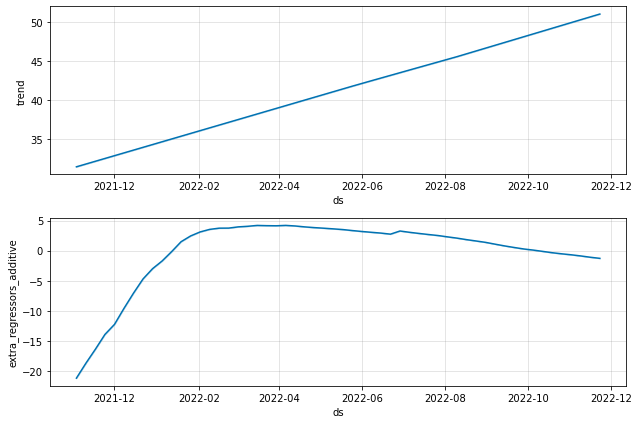

In [68]:
train_pred=model.predict(train.reset_index().rename(columns={'Date':'ds', 'Additional_Doses_Vax_Pct':'y'}))
fig = model.plot_components(train_pred)

In [25]:
from prophet.diagnostics import cross_validation
cv_results = cross_validation(model, initial='189 days', period='14 days', horizon='7 days')

  0%|          | 0/14 [00:00<?, ?it/s]

20:04:28 - cmdstanpy - INFO - Chain [1] start processing
20:04:31 - cmdstanpy - INFO - Chain [1] done processing
20:04:31 - cmdstanpy - INFO - Chain [1] start processing
20:04:39 - cmdstanpy - INFO - Chain [1] done processing
20:04:39 - cmdstanpy - INFO - Chain [1] start processing
20:04:44 - cmdstanpy - INFO - Chain [1] done processing
20:04:44 - cmdstanpy - INFO - Chain [1] start processing
20:04:47 - cmdstanpy - INFO - Chain [1] done processing
20:04:47 - cmdstanpy - INFO - Chain [1] start processing
20:04:52 - cmdstanpy - INFO - Chain [1] done processing
20:04:52 - cmdstanpy - INFO - Chain [1] start processing
20:05:00 - cmdstanpy - INFO - Chain [1] done processing
20:05:00 - cmdstanpy - INFO - Chain [1] start processing
20:05:04 - cmdstanpy - INFO - Chain [1] done processing
20:05:04 - cmdstanpy - INFO - Chain [1] start processing
20:05:11 - cmdstanpy - INFO - Chain [1] done processing
20:05:12 - cmdstanpy - INFO - Chain [1] start processing
20:05:18 - cmdstanpy - INFO - Chain [1]

In [26]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(cv_results)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,7 days,256.433348,16.013536,6.053688,0.127678,0.022851,0.180492,0.0


In [69]:
train = train.rename(columns={'Date':'ds', 'Additional_Doses_Vax_Pct':'y'})

In [42]:
# finding best initial, horizon, and period grids 

from sklearn.model_selection import ParameterSampler
from sklearn.model_selection import ParameterGrid

param_grid = {
    'initial': list(range(7, 245, 7)),  #1-25 weeks
    'period': [7, 14] ,  
    'horizon': [7, 14]  #1-25 weeks
}

all_params = list(ParameterGrid(param_grid))

best_rmse = float('inf')
best_params = None

model = Prophet()
for col in train.columns:
    if col not in ['ds', 'y']:
        model.add_regressor(col)
model=model.fit(train)

for params in all_params:
    
    horizon = f'{params["horizon"]} days'
    initial = f'{params["initial"]} days'
    period = f'{params["period"]} days'
    
    df_cv = cross_validation(model, horizon=horizon, initial=initial, period=period, parallel="processes")

    metrics = performance_metrics(df_cv)
    rmse = metrics['rmse'].mean()
    
    if rmse < best_rmse:
        best_rmse = rmse
        best_params = params

print("Best Parameters:", best_params)
print("Best RMSE:", best_rmse)


21:41:27 - cmdstanpy - INFO - Chain [1] start processing
21:41:41 - cmdstanpy - INFO - Chain [1] done processing
21:41:43 - cmdstanpy - INFO - Chain [1] start processing
21:41:43 - cmdstanpy - INFO - Chain [1] start processing
21:41:43 - cmdstanpy - INFO - Chain [1] start processing
21:41:43 - cmdstanpy - INFO - Chain [1] start processing
21:41:43 - cmdstanpy - INFO - Chain [1] start processing
21:41:43 - cmdstanpy - INFO - Chain [1] start processing
21:41:43 - cmdstanpy - INFO - Chain [1] start processing
21:41:43 - cmdstanpy - INFO - Chain [1] start processing
21:41:43 - cmdstanpy - INFO - Chain [1] done processing
21:41:43 - cmdstanpy - INFO - Chain [1] done processing
21:41:43 - cmdstanpy - INFO - Chain [1] done processing
21:41:43 - cmdstanpy - INFO - Chain [1] start processing
21:41:43 - cmdstanpy - INFO - Chain [1] start processing
21:41:43 - cmdstanpy - INFO - Chain [1] done processing
21:41:43 - cmdstanpy - INFO - Chain [1] done processing
21:41:44 - cmdstanpy - INFO - Chain [

21:43:04 - cmdstanpy - INFO - Chain [1] done processing
21:43:04 - cmdstanpy - INFO - Chain [1] start processing
21:43:05 - cmdstanpy - INFO - Chain [1] done processing
21:43:05 - cmdstanpy - INFO - Chain [1] start processing
21:43:06 - cmdstanpy - INFO - Chain [1] done processing
21:43:06 - cmdstanpy - INFO - Chain [1] start processing
21:43:08 - cmdstanpy - INFO - Chain [1] done processing
21:43:08 - cmdstanpy - INFO - Chain [1] start processing
21:43:09 - cmdstanpy - INFO - Chain [1] done processing
21:43:10 - cmdstanpy - INFO - Chain [1] start processing
21:43:11 - cmdstanpy - INFO - Chain [1] done processing
21:43:11 - cmdstanpy - INFO - Chain [1] done processing
21:43:14 - cmdstanpy - INFO - Chain [1] done processing
21:43:17 - cmdstanpy - INFO - Chain [1] done processing
21:43:21 - cmdstanpy - INFO - Chain [1] done processing
21:43:22 - cmdstanpy - INFO - Chain [1] done processing
21:43:24 - cmdstanpy - INFO - Chain [1] done processing
21:43:29 - cmdstanpy - INFO - Chain [1] don

21:44:44 - cmdstanpy - INFO - Chain [1] done processing
21:44:44 - cmdstanpy - INFO - Chain [1] start processing
21:44:44 - cmdstanpy - INFO - Chain [1] done processing
21:44:45 - cmdstanpy - INFO - Chain [1] start processing
21:44:46 - cmdstanpy - INFO - Chain [1] done processing
21:44:46 - cmdstanpy - INFO - Chain [1] start processing
21:44:47 - cmdstanpy - INFO - Chain [1] done processing
21:44:47 - cmdstanpy - INFO - Chain [1] start processing
21:44:49 - cmdstanpy - INFO - Chain [1] done processing
21:44:49 - cmdstanpy - INFO - Chain [1] start processing
21:44:50 - cmdstanpy - INFO - Chain [1] done processing
21:44:51 - cmdstanpy - INFO - Chain [1] start processing
21:44:51 - cmdstanpy - INFO - Chain [1] done processing
21:44:51 - cmdstanpy - INFO - Chain [1] start processing
21:44:52 - cmdstanpy - INFO - Chain [1] done processing
21:44:52 - cmdstanpy - INFO - Chain [1] start processing
21:44:54 - cmdstanpy - INFO - Chain [1] done processing
21:44:54 - cmdstanpy - INFO - Chain [1] 

21:46:31 - cmdstanpy - INFO - Chain [1] start processing
21:46:31 - cmdstanpy - INFO - Chain [1] start processing
21:46:32 - cmdstanpy - INFO - Chain [1] done processing
21:46:32 - cmdstanpy - INFO - Chain [1] start processing
21:46:33 - cmdstanpy - INFO - Chain [1] done processing
21:46:33 - cmdstanpy - INFO - Chain [1] done processing
21:46:33 - cmdstanpy - INFO - Chain [1] start processing
21:46:33 - cmdstanpy - INFO - Chain [1] start processing
21:46:34 - cmdstanpy - INFO - Chain [1] done processing
21:46:34 - cmdstanpy - INFO - Chain [1] start processing
21:46:34 - cmdstanpy - INFO - Chain [1] done processing
21:46:34 - cmdstanpy - INFO - Chain [1] start processing
21:46:36 - cmdstanpy - INFO - Chain [1] done processing
21:46:36 - cmdstanpy - INFO - Chain [1] start processing
21:46:36 - cmdstanpy - INFO - Chain [1] done processing
21:46:37 - cmdstanpy - INFO - Chain [1] start processing
21:46:39 - cmdstanpy - INFO - Chain [1] done processing
21:46:39 - cmdstanpy - INFO - Chain [1]

21:48:21 - cmdstanpy - INFO - Chain [1] done processing
21:48:21 - cmdstanpy - INFO - Chain [1] done processing
21:48:21 - cmdstanpy - INFO - Chain [1] done processing
21:48:21 - cmdstanpy - INFO - Chain [1] start processing
21:48:21 - cmdstanpy - INFO - Chain [1] start processing
21:48:21 - cmdstanpy - INFO - Chain [1] start processing
21:48:22 - cmdstanpy - INFO - Chain [1] done processing
21:48:22 - cmdstanpy - INFO - Chain [1] start processing
21:48:23 - cmdstanpy - INFO - Chain [1] done processing
21:48:23 - cmdstanpy - INFO - Chain [1] done processing
21:48:23 - cmdstanpy - INFO - Chain [1] start processing
21:48:23 - cmdstanpy - INFO - Chain [1] start processing
21:48:24 - cmdstanpy - INFO - Chain [1] done processing
21:48:24 - cmdstanpy - INFO - Chain [1] start processing
21:48:24 - cmdstanpy - INFO - Chain [1] done processing
21:48:24 - cmdstanpy - INFO - Chain [1] start processing
21:48:26 - cmdstanpy - INFO - Chain [1] done processing
21:48:26 - cmdstanpy - INFO - Chain [1] 

21:50:10 - cmdstanpy - INFO - Chain [1] done processing
21:50:10 - cmdstanpy - INFO - Chain [1] start processing
21:50:10 - cmdstanpy - INFO - Chain [1] done processing
21:50:10 - cmdstanpy - INFO - Chain [1] start processing
21:50:11 - cmdstanpy - INFO - Chain [1] done processing
21:50:11 - cmdstanpy - INFO - Chain [1] start processing
21:50:12 - cmdstanpy - INFO - Chain [1] done processing
21:50:12 - cmdstanpy - INFO - Chain [1] done processing
21:50:12 - cmdstanpy - INFO - Chain [1] start processing
21:50:12 - cmdstanpy - INFO - Chain [1] start processing
21:50:13 - cmdstanpy - INFO - Chain [1] done processing
21:50:13 - cmdstanpy - INFO - Chain [1] start processing
21:50:13 - cmdstanpy - INFO - Chain [1] done processing
21:50:13 - cmdstanpy - INFO - Chain [1] start processing
21:50:15 - cmdstanpy - INFO - Chain [1] done processing
21:50:15 - cmdstanpy - INFO - Chain [1] start processing
21:50:16 - cmdstanpy - INFO - Chain [1] done processing
21:50:16 - cmdstanpy - INFO - Chain [1] 

21:51:59 - cmdstanpy - INFO - Chain [1] done processing
21:51:59 - cmdstanpy - INFO - Chain [1] start processing
21:51:59 - cmdstanpy - INFO - Chain [1] done processing
21:51:59 - cmdstanpy - INFO - Chain [1] start processing
21:52:00 - cmdstanpy - INFO - Chain [1] done processing
21:52:00 - cmdstanpy - INFO - Chain [1] start processing
21:52:01 - cmdstanpy - INFO - Chain [1] done processing
21:52:01 - cmdstanpy - INFO - Chain [1] done processing
21:52:01 - cmdstanpy - INFO - Chain [1] start processing
21:52:01 - cmdstanpy - INFO - Chain [1] start processing
21:52:02 - cmdstanpy - INFO - Chain [1] done processing
21:52:02 - cmdstanpy - INFO - Chain [1] start processing
21:52:02 - cmdstanpy - INFO - Chain [1] done processing
21:52:02 - cmdstanpy - INFO - Chain [1] start processing
21:52:04 - cmdstanpy - INFO - Chain [1] done processing
21:52:04 - cmdstanpy - INFO - Chain [1] start processing
21:52:05 - cmdstanpy - INFO - Chain [1] done processing
21:52:05 - cmdstanpy - INFO - Chain [1] 

21:53:48 - cmdstanpy - INFO - Chain [1] done processing
21:53:48 - cmdstanpy - INFO - Chain [1] start processing
21:53:49 - cmdstanpy - INFO - Chain [1] done processing
21:53:49 - cmdstanpy - INFO - Chain [1] start processing
21:53:50 - cmdstanpy - INFO - Chain [1] done processing
21:53:50 - cmdstanpy - INFO - Chain [1] done processing
21:53:50 - cmdstanpy - INFO - Chain [1] start processing
21:53:50 - cmdstanpy - INFO - Chain [1] start processing
21:53:50 - cmdstanpy - INFO - Chain [1] done processing
21:53:51 - cmdstanpy - INFO - Chain [1] start processing
21:53:51 - cmdstanpy - INFO - Chain [1] done processing
21:53:51 - cmdstanpy - INFO - Chain [1] start processing
21:53:53 - cmdstanpy - INFO - Chain [1] done processing
21:53:53 - cmdstanpy - INFO - Chain [1] start processing
21:53:53 - cmdstanpy - INFO - Chain [1] done processing
21:53:54 - cmdstanpy - INFO - Chain [1] start processing
21:53:55 - cmdstanpy - INFO - Chain [1] done processing
21:53:56 - cmdstanpy - INFO - Chain [1] 

21:55:39 - cmdstanpy - INFO - Chain [1] done processing
21:55:39 - cmdstanpy - INFO - Chain [1] done processing
21:55:39 - cmdstanpy - INFO - Chain [1] start processing
21:55:40 - cmdstanpy - INFO - Chain [1] start processing
21:55:40 - cmdstanpy - INFO - Chain [1] done processing
21:55:40 - cmdstanpy - INFO - Chain [1] start processing
21:55:41 - cmdstanpy - INFO - Chain [1] done processing
21:55:41 - cmdstanpy - INFO - Chain [1] start processing
21:55:42 - cmdstanpy - INFO - Chain [1] done processing
21:55:42 - cmdstanpy - INFO - Chain [1] start processing
21:55:43 - cmdstanpy - INFO - Chain [1] done processing
21:55:43 - cmdstanpy - INFO - Chain [1] start processing
21:55:45 - cmdstanpy - INFO - Chain [1] done processing
21:55:45 - cmdstanpy - INFO - Chain [1] start processing
21:55:46 - cmdstanpy - INFO - Chain [1] done processing
21:55:46 - cmdstanpy - INFO - Chain [1] start processing
21:55:47 - cmdstanpy - INFO - Chain [1] done processing
21:55:47 - cmdstanpy - INFO - Chain [1] 

22:02:50 - cmdstanpy - INFO - Chain [1] done processing
22:02:51 - cmdstanpy - INFO - Chain [1] start processing
22:02:51 - cmdstanpy - INFO - Chain [1] done processing
22:02:51 - cmdstanpy - INFO - Chain [1] start processing
22:02:53 - cmdstanpy - INFO - Chain [1] done processing
22:02:53 - cmdstanpy - INFO - Chain [1] start processing
22:02:54 - cmdstanpy - INFO - Chain [1] done processing
22:02:55 - cmdstanpy - INFO - Chain [1] start processing
22:02:55 - cmdstanpy - INFO - Chain [1] done processing
22:02:56 - cmdstanpy - INFO - Chain [1] start processing
22:02:56 - cmdstanpy - INFO - Chain [1] done processing
22:02:57 - cmdstanpy - INFO - Chain [1] start processing
22:02:58 - cmdstanpy - INFO - Chain [1] done processing
22:02:58 - cmdstanpy - INFO - Chain [1] start processing
22:02:59 - cmdstanpy - INFO - Chain [1] done processing
22:02:59 - cmdstanpy - INFO - Chain [1] start processing
22:03:01 - cmdstanpy - INFO - Chain [1] done processing
22:03:01 - cmdstanpy - INFO - Chain [1] 

22:10:40 - cmdstanpy - INFO - Chain [1] done processing
22:10:40 - cmdstanpy - INFO - Chain [1] start processing
22:10:41 - cmdstanpy - INFO - Chain [1] done processing
22:10:42 - cmdstanpy - INFO - Chain [1] start processing
22:10:43 - cmdstanpy - INFO - Chain [1] done processing
22:10:43 - cmdstanpy - INFO - Chain [1] start processing
22:10:46 - cmdstanpy - INFO - Chain [1] done processing
22:10:46 - cmdstanpy - INFO - Chain [1] start processing
22:10:48 - cmdstanpy - INFO - Chain [1] done processing
22:10:48 - cmdstanpy - INFO - Chain [1] start processing
22:10:49 - cmdstanpy - INFO - Chain [1] done processing
22:10:50 - cmdstanpy - INFO - Chain [1] done processing
22:10:54 - cmdstanpy - INFO - Chain [1] done processing
22:26:28 - cmdstanpy - INFO - Chain [1] done processing
22:26:33 - cmdstanpy - INFO - Chain [1] done processing
22:26:34 - cmdstanpy - INFO - Chain [1] done processing
22:26:37 - cmdstanpy - INFO - Chain [1] done processing
22:26:41 - cmdstanpy - INFO - Chain [1] don

22:31:47 - cmdstanpy - INFO - Chain [1] done processing
22:31:48 - cmdstanpy - INFO - Chain [1] done processing
22:31:52 - cmdstanpy - INFO - Chain [1] done processing
22:31:56 - cmdstanpy - INFO - Chain [1] done processing
22:31:59 - cmdstanpy - INFO - Chain [1] start processing
22:31:59 - cmdstanpy - INFO - Chain [1] start processing
22:31:59 - cmdstanpy - INFO - Chain [1] start processing
22:31:59 - cmdstanpy - INFO - Chain [1] start processing
22:31:59 - cmdstanpy - INFO - Chain [1] start processing
22:31:59 - cmdstanpy - INFO - Chain [1] start processing
22:31:59 - cmdstanpy - INFO - Chain [1] start processing
22:31:59 - cmdstanpy - INFO - Chain [1] start processing
22:32:00 - cmdstanpy - INFO - Chain [1] done processing
22:32:00 - cmdstanpy - INFO - Chain [1] start processing
22:32:01 - cmdstanpy - INFO - Chain [1] done processing
22:32:01 - cmdstanpy - INFO - Chain [1] start processing
22:32:01 - cmdstanpy - INFO - Chain [1] done processing
22:32:02 - cmdstanpy - INFO - Chain [1

22:58:03 - cmdstanpy - INFO - Chain [1] start processing
22:58:03 - cmdstanpy - INFO - Chain [1] done processing
22:58:03 - cmdstanpy - INFO - Chain [1] start processing
22:58:04 - cmdstanpy - INFO - Chain [1] done processing
22:58:04 - cmdstanpy - INFO - Chain [1] start processing
22:58:04 - cmdstanpy - INFO - Chain [1] done processing
22:58:04 - cmdstanpy - INFO - Chain [1] done processing
22:58:04 - cmdstanpy - INFO - Chain [1] start processing
22:58:05 - cmdstanpy - INFO - Chain [1] start processing
22:58:05 - cmdstanpy - INFO - Chain [1] done processing
22:58:05 - cmdstanpy - INFO - Chain [1] start processing
22:58:06 - cmdstanpy - INFO - Chain [1] done processing
22:58:06 - cmdstanpy - INFO - Chain [1] start processing
22:58:08 - cmdstanpy - INFO - Chain [1] done processing
22:58:09 - cmdstanpy - INFO - Chain [1] start processing
22:58:09 - cmdstanpy - INFO - Chain [1] done processing
22:58:09 - cmdstanpy - INFO - Chain [1] done processing
22:58:09 - cmdstanpy - INFO - Chain [1] 

23:06:27 - cmdstanpy - INFO - Chain [1] done processing
23:06:27 - cmdstanpy - INFO - Chain [1] start processing
23:06:28 - cmdstanpy - INFO - Chain [1] done processing
23:06:28 - cmdstanpy - INFO - Chain [1] start processing
23:06:28 - cmdstanpy - INFO - Chain [1] done processing
23:06:28 - cmdstanpy - INFO - Chain [1] start processing
23:06:29 - cmdstanpy - INFO - Chain [1] done processing
23:06:29 - cmdstanpy - INFO - Chain [1] start processing
23:06:31 - cmdstanpy - INFO - Chain [1] done processing
23:06:31 - cmdstanpy - INFO - Chain [1] start processing
23:06:32 - cmdstanpy - INFO - Chain [1] done processing
23:06:32 - cmdstanpy - INFO - Chain [1] start processing
23:06:35 - cmdstanpy - INFO - Chain [1] done processing
23:06:35 - cmdstanpy - INFO - Chain [1] start processing
23:06:39 - cmdstanpy - INFO - Chain [1] done processing
23:06:39 - cmdstanpy - INFO - Chain [1] start processing
23:06:39 - cmdstanpy - INFO - Chain [1] done processing
23:06:39 - cmdstanpy - INFO - Chain [1] 

23:25:36 - cmdstanpy - INFO - Chain [1] done processing
23:25:36 - cmdstanpy - INFO - Chain [1] done processing
23:25:36 - cmdstanpy - INFO - Chain [1] start processing
23:25:36 - cmdstanpy - INFO - Chain [1] start processing
23:25:37 - cmdstanpy - INFO - Chain [1] done processing
23:25:37 - cmdstanpy - INFO - Chain [1] start processing
23:25:39 - cmdstanpy - INFO - Chain [1] done processing
23:25:39 - cmdstanpy - INFO - Chain [1] start processing
23:25:40 - cmdstanpy - INFO - Chain [1] done processing
23:25:40 - cmdstanpy - INFO - Chain [1] start processing
23:25:43 - cmdstanpy - INFO - Chain [1] done processing
23:25:43 - cmdstanpy - INFO - Chain [1] start processing
23:25:44 - cmdstanpy - INFO - Chain [1] done processing
23:25:44 - cmdstanpy - INFO - Chain [1] start processing
23:25:48 - cmdstanpy - INFO - Chain [1] done processing
23:25:48 - cmdstanpy - INFO - Chain [1] start processing
23:25:49 - cmdstanpy - INFO - Chain [1] done processing
23:25:49 - cmdstanpy - INFO - Chain [1] 

23:28:22 - cmdstanpy - INFO - Chain [1] start processing
23:28:22 - cmdstanpy - INFO - Chain [1] start processing
23:28:22 - cmdstanpy - INFO - Chain [1] start processing
23:28:22 - cmdstanpy - INFO - Chain [1] start processing
23:28:22 - cmdstanpy - INFO - Chain [1] start processing
23:28:22 - cmdstanpy - INFO - Chain [1] start processing
23:28:22 - cmdstanpy - INFO - Chain [1] start processing
23:28:22 - cmdstanpy - INFO - Chain [1] start processing
23:28:23 - cmdstanpy - INFO - Chain [1] done processing
23:28:24 - cmdstanpy - INFO - Chain [1] start processing
23:28:25 - cmdstanpy - INFO - Chain [1] done processing
23:28:26 - cmdstanpy - INFO - Chain [1] start processing
23:28:26 - cmdstanpy - INFO - Chain [1] done processing
23:28:26 - cmdstanpy - INFO - Chain [1] start processing
23:28:27 - cmdstanpy - INFO - Chain [1] done processing
23:28:27 - cmdstanpy - INFO - Chain [1] start processing
23:28:28 - cmdstanpy - INFO - Chain [1] done processing
23:28:28 - cmdstanpy - INFO - Chain 

23:31:09 - cmdstanpy - INFO - Chain [1] done processing
23:31:10 - cmdstanpy - INFO - Chain [1] start processing
23:31:11 - cmdstanpy - INFO - Chain [1] done processing
23:31:12 - cmdstanpy - INFO - Chain [1] done processing
23:31:17 - cmdstanpy - INFO - Chain [1] done processing
23:31:21 - cmdstanpy - INFO - Chain [1] done processing
23:31:26 - cmdstanpy - INFO - Chain [1] done processing
23:31:27 - cmdstanpy - INFO - Chain [1] done processing
23:31:39 - cmdstanpy - INFO - Chain [1] done processing
23:31:43 - cmdstanpy - INFO - Chain [1] start processing
23:31:43 - cmdstanpy - INFO - Chain [1] start processing
23:31:43 - cmdstanpy - INFO - Chain [1] start processing
23:31:43 - cmdstanpy - INFO - Chain [1] start processing
23:31:43 - cmdstanpy - INFO - Chain [1] start processing
23:31:43 - cmdstanpy - INFO - Chain [1] start processing
23:31:43 - cmdstanpy - INFO - Chain [1] start processing
23:31:43 - cmdstanpy - INFO - Chain [1] start processing
23:31:45 - cmdstanpy - INFO - Chain [1]

23:34:33 - cmdstanpy - INFO - Chain [1] done processing
23:34:34 - cmdstanpy - INFO - Chain [1] start processing
23:34:35 - cmdstanpy - INFO - Chain [1] done processing
23:34:35 - cmdstanpy - INFO - Chain [1] start processing
23:34:37 - cmdstanpy - INFO - Chain [1] done processing
23:34:38 - cmdstanpy - INFO - Chain [1] start processing
23:34:38 - cmdstanpy - INFO - Chain [1] done processing
23:34:38 - cmdstanpy - INFO - Chain [1] start processing
23:34:39 - cmdstanpy - INFO - Chain [1] done processing
23:34:39 - cmdstanpy - INFO - Chain [1] start processing
23:34:45 - cmdstanpy - INFO - Chain [1] done processing
23:34:45 - cmdstanpy - INFO - Chain [1] start processing
23:34:45 - cmdstanpy - INFO - Chain [1] done processing
23:34:45 - cmdstanpy - INFO - Chain [1] start processing
23:34:52 - cmdstanpy - INFO - Chain [1] done processing
23:34:52 - cmdstanpy - INFO - Chain [1] start processing
23:34:54 - cmdstanpy - INFO - Chain [1] done processing
23:34:54 - cmdstanpy - INFO - Chain [1] 

23:38:03 - cmdstanpy - INFO - Chain [1] done processing
23:38:05 - cmdstanpy - INFO - Chain [1] done processing
23:38:06 - cmdstanpy - INFO - Chain [1] done processing
23:38:20 - cmdstanpy - INFO - Chain [1] done processing
23:38:20 - cmdstanpy - INFO - Chain [1] done processing
23:38:21 - cmdstanpy - INFO - Chain [1] done processing
23:38:22 - cmdstanpy - INFO - Chain [1] done processing
23:38:24 - cmdstanpy - INFO - Chain [1] done processing
23:38:29 - cmdstanpy - INFO - Chain [1] start processing
23:38:29 - cmdstanpy - INFO - Chain [1] start processing
23:38:29 - cmdstanpy - INFO - Chain [1] start processing
23:38:29 - cmdstanpy - INFO - Chain [1] start processing
23:38:29 - cmdstanpy - INFO - Chain [1] start processing
23:38:29 - cmdstanpy - INFO - Chain [1] start processing
23:38:29 - cmdstanpy - INFO - Chain [1] start processing
23:38:29 - cmdstanpy - INFO - Chain [1] start processing
23:38:31 - cmdstanpy - INFO - Chain [1] done processing
23:38:31 - cmdstanpy - INFO - Chain [1] 

23:42:05 - cmdstanpy - INFO - Chain [1] start processing
23:42:05 - cmdstanpy - INFO - Chain [1] start processing
23:42:05 - cmdstanpy - INFO - Chain [1] start processing
23:42:05 - cmdstanpy - INFO - Chain [1] start processing
23:42:05 - cmdstanpy - INFO - Chain [1] start processing
23:42:05 - cmdstanpy - INFO - Chain [1] start processing
23:42:05 - cmdstanpy - INFO - Chain [1] start processing
23:42:05 - cmdstanpy - INFO - Chain [1] start processing
23:42:09 - cmdstanpy - INFO - Chain [1] done processing
23:42:09 - cmdstanpy - INFO - Chain [1] start processing
23:42:10 - cmdstanpy - INFO - Chain [1] done processing
23:42:10 - cmdstanpy - INFO - Chain [1] start processing
23:42:11 - cmdstanpy - INFO - Chain [1] done processing
23:42:11 - cmdstanpy - INFO - Chain [1] start processing
23:42:14 - cmdstanpy - INFO - Chain [1] done processing
23:42:14 - cmdstanpy - INFO - Chain [1] start processing
23:42:18 - cmdstanpy - INFO - Chain [1] done processing
23:42:18 - cmdstanpy - INFO - Chain 

23:45:36 - cmdstanpy - INFO - Chain [1] start processing
23:45:40 - cmdstanpy - INFO - Chain [1] done processing
23:45:40 - cmdstanpy - INFO - Chain [1] start processing
23:45:50 - cmdstanpy - INFO - Chain [1] done processing
23:45:51 - cmdstanpy - INFO - Chain [1] start processing
23:45:52 - cmdstanpy - INFO - Chain [1] done processing
23:45:52 - cmdstanpy - INFO - Chain [1] start processing
23:45:53 - cmdstanpy - INFO - Chain [1] done processing
23:45:54 - cmdstanpy - INFO - Chain [1] start processing
23:45:55 - cmdstanpy - INFO - Chain [1] done processing
23:45:55 - cmdstanpy - INFO - Chain [1] start processing
23:45:59 - cmdstanpy - INFO - Chain [1] done processing
23:46:01 - cmdstanpy - INFO - Chain [1] done processing
23:46:02 - cmdstanpy - INFO - Chain [1] done processing
23:46:14 - cmdstanpy - INFO - Chain [1] done processing
23:46:16 - cmdstanpy - INFO - Chain [1] done processing
23:46:17 - cmdstanpy - INFO - Chain [1] done processing
23:46:17 - cmdstanpy - INFO - Chain [1] do

23:50:07 - cmdstanpy - INFO - Chain [1] done processing
23:50:07 - cmdstanpy - INFO - Chain [1] start processing
23:50:08 - cmdstanpy - INFO - Chain [1] done processing
23:50:08 - cmdstanpy - INFO - Chain [1] start processing
23:50:12 - cmdstanpy - INFO - Chain [1] done processing
23:50:12 - cmdstanpy - INFO - Chain [1] start processing
23:50:15 - cmdstanpy - INFO - Chain [1] done processing
23:50:16 - cmdstanpy - INFO - Chain [1] done processing
23:50:16 - cmdstanpy - INFO - Chain [1] start processing
23:50:16 - cmdstanpy - INFO - Chain [1] start processing
23:50:16 - cmdstanpy - INFO - Chain [1] done processing
23:50:16 - cmdstanpy - INFO - Chain [1] start processing
23:50:17 - cmdstanpy - INFO - Chain [1] done processing
23:50:17 - cmdstanpy - INFO - Chain [1] start processing
23:50:19 - cmdstanpy - INFO - Chain [1] done processing
23:50:19 - cmdstanpy - INFO - Chain [1] start processing
23:50:26 - cmdstanpy - INFO - Chain [1] done processing
23:50:26 - cmdstanpy - INFO - Chain [1] 

23:53:53 - cmdstanpy - INFO - Chain [1] done processing
23:53:53 - cmdstanpy - INFO - Chain [1] start processing
23:53:54 - cmdstanpy - INFO - Chain [1] done processing
23:53:54 - cmdstanpy - INFO - Chain [1] start processing
23:53:54 - cmdstanpy - INFO - Chain [1] done processing
23:53:55 - cmdstanpy - INFO - Chain [1] start processing
23:53:57 - cmdstanpy - INFO - Chain [1] done processing
23:53:57 - cmdstanpy - INFO - Chain [1] start processing
23:53:57 - cmdstanpy - INFO - Chain [1] done processing
23:53:58 - cmdstanpy - INFO - Chain [1] start processing
23:53:59 - cmdstanpy - INFO - Chain [1] done processing
23:53:59 - cmdstanpy - INFO - Chain [1] start processing
23:54:06 - cmdstanpy - INFO - Chain [1] done processing
23:54:06 - cmdstanpy - INFO - Chain [1] start processing
23:54:06 - cmdstanpy - INFO - Chain [1] done processing
23:54:07 - cmdstanpy - INFO - Chain [1] done processing
23:54:12 - cmdstanpy - INFO - Chain [1] done processing
23:54:12 - cmdstanpy - INFO - Chain [1] d

23:57:35 - cmdstanpy - INFO - Chain [1] start processing
23:57:49 - cmdstanpy - INFO - Chain [1] done processing
23:57:49 - cmdstanpy - INFO - Chain [1] start processing
23:57:51 - cmdstanpy - INFO - Chain [1] done processing
23:57:51 - cmdstanpy - INFO - Chain [1] start processing
23:57:51 - cmdstanpy - INFO - Chain [1] done processing
23:57:56 - cmdstanpy - INFO - Chain [1] done processing
23:57:58 - cmdstanpy - INFO - Chain [1] done processing
23:58:02 - cmdstanpy - INFO - Chain [1] done processing
23:58:05 - cmdstanpy - INFO - Chain [1] done processing
23:58:11 - cmdstanpy - INFO - Chain [1] done processing
23:58:12 - cmdstanpy - INFO - Chain [1] done processing
23:58:14 - cmdstanpy - INFO - Chain [1] done processing
23:58:19 - cmdstanpy - INFO - Chain [1] start processing
23:58:19 - cmdstanpy - INFO - Chain [1] start processing
23:58:19 - cmdstanpy - INFO - Chain [1] start processing
23:58:19 - cmdstanpy - INFO - Chain [1] start processing
23:58:19 - cmdstanpy - INFO - Chain [1] s

00:00:25 - cmdstanpy - INFO - Chain [1] done processing
00:00:26 - cmdstanpy - INFO - Chain [1] start processing
00:00:28 - cmdstanpy - INFO - Chain [1] done processing
00:00:29 - cmdstanpy - INFO - Chain [1] start processing
00:00:29 - cmdstanpy - INFO - Chain [1] done processing
00:00:29 - cmdstanpy - INFO - Chain [1] start processing
00:00:30 - cmdstanpy - INFO - Chain [1] done processing
00:00:30 - cmdstanpy - INFO - Chain [1] start processing
00:00:31 - cmdstanpy - INFO - Chain [1] done processing
00:00:31 - cmdstanpy - INFO - Chain [1] start processing
00:00:32 - cmdstanpy - INFO - Chain [1] done processing
00:00:32 - cmdstanpy - INFO - Chain [1] start processing
00:00:38 - cmdstanpy - INFO - Chain [1] done processing
00:00:39 - cmdstanpy - INFO - Chain [1] start processing
00:00:39 - cmdstanpy - INFO - Chain [1] done processing
00:00:39 - cmdstanpy - INFO - Chain [1] done processing
00:00:39 - cmdstanpy - INFO - Chain [1] start processing
00:00:42 - cmdstanpy - INFO - Chain [1] 

00:02:39 - cmdstanpy - INFO - Chain [1] done processing
00:02:39 - cmdstanpy - INFO - Chain [1] start processing
00:02:40 - cmdstanpy - INFO - Chain [1] done processing
00:02:40 - cmdstanpy - INFO - Chain [1] start processing
00:02:41 - cmdstanpy - INFO - Chain [1] done processing
00:02:42 - cmdstanpy - INFO - Chain [1] start processing
00:02:44 - cmdstanpy - INFO - Chain [1] done processing
00:02:44 - cmdstanpy - INFO - Chain [1] start processing
00:02:44 - cmdstanpy - INFO - Chain [1] done processing
00:02:45 - cmdstanpy - INFO - Chain [1] start processing
00:02:49 - cmdstanpy - INFO - Chain [1] done processing
00:02:49 - cmdstanpy - INFO - Chain [1] start processing
00:02:51 - cmdstanpy - INFO - Chain [1] done processing
00:02:51 - cmdstanpy - INFO - Chain [1] start processing
00:02:53 - cmdstanpy - INFO - Chain [1] done processing
00:02:53 - cmdstanpy - INFO - Chain [1] done processing
00:02:56 - cmdstanpy - INFO - Chain [1] done processing
00:02:57 - cmdstanpy - INFO - Chain [1] d

00:04:58 - cmdstanpy - INFO - Chain [1] done processing
00:05:00 - cmdstanpy - INFO - Chain [1] done processing
00:05:01 - cmdstanpy - INFO - Chain [1] done processing
00:05:03 - cmdstanpy - INFO - Chain [1] done processing
00:05:05 - cmdstanpy - INFO - Chain [1] done processing
00:05:09 - cmdstanpy - INFO - Chain [1] done processing
00:05:10 - cmdstanpy - INFO - Chain [1] done processing
00:05:11 - cmdstanpy - INFO - Chain [1] done processing
00:05:14 - cmdstanpy - INFO - Chain [1] start processing
00:05:14 - cmdstanpy - INFO - Chain [1] start processing
00:05:14 - cmdstanpy - INFO - Chain [1] start processing
00:05:14 - cmdstanpy - INFO - Chain [1] start processing
00:05:14 - cmdstanpy - INFO - Chain [1] start processing
00:05:14 - cmdstanpy - INFO - Chain [1] start processing
00:05:14 - cmdstanpy - INFO - Chain [1] start processing
00:05:14 - cmdstanpy - INFO - Chain [1] start processing
00:05:19 - cmdstanpy - INFO - Chain [1] done processing
00:05:19 - cmdstanpy - INFO - Chain [1] 

00:06:45 - cmdstanpy - INFO - Chain [1] start processing
00:06:45 - cmdstanpy - INFO - Chain [1] start processing
00:06:45 - cmdstanpy - INFO - Chain [1] start processing
00:06:45 - cmdstanpy - INFO - Chain [1] done processing
00:06:45 - cmdstanpy - INFO - Chain [1] start processing
00:06:46 - cmdstanpy - INFO - Chain [1] done processing
00:06:46 - cmdstanpy - INFO - Chain [1] start processing
00:06:46 - cmdstanpy - INFO - Chain [1] done processing
00:06:46 - cmdstanpy - INFO - Chain [1] start processing
00:06:46 - cmdstanpy - INFO - Chain [1] done processing
00:06:47 - cmdstanpy - INFO - Chain [1] start processing
00:06:48 - cmdstanpy - INFO - Chain [1] done processing
00:06:48 - cmdstanpy - INFO - Chain [1] done processing
00:06:48 - cmdstanpy - INFO - Chain [1] start processing
00:06:48 - cmdstanpy - INFO - Chain [1] start processing
00:06:51 - cmdstanpy - INFO - Chain [1] done processing
00:06:51 - cmdstanpy - INFO - Chain [1] start processing
00:06:51 - cmdstanpy - INFO - Chain [1

00:08:36 - cmdstanpy - INFO - Chain [1] done processing
00:08:36 - cmdstanpy - INFO - Chain [1] done processing
00:08:37 - cmdstanpy - INFO - Chain [1] start processing
00:08:37 - cmdstanpy - INFO - Chain [1] done processing
00:08:37 - cmdstanpy - INFO - Chain [1] start processing
00:08:37 - cmdstanpy - INFO - Chain [1] start processing
00:08:37 - cmdstanpy - INFO - Chain [1] done processing
00:08:37 - cmdstanpy - INFO - Chain [1] done processing
00:08:37 - cmdstanpy - INFO - Chain [1] start processing
00:08:37 - cmdstanpy - INFO - Chain [1] start processing
00:08:37 - cmdstanpy - INFO - Chain [1] done processing
00:08:37 - cmdstanpy - INFO - Chain [1] start processing
00:08:38 - cmdstanpy - INFO - Chain [1] done processing
00:08:38 - cmdstanpy - INFO - Chain [1] start processing
00:08:39 - cmdstanpy - INFO - Chain [1] done processing
00:08:40 - cmdstanpy - INFO - Chain [1] start processing
00:08:40 - cmdstanpy - INFO - Chain [1] done processing
00:08:40 - cmdstanpy - INFO - Chain [1] 

00:10:28 - cmdstanpy - INFO - Chain [1] start processing
00:10:28 - cmdstanpy - INFO - Chain [1] start processing
00:10:28 - cmdstanpy - INFO - Chain [1] start processing
00:10:28 - cmdstanpy - INFO - Chain [1] start processing
00:10:28 - cmdstanpy - INFO - Chain [1] start processing
00:10:28 - cmdstanpy - INFO - Chain [1] start processing
00:10:28 - cmdstanpy - INFO - Chain [1] start processing
00:10:28 - cmdstanpy - INFO - Chain [1] start processing
00:10:28 - cmdstanpy - INFO - Chain [1] done processing
00:10:28 - cmdstanpy - INFO - Chain [1] done processing
00:10:29 - cmdstanpy - INFO - Chain [1] start processing
00:10:29 - cmdstanpy - INFO - Chain [1] done processing
00:10:29 - cmdstanpy - INFO - Chain [1] start processing
00:10:29 - cmdstanpy - INFO - Chain [1] start processing
00:10:29 - cmdstanpy - INFO - Chain [1] done processing
00:10:29 - cmdstanpy - INFO - Chain [1] done processing
00:10:29 - cmdstanpy - INFO - Chain [1] start processing
00:10:29 - cmdstanpy - INFO - Chain 

00:12:03 - cmdstanpy - INFO - Chain [1] done processing
00:12:06 - cmdstanpy - INFO - Chain [1] done processing
00:12:06 - cmdstanpy - INFO - Chain [1] done processing
00:12:09 - cmdstanpy - INFO - Chain [1] done processing
00:12:13 - cmdstanpy - INFO - Chain [1] done processing
00:12:14 - cmdstanpy - INFO - Chain [1] done processing
00:12:17 - cmdstanpy - INFO - Chain [1] done processing
00:12:20 - cmdstanpy - INFO - Chain [1] start processing
00:12:20 - cmdstanpy - INFO - Chain [1] start processing
00:12:20 - cmdstanpy - INFO - Chain [1] start processing
00:12:20 - cmdstanpy - INFO - Chain [1] start processing
00:12:20 - cmdstanpy - INFO - Chain [1] start processing
00:12:20 - cmdstanpy - INFO - Chain [1] start processing
00:12:20 - cmdstanpy - INFO - Chain [1] start processing
00:12:20 - cmdstanpy - INFO - Chain [1] start processing
00:12:20 - cmdstanpy - INFO - Chain [1] done processing
00:12:20 - cmdstanpy - INFO - Chain [1] start processing
00:12:20 - cmdstanpy - INFO - Chain [1]

00:13:53 - cmdstanpy - INFO - Chain [1] done processing
00:13:54 - cmdstanpy - INFO - Chain [1] start processing
00:13:55 - cmdstanpy - INFO - Chain [1] done processing
00:13:55 - cmdstanpy - INFO - Chain [1] done processing
00:13:57 - cmdstanpy - INFO - Chain [1] done processing
00:13:58 - cmdstanpy - INFO - Chain [1] done processing
00:14:01 - cmdstanpy - INFO - Chain [1] done processing
00:14:05 - cmdstanpy - INFO - Chain [1] done processing
00:14:06 - cmdstanpy - INFO - Chain [1] done processing
00:14:09 - cmdstanpy - INFO - Chain [1] done processing
00:14:11 - cmdstanpy - INFO - Chain [1] start processing
00:14:11 - cmdstanpy - INFO - Chain [1] start processing
00:14:11 - cmdstanpy - INFO - Chain [1] start processing
00:14:11 - cmdstanpy - INFO - Chain [1] start processing
00:14:11 - cmdstanpy - INFO - Chain [1] start processing
00:14:11 - cmdstanpy - INFO - Chain [1] start processing
00:14:11 - cmdstanpy - INFO - Chain [1] start processing
00:14:12 - cmdstanpy - INFO - Chain [1] 

00:15:45 - cmdstanpy - INFO - Chain [1] done processing
00:15:45 - cmdstanpy - INFO - Chain [1] start processing
00:15:45 - cmdstanpy - INFO - Chain [1] done processing
00:15:46 - cmdstanpy - INFO - Chain [1] done processing
00:15:49 - cmdstanpy - INFO - Chain [1] done processing
00:15:49 - cmdstanpy - INFO - Chain [1] done processing
00:15:52 - cmdstanpy - INFO - Chain [1] done processing
00:15:56 - cmdstanpy - INFO - Chain [1] done processing
00:15:58 - cmdstanpy - INFO - Chain [1] done processing
00:16:00 - cmdstanpy - INFO - Chain [1] done processing
00:16:03 - cmdstanpy - INFO - Chain [1] start processing
00:16:03 - cmdstanpy - INFO - Chain [1] start processing
00:16:03 - cmdstanpy - INFO - Chain [1] start processing
00:16:03 - cmdstanpy - INFO - Chain [1] start processing
00:16:03 - cmdstanpy - INFO - Chain [1] start processing
00:16:03 - cmdstanpy - INFO - Chain [1] start processing
00:16:03 - cmdstanpy - INFO - Chain [1] start processing
00:16:03 - cmdstanpy - INFO - Chain [1] 

00:17:41 - cmdstanpy - INFO - Chain [1] done processing
00:17:41 - cmdstanpy - INFO - Chain [1] done processing
00:17:44 - cmdstanpy - INFO - Chain [1] done processing
00:17:48 - cmdstanpy - INFO - Chain [1] done processing
00:17:49 - cmdstanpy - INFO - Chain [1] done processing
00:17:52 - cmdstanpy - INFO - Chain [1] done processing
00:17:54 - cmdstanpy - INFO - Chain [1] start processing
00:17:55 - cmdstanpy - INFO - Chain [1] start processing
00:17:55 - cmdstanpy - INFO - Chain [1] start processing
00:17:55 - cmdstanpy - INFO - Chain [1] start processing
00:17:55 - cmdstanpy - INFO - Chain [1] start processing
00:17:55 - cmdstanpy - INFO - Chain [1] start processing
00:17:55 - cmdstanpy - INFO - Chain [1] start processing
00:17:55 - cmdstanpy - INFO - Chain [1] start processing
00:17:55 - cmdstanpy - INFO - Chain [1] done processing
00:17:55 - cmdstanpy - INFO - Chain [1] done processing
00:17:55 - cmdstanpy - INFO - Chain [1] start processing
00:17:55 - cmdstanpy - INFO - Chain [1]

00:19:45 - cmdstanpy - INFO - Chain [1] start processing
00:19:45 - cmdstanpy - INFO - Chain [1] start processing
00:19:45 - cmdstanpy - INFO - Chain [1] start processing
00:19:45 - cmdstanpy - INFO - Chain [1] start processing
00:19:45 - cmdstanpy - INFO - Chain [1] start processing
00:19:45 - cmdstanpy - INFO - Chain [1] start processing
00:19:45 - cmdstanpy - INFO - Chain [1] start processing
00:19:45 - cmdstanpy - INFO - Chain [1] start processing
00:19:46 - cmdstanpy - INFO - Chain [1] done processing
00:19:46 - cmdstanpy - INFO - Chain [1] done processing
00:19:46 - cmdstanpy - INFO - Chain [1] start processing
00:19:46 - cmdstanpy - INFO - Chain [1] start processing
00:19:46 - cmdstanpy - INFO - Chain [1] done processing
00:19:47 - cmdstanpy - INFO - Chain [1] start processing
00:19:47 - cmdstanpy - INFO - Chain [1] done processing
00:19:47 - cmdstanpy - INFO - Chain [1] start processing
00:19:48 - cmdstanpy - INFO - Chain [1] done processing
00:19:49 - cmdstanpy - INFO - Chain 

00:22:28 - cmdstanpy - INFO - Chain [1] start processing
00:22:28 - cmdstanpy - INFO - Chain [1] done processing
00:22:29 - cmdstanpy - INFO - Chain [1] start processing
00:22:29 - cmdstanpy - INFO - Chain [1] done processing
00:22:29 - cmdstanpy - INFO - Chain [1] start processing
00:22:30 - cmdstanpy - INFO - Chain [1] done processing
00:22:30 - cmdstanpy - INFO - Chain [1] start processing
00:22:32 - cmdstanpy - INFO - Chain [1] done processing
00:22:32 - cmdstanpy - INFO - Chain [1] done processing
00:22:32 - cmdstanpy - INFO - Chain [1] start processing
00:22:33 - cmdstanpy - INFO - Chain [1] start processing
00:22:35 - cmdstanpy - INFO - Chain [1] done processing
00:22:35 - cmdstanpy - INFO - Chain [1] done processing
00:22:35 - cmdstanpy - INFO - Chain [1] start processing
00:22:35 - cmdstanpy - INFO - Chain [1] start processing
00:22:39 - cmdstanpy - INFO - Chain [1] done processing
00:22:39 - cmdstanpy - INFO - Chain [1] start processing
00:22:39 - cmdstanpy - INFO - Chain [1]

00:56:08 - cmdstanpy - INFO - Chain [1] done processing
00:56:08 - cmdstanpy - INFO - Chain [1] start processing
00:56:08 - cmdstanpy - INFO - Chain [1] done processing
00:56:08 - cmdstanpy - INFO - Chain [1] start processing
00:56:08 - cmdstanpy - INFO - Chain [1] done processing
00:56:09 - cmdstanpy - INFO - Chain [1] start processing
00:56:13 - cmdstanpy - INFO - Chain [1] done processing
00:56:13 - cmdstanpy - INFO - Chain [1] start processing
00:56:13 - cmdstanpy - INFO - Chain [1] done processing
00:56:13 - cmdstanpy - INFO - Chain [1] start processing
00:56:15 - cmdstanpy - INFO - Chain [1] done processing
00:56:15 - cmdstanpy - INFO - Chain [1] start processing
00:56:17 - cmdstanpy - INFO - Chain [1] done processing
00:56:17 - cmdstanpy - INFO - Chain [1] start processing
00:56:18 - cmdstanpy - INFO - Chain [1] done processing
00:56:24 - cmdstanpy - INFO - Chain [1] done processing
00:56:26 - cmdstanpy - INFO - Chain [1] done processing
00:56:28 - cmdstanpy - INFO - Chain [1] d

01:07:51 - cmdstanpy - INFO - Chain [1] done processing
01:07:54 - cmdstanpy - INFO - Chain [1] done processing
01:07:54 - cmdstanpy - INFO - Chain [1] done processing
01:07:56 - cmdstanpy - INFO - Chain [1] done processing
01:08:03 - cmdstanpy - INFO - Chain [1] done processing
01:08:04 - cmdstanpy - INFO - Chain [1] done processing
01:08:07 - cmdstanpy - INFO - Chain [1] start processing
01:08:07 - cmdstanpy - INFO - Chain [1] start processing
01:08:07 - cmdstanpy - INFO - Chain [1] start processing
01:08:07 - cmdstanpy - INFO - Chain [1] start processing
01:08:07 - cmdstanpy - INFO - Chain [1] start processing
01:08:07 - cmdstanpy - INFO - Chain [1] start processing
01:08:07 - cmdstanpy - INFO - Chain [1] start processing
01:08:07 - cmdstanpy - INFO - Chain [1] start processing
01:08:08 - cmdstanpy - INFO - Chain [1] done processing
01:08:09 - cmdstanpy - INFO - Chain [1] start processing
01:08:09 - cmdstanpy - INFO - Chain [1] done processing
01:08:09 - cmdstanpy - INFO - Chain [1]

01:10:39 - cmdstanpy - INFO - Chain [1] start processing
01:10:40 - cmdstanpy - INFO - Chain [1] done processing
01:10:40 - cmdstanpy - INFO - Chain [1] start processing
01:10:41 - cmdstanpy - INFO - Chain [1] done processing
01:10:41 - cmdstanpy - INFO - Chain [1] done processing
01:10:41 - cmdstanpy - INFO - Chain [1] start processing
01:10:41 - cmdstanpy - INFO - Chain [1] start processing
01:10:41 - cmdstanpy - INFO - Chain [1] done processing
01:10:42 - cmdstanpy - INFO - Chain [1] start processing
01:10:42 - cmdstanpy - INFO - Chain [1] done processing
01:10:42 - cmdstanpy - INFO - Chain [1] start processing
01:10:46 - cmdstanpy - INFO - Chain [1] done processing
01:10:47 - cmdstanpy - INFO - Chain [1] start processing
01:10:47 - cmdstanpy - INFO - Chain [1] done processing
01:10:47 - cmdstanpy - INFO - Chain [1] start processing
01:10:47 - cmdstanpy - INFO - Chain [1] done processing
01:10:47 - cmdstanpy - INFO - Chain [1] start processing
01:10:48 - cmdstanpy - INFO - Chain [1]

01:13:47 - cmdstanpy - INFO - Chain [1] done processing
01:13:47 - cmdstanpy - INFO - Chain [1] start processing
01:13:49 - cmdstanpy - INFO - Chain [1] done processing
01:13:49 - cmdstanpy - INFO - Chain [1] start processing
01:13:51 - cmdstanpy - INFO - Chain [1] done processing
01:13:51 - cmdstanpy - INFO - Chain [1] start processing
01:13:53 - cmdstanpy - INFO - Chain [1] done processing
01:13:53 - cmdstanpy - INFO - Chain [1] start processing
01:13:58 - cmdstanpy - INFO - Chain [1] done processing
01:13:59 - cmdstanpy - INFO - Chain [1] start processing
01:14:04 - cmdstanpy - INFO - Chain [1] done processing
01:14:04 - cmdstanpy - INFO - Chain [1] start processing
01:14:05 - cmdstanpy - INFO - Chain [1] done processing
01:14:06 - cmdstanpy - INFO - Chain [1] start processing
01:14:09 - cmdstanpy - INFO - Chain [1] done processing
01:14:09 - cmdstanpy - INFO - Chain [1] done processing
01:14:09 - cmdstanpy - INFO - Chain [1] start processing
01:14:10 - cmdstanpy - INFO - Chain [1] 

01:17:22 - cmdstanpy - INFO - Chain [1] done processing
01:17:22 - cmdstanpy - INFO - Chain [1] start processing
01:17:25 - cmdstanpy - INFO - Chain [1] done processing
01:17:25 - cmdstanpy - INFO - Chain [1] start processing
01:17:27 - cmdstanpy - INFO - Chain [1] done processing
01:17:27 - cmdstanpy - INFO - Chain [1] start processing
01:17:34 - cmdstanpy - INFO - Chain [1] done processing
01:17:34 - cmdstanpy - INFO - Chain [1] start processing
01:17:36 - cmdstanpy - INFO - Chain [1] done processing
01:17:36 - cmdstanpy - INFO - Chain [1] start processing
01:17:37 - cmdstanpy - INFO - Chain [1] done processing
01:17:42 - cmdstanpy - INFO - Chain [1] done processing
01:35:03 - cmdstanpy - INFO - Chain [1] done processing
01:35:03 - cmdstanpy - INFO - Chain [1] done processing
01:35:07 - cmdstanpy - INFO - Chain [1] done processing
01:35:12 - cmdstanpy - INFO - Chain [1] done processing
01:35:12 - cmdstanpy - INFO - Chain [1] done processing
01:35:15 - cmdstanpy - INFO - Chain [1] don

01:37:26 - cmdstanpy - INFO - Chain [1] done processing
01:37:26 - cmdstanpy - INFO - Chain [1] done processing
01:37:26 - cmdstanpy - INFO - Chain [1] start processing
01:37:26 - cmdstanpy - INFO - Chain [1] start processing
01:37:29 - cmdstanpy - INFO - Chain [1] done processing
01:37:29 - cmdstanpy - INFO - Chain [1] start processing
01:37:30 - cmdstanpy - INFO - Chain [1] done processing
01:37:30 - cmdstanpy - INFO - Chain [1] start processing
01:37:31 - cmdstanpy - INFO - Chain [1] done processing
01:37:31 - cmdstanpy - INFO - Chain [1] start processing
01:37:38 - cmdstanpy - INFO - Chain [1] done processing
01:37:38 - cmdstanpy - INFO - Chain [1] start processing
01:37:39 - cmdstanpy - INFO - Chain [1] done processing
01:37:39 - cmdstanpy - INFO - Chain [1] start processing
01:37:41 - cmdstanpy - INFO - Chain [1] done processing
01:37:41 - cmdstanpy - INFO - Chain [1] start processing
01:37:42 - cmdstanpy - INFO - Chain [1] done processing
01:37:42 - cmdstanpy - INFO - Chain [1] 

01:42:41 - cmdstanpy - INFO - Chain [1] done processing
01:42:41 - cmdstanpy - INFO - Chain [1] start processing
01:42:42 - cmdstanpy - INFO - Chain [1] done processing
01:42:42 - cmdstanpy - INFO - Chain [1] start processing
01:42:42 - cmdstanpy - INFO - Chain [1] done processing
01:42:42 - cmdstanpy - INFO - Chain [1] start processing
01:42:42 - cmdstanpy - INFO - Chain [1] done processing
01:42:43 - cmdstanpy - INFO - Chain [1] start processing
01:42:44 - cmdstanpy - INFO - Chain [1] done processing
01:42:45 - cmdstanpy - INFO - Chain [1] start processing
01:42:45 - cmdstanpy - INFO - Chain [1] done processing
01:42:45 - cmdstanpy - INFO - Chain [1] done processing
01:42:45 - cmdstanpy - INFO - Chain [1] start processing
01:42:45 - cmdstanpy - INFO - Chain [1] start processing
01:42:46 - cmdstanpy - INFO - Chain [1] done processing
01:42:46 - cmdstanpy - INFO - Chain [1] start processing
01:42:51 - cmdstanpy - INFO - Chain [1] done processing
01:42:51 - cmdstanpy - INFO - Chain [1] 

01:53:32 - cmdstanpy - INFO - Chain [1] done processing
01:53:32 - cmdstanpy - INFO - Chain [1] start processing
01:53:32 - cmdstanpy - INFO - Chain [1] done processing
01:53:33 - cmdstanpy - INFO - Chain [1] start processing
01:53:36 - cmdstanpy - INFO - Chain [1] done processing
01:53:37 - cmdstanpy - INFO - Chain [1] start processing
01:53:37 - cmdstanpy - INFO - Chain [1] done processing
01:53:37 - cmdstanpy - INFO - Chain [1] start processing
01:53:38 - cmdstanpy - INFO - Chain [1] done processing
01:53:38 - cmdstanpy - INFO - Chain [1] start processing
01:53:47 - cmdstanpy - INFO - Chain [1] done processing
01:53:47 - cmdstanpy - INFO - Chain [1] start processing
01:53:47 - cmdstanpy - INFO - Chain [1] done processing
01:53:48 - cmdstanpy - INFO - Chain [1] start processing
01:53:48 - cmdstanpy - INFO - Chain [1] done processing
01:53:48 - cmdstanpy - INFO - Chain [1] done processing
01:53:48 - cmdstanpy - INFO - Chain [1] start processing
01:53:49 - cmdstanpy - INFO - Chain [1] 

02:01:40 - cmdstanpy - INFO - Chain [1] done processing
02:01:41 - cmdstanpy - INFO - Chain [1] start processing
02:01:42 - cmdstanpy - INFO - Chain [1] done processing
02:01:42 - cmdstanpy - INFO - Chain [1] start processing
02:01:43 - cmdstanpy - INFO - Chain [1] done processing
02:01:43 - cmdstanpy - INFO - Chain [1] start processing
02:01:46 - cmdstanpy - INFO - Chain [1] done processing
02:01:46 - cmdstanpy - INFO - Chain [1] start processing
02:01:48 - cmdstanpy - INFO - Chain [1] done processing
02:01:53 - cmdstanpy - INFO - Chain [1] done processing
02:01:55 - cmdstanpy - INFO - Chain [1] done processing
02:01:57 - cmdstanpy - INFO - Chain [1] done processing
02:01:57 - cmdstanpy - INFO - Chain [1] done processing
02:02:00 - cmdstanpy - INFO - Chain [1] done processing
02:02:07 - cmdstanpy - INFO - Chain [1] done processing
02:02:09 - cmdstanpy - INFO - Chain [1] done processing
02:02:12 - cmdstanpy - INFO - Chain [1] start processing
02:02:12 - cmdstanpy - INFO - Chain [1] sta

02:09:28 - cmdstanpy - INFO - Chain [1] done processing
02:09:28 - cmdstanpy - INFO - Chain [1] start processing
02:09:31 - cmdstanpy - INFO - Chain [1] done processing
02:09:31 - cmdstanpy - INFO - Chain [1] start processing
02:09:32 - cmdstanpy - INFO - Chain [1] done processing
02:09:33 - cmdstanpy - INFO - Chain [1] start processing
02:09:34 - cmdstanpy - INFO - Chain [1] done processing
02:09:34 - cmdstanpy - INFO - Chain [1] start processing
02:09:35 - cmdstanpy - INFO - Chain [1] done processing
02:09:35 - cmdstanpy - INFO - Chain [1] start processing
02:13:07 - cmdstanpy - INFO - Chain [1] done processing
02:13:07 - cmdstanpy - INFO - Chain [1] start processing
02:13:08 - cmdstanpy - INFO - Chain [1] done processing
02:13:08 - cmdstanpy - INFO - Chain [1] start processing
02:13:11 - cmdstanpy - INFO - Chain [1] done processing
02:13:11 - cmdstanpy - INFO - Chain [1] start processing
02:13:12 - cmdstanpy - INFO - Chain [1] done processing
02:13:12 - cmdstanpy - INFO - Chain [1] 

02:33:16 - cmdstanpy - INFO - Chain [1] done processing
02:33:16 - cmdstanpy - INFO - Chain [1] start processing
02:33:18 - cmdstanpy - INFO - Chain [1] done processing
02:33:18 - cmdstanpy - INFO - Chain [1] start processing
02:33:23 - cmdstanpy - INFO - Chain [1] done processing
02:33:23 - cmdstanpy - INFO - Chain [1] start processing
02:33:25 - cmdstanpy - INFO - Chain [1] done processing
02:33:31 - cmdstanpy - INFO - Chain [1] done processing
02:33:33 - cmdstanpy - INFO - Chain [1] done processing
02:33:33 - cmdstanpy - INFO - Chain [1] done processing
02:33:35 - cmdstanpy - INFO - Chain [1] done processing
02:33:38 - cmdstanpy - INFO - Chain [1] done processing
02:33:43 - cmdstanpy - INFO - Chain [1] done processing
02:33:47 - cmdstanpy - INFO - Chain [1] done processing
02:33:49 - cmdstanpy - INFO - Chain [1] start processing
02:33:50 - cmdstanpy - INFO - Chain [1] start processing
02:33:50 - cmdstanpy - INFO - Chain [1] start processing
02:33:50 - cmdstanpy - INFO - Chain [1] st

02:36:38 - cmdstanpy - INFO - Chain [1] done processing
02:36:38 - cmdstanpy - INFO - Chain [1] start processing
02:36:39 - cmdstanpy - INFO - Chain [1] done processing
02:36:40 - cmdstanpy - INFO - Chain [1] start processing
02:36:50 - cmdstanpy - INFO - Chain [1] done processing
02:36:50 - cmdstanpy - INFO - Chain [1] start processing
02:36:51 - cmdstanpy - INFO - Chain [1] done processing
02:36:51 - cmdstanpy - INFO - Chain [1] start processing
02:36:52 - cmdstanpy - INFO - Chain [1] done processing
02:36:56 - cmdstanpy - INFO - Chain [1] done processing
02:36:59 - cmdstanpy - INFO - Chain [1] done processing
02:37:01 - cmdstanpy - INFO - Chain [1] done processing
02:37:03 - cmdstanpy - INFO - Chain [1] done processing
02:37:10 - cmdstanpy - INFO - Chain [1] done processing
02:37:10 - cmdstanpy - INFO - Chain [1] done processing
02:37:12 - cmdstanpy - INFO - Chain [1] done processing
02:37:16 - cmdstanpy - INFO - Chain [1] start processing
02:37:16 - cmdstanpy - INFO - Chain [1] sta

02:40:36 - cmdstanpy - INFO - Chain [1] start processing
02:40:37 - cmdstanpy - INFO - Chain [1] done processing
02:40:37 - cmdstanpy - INFO - Chain [1] start processing
02:40:38 - cmdstanpy - INFO - Chain [1] done processing
02:40:39 - cmdstanpy - INFO - Chain [1] start processing
02:40:39 - cmdstanpy - INFO - Chain [1] done processing
02:40:39 - cmdstanpy - INFO - Chain [1] start processing
02:40:41 - cmdstanpy - INFO - Chain [1] done processing
02:40:42 - cmdstanpy - INFO - Chain [1] start processing
02:40:46 - cmdstanpy - INFO - Chain [1] done processing
02:40:46 - cmdstanpy - INFO - Chain [1] start processing
02:40:46 - cmdstanpy - INFO - Chain [1] done processing
02:40:47 - cmdstanpy - INFO - Chain [1] start processing
02:40:50 - cmdstanpy - INFO - Chain [1] done processing
02:40:50 - cmdstanpy - INFO - Chain [1] start processing
02:40:51 - cmdstanpy - INFO - Chain [1] done processing
02:40:51 - cmdstanpy - INFO - Chain [1] start processing
02:40:53 - cmdstanpy - INFO - Chain [1]

02:43:45 - cmdstanpy - INFO - Chain [1] done processing
02:43:46 - cmdstanpy - INFO - Chain [1] start processing
02:43:47 - cmdstanpy - INFO - Chain [1] done processing
02:43:47 - cmdstanpy - INFO - Chain [1] start processing
02:43:47 - cmdstanpy - INFO - Chain [1] done processing
02:43:47 - cmdstanpy - INFO - Chain [1] start processing
02:43:49 - cmdstanpy - INFO - Chain [1] done processing
02:43:49 - cmdstanpy - INFO - Chain [1] start processing
02:43:49 - cmdstanpy - INFO - Chain [1] done processing
02:43:50 - cmdstanpy - INFO - Chain [1] start processing
02:43:51 - cmdstanpy - INFO - Chain [1] done processing
02:43:51 - cmdstanpy - INFO - Chain [1] start processing
02:43:53 - cmdstanpy - INFO - Chain [1] done processing
02:43:53 - cmdstanpy - INFO - Chain [1] start processing
02:43:54 - cmdstanpy - INFO - Chain [1] done processing
02:43:54 - cmdstanpy - INFO - Chain [1] start processing
02:43:54 - cmdstanpy - INFO - Chain [1] done processing
02:43:55 - cmdstanpy - INFO - Chain [1] 

02:46:24 - cmdstanpy - INFO - Chain [1] done processing
02:46:24 - cmdstanpy - INFO - Chain [1] start processing
02:46:25 - cmdstanpy - INFO - Chain [1] done processing
02:46:25 - cmdstanpy - INFO - Chain [1] start processing
02:46:25 - cmdstanpy - INFO - Chain [1] done processing
02:46:26 - cmdstanpy - INFO - Chain [1] start processing
02:46:28 - cmdstanpy - INFO - Chain [1] done processing
02:46:28 - cmdstanpy - INFO - Chain [1] done processing
02:46:28 - cmdstanpy - INFO - Chain [1] start processing
02:46:28 - cmdstanpy - INFO - Chain [1] start processing
02:46:29 - cmdstanpy - INFO - Chain [1] done processing
02:46:29 - cmdstanpy - INFO - Chain [1] start processing
02:46:31 - cmdstanpy - INFO - Chain [1] done processing
02:46:31 - cmdstanpy - INFO - Chain [1] start processing
02:46:31 - cmdstanpy - INFO - Chain [1] done processing
02:46:31 - cmdstanpy - INFO - Chain [1] start processing
02:46:33 - cmdstanpy - INFO - Chain [1] done processing
02:46:33 - cmdstanpy - INFO - Chain [1] 

02:49:05 - cmdstanpy - INFO - Chain [1] done processing
02:49:05 - cmdstanpy - INFO - Chain [1] start processing
02:49:06 - cmdstanpy - INFO - Chain [1] done processing
02:49:06 - cmdstanpy - INFO - Chain [1] start processing
02:49:06 - cmdstanpy - INFO - Chain [1] done processing
02:49:07 - cmdstanpy - INFO - Chain [1] start processing
02:49:07 - cmdstanpy - INFO - Chain [1] done processing
02:49:07 - cmdstanpy - INFO - Chain [1] start processing
02:49:07 - cmdstanpy - INFO - Chain [1] done processing
02:49:07 - cmdstanpy - INFO - Chain [1] start processing
02:49:11 - cmdstanpy - INFO - Chain [1] done processing
02:49:11 - cmdstanpy - INFO - Chain [1] start processing
02:49:11 - cmdstanpy - INFO - Chain [1] done processing
02:49:11 - cmdstanpy - INFO - Chain [1] start processing
02:49:16 - cmdstanpy - INFO - Chain [1] done processing
02:49:16 - cmdstanpy - INFO - Chain [1] start processing
02:49:17 - cmdstanpy - INFO - Chain [1] done processing
02:49:19 - cmdstanpy - INFO - Chain [1] 

Best Parameters: {'horizon': 14, 'initial': 168, 'period': 14}
Best RMSE: 1.7359753605223038


02:51:12 - cmdstanpy - INFO - Chain [1] done processing


In [43]:
model = Prophet()
for col in train.columns:
    if col not in ['ds', 'y']:
        model.add_regressor(col)
model=model.fit(train)
cv_results = cross_validation(model, initial='168 days', period='14 days', horizon='14 days')
df_p = performance_metrics(cv_results)
df_p.head()

09:18:02 - cmdstanpy - INFO - Chain [1] start processing
09:18:14 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/15 [00:00<?, ?it/s]

09:18:14 - cmdstanpy - INFO - Chain [1] start processing
09:18:49 - cmdstanpy - INFO - Chain [1] done processing
09:18:49 - cmdstanpy - INFO - Chain [1] start processing
09:18:56 - cmdstanpy - INFO - Chain [1] done processing
09:18:56 - cmdstanpy - INFO - Chain [1] start processing
09:19:03 - cmdstanpy - INFO - Chain [1] done processing
09:19:03 - cmdstanpy - INFO - Chain [1] start processing
09:19:09 - cmdstanpy - INFO - Chain [1] done processing
09:19:09 - cmdstanpy - INFO - Chain [1] start processing
09:19:19 - cmdstanpy - INFO - Chain [1] done processing
09:19:19 - cmdstanpy - INFO - Chain [1] start processing
09:19:30 - cmdstanpy - INFO - Chain [1] done processing
09:19:30 - cmdstanpy - INFO - Chain [1] start processing
09:19:37 - cmdstanpy - INFO - Chain [1] done processing
09:19:37 - cmdstanpy - INFO - Chain [1] start processing
09:19:47 - cmdstanpy - INFO - Chain [1] done processing
09:19:47 - cmdstanpy - INFO - Chain [1] start processing
09:19:54 - cmdstanpy - INFO - Chain [1]

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,7 days,2.104570,1.450714,1.024754,0.021276,0.017314,0.021397,0.000000
1,14 days,4.085399,2.021237,1.456102,0.030102,0.025616,0.030618,0.066667


In [71]:
# Python
import itertools
import numpy as np
import pandas as pd

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
    'holidays_prior_scale': [0.01, 0.1, 1.0, 10.0],
    'seasonality_mode': ['additive', 'multiplicative']
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params)  # Fit model with given params
    for col in train.columns:
        if col not in ['ds', 'y']:
            m.add_regressor(col)
    m = m.fit(train)
    df_cv = cross_validation(m, parallel="processes", initial='168 days', period='14 days', horizon='14 days')
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

10:33:19 - cmdstanpy - INFO - Chain [1] start processing
10:33:20 - cmdstanpy - INFO - Chain [1] done processing
10:33:23 - cmdstanpy - INFO - Chain [1] start processing
10:33:23 - cmdstanpy - INFO - Chain [1] start processing
10:33:23 - cmdstanpy - INFO - Chain [1] start processing
10:33:23 - cmdstanpy - INFO - Chain [1] start processing
10:33:23 - cmdstanpy - INFO - Chain [1] start processing
10:33:23 - cmdstanpy - INFO - Chain [1] start processing
10:33:23 - cmdstanpy - INFO - Chain [1] start processing
10:33:23 - cmdstanpy - INFO - Chain [1] start processing
10:33:23 - cmdstanpy - INFO - Chain [1] done processing
10:33:23 - cmdstanpy - INFO - Chain [1] done processing
10:33:23 - cmdstanpy - INFO - Chain [1] done processing
10:33:23 - cmdstanpy - INFO - Chain [1] done processing
10:33:23 - cmdstanpy - INFO - Chain [1] start processing
10:33:23 - cmdstanpy - INFO - Chain [1] done processing
10:33:23 - cmdstanpy - INFO - Chain [1] done processing
10:33:23 - cmdstanpy - INFO - Chain [1

10:33:49 - cmdstanpy - INFO - Chain [1] start processing
10:33:49 - cmdstanpy - INFO - Chain [1] start processing
10:33:50 - cmdstanpy - INFO - Chain [1] done processing
10:33:50 - cmdstanpy - INFO - Chain [1] done processing
10:33:50 - cmdstanpy - INFO - Chain [1] start processing
10:33:50 - cmdstanpy - INFO - Chain [1] start processing
10:33:50 - cmdstanpy - INFO - Chain [1] done processing
10:33:50 - cmdstanpy - INFO - Chain [1] done processing
10:33:50 - cmdstanpy - INFO - Chain [1] done processing
10:33:51 - cmdstanpy - INFO - Chain [1] done processing
10:33:51 - cmdstanpy - INFO - Chain [1] done processing
10:33:51 - cmdstanpy - INFO - Chain [1] done processing
10:33:51 - cmdstanpy - INFO - Chain [1] done processing
10:33:52 - cmdstanpy - INFO - Chain [1] done processing
10:33:52 - cmdstanpy - INFO - Chain [1] start processing
10:33:56 - cmdstanpy - INFO - Chain [1] done processing
10:33:58 - cmdstanpy - INFO - Chain [1] start processing
10:33:58 - cmdstanpy - INFO - Chain [1] st

10:34:50 - cmdstanpy - INFO - Chain [1] done processing
10:34:50 - cmdstanpy - INFO - Chain [1] done processing
10:34:50 - cmdstanpy - INFO - Chain [1] done processing
10:34:50 - cmdstanpy - INFO - Chain [1] start processing
10:34:50 - cmdstanpy - INFO - Chain [1] done processing
10:34:50 - cmdstanpy - INFO - Chain [1] start processing
10:34:50 - cmdstanpy - INFO - Chain [1] start processing
10:34:50 - cmdstanpy - INFO - Chain [1] done processing
10:34:50 - cmdstanpy - INFO - Chain [1] start processing
10:34:50 - cmdstanpy - INFO - Chain [1] start processing
10:34:50 - cmdstanpy - INFO - Chain [1] done processing
10:34:50 - cmdstanpy - INFO - Chain [1] done processing
10:34:50 - cmdstanpy - INFO - Chain [1] done processing
10:34:50 - cmdstanpy - INFO - Chain [1] done processing
10:34:50 - cmdstanpy - INFO - Chain [1] done processing
10:34:51 - cmdstanpy - INFO - Chain [1] start processing
10:34:51 - cmdstanpy - INFO - Chain [1] start processing
10:34:51 - cmdstanpy - INFO - Chain [1] d

10:35:35 - cmdstanpy - INFO - Chain [1] done processing
10:35:35 - cmdstanpy - INFO - Chain [1] done processing
10:35:38 - cmdstanpy - INFO - Chain [1] done processing
10:35:38 - cmdstanpy - INFO - Chain [1] done processing
10:35:38 - cmdstanpy - INFO - Chain [1] start processing
10:35:39 - cmdstanpy - INFO - Chain [1] done processing
10:35:42 - cmdstanpy - INFO - Chain [1] start processing
10:35:42 - cmdstanpy - INFO - Chain [1] start processing
10:35:42 - cmdstanpy - INFO - Chain [1] start processing
10:35:42 - cmdstanpy - INFO - Chain [1] start processing
10:35:42 - cmdstanpy - INFO - Chain [1] start processing
10:35:42 - cmdstanpy - INFO - Chain [1] start processing
10:35:42 - cmdstanpy - INFO - Chain [1] start processing
10:35:42 - cmdstanpy - INFO - Chain [1] start processing
10:35:42 - cmdstanpy - INFO - Chain [1] done processing
10:35:42 - cmdstanpy - INFO - Chain [1] done processing
10:35:43 - cmdstanpy - INFO - Chain [1] done processing
10:35:43 - cmdstanpy - INFO - Chain [1]

10:36:18 - cmdstanpy - INFO - Chain [1] start processing
10:36:18 - cmdstanpy - INFO - Chain [1] start processing
10:36:18 - cmdstanpy - INFO - Chain [1] start processing
10:36:18 - cmdstanpy - INFO - Chain [1] done processing
10:36:18 - cmdstanpy - INFO - Chain [1] start processing
10:36:18 - cmdstanpy - INFO - Chain [1] done processing
10:36:18 - cmdstanpy - INFO - Chain [1] done processing
10:36:18 - cmdstanpy - INFO - Chain [1] done processing
10:36:18 - cmdstanpy - INFO - Chain [1] done processing
10:36:18 - cmdstanpy - INFO - Chain [1] start processing
10:36:18 - cmdstanpy - INFO - Chain [1] start processing
10:36:18 - cmdstanpy - INFO - Chain [1] done processing
10:36:18 - cmdstanpy - INFO - Chain [1] start processing
10:36:18 - cmdstanpy - INFO - Chain [1] done processing
10:36:18 - cmdstanpy - INFO - Chain [1] done processing
10:36:18 - cmdstanpy - INFO - Chain [1] done processing
10:36:18 - cmdstanpy - INFO - Chain [1] done processing
10:36:19 - cmdstanpy - INFO - Chain [1] d

10:37:08 - cmdstanpy - INFO - Chain [1] done processing
10:37:08 - cmdstanpy - INFO - Chain [1] start processing
10:37:13 - cmdstanpy - INFO - Chain [1] done processing
10:37:15 - cmdstanpy - INFO - Chain [1] start processing
10:37:15 - cmdstanpy - INFO - Chain [1] start processing
10:37:15 - cmdstanpy - INFO - Chain [1] start processing
10:37:15 - cmdstanpy - INFO - Chain [1] start processing
10:37:15 - cmdstanpy - INFO - Chain [1] start processing
10:37:15 - cmdstanpy - INFO - Chain [1] start processing
10:37:15 - cmdstanpy - INFO - Chain [1] start processing
10:37:15 - cmdstanpy - INFO - Chain [1] start processing
10:37:18 - cmdstanpy - INFO - Chain [1] done processing
10:37:19 - cmdstanpy - INFO - Chain [1] start processing
10:37:20 - cmdstanpy - INFO - Chain [1] done processing
10:37:20 - cmdstanpy - INFO - Chain [1] done processing
10:37:20 - cmdstanpy - INFO - Chain [1] start processing
10:37:20 - cmdstanpy - INFO - Chain [1] start processing
10:37:20 - cmdstanpy - INFO - Chain 

10:37:47 - cmdstanpy - INFO - Chain [1] done processing
10:37:47 - cmdstanpy - INFO - Chain [1] start processing
10:37:47 - cmdstanpy - INFO - Chain [1] done processing
10:37:48 - cmdstanpy - INFO - Chain [1] start processing
10:37:48 - cmdstanpy - INFO - Chain [1] done processing
10:37:48 - cmdstanpy - INFO - Chain [1] done processing
10:37:48 - cmdstanpy - INFO - Chain [1] done processing
10:37:48 - cmdstanpy - INFO - Chain [1] done processing
10:37:48 - cmdstanpy - INFO - Chain [1] done processing
10:37:48 - cmdstanpy - INFO - Chain [1] done processing
10:37:50 - cmdstanpy - INFO - Chain [1] done processing
10:37:52 - cmdstanpy - INFO - Chain [1] done processing
10:37:53 - cmdstanpy - INFO - Chain [1] start processing
10:37:53 - cmdstanpy - INFO - Chain [1] done processing
10:37:55 - cmdstanpy - INFO - Chain [1] start processing
10:37:55 - cmdstanpy - INFO - Chain [1] start processing
10:37:55 - cmdstanpy - INFO - Chain [1] start processing
10:37:55 - cmdstanpy - INFO - Chain [1] st

10:38:52 - cmdstanpy - INFO - Chain [1] done processing
10:38:52 - cmdstanpy - INFO - Chain [1] done processing
10:38:52 - cmdstanpy - INFO - Chain [1] done processing
10:38:52 - cmdstanpy - INFO - Chain [1] done processing
10:38:52 - cmdstanpy - INFO - Chain [1] done processing
10:38:52 - cmdstanpy - INFO - Chain [1] start processing
10:38:52 - cmdstanpy - INFO - Chain [1] start processing
10:38:52 - cmdstanpy - INFO - Chain [1] start processing
10:38:52 - cmdstanpy - INFO - Chain [1] done processing
10:38:52 - cmdstanpy - INFO - Chain [1] start processing
10:38:52 - cmdstanpy - INFO - Chain [1] done processing
10:38:52 - cmdstanpy - INFO - Chain [1] start processing
10:38:53 - cmdstanpy - INFO - Chain [1] done processing
10:38:53 - cmdstanpy - INFO - Chain [1] start processing
10:38:53 - cmdstanpy - INFO - Chain [1] start processing
10:38:53 - cmdstanpy - INFO - Chain [1] done processing
10:38:53 - cmdstanpy - INFO - Chain [1] done processing
10:38:53 - cmdstanpy - INFO - Chain [1] d

10:39:30 - cmdstanpy - INFO - Chain [1] done processing
10:39:30 - cmdstanpy - INFO - Chain [1] done processing
10:39:30 - cmdstanpy - INFO - Chain [1] done processing
10:39:33 - cmdstanpy - INFO - Chain [1] done processing
10:39:33 - cmdstanpy - INFO - Chain [1] start processing
10:39:34 - cmdstanpy - INFO - Chain [1] done processing
10:39:37 - cmdstanpy - INFO - Chain [1] start processing
10:39:37 - cmdstanpy - INFO - Chain [1] start processing
10:39:37 - cmdstanpy - INFO - Chain [1] start processing
10:39:37 - cmdstanpy - INFO - Chain [1] start processing
10:39:37 - cmdstanpy - INFO - Chain [1] start processing
10:39:37 - cmdstanpy - INFO - Chain [1] start processing
10:39:37 - cmdstanpy - INFO - Chain [1] start processing
10:39:37 - cmdstanpy - INFO - Chain [1] start processing
10:39:46 - cmdstanpy - INFO - Chain [1] done processing
10:39:46 - cmdstanpy - INFO - Chain [1] start processing
10:39:48 - cmdstanpy - INFO - Chain [1] done processing
10:39:48 - cmdstanpy - INFO - Chain [1

10:41:43 - cmdstanpy - INFO - Chain [1] done processing
10:41:43 - cmdstanpy - INFO - Chain [1] done processing
10:41:43 - cmdstanpy - INFO - Chain [1] done processing
10:41:43 - cmdstanpy - INFO - Chain [1] done processing
10:41:43 - cmdstanpy - INFO - Chain [1] done processing
10:41:43 - cmdstanpy - INFO - Chain [1] start processing
10:41:43 - cmdstanpy - INFO - Chain [1] done processing
10:41:43 - cmdstanpy - INFO - Chain [1] start processing
10:41:43 - cmdstanpy - INFO - Chain [1] start processing
10:41:43 - cmdstanpy - INFO - Chain [1] start processing
10:41:43 - cmdstanpy - INFO - Chain [1] start processing
10:41:43 - cmdstanpy - INFO - Chain [1] done processing
10:41:43 - cmdstanpy - INFO - Chain [1] done processing
10:41:43 - cmdstanpy - INFO - Chain [1] done processing
10:41:43 - cmdstanpy - INFO - Chain [1] done processing
10:41:43 - cmdstanpy - INFO - Chain [1] done processing
10:41:43 - cmdstanpy - INFO - Chain [1] done processing
10:41:43 - cmdstanpy - INFO - Chain [1] don

10:42:55 - cmdstanpy - INFO - Chain [1] start processing
10:43:00 - cmdstanpy - INFO - Chain [1] done processing
10:43:03 - cmdstanpy - INFO - Chain [1] start processing
10:43:03 - cmdstanpy - INFO - Chain [1] start processing
10:43:03 - cmdstanpy - INFO - Chain [1] start processing
10:43:03 - cmdstanpy - INFO - Chain [1] start processing
10:43:03 - cmdstanpy - INFO - Chain [1] start processing
10:43:03 - cmdstanpy - INFO - Chain [1] start processing
10:43:03 - cmdstanpy - INFO - Chain [1] start processing
10:43:03 - cmdstanpy - INFO - Chain [1] start processing
10:43:04 - cmdstanpy - INFO - Chain [1] done processing
10:43:04 - cmdstanpy - INFO - Chain [1] start processing
10:43:04 - cmdstanpy - INFO - Chain [1] done processing
10:43:04 - cmdstanpy - INFO - Chain [1] done processing
10:43:04 - cmdstanpy - INFO - Chain [1] start processing
10:43:04 - cmdstanpy - INFO - Chain [1] start processing
10:43:04 - cmdstanpy - INFO - Chain [1] done processing
10:43:04 - cmdstanpy - INFO - Chain 

10:44:34 - cmdstanpy - INFO - Chain [1] done processing
10:44:34 - cmdstanpy - INFO - Chain [1] done processing
10:44:34 - cmdstanpy - INFO - Chain [1] done processing
10:44:34 - cmdstanpy - INFO - Chain [1] done processing
10:44:34 - cmdstanpy - INFO - Chain [1] start processing
10:44:34 - cmdstanpy - INFO - Chain [1] start processing
10:44:34 - cmdstanpy - INFO - Chain [1] start processing
10:44:34 - cmdstanpy - INFO - Chain [1] done processing
10:44:34 - cmdstanpy - INFO - Chain [1] done processing
10:44:34 - cmdstanpy - INFO - Chain [1] done processing
10:44:35 - cmdstanpy - INFO - Chain [1] done processing
10:44:36 - cmdstanpy - INFO - Chain [1] done processing
10:44:36 - cmdstanpy - INFO - Chain [1] done processing
10:44:38 - cmdstanpy - INFO - Chain [1] done processing
10:44:38 - cmdstanpy - INFO - Chain [1] start processing
10:44:39 - cmdstanpy - INFO - Chain [1] done processing
10:44:41 - cmdstanpy - INFO - Chain [1] start processing
10:44:41 - cmdstanpy - INFO - Chain [1] sta

10:46:16 - cmdstanpy - INFO - Chain [1] done processing
10:46:16 - cmdstanpy - INFO - Chain [1] start processing
10:46:22 - cmdstanpy - INFO - Chain [1] done processing
10:46:22 - cmdstanpy - INFO - Chain [1] start processing
10:46:22 - cmdstanpy - INFO - Chain [1] done processing
10:46:22 - cmdstanpy - INFO - Chain [1] start processing
10:46:25 - cmdstanpy - INFO - Chain [1] done processing
10:46:26 - cmdstanpy - INFO - Chain [1] start processing
10:46:26 - cmdstanpy - INFO - Chain [1] done processing
10:46:26 - cmdstanpy - INFO - Chain [1] start processing
10:46:27 - cmdstanpy - INFO - Chain [1] done processing
10:46:27 - cmdstanpy - INFO - Chain [1] start processing
10:46:28 - cmdstanpy - INFO - Chain [1] done processing
10:46:28 - cmdstanpy - INFO - Chain [1] start processing
10:46:29 - cmdstanpy - INFO - Chain [1] done processing
10:46:34 - cmdstanpy - INFO - Chain [1] done processing
10:46:34 - cmdstanpy - INFO - Chain [1] done processing
10:46:36 - cmdstanpy - INFO - Chain [1] d

10:47:34 - cmdstanpy - INFO - Chain [1] done processing
10:47:34 - cmdstanpy - INFO - Chain [1] done processing
10:47:38 - cmdstanpy - INFO - Chain [1] done processing
10:47:38 - cmdstanpy - INFO - Chain [1] done processing
10:47:38 - cmdstanpy - INFO - Chain [1] start processing
10:47:39 - cmdstanpy - INFO - Chain [1] done processing
10:47:41 - cmdstanpy - INFO - Chain [1] start processing
10:47:41 - cmdstanpy - INFO - Chain [1] start processing
10:47:41 - cmdstanpy - INFO - Chain [1] start processing
10:47:41 - cmdstanpy - INFO - Chain [1] start processing
10:47:41 - cmdstanpy - INFO - Chain [1] start processing
10:47:41 - cmdstanpy - INFO - Chain [1] start processing
10:47:41 - cmdstanpy - INFO - Chain [1] start processing
10:47:41 - cmdstanpy - INFO - Chain [1] start processing
10:47:43 - cmdstanpy - INFO - Chain [1] done processing
10:47:43 - cmdstanpy - INFO - Chain [1] done processing
10:47:43 - cmdstanpy - INFO - Chain [1] done processing
10:47:43 - cmdstanpy - INFO - Chain [1]

10:49:55 - cmdstanpy - INFO - Chain [1] start processing
10:49:55 - cmdstanpy - INFO - Chain [1] start processing
10:49:56 - cmdstanpy - INFO - Chain [1] done processing
10:49:56 - cmdstanpy - INFO - Chain [1] done processing
10:49:56 - cmdstanpy - INFO - Chain [1] start processing
10:49:56 - cmdstanpy - INFO - Chain [1] start processing
10:49:56 - cmdstanpy - INFO - Chain [1] done processing
10:49:56 - cmdstanpy - INFO - Chain [1] start processing
10:49:56 - cmdstanpy - INFO - Chain [1] done processing
10:49:57 - cmdstanpy - INFO - Chain [1] start processing
10:49:57 - cmdstanpy - INFO - Chain [1] done processing
10:49:57 - cmdstanpy - INFO - Chain [1] done processing
10:50:31 - cmdstanpy - INFO - Chain [1] done processing
10:50:32 - cmdstanpy - INFO - Chain [1] done processing
10:50:34 - cmdstanpy - INFO - Chain [1] done processing
10:50:36 - cmdstanpy - INFO - Chain [1] done processing
10:50:37 - cmdstanpy - INFO - Chain [1] done processing
10:50:41 - cmdstanpy - INFO - Chain [1] do

10:58:18 - cmdstanpy - INFO - Chain [1] start processing
10:59:07 - cmdstanpy - INFO - Chain [1] done processing
10:59:09 - cmdstanpy - INFO - Chain [1] start processing
10:59:10 - cmdstanpy - INFO - Chain [1] start processing
10:59:10 - cmdstanpy - INFO - Chain [1] start processing
10:59:10 - cmdstanpy - INFO - Chain [1] start processing
10:59:10 - cmdstanpy - INFO - Chain [1] start processing
10:59:10 - cmdstanpy - INFO - Chain [1] start processing
10:59:10 - cmdstanpy - INFO - Chain [1] start processing
10:59:10 - cmdstanpy - INFO - Chain [1] start processing
10:59:53 - cmdstanpy - INFO - Chain [1] done processing
10:59:53 - cmdstanpy - INFO - Chain [1] start processing
10:59:55 - cmdstanpy - INFO - Chain [1] done processing
10:59:56 - cmdstanpy - INFO - Chain [1] start processing
10:59:58 - cmdstanpy - INFO - Chain [1] done processing
10:59:58 - cmdstanpy - INFO - Chain [1] start processing
10:59:59 - cmdstanpy - INFO - Chain [1] done processing
10:59:59 - cmdstanpy - INFO - Chain 

11:06:06 - cmdstanpy - INFO - Chain [1] done processing
11:06:06 - cmdstanpy - INFO - Chain [1] start processing
11:06:07 - cmdstanpy - INFO - Chain [1] done processing
11:06:07 - cmdstanpy - INFO - Chain [1] done processing
11:06:07 - cmdstanpy - INFO - Chain [1] start processing
11:06:07 - cmdstanpy - INFO - Chain [1] start processing
11:06:08 - cmdstanpy - INFO - Chain [1] done processing
11:06:08 - cmdstanpy - INFO - Chain [1] done processing
11:06:42 - cmdstanpy - INFO - Chain [1] done processing
11:06:44 - cmdstanpy - INFO - Chain [1] done processing
11:06:46 - cmdstanpy - INFO - Chain [1] done processing
11:06:47 - cmdstanpy - INFO - Chain [1] done processing
11:06:48 - cmdstanpy - INFO - Chain [1] done processing
11:06:53 - cmdstanpy - INFO - Chain [1] done processing
11:06:53 - cmdstanpy - INFO - Chain [1] start processing
11:07:42 - cmdstanpy - INFO - Chain [1] done processing
11:07:44 - cmdstanpy - INFO - Chain [1] start processing
11:07:44 - cmdstanpy - INFO - Chain [1] sta

11:16:49 - cmdstanpy - INFO - Chain [1] done processing
11:16:49 - cmdstanpy - INFO - Chain [1] start processing
11:16:56 - cmdstanpy - INFO - Chain [1] done processing
11:16:56 - cmdstanpy - INFO - Chain [1] start processing
11:16:57 - cmdstanpy - INFO - Chain [1] done processing
11:16:57 - cmdstanpy - INFO - Chain [1] start processing
11:16:57 - cmdstanpy - INFO - Chain [1] done processing
11:16:58 - cmdstanpy - INFO - Chain [1] start processing
11:17:01 - cmdstanpy - INFO - Chain [1] done processing
11:17:01 - cmdstanpy - INFO - Chain [1] start processing
11:17:02 - cmdstanpy - INFO - Chain [1] done processing
11:17:02 - cmdstanpy - INFO - Chain [1] start processing
11:17:06 - cmdstanpy - INFO - Chain [1] done processing
11:17:06 - cmdstanpy - INFO - Chain [1] start processing
11:17:10 - cmdstanpy - INFO - Chain [1] done processing
11:17:15 - cmdstanpy - INFO - Chain [1] done processing
11:17:18 - cmdstanpy - INFO - Chain [1] done processing
11:17:21 - cmdstanpy - INFO - Chain [1] d

11:23:54 - cmdstanpy - INFO - Chain [1] done processing
11:23:58 - cmdstanpy - INFO - Chain [1] done processing
11:24:00 - cmdstanpy - INFO - Chain [1] done processing
11:24:01 - cmdstanpy - INFO - Chain [1] done processing
11:24:01 - cmdstanpy - INFO - Chain [1] start processing
11:24:51 - cmdstanpy - INFO - Chain [1] done processing
11:24:53 - cmdstanpy - INFO - Chain [1] start processing
11:24:53 - cmdstanpy - INFO - Chain [1] start processing
11:24:53 - cmdstanpy - INFO - Chain [1] start processing
11:24:53 - cmdstanpy - INFO - Chain [1] start processing
11:24:53 - cmdstanpy - INFO - Chain [1] start processing
11:24:53 - cmdstanpy - INFO - Chain [1] start processing
11:24:53 - cmdstanpy - INFO - Chain [1] start processing
11:24:53 - cmdstanpy - INFO - Chain [1] start processing
11:24:54 - cmdstanpy - INFO - Chain [1] done processing
11:24:54 - cmdstanpy - INFO - Chain [1] start processing
11:24:55 - cmdstanpy - INFO - Chain [1] done processing
11:24:55 - cmdstanpy - INFO - Chain [1

11:34:45 - cmdstanpy - INFO - Chain [1] done processing
11:34:45 - cmdstanpy - INFO - Chain [1] start processing
11:34:47 - cmdstanpy - INFO - Chain [1] done processing
11:34:47 - cmdstanpy - INFO - Chain [1] start processing
11:34:49 - cmdstanpy - INFO - Chain [1] done processing
11:34:49 - cmdstanpy - INFO - Chain [1] start processing
11:34:50 - cmdstanpy - INFO - Chain [1] done processing
11:34:50 - cmdstanpy - INFO - Chain [1] start processing
11:34:51 - cmdstanpy - INFO - Chain [1] done processing
11:34:51 - cmdstanpy - INFO - Chain [1] start processing
11:34:52 - cmdstanpy - INFO - Chain [1] done processing
11:35:14 - cmdstanpy - INFO - Chain [1] done processing
11:35:23 - cmdstanpy - INFO - Chain [1] done processing
11:35:36 - cmdstanpy - INFO - Chain [1] done processing
11:35:38 - cmdstanpy - INFO - Chain [1] done processing
11:35:40 - cmdstanpy - INFO - Chain [1] done processing
11:35:42 - cmdstanpy - INFO - Chain [1] done processing
11:35:44 - cmdstanpy - INFO - Chain [1] don

11:41:44 - cmdstanpy - INFO - Chain [1] start processing
11:42:33 - cmdstanpy - INFO - Chain [1] done processing
11:42:35 - cmdstanpy - INFO - Chain [1] start processing
11:42:35 - cmdstanpy - INFO - Chain [1] start processing
11:42:35 - cmdstanpy - INFO - Chain [1] start processing
11:42:35 - cmdstanpy - INFO - Chain [1] start processing
11:42:35 - cmdstanpy - INFO - Chain [1] start processing
11:42:35 - cmdstanpy - INFO - Chain [1] start processing
11:42:35 - cmdstanpy - INFO - Chain [1] start processing
11:42:35 - cmdstanpy - INFO - Chain [1] start processing
11:42:45 - cmdstanpy - INFO - Chain [1] done processing
11:42:45 - cmdstanpy - INFO - Chain [1] start processing
11:42:46 - cmdstanpy - INFO - Chain [1] done processing
11:42:46 - cmdstanpy - INFO - Chain [1] done processing
11:42:46 - cmdstanpy - INFO - Chain [1] start processing
11:42:46 - cmdstanpy - INFO - Chain [1] start processing
11:42:49 - cmdstanpy - INFO - Chain [1] done processing
11:42:49 - cmdstanpy - INFO - Chain 

11:51:10 - cmdstanpy - INFO - Chain [1] done processing
11:51:10 - cmdstanpy - INFO - Chain [1] start processing
11:51:10 - cmdstanpy - INFO - Chain [1] done processing
11:51:10 - cmdstanpy - INFO - Chain [1] done processing
11:51:11 - cmdstanpy - INFO - Chain [1] start processing
11:51:11 - cmdstanpy - INFO - Chain [1] start processing
11:51:11 - cmdstanpy - INFO - Chain [1] done processing
11:51:11 - cmdstanpy - INFO - Chain [1] done processing
11:51:45 - cmdstanpy - INFO - Chain [1] done processing
11:51:47 - cmdstanpy - INFO - Chain [1] done processing
11:51:49 - cmdstanpy - INFO - Chain [1] done processing
11:51:50 - cmdstanpy - INFO - Chain [1] done processing
11:51:51 - cmdstanpy - INFO - Chain [1] done processing
11:51:55 - cmdstanpy - INFO - Chain [1] done processing
11:51:56 - cmdstanpy - INFO - Chain [1] start processing
11:51:57 - cmdstanpy - INFO - Chain [1] done processing
11:51:59 - cmdstanpy - INFO - Chain [1] start processing
11:51:59 - cmdstanpy - INFO - Chain [1] sta

12:02:07 - cmdstanpy - INFO - Chain [1] done processing
12:02:07 - cmdstanpy - INFO - Chain [1] start processing
12:02:10 - cmdstanpy - INFO - Chain [1] done processing
12:02:10 - cmdstanpy - INFO - Chain [1] start processing
12:02:11 - cmdstanpy - INFO - Chain [1] done processing
12:02:11 - cmdstanpy - INFO - Chain [1] start processing
12:02:13 - cmdstanpy - INFO - Chain [1] done processing
12:02:13 - cmdstanpy - INFO - Chain [1] start processing
12:02:14 - cmdstanpy - INFO - Chain [1] done processing
12:02:14 - cmdstanpy - INFO - Chain [1] start processing
12:02:15 - cmdstanpy - INFO - Chain [1] done processing
12:02:15 - cmdstanpy - INFO - Chain [1] start processing
12:02:16 - cmdstanpy - INFO - Chain [1] done processing
12:02:16 - cmdstanpy - INFO - Chain [1] start processing
12:02:17 - cmdstanpy - INFO - Chain [1] done processing
12:02:58 - cmdstanpy - INFO - Chain [1] done processing
12:03:01 - cmdstanpy - INFO - Chain [1] done processing
12:03:03 - cmdstanpy - INFO - Chain [1] d

12:10:03 - cmdstanpy - INFO - Chain [1] done processing
12:10:03 - cmdstanpy - INFO - Chain [1] done processing
12:10:05 - cmdstanpy - INFO - Chain [1] done processing
12:10:09 - cmdstanpy - INFO - Chain [1] done processing
12:10:09 - cmdstanpy - INFO - Chain [1] start processing
12:10:58 - cmdstanpy - INFO - Chain [1] done processing
12:11:00 - cmdstanpy - INFO - Chain [1] start processing
12:11:00 - cmdstanpy - INFO - Chain [1] start processing
12:11:00 - cmdstanpy - INFO - Chain [1] start processing
12:11:00 - cmdstanpy - INFO - Chain [1] start processing
12:11:00 - cmdstanpy - INFO - Chain [1] start processing
12:11:00 - cmdstanpy - INFO - Chain [1] start processing
12:11:00 - cmdstanpy - INFO - Chain [1] start processing
12:11:00 - cmdstanpy - INFO - Chain [1] start processing
12:11:43 - cmdstanpy - INFO - Chain [1] done processing
12:11:43 - cmdstanpy - INFO - Chain [1] start processing
12:11:45 - cmdstanpy - INFO - Chain [1] done processing
12:11:45 - cmdstanpy - INFO - Chain [1

12:22:12 - cmdstanpy - INFO - Chain [1] done processing
12:22:12 - cmdstanpy - INFO - Chain [1] start processing
12:22:14 - cmdstanpy - INFO - Chain [1] done processing
12:22:14 - cmdstanpy - INFO - Chain [1] start processing
12:22:15 - cmdstanpy - INFO - Chain [1] done processing
12:22:15 - cmdstanpy - INFO - Chain [1] start processing
12:22:16 - cmdstanpy - INFO - Chain [1] done processing
12:22:16 - cmdstanpy - INFO - Chain [1] start processing
12:22:18 - cmdstanpy - INFO - Chain [1] done processing
12:22:18 - cmdstanpy - INFO - Chain [1] start processing
12:22:19 - cmdstanpy - INFO - Chain [1] done processing
12:22:38 - cmdstanpy - INFO - Chain [1] done processing
12:23:00 - cmdstanpy - INFO - Chain [1] done processing
12:23:03 - cmdstanpy - INFO - Chain [1] done processing
12:23:05 - cmdstanpy - INFO - Chain [1] done processing
12:23:07 - cmdstanpy - INFO - Chain [1] done processing
12:23:08 - cmdstanpy - INFO - Chain [1] done processing
12:23:10 - cmdstanpy - INFO - Chain [1] don

12:30:01 - cmdstanpy - INFO - Chain [1] start processing
12:30:50 - cmdstanpy - INFO - Chain [1] done processing
12:30:52 - cmdstanpy - INFO - Chain [1] start processing
12:30:52 - cmdstanpy - INFO - Chain [1] start processing
12:30:52 - cmdstanpy - INFO - Chain [1] start processing
12:30:52 - cmdstanpy - INFO - Chain [1] start processing
12:30:52 - cmdstanpy - INFO - Chain [1] start processing
12:30:52 - cmdstanpy - INFO - Chain [1] start processing
12:30:52 - cmdstanpy - INFO - Chain [1] start processing
12:30:52 - cmdstanpy - INFO - Chain [1] start processing
12:31:36 - cmdstanpy - INFO - Chain [1] done processing
12:31:36 - cmdstanpy - INFO - Chain [1] start processing
12:31:38 - cmdstanpy - INFO - Chain [1] done processing
12:31:38 - cmdstanpy - INFO - Chain [1] start processing
12:31:40 - cmdstanpy - INFO - Chain [1] done processing
12:31:40 - cmdstanpy - INFO - Chain [1] start processing
12:31:42 - cmdstanpy - INFO - Chain [1] done processing
12:31:42 - cmdstanpy - INFO - Chain 

12:42:11 - cmdstanpy - INFO - Chain [1] done processing
12:42:11 - cmdstanpy - INFO - Chain [1] start processing
12:42:11 - cmdstanpy - INFO - Chain [1] done processing
12:42:11 - cmdstanpy - INFO - Chain [1] start processing
12:42:11 - cmdstanpy - INFO - Chain [1] done processing
12:42:12 - cmdstanpy - INFO - Chain [1] start processing
12:42:13 - cmdstanpy - INFO - Chain [1] done processing
12:42:55 - cmdstanpy - INFO - Chain [1] done processing
12:42:57 - cmdstanpy - INFO - Chain [1] done processing
12:43:00 - cmdstanpy - INFO - Chain [1] done processing
12:43:02 - cmdstanpy - INFO - Chain [1] done processing
12:43:04 - cmdstanpy - INFO - Chain [1] done processing
12:43:05 - cmdstanpy - INFO - Chain [1] done processing
12:43:06 - cmdstanpy - INFO - Chain [1] done processing
12:43:07 - cmdstanpy - INFO - Chain [1] start processing
12:43:07 - cmdstanpy - INFO - Chain [1] done processing
12:43:10 - cmdstanpy - INFO - Chain [1] start processing
12:43:10 - cmdstanpy - INFO - Chain [1] sta

12:51:32 - cmdstanpy - INFO - Chain [1] done processing
12:51:32 - cmdstanpy - INFO - Chain [1] start processing
12:51:35 - cmdstanpy - INFO - Chain [1] done processing
12:51:35 - cmdstanpy - INFO - Chain [1] start processing
12:51:38 - cmdstanpy - INFO - Chain [1] done processing
12:51:38 - cmdstanpy - INFO - Chain [1] start processing
12:51:39 - cmdstanpy - INFO - Chain [1] done processing
12:51:40 - cmdstanpy - INFO - Chain [1] start processing
12:51:40 - cmdstanpy - INFO - Chain [1] done processing
12:51:41 - cmdstanpy - INFO - Chain [1] start processing
12:51:42 - cmdstanpy - INFO - Chain [1] done processing
12:51:42 - cmdstanpy - INFO - Chain [1] start processing
12:51:43 - cmdstanpy - INFO - Chain [1] done processing
12:51:44 - cmdstanpy - INFO - Chain [1] start processing
12:51:44 - cmdstanpy - INFO - Chain [1] done processing
12:52:25 - cmdstanpy - INFO - Chain [1] done processing
12:52:29 - cmdstanpy - INFO - Chain [1] done processing
12:52:32 - cmdstanpy - INFO - Chain [1] d

     changepoint_prior_scale  seasonality_prior_scale  holidays_prior_scale  \
0                      0.001                     0.01                  0.01   
1                      0.001                     0.01                  0.01   
2                      0.001                     0.01                  0.10   
3                      0.001                     0.01                  0.10   
4                      0.001                     0.01                  1.00   
..                       ...                      ...                   ...   
123                    0.500                    10.00                  0.10   
124                    0.500                    10.00                  1.00   
125                    0.500                    10.00                  1.00   
126                    0.500                    10.00                 10.00   
127                    0.500                    10.00                 10.00   

    seasonality_mode      rmse  
0           additi

13:00:36 - cmdstanpy - INFO - Chain [1] done processing


In [72]:
best_params = all_params[np.argmin(rmses)]
print(best_params)

{'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.01, 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive'}


In [75]:
tuned_model = Prophet(changepoint_prior_scale = 0.001, seasonality_prior_scale = 0.01, 
                     holidays_prior_scale = 0.01, seasonality_mode = 'additive')
for col in train.columns:
    if col not in ['ds', 'y']:
        tuned_model.add_regressor(col)
tuned_model = tuned_model.fit(train)
cv_results = cross_validation(tuned_model, initial='168 days', period='14 days', horizon='7 days')
df_p = performance_metrics(cv_results)
df_p.head()

14:00:08 - cmdstanpy - INFO - Chain [1] start processing
14:00:08 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/16 [00:00<?, ?it/s]

14:00:09 - cmdstanpy - INFO - Chain [1] start processing
14:00:09 - cmdstanpy - INFO - Chain [1] done processing
14:00:09 - cmdstanpy - INFO - Chain [1] start processing
14:00:09 - cmdstanpy - INFO - Chain [1] done processing
14:00:09 - cmdstanpy - INFO - Chain [1] start processing
14:00:10 - cmdstanpy - INFO - Chain [1] done processing
14:00:10 - cmdstanpy - INFO - Chain [1] start processing
14:00:10 - cmdstanpy - INFO - Chain [1] done processing
14:00:10 - cmdstanpy - INFO - Chain [1] start processing
14:00:11 - cmdstanpy - INFO - Chain [1] done processing
14:00:11 - cmdstanpy - INFO - Chain [1] start processing
14:00:11 - cmdstanpy - INFO - Chain [1] done processing
14:00:11 - cmdstanpy - INFO - Chain [1] start processing
14:00:11 - cmdstanpy - INFO - Chain [1] done processing
14:00:12 - cmdstanpy - INFO - Chain [1] start processing
14:00:12 - cmdstanpy - INFO - Chain [1] done processing
14:00:12 - cmdstanpy - INFO - Chain [1] start processing
14:00:12 - cmdstanpy - INFO - Chain [1]

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,7 days,0.008872,0.094189,0.078265,0.001667,0.001534,0.001665,1.0


## Lowest RMSE is 0.094 for Multiple Regressor Prophet